## Imports

In [4]:
# Imports

#General
import numpy as np
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

## Get filenames

In [5]:
# Get files in data path
path='./audio/'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 3789 audio files in ./audio/


## Prepare labels from filenames

In [6]:
# Get Labels
labels =[]
classes=['flu','org','pia', 'tru','vio','voi']
color_dict={'flu':'blue', 'org':'red', 'pia':'green', 'tru':'black', 'vio':'magenta', 'voi': "white "}
color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

## Encode Labels

In [7]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

6 classes: flu, org, pia, tru, vio, voi


## Parameters for MFCC

In [8]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

## Function to Calculate Audio Features: MFCC

In [9]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [10]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 3789 = ./audio/flu\008__[flu][nod][cla]0393__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.33935812  0.33090508  0.31523606 ... -0.00859047  0.0156003
  0.03642361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2 of 3789 = ./audio/flu\008__[flu][nod][cla]0393__2.wav
get 3 of 3789 = ./audio/flu\008__[flu][nod][cla]0393__3.wav
get 4 of 3789 = ./audio/flu\009__[flu][nod][cou_fol]0410__1.wav
get 5 of 3789 = ./audio/flu\009__[flu][nod][cou_fol]0410__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10421476 -0.10250492 -0.10122254 ...  0.06711122  0.07412157
  0.0790801 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09254839 -0.05577284 -0.03179763 ... -0.00066033 -0.0090415
 -0.01727028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31022456 -0.30202532 -0.2535642  ... -0.4382916  -0.44600135
 -0.4106957 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 6 of 3789 = ./audio/flu\009__[flu][nod][cou_fol]0410__3.wav
get 7 of 3789 = ./audio/flu\018__[flu][nod][pop_roc]0421__1.wav
get 8 of 3789 = ./audio/flu\018__[flu][nod][pop_roc]0421__2.wav
get 9 of 3789 = ./audio/flu\018__[flu][nod][pop_roc]0421__3.wav
get 10 of 3789 = ./audio/flu\024__[flu][nod][cla]0355__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08095123  0.09497695  0.11128367 ... -0.19160397 -0.2010677
 -0.2077651 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.39509442  0.4212947   0.44484705 ... -0.27405757 -0.28590342
 -0.2999094 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03795117  0.0404724   0.04458599 ... -0.05420648 -0.0384156
 -0.02342091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 11 of 3789 = ./audio/flu\024__[flu][nod][cla]0355__2.wav
get 12 of 3789 = ./audio/flu\030__[flu][nod][cla]0373__1.wav
get 13 of 3789 = ./audio/flu\030__[flu][nod][cla]0373__2.wav
get 14 of 3789 = ./audio/flu\030__[flu][nod][cla]0373__3.wav
get 15 of 3789 = ./audio/flu\033__[flu][dru][cou_fol]0415__1.wav
get 16 of 3789 = ./audio/flu\033__[flu][dru][cou_fol]0415__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1987936  -0.23341201 -0.2644899  ...  0.49816418  0.48452663
  0.4645948 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.7149166  0.6166176  0.511122   ... 0.05332025 0.07932614 0.10287864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.5472803  0.590795   0.6046025  ... 0.07531381 0.07740586 0.08410042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 17 of 3789 = ./audio/flu\033__[flu][dru][cou_fol]0415__3.wav
get 18 of 3789 = ./audio/flu\040__[flu][nod][cou_fol]0409__1.wav
get 19 of 3789 = ./audio/flu\040__[flu][nod][cou_fol]0409__2.wav
get 20 of 3789 = ./audio/flu\040__[flu][nod][cou_fol]0409__3.wav
get 21 of 3789 = ./audio/flu\044__[flu][dru][cou_fol]0408__1.wav
get 22 of 3789 = ./audio/flu\044__[flu][dru][cou_fol]0408__2.wav
get 23 of 3789 = ./audio/flu\044__[flu][dru][cou_fol]0408__3.wav
get 24 of 3789 = ./audio/flu\051__[flu][nod][cou_fol]0413__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0617038  -0.03034559  0.0081662  ... -0.00042464 -0.00813353
 -0.00679428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.41904762 -0.4164706  -0.43372548 ... -0.7303828  -0.73023343
 -0.72728294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24970293 -0.16873717 -0.07351194 ... -0.31743544 -0.29637033
 -0.26941773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 25 of 3789 = ./audio/flu\051__[flu][nod][cou_fol]0413__2.wav
get 26 of 3789 = ./audio/flu\051__[flu][nod][cou_fol]0413__3.wav
get 27 of 3789 = ./audio/flu\057__[flu][dru][cou_fol]0407__1.wav
get 28 of 3789 = ./audio/flu\057__[flu][dru][cou_fol]0407__2.wav
get 29 of 3789 = ./audio/flu\057__[flu][dru][cou_fol]0407__3.wav
get 30 of 3789 = ./audio/flu\058__[flu][nod][jaz_blu]0775__1.wav
get 31 of 3789 = ./audio/flu\058__[flu][nod][jaz_blu]0775__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.33166605  0.32166246  0.39323497 ... -0.07653832 -0.00575747
  0.03047859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.43238625 0.4157103  0.38733518 ... 0.3597029  0.37166202 0.37270194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.37186265 -0.3711929  -0.40454033 ... -0.19010857 -0.19091934
 -0.18446842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 32 of 3789 = ./audio/flu\058__[flu][nod][jaz_blu]0775__3.wav
get 33 of 3789 = ./audio/flu\061__[flu][dru][pop_roc]0419__1.wav
get 34 of 3789 = ./audio/flu\061__[flu][dru][pop_roc]0419__2.wav
get 35 of 3789 = ./audio/flu\061__[flu][dru][pop_roc]0419__3.wav
get 36 of 3789 = ./audio/flu\093__[flu][dru][pop_roc]0420__1.wav
get 37 of 3789 = ./audio/flu\093__[flu][dru][pop_roc]0420__2.wav
get 38 of 3789 = ./audio/flu\093__[flu][dru][pop_roc]0420__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.31011346  0.25815716  0.2056594  ... -0.17931636 -0.17157117
 -0.16427328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05897125  0.0395418   0.02337262 ... -0.21508977 -0.28322503
 -0.35235158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04443153  0.06356769  0.07664149 ... -0.32690296 -0.31551424
 -0.34528375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 39 of 3789 = ./audio/flu\105__[flu][nod][cou_fol]0414__1.wav
get 40 of 3789 = ./audio/flu\105__[flu][nod][cou_fol]0414__2.wav
get 41 of 3789 = ./audio/flu\105__[flu][nod][cou_fol]0414__3.wav
get 42 of 3789 = ./audio/flu\139__[flu][nod][cou_fol]0411__1.wav
get 43 of 3789 = ./audio/flu\139__[flu][nod][cou_fol]0411__2.wav
get 44 of 3789 = ./audio/flu\139__[flu][nod][cou_fol]0411__3.wav
get 45 of 3789 = ./audio/flu\150__[flu][dru][cou_fol]0417__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17534207 0.16280712 0.15106665 ... 0.04087097 0.03110196 0.01780197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15368637 -0.158577   -0.16428271 ... -0.30321833 -0.3175484
 -0.32501578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08180287  0.11468442  0.13990697 ... -0.54615444 -0.52004975
 -0.47489774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 46 of 3789 = ./audio/flu\150__[flu][dru][cou_fol]0417__2.wav
get 47 of 3789 = ./audio/flu\150__[flu][dru][cou_fol]0417__3.wav
get 48 of 3789 = ./audio/flu\151__[flu][dru][jaz_blu]0418__1.wav
get 49 of 3789 = ./audio/flu\151__[flu][dru][jaz_blu]0418__2.wav
get 50 of 3789 = ./audio/flu\151__[flu][dru][jaz_blu]0418__3.wav
get 51 of 3789 = ./audio/flu\155__[flu][nod][cou_fol]0416__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06303821  0.13999897  0.17715155 ... -0.14677976 -0.14030837
 -0.12736554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34129286 -0.3401033  -0.31477398 ... -0.2568038  -0.24331225
 -0.21081646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00944276 -0.01831414 -0.03202718 ... -0.1301236  -0.0497098
  0.04288335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 52 of 3789 = ./audio/flu\155__[flu][nod][cou_fol]0416__2.wav
get 53 of 3789 = ./audio/flu\155__[flu][nod][cou_fol]0416__3.wav
get 54 of 3789 = ./audio/flu\159__[flu][nod][cou_fol]0412__1.wav
get 55 of 3789 = ./audio/flu\159__[flu][nod][cou_fol]0412__2.wav
get 56 of 3789 = ./audio/flu\159__[flu][nod][cou_fol]0412__3.wav
get 57 of 3789 = ./audio/flu\160__[flu][dru][pop_roc]0422__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24914159 -0.2740762  -0.29046762 ... -0.43807226 -0.45597613
 -0.4667675 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18518801 -0.18560837 -0.18289514 ... -0.46449864 -0.46725008
 -0.45471567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.4018634   0.46561947  0.48040348 ... -0.65488565 -0.62928313
 -0.5967506 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 58 of 3789 = ./audio/flu\160__[flu][dru][pop_roc]0422__2.wav
get 59 of 3789 = ./audio/flu\160__[flu][dru][pop_roc]0422__3.wav
get 60 of 3789 = ./audio/flu\[flu][cla]0346__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07218366 -0.0555259   0.03666133 ...  0.4224061   0.4505784
  0.45294535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.35526744 -0.36221346 -0.364251   ...  0.14799722  0.15221116
  0.15031257] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2362911   0.25529167  0.26946607 ... -0.23431502 -0.21208437
 -0.18829565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 61 of 3789 = ./audio/flu\[flu][cla]0346__2.wav
get 62 of 3789 = ./audio/flu\[flu][cla]0346__3.wav
get 63 of 3789 = ./audio/flu\[flu][cla]0347__1.wav
get 64 of 3789 = ./audio/flu\[flu][cla]0347__2.wav
get 65 of 3789 = ./audio/flu\[flu][cla]0347__3.wav
get 66 of 3789 = ./audio/flu\[flu][cla]0348__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31337136 -0.38038656 -0.44550064 ... -0.24445501 -0.18773764
 -0.13830799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14905325 -0.13950478 -0.12558666 ...  0.36089984  0.37319955
  0.37854022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16538332 -0.16471376 -0.16337462 ... -0.11282223 -0.11081353
 -0.10796786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 67 of 3789 = ./audio/flu\[flu][cla]0348__2.wav
get 68 of 3789 = ./audio/flu\[flu][cla]0348__3.wav
get 69 of 3789 = ./audio/flu\[flu][cla]0349__1.wav
get 70 of 3789 = ./audio/flu\[flu][cla]0349__2.wav
get 71 of 3789 = ./audio/flu\[flu][cla]0349__3.wav
get 72 of 3789 = ./audio/flu\[flu][cla]0350__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1409286  -0.16696106 -0.18798889 ...  0.23933889  0.23988561
  0.23576415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18348007 -0.16266184 -0.15049197 ...  0.30331436  0.38280684
  0.4732263 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12136012 -0.19987099 -0.27137855 ... -0.70825654 -0.6827313
 -0.62274235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 73 of 3789 = ./audio/flu\[flu][cla]0350__2.wav
get 74 of 3789 = ./audio/flu\[flu][cla]0350__3.wav
get 75 of 3789 = ./audio/flu\[flu][cla]0351__1.wav
get 76 of 3789 = ./audio/flu\[flu][cla]0351__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02523486  0.02574916  0.02842351 ... -0.12703148 -0.10344236
 -0.07495029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[6.0337894e-03 3.3789219e-03 8.0450525e-05 ... 6.7160094e-01 6.1383748e-01
 5.4368466e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31089324 -0.3141424  -0.3181896  ...  0.34047768  0.30656102
  0.26637405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\U

get 77 of 3789 = ./audio/flu\[flu][cla]0351__3.wav
get 78 of 3789 = ./audio/flu\[flu][cla]0353__1.wav
get 79 of 3789 = ./audio/flu\[flu][cla]0353__2.wav
get 80 of 3789 = ./audio/flu\[flu][cla]0353__3.wav
get 81 of 3789 = ./audio/flu\[flu][cla]0355__1.wav
get 82 of 3789 = ./audio/flu\[flu][cla]0355__2.wav
get 83 of 3789 = ./audio/flu\[flu][cla]0357__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13861743 -0.13625142 -0.1277132  ...  0.0471145  -0.0142475
 -0.07560951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28587022 -0.3038205  -0.3197089  ...  0.14711946  0.17901759
  0.20812614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0225998  -0.03051798 -0.03703398 ...  0.48820522  0.50758827
  0.508578  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 84 of 3789 = ./audio/flu\[flu][cla]0357__2.wav
get 85 of 3789 = ./audio/flu\[flu][cla]0357__3.wav
get 86 of 3789 = ./audio/flu\[flu][cla]0359__1.wav
get 87 of 3789 = ./audio/flu\[flu][cla]0359__2.wav
get 88 of 3789 = ./audio/flu\[flu][cla]0361__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03476951  0.01711359  0.00114492 ... -0.11515517 -0.11690268
 -0.11208195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21073212 -0.23136617 -0.21464236 ... -0.193888   -0.2201167
 -0.24159297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06470674 -0.04727167 -0.02604319 ...  0.36460462  0.36876276
  0.36278087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 89 of 3789 = ./audio/flu\[flu][cla]0361__2.wav
get 90 of 3789 = ./audio/flu\[flu][cla]0361__3.wav
get 91 of 3789 = ./audio/flu\[flu][cla]0362__1.wav
get 92 of 3789 = ./audio/flu\[flu][cla]0362__2.wav
get 93 of 3789 = ./audio/flu\[flu][cla]0362__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2726207  0.27097985 0.27730894 ... 0.19526489 0.14955463 0.09728082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03685432 -0.0274231  -0.01813697 ... -0.04048172  0.16004063
  0.33401045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06112577 -0.09850483 -0.14885664 ... -0.15435356 -0.09960422
 -0.00395778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 94 of 3789 = ./audio/flu\[flu][cla]0363__1.wav
get 95 of 3789 = ./audio/flu\[flu][cla]0363__2.wav
get 96 of 3789 = ./audio/flu\[flu][cla]0363__3.wav
get 97 of 3789 = ./audio/flu\[flu][cla]0366__1.wav
get 98 of 3789 = ./audio/flu\[flu][cla]0366__2.wav
get 99 of 3789 = ./audio/flu\[flu][cla]0366__3.wav
get 100 of 3789 = ./audio/flu\[flu][cla]0367__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.20518771 0.18484642 0.15645051 ... 0.01064846 0.01406143 0.0203413 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00045586 -0.00053183 -0.00265917 ... -0.04452211 -0.13197082
 -0.1980702 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.29026788  0.28077313  0.26873517 ... -0.06866734 -0.05001695
 -0.02967107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 101 of 3789 = ./audio/flu\[flu][cla]0367__2.wav
get 102 of 3789 = ./audio/flu\[flu][cla]0367__3.wav
get 103 of 3789 = ./audio/flu\[flu][cla]0368__1.wav
get 104 of 3789 = ./audio/flu\[flu][cla]0368__2.wav
get 105 of 3789 = ./audio/flu\[flu][cla]0368__3.wav
get 106 of 3789 = ./audio/flu\[flu][cla]0369__1.wav
get 107 of 3789 = ./audio/flu\[flu][cla]0369__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09046674  0.07746975  0.06946667 ... -0.09469236 -0.10730521
 -0.12081439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.68968195 -0.68425137 -0.6764934  ...  0.5694337   0.57331264
  0.57564   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01704996 -0.02061856 -0.02379064 ...  0.00198255  0.04797779
  0.09397304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 108 of 3789 = ./audio/flu\[flu][cla]0369__3.wav
get 109 of 3789 = ./audio/flu\[flu][cla]0370__1.wav
get 110 of 3789 = ./audio/flu\[flu][cla]0370__2.wav
get 111 of 3789 = ./audio/flu\[flu][cla]0370__3.wav
get 112 of 3789 = ./audio/flu\[flu][cla]0373__1.wav
get 113 of 3789 = ./audio/flu\[flu][cla]0373__2.wav
get 114 of 3789 = ./audio/flu\[flu][cla]0373__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.6166176  0.511122   0.41086033 ... 0.07932614 0.10287864 0.1274125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.590795   0.6046025  0.59874475 ... 0.07740586 0.08410042 0.08451883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15529335 -0.1813176  -0.20360537 ... -0.04608325 -0.04287119
 -0.03992134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 115 of 3789 = ./audio/flu\[flu][cla]0376__1.wav
get 116 of 3789 = ./audio/flu\[flu][cla]0376__2.wav
get 117 of 3789 = ./audio/flu\[flu][cla]0376__3.wav
get 118 of 3789 = ./audio/flu\[flu][cla]0377__1.wav
get 119 of 3789 = ./audio/flu\[flu][cla]0377__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-1.0534003  -1.069603   -1.0504336  ...  0.00684619 -0.08466454
 -0.19420356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.27757794  0.31065148  0.33703038 ... -0.07264189 -0.03866906
 -0.00189848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0761048  -0.07735242 -0.07663012 ... -0.03046819 -0.01168823
 -0.01221354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 120 of 3789 = ./audio/flu\[flu][cla]0377__3.wav
get 121 of 3789 = ./audio/flu\[flu][cla]0378__1.wav
get 122 of 3789 = ./audio/flu\[flu][cla]0378__2.wav
get 123 of 3789 = ./audio/flu\[flu][cla]0382__1.wav
get 124 of 3789 = ./audio/flu\[flu][cla]0382__2.wav
get 125 of 3789 = ./audio/flu\[flu][cla]0382__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06949546 0.05855012 0.04310668 ... 0.14821202 0.14738736 0.15053602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3108719   0.33046287  0.3634015  ... -0.18019375 -0.18234661
 -0.15392895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1795886  0.16905396 0.15668721 ... 0.18954031 0.12787308 0.06832945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 126 of 3789 = ./audio/flu\[flu][cla]0383__1.wav
get 127 of 3789 = ./audio/flu\[flu][cla]0383__2.wav
get 128 of 3789 = ./audio/flu\[flu][cla]0383__3.wav
get 129 of 3789 = ./audio/flu\[flu][cla]0385__1.wav
get 130 of 3789 = ./audio/flu\[flu][cla]0385__2.wav
get 131 of 3789 = ./audio/flu\[flu][cla]0385__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18538135  0.10562954  0.0124092  ... -0.22639225 -0.2433414
 -0.25272396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07870014 0.08224241 0.08185738 ... 0.2062991  0.18489142 0.15940243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.22698908 0.29607755 0.3593715  ... 0.00969467 0.00936037 0.00412302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 132 of 3789 = ./audio/flu\[flu][cla]0386__1.wav
get 133 of 3789 = ./audio/flu\[flu][cla]0386__2.wav
get 134 of 3789 = ./audio/flu\[flu][cla]0386__3.wav
get 135 of 3789 = ./audio/flu\[flu][cla]0389__1.wav
get 136 of 3789 = ./audio/flu\[flu][cla]0389__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10513447  0.14523228  0.18630807 ... -0.3422983  -0.3388753
 -0.33349633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29569218 -0.28593338 -0.27719688 ... -0.19973047 -0.17226636
 -0.15307403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00825233 -0.01174907 -0.03825442 ... -0.12868033 -0.22547032
 -0.3158962 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 137 of 3789 = ./audio/flu\[flu][cla]0389__3.wav
get 138 of 3789 = ./audio/flu\[flu][cla]0390__1.wav
get 139 of 3789 = ./audio/flu\[flu][cla]0390__2.wav
get 140 of 3789 = ./audio/flu\[flu][cla]0391__1.wav
get 141 of 3789 = ./audio/flu\[flu][cla]0391__2.wav
get 142 of 3789 = ./audio/flu\[flu][cla]0391__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0900053  0.06733828 0.04003181 ... 0.10511665 0.11360021 0.12924178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0455736  -0.04487515 -0.04225598 ...  0.08608346  0.07805134
  0.06914615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4759428  -0.46602732 -0.44700912 ...  0.60598177  0.588264
  0.5357607 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 143 of 3789 = ./audio/flu\[flu][cla]0393__1.wav
get 144 of 3789 = ./audio/flu\[flu][cla]0393__2.wav
get 145 of 3789 = ./audio/flu\[flu][cla]0393__3.wav
get 146 of 3789 = ./audio/flu\[flu][cla]0394__1.wav
get 147 of 3789 = ./audio/flu\[flu][cla]0394__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05577284 -0.03179763 -0.02067354 ... -0.0090415  -0.01727028
 -0.02341647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11577913 -0.11181746 -0.11138751 ...  0.0320312   0.02613476
  0.0213439 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.20678613 0.23813042 0.2928136  ... 0.17605764 0.18276988 0.18708049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 148 of 3789 = ./audio/flu\[flu][cla]0394__3.wav
get 149 of 3789 = ./audio/flu\[flu][cla]0396__1.wav
get 150 of 3789 = ./audio/flu\[flu][cla]0396__2.wav
get 151 of 3789 = ./audio/flu\[flu][cla]0396__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01512801 -0.00504267  0.00504267 ... -0.02211016 -0.01396431
 -0.00543057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04032905  0.01083467  0.05617978 ...  0.1703451   0.13523275
  0.11095506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19254975  0.1896581   0.1847253  ... -0.00391223  0.01888076
  0.03027726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 152 of 3789 = ./audio/flu\[flu][cla]0397__1.wav
get 153 of 3789 = ./audio/flu\[flu][cla]0397__2.wav
get 154 of 3789 = ./audio/flu\[flu][cla]0397__3.wav
get 155 of 3789 = ./audio/flu\[flu][cla]0399__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04650417 -0.00529185  0.03592046 ...  0.12251443  0.11048749
  0.09749839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10811975 -0.13870342 -0.16842559 ... -0.1781176  -0.1878096
 -0.19211717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21742554 -0.21939377 -0.21598215 ...  0.00026243  0.02309408
  0.04697546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 156 of 3789 = ./audio/flu\[flu][cla]0399__2.wav
get 157 of 3789 = ./audio/flu\[flu][cla]0399__3.wav
get 158 of 3789 = ./audio/flu\[flu][cla]0400__1.wav
get 159 of 3789 = ./audio/flu\[flu][cla]0400__2.wav
get 160 of 3789 = ./audio/flu\[flu][cla]0400__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19269231 -0.17230769 -0.14240384 ... -0.10836539 -0.10028846
 -0.11673077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07483523 0.1554829  0.2471327  ... 0.22279309 0.23639005 0.24796306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4126205  0.45955777 0.4876739  ... 0.35719648 0.31510884 0.2679984 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 161 of 3789 = ./audio/flu\[flu][cla]0401__1.wav
get 162 of 3789 = ./audio/flu\[flu][cla]0401__2.wav
get 163 of 3789 = ./audio/flu\[flu][cla]0401__3.wav
get 164 of 3789 = ./audio/flu\[flu][cla]0402__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26695448 -0.23889188 -0.20201474 ...  0.26407626  0.25849974
  0.2216226 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.6519957  -0.6398788  -0.62188166 ...  0.03492516 -0.00837491
 -0.06486101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02132549 -0.0091001  -0.03676809 ...  0.06507951 -0.04540858
 -0.16407758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 165 of 3789 = ./audio/flu\[flu][cla]0402__2.wav
get 166 of 3789 = ./audio/flu\[flu][cla]0402__3.wav
get 167 of 3789 = ./audio/flu\[flu][cla]0425__1.wav
get 168 of 3789 = ./audio/flu\[flu][cla]0425__2.wav
get 169 of 3789 = ./audio/flu\[flu][cla]0425__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0040218  -0.00389206 -0.01997924 ...  0.00207577 -0.01530877
 -0.0323041 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00088075 -0.07116435 -0.13651577 ... -0.2689801  -0.18671833
 -0.10692267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04961258 -0.04683705 -0.03723835 ...  0.14143634  0.08592576
  0.03585058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 170 of 3789 = ./audio/flu\[flu][cla]0426__1.wav
get 171 of 3789 = ./audio/flu\[flu][cla]0426__2.wav
get 172 of 3789 = ./audio/flu\[flu][cla]0426__3.wav
get 173 of 3789 = ./audio/flu\[flu][cla]0427__1.wav
get 174 of 3789 = ./audio/flu\[flu][cla]0427__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01103606 0.03004466 0.04927472 ... 0.2076182  0.23917617 0.26770753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.9698424  -0.9593329  -0.9419694  ... -0.17135024 -0.17100754
 -0.16803747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07553514 -0.1120315  -0.14221275 ... -0.36127287 -0.3258427
 -0.27351758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 175 of 3789 = ./audio/flu\[flu][cla]0428__1.wav
get 176 of 3789 = ./audio/flu\[flu][cla]0428__2.wav
get 177 of 3789 = ./audio/flu\[flu][cla]0428__3.wav
get 178 of 3789 = ./audio/flu\[flu][cla]0429__1.wav
get 179 of 3789 = ./audio/flu\[flu][cla]0429__2.wav
get 180 of 3789 = ./audio/flu\[flu][cla]0429__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11974503 -0.13446653 -0.13522537 ...  0.02868417  0.04006678
  0.04522689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20536208  0.1912659   0.17855169 ... -0.17689331 -0.18891653
 -0.20176893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19357798  0.18451835  0.1652523  ... -0.13600917 -0.11341743
 -0.09139908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 181 of 3789 = ./audio/flu\[flu][cla]0430__1.wav
get 182 of 3789 = ./audio/flu\[flu][cla]0430__2.wav
get 183 of 3789 = ./audio/flu\[flu][cla]0430__3.wav
get 184 of 3789 = ./audio/flu\[flu][cla]0431__1.wav
get 185 of 3789 = ./audio/flu\[flu][cla]0431__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30098936 -0.32384226 -0.3446514  ...  0.03256073  0.01495657
 -0.00413396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13333334 -0.15921015 -0.18249337 ... -0.07945771 -0.08664899
 -0.09307398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02020092 -0.09953842 -0.17681238 ... -0.04067336  0.0229161
  0.09117568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 186 of 3789 = ./audio/flu\[flu][cla]0431__3.wav
get 187 of 3789 = ./audio/flu\[flu][cla]0433__1.wav
get 188 of 3789 = ./audio/flu\[flu][cla]0433__2.wav
get 189 of 3789 = ./audio/flu\[flu][cla]0433__3.wav
get 190 of 3789 = ./audio/flu\[flu][cla]0434__1.wav
get 191 of 3789 = ./audio/flu\[flu][cla]0434__2.wav
get 192 of 3789 = ./audio/flu\[flu][cla]0434__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09378929  0.11780237  0.14621574 ... -0.11239628 -0.08335429
 -0.04966055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10881305  0.10720441  0.10617029 ... -0.07394002 -0.08428128
 -0.092899  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.03868463 0.04223192 0.04395762 ... 0.06030392 0.03341163 0.01021044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 193 of 3789 = ./audio/flu\[flu][cla]0435__1.wav
get 194 of 3789 = ./audio/flu\[flu][cla]0435__2.wav
get 195 of 3789 = ./audio/flu\[flu][cla]0435__3.wav
get 196 of 3789 = ./audio/flu\[flu][cla]0437__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5165997  -0.45535558 -0.3987856  ...  0.04477547  0.03542722
  0.02520531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3432367  -0.3236715  -0.29661837 ... -0.10676329 -0.11594203
 -0.11835749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3549972   0.35036495  0.340539   ... -0.20044918 -0.17279617
 -0.14654689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 197 of 3789 = ./audio/flu\[flu][cla]0437__2.wav
get 198 of 3789 = ./audio/flu\[flu][cla]0438__1.wav
get 199 of 3789 = ./audio/flu\[flu][cla]0438__2.wav
get 200 of 3789 = ./audio/flu\[flu][cla]0438__3.wav
get 201 of 3789 = ./audio/flu\[flu][cla]0439__1.wav
get 202 of 3789 = ./audio/flu\[flu][cla]0439__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07606868 -0.0558014  -0.02650677 ... -0.16833349 -0.16623153
 -0.16204974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3653542  -0.36477575 -0.34672785 ... -0.40673324 -0.43931973
 -0.43492344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34899738 -0.39637837 -0.41990224 ... -0.18527468 -0.16155641
 -0.13489418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 203 of 3789 = ./audio/flu\[flu][cla]0439__3.wav
get 204 of 3789 = ./audio/flu\[flu][cla]0440__1.wav
get 205 of 3789 = ./audio/flu\[flu][cla]0440__2.wav
get 206 of 3789 = ./audio/flu\[flu][cla]0440__3.wav
get 207 of 3789 = ./audio/flu\[flu][cla]0441__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09503239  0.06695464  0.04643628 ... -0.03347732 -0.0237581
 -0.01511879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07893877 -0.07567439 -0.08543787 ... -0.36837107 -0.41748524
 -0.42080897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05522487 -0.01195988  0.02345128 ... -0.00947972 -0.05189043
 -0.09443893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 208 of 3789 = ./audio/flu\[flu][cla]0441__2.wav
get 209 of 3789 = ./audio/flu\[flu][cla]0441__3.wav
get 210 of 3789 = ./audio/flu\[flu][cla]0442__1.wav
get 211 of 3789 = ./audio/flu\[flu][cla]0442__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01527342  0.03354698  0.05345698 ... -0.15641621 -0.1835538
 -0.207964  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06880016  0.10912116  0.1508123  ... -0.33959678 -0.34615386
 -0.3547661 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09047505 -0.1032466  -0.11542134 ...  0.16782048  0.1743853
  0.18142755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 212 of 3789 = ./audio/flu\[flu][cla]0442__3.wav
get 213 of 3789 = ./audio/flu\[flu][jaz_blu]0380__1.wav
get 214 of 3789 = ./audio/flu\[flu][jaz_blu]0380__2.wav
get 215 of 3789 = ./audio/flu\[flu][jaz_blu]0380__3.wav
get 216 of 3789 = ./audio/flu\[flu][jaz_blu]0381__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04941338 -0.08336902 -0.11488396 ...  0.25635865  0.2629528
  0.27177358] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04105411  0.04117141  0.04508132 ... -0.05493431 -0.03436816
 -0.02381139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00950469  0.00918     0.02630025 ... -0.15712261 -0.16090088
 -0.1622882 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 217 of 3789 = ./audio/flu\[flu][jaz_blu]0381__2.wav
get 218 of 3789 = ./audio/flu\[flu][jaz_blu]0381__3.wav
get 219 of 3789 = ./audio/flu\[flu][jaz_blu]0398__1.wav
get 220 of 3789 = ./audio/flu\[flu][jaz_blu]0398__2.wav
get 221 of 3789 = ./audio/flu\[flu][jaz_blu]0398__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29143068 -0.3095591  -0.32083312 ... -0.08122056 -0.07402212
 -0.07076695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21589054 -0.13752563 -0.04489352 ...  0.3965106   0.367516
  0.29772812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1563421   0.13975325  0.14624795 ... -0.04525418 -0.02858708
  0.01671927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 222 of 3789 = ./audio/flu\[flu][jaz_blu]0403__1.wav
get 223 of 3789 = ./audio/flu\[flu][jaz_blu]0403__2.wav
get 224 of 3789 = ./audio/flu\[flu][jaz_blu]0403__3.wav
get 225 of 3789 = ./audio/flu\[flu][jaz_blu]0404__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28888506 -0.2958508  -0.30415782 ...  0.01315277 -0.03288193
 -0.08043092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11610281 -0.11343521 -0.11129759 ... -0.01528134 -0.01595265
 -0.01489268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15279827 -0.13299628 -0.11270276 ... -0.00077242  0.00049154
  0.00252791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 226 of 3789 = ./audio/flu\[flu][jaz_blu]0404__2.wav
get 227 of 3789 = ./audio/flu\[flu][jaz_blu]0404__3.wav
get 228 of 3789 = ./audio/flu\[flu][jaz_blu]0405__1.wav
get 229 of 3789 = ./audio/flu\[flu][jaz_blu]0405__2.wav
get 230 of 3789 = ./audio/flu\[flu][jaz_blu]0405__3.wav
get 231 of 3789 = ./audio/flu\[flu][jaz_blu]0423__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.40140307  0.39263383  0.3773067  ... -0.02394388 -0.02638402
 -0.04209242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.25451165  0.24923557  0.23766413 ... -0.5214341  -0.5181965
 -0.48624018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05212952 -0.0380223  -0.12730081 ...  0.02263872  0.0409781
  0.05864571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 232 of 3789 = ./audio/flu\[flu][jaz_blu]0423__2.wav
get 233 of 3789 = ./audio/flu\[flu][jaz_blu]0423__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2871976  0.27070045 0.2448743  ... 0.13440152 0.15601118 0.14257102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02298379 0.0279382  0.03740729 ... 0.01603588 0.00823781 0.03462226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.45024696  0.50653535  0.5000301  ... -0.37769547 -0.38392964
 -0.25810143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 234 of 3789 = ./audio/flu\[flu][jaz_blu]0432__1.wav
get 235 of 3789 = ./audio/flu\[flu][jaz_blu]0432__2.wav
get 236 of 3789 = ./audio/flu\[flu][jaz_blu]0432__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02574376 -0.05943437 -0.08741527 ...  0.01332265 -0.03198771
 -0.03282246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2349628  -0.1774367  -0.11109678 ... -0.42430887 -0.49163765
 -0.5477449 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12808971 0.11384842 0.09735636 ... 0.07030611 0.07640367 0.0796366 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 237 of 3789 = ./audio/flu\[flu][jaz_blu]0443__1.wav
get 238 of 3789 = ./audio/flu\[flu][jaz_blu]0443__2.wav
get 239 of 3789 = ./audio/flu\[flu][jaz_blu]0443__3.wav
get 240 of 3789 = ./audio/flu\[flu][jaz_blu]0444__1.wav
get 241 of 3789 = ./audio/flu\[flu][jaz_blu]0444__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07679943  0.07706733  0.06264511 ... -0.03125558 -0.05572424
 -0.07148598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07353126 -0.07323731 -0.06105908 ...  0.06206694  0.03346911
  0.05900139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00952348 -0.00715133 -0.02040745 ...  0.2119933   0.20037675
  0.2045629 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 242 of 3789 = ./audio/flu\[flu][jaz_blu]0444__3.wav
get 243 of 3789 = ./audio/flu\[flu][jaz_blu]0445__1.wav
get 244 of 3789 = ./audio/flu\[flu][jaz_blu]0445__2.wav
get 245 of 3789 = ./audio/flu\[flu][jaz_blu]0445__3.wav
get 246 of 3789 = ./audio/flu\[flu][jaz_blu]0446__1.wav
get 247 of 3789 = ./audio/flu\[flu][jaz_blu]0446__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15050034 0.14374481 0.13189553 ... 0.01705141 0.03887143 0.06657997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.026054   -0.0052108   0.01266095 ... -0.09207183 -0.08177942
 -0.07867878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07138729 -0.07835605 -0.07312098 ... -0.12604956 -0.13662168
 -0.12098446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 248 of 3789 = ./audio/flu\[flu][jaz_blu]0446__3.wav
get 249 of 3789 = ./audio/flu\[flu][jaz_blu]0447__1.wav
get 250 of 3789 = ./audio/flu\[flu][jaz_blu]0447__2.wav
get 251 of 3789 = ./audio/flu\[flu][jaz_blu]0447__3.wav
get 252 of 3789 = ./audio/flu\[flu][jaz_blu]0448__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02008173  0.01674256  0.0070286  ... -0.29711616 -0.30435494
 -0.33436078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.56523496 -0.5338919  -0.50030285 ...  0.37490538  0.37798417
  0.37167516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4148148  -0.43094018 -0.4462678  ... -0.6752707  -0.7168091
 -0.73133904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 253 of 3789 = ./audio/flu\[flu][jaz_blu]0448__2.wav
get 254 of 3789 = ./audio/flu\[flu][jaz_blu]0448__3.wav
get 255 of 3789 = ./audio/flu\[flu][jaz_blu]0450__1.wav
get 256 of 3789 = ./audio/flu\[flu][jaz_blu]0450__2.wav
get 257 of 3789 = ./audio/flu\[flu][jaz_blu]0450__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20069727 -0.1959326  -0.19163278 ...  0.04218478  0.05403835
  0.0717025 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.26865935 0.28320315 0.31738016 ... 0.16000156 0.19408068 0.21336152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.51946425 0.49613687 0.503757   ... 0.3786721  0.3822593  0.3483189 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 258 of 3789 = ./audio/flu\[flu][jaz_blu]0451__1.wav
get 259 of 3789 = ./audio/flu\[flu][jaz_blu]0451__2.wav
get 260 of 3789 = ./audio/flu\[flu][jaz_blu]0451__3.wav
get 261 of 3789 = ./audio/flu\[flu][jaz_blu]0452__1.wav
get 262 of 3789 = ./audio/flu\[flu][jaz_blu]0452__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 2.3062730e-05 -4.6356088e-03 -6.5728785e-03 ...  3.5747231e-03
 -3.7592251e-03 -2.2601476e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08379877  0.00639421 -0.03595778 ...  0.03541851  0.02549979
  0.02900505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.48420304 0.45608297 0.4217506  ... 0.05449059 0.05388204 0.05246209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 263 of 3789 = ./audio/flu\[flu][jaz_blu]0452__3.wav
get 264 of 3789 = ./audio/flu\[flu][jaz_blu]0453__1.wav
get 265 of 3789 = ./audio/flu\[flu][jaz_blu]0453__2.wav
get 266 of 3789 = ./audio/flu\[flu][jaz_blu]0453__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01232655 0.03088762 0.0892784  ... 0.07214236 0.08708741 0.09015124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09854522 -0.07647059 -0.05306768 ... -0.36394686 -0.38361797
 -0.40164453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02153135 -0.01402878 -0.0057554  ...  0.99480987  0.9990236
  1.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 267 of 3789 = ./audio/flu\[flu][jaz_blu]0454__1.wav
get 268 of 3789 = ./audio/flu\[flu][jaz_blu]0454__2.wav
get 269 of 3789 = ./audio/flu\[flu][jaz_blu]0454__3.wav
get 270 of 3789 = ./audio/flu\[flu][jaz_blu]0455__1.wav
get 271 of 3789 = ./audio/flu\[flu][jaz_blu]0455__2.wav
get 272 of 3789 = ./audio/flu\[flu][jaz_blu]0455__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1420073   0.12334854  0.10789115 ... -0.27531835 -0.23625678
 -0.16370022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08025181 0.08197654 0.05693343 ... 0.16607451 0.18002759 0.19525698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.22723621 0.25443918 0.2841076  ... 0.40607774 0.40477577 0.4038616 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 273 of 3789 = ./audio/flu\[flu][jaz_blu]0456__1.wav
get 274 of 3789 = ./audio/flu\[flu][jaz_blu]0456__2.wav
get 275 of 3789 = ./audio/flu\[flu][jaz_blu]0456__3.wav
get 276 of 3789 = ./audio/flu\[flu][jaz_blu]0457__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0683009  0.06530689 0.06437126 ... 0.19766717 0.17184381 0.12556137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.20585491 0.17972942 0.15051317 ... 0.24288547 0.27087706 0.29811057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0279494  -0.02918505 -0.03106796 ... -0.3155634  -0.29867607
 -0.27531627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 277 of 3789 = ./audio/flu\[flu][jaz_blu]0457__2.wav
get 278 of 3789 = ./audio/flu\[flu][jaz_blu]0457__3.wav
get 279 of 3789 = ./audio/flu\[flu][jaz_blu]0458__1.wav
get 280 of 3789 = ./audio/flu\[flu][jaz_blu]0458__2.wav
get 281 of 3789 = ./audio/flu\[flu][jaz_blu]0458__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.60306764 -0.5409523  -0.42394567 ...  0.08971359  0.14282444
  0.21920945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1752962  -0.17693265 -0.17396522 ... -0.3317187  -0.2972224
 -0.23966311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19158815 0.18894462 0.19843422 ... 0.0063038  0.03101064 0.05046431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 282 of 3789 = ./audio/flu\[flu][jaz_blu]0459__1.wav
get 283 of 3789 = ./audio/flu\[flu][jaz_blu]0459__2.wav
get 284 of 3789 = ./audio/flu\[flu][jaz_blu]0459__3.wav
get 285 of 3789 = ./audio/flu\[flu][jaz_blu]0460__1.wav
get 286 of 3789 = ./audio/flu\[flu][jaz_blu]0460__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0061117  -0.00373024 -0.0141412  ... -0.2201686  -0.21734457
 -0.2142255 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04254982 -0.03884983 -0.03514985 ...  0.00184999  0.03657699
  0.07310112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.44962704 -0.48005968 -0.51039284 ... -0.14778717 -0.14400795
 -0.1405271 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 287 of 3789 = ./audio/flu\[flu][jaz_blu]0460__3.wav
get 288 of 3789 = ./audio/flu\[flu][jaz_blu]0461__1.wav
get 289 of 3789 = ./audio/flu\[flu][jaz_blu]0461__2.wav
get 290 of 3789 = ./audio/flu\[flu][jaz_blu]0461__3.wav
get 291 of 3789 = ./audio/flu\[flu][jaz_blu]0462__1.wav
get 292 of 3789 = ./audio/flu\[flu][jaz_blu]0462__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05316737 -0.00375222  0.04155179 ...  0.32663915  0.3075028
  0.28324386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02127971  0.00541133 -0.01023766 ...  0.19882998  0.21506399
  0.2467276 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03230397  0.04222107  0.05008245 ... -0.14112093 -0.12320691
 -0.10201731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 293 of 3789 = ./audio/flu\[flu][jaz_blu]0462__3.wav
get 294 of 3789 = ./audio/flu\[flu][jaz_blu]0492__1.wav
get 295 of 3789 = ./audio/flu\[flu][jaz_blu]0493__1.wav
get 296 of 3789 = ./audio/flu\[flu][jaz_blu]0493__2.wav
get 297 of 3789 = ./audio/flu\[flu][jaz_blu]0494__1.wav
get 298 of 3789 = ./audio/flu\[flu][jaz_blu]0494__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13431321 0.19838011 0.24980138 ... 0.13000971 0.13674082 0.1305173 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1980005  0.19296774 0.19870327 ... 0.22051188 0.22078393 0.20536828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.8718164   0.84071857  0.8086826  ... -0.24011976 -0.23988023
 -0.2194012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 299 of 3789 = ./audio/flu\[flu][jaz_blu]0498__1.wav
get 300 of 3789 = ./audio/flu\[flu][jaz_blu]0498__2.wav
get 301 of 3789 = ./audio/flu\[flu][jaz_blu]0498__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1734888   0.17655723  0.17195459 ... -0.00552317  0.00681191
  0.01650813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10510538  0.10101745  0.10165334 ... -0.06168241 -0.04669331
 -0.02970567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28490645 -0.31009665 -0.33096853 ...  0.2093358   0.21365412
  0.22002879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 302 of 3789 = ./audio/flu\[flu][jaz_blu]0499__1.wav
get 303 of 3789 = ./audio/flu\[flu][jaz_blu]0499__2.wav
get 304 of 3789 = ./audio/flu\[flu][jaz_blu]0499__3.wav
get 305 of 3789 = ./audio/flu\[flu][jaz_blu]0500__1.wav
get 306 of 3789 = ./audio/flu\[flu][jaz_blu]0500__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06287617 -0.04453896 -0.02539925 ... -0.04056657 -0.04197095
 -0.04169007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16212699 -0.18559077 -0.19267453 ...  0.11062564  0.15310961
  0.20840383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11522938 -0.12701811 -0.12308033 ... -0.6617444  -0.6979228
 -0.56391513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 307 of 3789 = ./audio/flu\[flu][jaz_blu]0500__3.wav
get 308 of 3789 = ./audio/flu\[flu][jaz_blu]0501__1.wav
get 309 of 3789 = ./audio/flu\[flu][jaz_blu]0501__2.wav
get 310 of 3789 = ./audio/flu\[flu][jaz_blu]0501__3.wav
get 311 of 3789 = ./audio/flu\[flu][jaz_blu]0502__1.wav
get 312 of 3789 = ./audio/flu\[flu][jaz_blu]0502__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21833634 -0.30818042 -0.3511356  ...  0.01363884 -0.05699601
 -0.09363425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4083366  -0.4035737  -0.37642205 ... -0.32366592 -0.30361316
 -0.26293117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00234448 -0.00588726 -0.00778889 ...  0.13751693  0.13720433
  0.13423465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 313 of 3789 = ./audio/flu\[flu][jaz_blu]0502__3.wav
get 314 of 3789 = ./audio/flu\[flu][jaz_blu]0503__1.wav
get 315 of 3789 = ./audio/flu\[flu][jaz_blu]0503__2.wav
get 316 of 3789 = ./audio/flu\[flu][jaz_blu]0503__3.wav
get 317 of 3789 = ./audio/flu\[flu][jaz_blu]0504__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.31476435 0.20192116 0.04942498 ... 0.7678655  0.7181413  0.6592435 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05604244 -0.06042435 -0.0634884  ...  0.13228123  0.12737216
  0.12252899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01421456  0.01752281  0.02326681 ... -0.00770713  0.0485331
  0.09844767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 318 of 3789 = ./audio/flu\[flu][jaz_blu]0504__2.wav
get 319 of 3789 = ./audio/flu\[flu][jaz_blu]0504__3.wav
get 320 of 3789 = ./audio/flu\[flu][jaz_blu]0512__1.wav
get 321 of 3789 = ./audio/flu\[flu][jaz_blu]0512__2.wav
get 322 of 3789 = ./audio/flu\[flu][jaz_blu]0513__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02622247  0.10614143  0.19622158 ...  0.43189606  0.457165
  0.42849907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5273124  -0.58672726 -0.5594711  ...  0.00292352 -0.07007444
 -0.14271258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.43246996 -0.40448624 -0.35728934 ... -0.20954664 -0.20497207
 -0.17039467] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 323 of 3789 = ./audio/flu\[flu][jaz_blu]0513__2.wav
get 324 of 3789 = ./audio/flu\[flu][jaz_blu]0513__3.wav
get 325 of 3789 = ./audio/flu\[flu][jaz_blu]0514__1.wav
get 326 of 3789 = ./audio/flu\[flu][jaz_blu]0514__2.wav
get 327 of 3789 = ./audio/flu\[flu][pop_roc]0354__1.wav
get 328 of 3789 = ./audio/flu\[flu][pop_roc]0354__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01135603 -0.04128729 -0.08089145 ...  0.01932553  0.02526717
 -0.02688946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20852892 -0.26780167 -0.31577104 ... -0.05901586 -0.11263692
 -0.10733553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28555334 0.3252508  0.3621587  ... 0.265651   0.21382973 0.16313502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 329 of 3789 = ./audio/flu\[flu][pop_roc]0354__3.wav
get 330 of 3789 = ./audio/flu\[flu][pop_roc]0356__1.wav
get 331 of 3789 = ./audio/flu\[flu][pop_roc]0356__2.wav
get 332 of 3789 = ./audio/flu\[flu][pop_roc]0356__3.wav
get 333 of 3789 = ./audio/flu\[flu][pop_roc]0358__1.wav
get 334 of 3789 = ./audio/flu\[flu][pop_roc]0358__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0724147  -0.03448162 -0.09568319 ... -0.2147835  -0.31533837
 -0.36246985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21632174 -0.15115383 -0.11345729 ... -0.02081801 -0.00262633
  0.02090556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.46584484 -0.5378024  -0.58378327 ...  0.17277461  0.19956361
  0.0675299 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 335 of 3789 = ./audio/flu\[flu][pop_roc]0358__3.wav
get 336 of 3789 = ./audio/flu\[flu][pop_roc]0360__1.wav
get 337 of 3789 = ./audio/flu\[flu][pop_roc]0360__2.wav
get 338 of 3789 = ./audio/flu\[flu][pop_roc]0360__3.wav
get 339 of 3789 = ./audio/flu\[flu][pop_roc]0364__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16454957  0.14177099  0.1406958  ... -0.00506874 -0.00379387
 -0.01012211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16029581  0.19055948  0.21892436 ... -0.27084062 -0.30968204
 -0.4310365 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0527328  -0.04504002 -0.05635172 ...  0.03186715  0.03782286
  0.04127634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 340 of 3789 = ./audio/flu\[flu][pop_roc]0364__2.wav
get 341 of 3789 = ./audio/flu\[flu][pop_roc]0365__1.wav
get 342 of 3789 = ./audio/flu\[flu][pop_roc]0365__2.wav
get 343 of 3789 = ./audio/flu\[flu][pop_roc]0365__3.wav
get 344 of 3789 = ./audio/flu\[flu][pop_roc]0371__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15474868 -0.32345265 -0.4702933  ... -0.3723737  -0.3185683
 -0.2514795 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08202061 0.09277515 0.10428803 ... 0.40941367 0.37596086 0.32099894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1868727  -0.18701433 -0.18288991 ... -0.19028907 -0.24020675
 -0.33142158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 345 of 3789 = ./audio/flu\[flu][pop_roc]0371__2.wav
get 346 of 3789 = ./audio/flu\[flu][pop_roc]0371__3.wav
get 347 of 3789 = ./audio/flu\[flu][pop_roc]0372__1.wav
get 348 of 3789 = ./audio/flu\[flu][pop_roc]0372__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06671482  0.06289041  0.06093571 ... -0.20490375 -0.19581014
 -0.19895466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5602739  -0.5282258  -0.5113827  ...  0.10756888  0.09194388
  0.07291666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04529744  0.01028465 -0.05502009 ... -0.09584961 -0.07381909
 -0.06271953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 349 of 3789 = ./audio/flu\[flu][pop_roc]0372__3.wav
get 350 of 3789 = ./audio/flu\[flu][pop_roc]0374__1.wav
get 351 of 3789 = ./audio/flu\[flu][pop_roc]0374__2.wav
get 352 of 3789 = ./audio/flu\[flu][pop_roc]0375__1.wav
get 353 of 3789 = ./audio/flu\[flu][pop_roc]0375__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03423581  0.02960699  0.04563319 ... -0.18545851 -0.17432314
 -0.16620088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12191057 -0.04658537 -0.0204878  ... -0.02918699 -0.03134146
 -0.03373984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00572273 -0.01106814 -0.02267082 ... -0.09363896 -0.09750652
 -0.10014778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 354 of 3789 = ./audio/flu\[flu][pop_roc]0375__3.wav
get 355 of 3789 = ./audio/flu\[flu][pop_roc]0379__1.wav
get 356 of 3789 = ./audio/flu\[flu][pop_roc]0379__2.wav
get 357 of 3789 = ./audio/flu\[flu][pop_roc]0379__3.wav
get 358 of 3789 = ./audio/flu\[flu][pop_roc]0387__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01139316  0.00911102  0.02694684 ... -0.12139246 -0.10752405
 -0.11654729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04668348 -0.04593123 -0.04031152 ...  0.0968627   0.09774769
  0.0949157 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2859738   0.27449465  0.29459283 ... -0.08448962 -0.09817184
 -0.10802767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 359 of 3789 = ./audio/flu\[flu][pop_roc]0387__2.wav
get 360 of 3789 = ./audio/flu\[flu][pop_roc]0387__3.wav
get 361 of 3789 = ./audio/flu\[flu][pop_roc]0388__1.wav
get 362 of 3789 = ./audio/flu\[flu][pop_roc]0388__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14927697 -0.18484029 -0.21096456 ... -0.10246305 -0.08701732
 -0.07347847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16228984 0.17956011 0.19157311 ... 0.04254076 0.05229339 0.06656677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31056634 -0.28027263 -0.24268603 ... -0.06950717 -0.05410788
 -0.0424953 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 363 of 3789 = ./audio/flu\[flu][pop_roc]0388__3.wav
get 364 of 3789 = ./audio/flu\[flu][pop_roc]0392__1.wav
get 365 of 3789 = ./audio/flu\[flu][pop_roc]0392__2.wav
get 366 of 3789 = ./audio/flu\[flu][pop_roc]0392__3.wav
get 367 of 3789 = ./audio/flu\[flu][pop_roc]0395__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34381488 -0.2770239  -0.290286   ...  0.1274506   0.09733221
  0.06582994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13954946 0.16931628 0.17630859 ... 0.13090801 0.11755005 0.10335103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0485208  -0.05675573 -0.07335256 ...  0.14806552  0.1366382
  0.12417696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 368 of 3789 = ./audio/flu\[flu][pop_roc]0395__2.wav
get 369 of 3789 = ./audio/flu\[flu][pop_roc]0395__3.wav
get 370 of 3789 = ./audio/flu\[flu][pop_roc]0406__1.wav
get 371 of 3789 = ./audio/flu\[flu][pop_roc]0406__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11399659 -0.14459887 -0.16849549 ... -0.26176542 -0.23067544
 -0.1458181 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14119466 -0.13210292 -0.10246386 ...  0.38376215  0.43522137
  0.4808619 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04161606 -0.05355547 -0.06705319 ...  0.21772808  0.20677407
  0.19203886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 372 of 3789 = ./audio/flu\[flu][pop_roc]0406__3.wav
get 373 of 3789 = ./audio/flu\[flu][pop_roc]0424__1.wav
get 374 of 3789 = ./audio/flu\[flu][pop_roc]0424__2.wav
get 375 of 3789 = ./audio/flu\[flu][pop_roc]0424__3.wav
get 376 of 3789 = ./audio/flu\[flu][pop_roc]0465__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31137386 -0.2849099  -0.13175675 ...  0.17905405 -0.02364865
 -0.27364865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.27761096  0.18852186  0.11271271 ...  0.12392393  0.01574908
 -0.10657324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09057865  0.02033599 -0.04135966 ... -0.01021711 -0.03605462
 -0.06572355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 377 of 3789 = ./audio/flu\[flu][pop_roc]0465__2.wav
get 378 of 3789 = ./audio/flu\[flu][pop_roc]0465__3.wav
get 379 of 3789 = ./audio/flu\[flu][pop_roc]0466__1.wav
get 380 of 3789 = ./audio/flu\[flu][pop_roc]0466__2.wav
get 381 of 3789 = ./audio/flu\[flu][pop_roc]0466__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.50890344 -0.52596617 -0.53674406 ...  0.10028116  0.09460279
  0.09303159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06465731  0.03074736  0.007012   ... -0.084112   -0.04772629
 -0.01664351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03516462  0.03211614  0.01801074 ... -0.4802096  -0.45882082
 -0.21172923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 382 of 3789 = ./audio/flu\[flu][pop_roc]0467__1.wav
get 383 of 3789 = ./audio/flu\[flu][pop_roc]0467__2.wav
get 384 of 3789 = ./audio/flu\[flu][pop_roc]0467__3.wav
get 385 of 3789 = ./audio/flu\[flu][pop_roc]0469__1.wav
get 386 of 3789 = ./audio/flu\[flu][pop_roc]0469__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21923429 -0.25837794 -0.27601963 ...  0.26304013  0.22507133
  0.18775526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03658785 -0.05594891 -0.07175283 ... -0.30411953 -0.23192628
 -0.23030016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03168663  0.04119423  0.05457232 ... -0.05853917 -0.06176726
 -0.06061093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 387 of 3789 = ./audio/flu\[flu][pop_roc]0469__3.wav
get 388 of 3789 = ./audio/flu\[flu][pop_roc]0470__1.wav
get 389 of 3789 = ./audio/flu\[flu][pop_roc]0470__2.wav
get 390 of 3789 = ./audio/flu\[flu][pop_roc]0470__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16032124 0.09934562 0.05364579 ... 0.23495793 0.24991502 0.23648764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10160507 0.11921287 0.12903546 ... 0.16782892 0.12106806 0.09999834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05133234 -0.02828689 -0.05863655 ... -0.0690349  -0.090491
 -0.06739483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\T

get 391 of 3789 = ./audio/flu\[flu][pop_roc]0471__1.wav
get 392 of 3789 = ./audio/flu\[flu][pop_roc]0471__2.wav
get 393 of 3789 = ./audio/flu\[flu][pop_roc]0471__3.wav
get 394 of 3789 = ./audio/flu\[flu][pop_roc]0472__1.wav
get 395 of 3789 = ./audio/flu\[flu][pop_roc]0472__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0183604   0.04406496  0.05732028 ... -0.01573322 -0.00376164
 -0.02292811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08085894 -0.0376261  -0.00728493 ...  0.37025383  0.38478556
  0.38280222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17829826  0.16717292  0.15456542 ... -0.22761208 -0.19628546
 -0.1651601 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 396 of 3789 = ./audio/flu\[flu][pop_roc]0472__3.wav
get 397 of 3789 = ./audio/flu\[flu][pop_roc]0473__1.wav
get 398 of 3789 = ./audio/flu\[flu][pop_roc]0473__2.wav
get 399 of 3789 = ./audio/flu\[flu][pop_roc]0473__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07194002 -0.08986665 -0.10338297 ...  0.13749805  0.1362009
  0.15176672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05920174 -0.05257431 -0.04752955 ... -0.0182007  -0.02611405
 -0.04446313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0489083  -0.04646288 -0.0461572  ... -0.22349346 -0.20899564
 -0.19454148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 400 of 3789 = ./audio/flu\[flu][pop_roc]0475__1.wav
get 401 of 3789 = ./audio/flu\[flu][pop_roc]0475__2.wav
get 402 of 3789 = ./audio/flu\[flu][pop_roc]0475__3.wav
get 403 of 3789 = ./audio/flu\[flu][pop_roc]0476__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.6422808   0.65294147  0.65470195 ... -0.20876327 -0.21018143
 -0.20842095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[1.8469714e-01 1.8789653e-01 1.9033675e-01 ... 2.6028957e-03 9.2185888e-04
 1.0845399e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 404 of 3789 = ./audio/flu\[flu][pop_roc]0476__2.wav
get 405 of 3789 = ./audio/flu\[flu][pop_roc]0476__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01336878  0.01434602  0.01352513 ... -0.09064967 -0.08247987
 -0.07208193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15371571 -0.16388953 -0.19372615 ...  0.09573809  0.09785763
  0.10444452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10204671  0.0408476  -0.01465657 ...  0.20334181  0.25497225
  0.2977856 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 406 of 3789 = ./audio/flu\[flu][pop_roc]0477__1.wav
get 407 of 3789 = ./audio/flu\[flu][pop_roc]0477__2.wav
get 408 of 3789 = ./audio/flu\[flu][pop_roc]0477__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28672165  0.2713657   0.07777033 ... -0.19298348 -0.16591392
 -0.13534777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.27922347  0.36612183  0.40093625 ... -0.05363781 -0.04689129
 -0.04067583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.38455844  0.33633205  0.2662795  ... -0.04175445 -0.04854903
 -0.04640437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 409 of 3789 = ./audio/flu\[flu][pop_roc]0479__1.wav
get 410 of 3789 = ./audio/flu\[flu][pop_roc]0479__2.wav
get 411 of 3789 = ./audio/flu\[flu][pop_roc]0479__3.wav
get 412 of 3789 = ./audio/flu\[flu][pop_roc]0481__1.wav
get 413 of 3789 = ./audio/flu\[flu][pop_roc]0481__2.wav
get 414 of 3789 = ./audio/flu\[flu][pop_roc]0481__3.wav
get 415 of 3789 = ./audio/flu\[flu][pop_roc]0482__1.wav
get 416 of 3789 = ./audio/flu\[flu][pop_roc]0482__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09688889 -0.12213334 -0.1424     ... -0.10903703 -0.11881481
 -0.12888889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03988769  0.0401471   0.03978088 ... -0.00601215 -0.01663259
 -0.03233436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04132206 -0.03300577 -0.0261391  ... -0.1453444  -0.13977477
 -0.13727225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 417 of 3789 = ./audio/flu\[flu][pop_roc]0482__3.wav
get 418 of 3789 = ./audio/flu\[flu][pop_roc]0483__1.wav
get 419 of 3789 = ./audio/flu\[flu][pop_roc]0483__2.wav
get 420 of 3789 = ./audio/flu\[flu][pop_roc]0483__3.wav
get 421 of 3789 = ./audio/flu\[flu][pop_roc]0484__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07243194  0.14134263  0.23281966 ... -0.46919844 -0.28639582
 -0.31551248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0851272  -0.09595156 -0.103443   ... -0.08537182 -0.08051003
 -0.08124389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02814117 0.02421652 0.01851852 ... 0.26966685 0.23725216 0.20379092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 422 of 3789 = ./audio/flu\[flu][pop_roc]0484__2.wav
get 423 of 3789 = ./audio/flu\[flu][pop_roc]0484__3.wav
get 424 of 3789 = ./audio/flu\[flu][pop_roc]0485__1.wav
get 425 of 3789 = ./audio/flu\[flu][pop_roc]0485__2.wav
get 426 of 3789 = ./audio/flu\[flu][pop_roc]0485__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04862636  0.04243203  0.0706546  ... -0.2473268  -0.26117924
 -0.25923347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.23123816 0.24224669 0.2463305  ... 0.09096827 0.06788589 0.04474432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02069672  0.0170765   0.01147541 ... -0.41523224 -0.4148224
 -0.41741803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 427 of 3789 = ./audio/flu\[flu][pop_roc]0486__1.wav
get 428 of 3789 = ./audio/flu\[flu][pop_roc]0486__2.wav
get 429 of 3789 = ./audio/flu\[flu][pop_roc]0486__3.wav
get 430 of 3789 = ./audio/flu\[flu][pop_roc]0487__1.wav
get 431 of 3789 = ./audio/flu\[flu][pop_roc]0487__2.wav
get 432 of 3789 = ./audio/flu\[flu][pop_roc]0487__3.wav
get 433 of 3789 = ./audio/flu\[flu][pop_roc]0488__1.wav
get 434 of 3789 = ./audio/flu\[flu][pop_roc]0488__2.wav
get 435 of 3789 = ./audio/flu\[flu][pop_roc]0488__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.30955154  0.32149097  0.33110076 ... -0.09862163 -0.08037274
 -0.05591147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.36233836  0.3430765   0.32583514 ... -0.02182112  0.0079472
  0.03178879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.83193356  0.8377019   0.83331794 ... -0.1799723  -0.18343332
 -0.19137056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 436 of 3789 = ./audio/flu\[flu][pop_roc]0489__1.wav
get 437 of 3789 = ./audio/flu\[flu][pop_roc]0489__2.wav
get 438 of 3789 = ./audio/flu\[flu][pop_roc]0489__3.wav
get 439 of 3789 = ./audio/flu\[flu][pop_roc]0490__1.wav
get 440 of 3789 = ./audio/flu\[flu][pop_roc]0490__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03443367 -0.00329211  0.02411246 ...  0.3140404   0.18871786
  0.06255005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18774188 -0.1996904  -0.21101007 ... -0.32275543 -0.33639705
 -0.3507643 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02400036 -0.02516455 -0.01414946 ... -0.01817938 -0.05041866
 -0.07974746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 441 of 3789 = ./audio/flu\[flu][pop_roc]0490__3.wav
get 442 of 3789 = ./audio/flu\[flu][pop_roc]0491__1.wav
get 443 of 3789 = ./audio/flu\[flu][pop_roc]0491__2.wav
get 444 of 3789 = ./audio/flu\[flu][pop_roc]0491__3.wav
get 445 of 3789 = ./audio/flu\[flu][pop_roc]0495__1.wav
get 446 of 3789 = ./audio/flu\[flu][pop_roc]0496__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13865377 -0.18379685 -0.22632003 ... -0.0362757  -0.031842
 -0.02539299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5674745  -0.53796995 -0.44128144 ...  0.13399452  0.12930533
  0.12366171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08365911 -0.07225697 -0.06411259 ... -0.53401095 -0.49061766
 -0.48182175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 447 of 3789 = ./audio/flu\[flu][pop_roc]0496__2.wav
get 448 of 3789 = ./audio/flu\[flu][pop_roc]0496__3.wav
get 449 of 3789 = ./audio/flu\[flu][pop_roc]0497__1.wav
get 450 of 3789 = ./audio/flu\[flu][pop_roc]0497__2.wav
get 451 of 3789 = ./audio/flu\[flu][pop_roc]0497__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03874313 -0.04098027 -0.04026845 ... -0.03264185 -0.05989425
 -0.08470612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05275419 -0.05824002 -0.04118133 ...  0.22003457  0.20459157
  0.20797324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03381087 -0.01066611 -0.05859389 ... -0.08337691 -0.08898881
 -0.09669212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 452 of 3789 = ./audio/org\001__[org][dru][jaz_blu]1123__1.wav
get 453 of 3789 = ./audio/org\001__[org][dru][jaz_blu]1123__2.wav
get 454 of 3789 = ./audio/org\001__[org][dru][jaz_blu]1123__3.wav
get 455 of 3789 = ./audio/org\079__[org][dru][jaz_blu]1122__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.31045905  0.2844284   0.25770533 ... -0.15485525 -0.11772741
 -0.14527388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07303877 0.06778532 0.05382836 ... 0.31810877 0.28799936 0.33986747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00428947 -0.00693941 -0.00312655 ... -0.23664545 -0.23311855
 -0.24371831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 456 of 3789 = ./audio/org\079__[org][dru][jaz_blu]1122__2.wav
get 457 of 3789 = ./audio/org\079__[org][dru][jaz_blu]1122__3.wav
get 458 of 3789 = ./audio/org\110__[org][dru][jaz_blu]1117__1.wav
get 459 of 3789 = ./audio/org\110__[org][dru][jaz_blu]1117__2.wav
get 460 of 3789 = ./audio/org\110__[org][dru][jaz_blu]1117__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2782746  -0.27801484 -0.27705008 ...  0.00564007 -0.00834879
 -0.01814471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.03204122 0.0353124  0.03388944 ... 0.23881257 0.20361465 0.16929996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34223458 -0.34621406 -0.34630105 ... -0.12975688 -0.14876267
 -0.15172009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 461 of 3789 = ./audio/org\132__[org][dru][jaz_blu]1119__1.wav
get 462 of 3789 = ./audio/org\132__[org][dru][jaz_blu]1119__2.wav
get 463 of 3789 = ./audio/org\132__[org][dru][jaz_blu]1119__3.wav
get 464 of 3789 = ./audio/org\154__[org][dru][cou_fol]1116__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.03313639 0.06072774 0.0607851  ... 0.09459072 0.07568023 0.06097631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.26322204 0.34312454 0.37395    ... 0.65534586 0.49574822 0.44140828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22880904 -0.17960745 -0.11520293 ...  0.26317364  0.2335662
  0.16091152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 465 of 3789 = ./audio/org\154__[org][dru][cou_fol]1116__2.wav
get 466 of 3789 = ./audio/org\154__[org][dru][cou_fol]1116__3.wav
get 467 of 3789 = ./audio/org\227__[org][dru][jaz_blu]1118__1.wav
get 468 of 3789 = ./audio/org\227__[org][dru][jaz_blu]1118__2.wav
get 469 of 3789 = ./audio/org\227__[org][dru][jaz_blu]1118__3.wav
get 470 of 3789 = ./audio/org\238__[org][dru][jaz_blu]1125__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16408427  0.15939195  0.16552618 ... -0.5714356  -0.5831174
 -0.59272206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.4490419   0.48739225  0.4851761  ... -0.10105132 -0.10632145
 -0.11234832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14679606 -0.14210139 -0.14055985 ...  0.00035035 -0.0062362
  0.00889885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 471 of 3789 = ./audio/org\238__[org][dru][jaz_blu]1125__2.wav
get 472 of 3789 = ./audio/org\238__[org][dru][jaz_blu]1125__3.wav
get 473 of 3789 = ./audio/org\[org][jaz_blu]1039__1.wav
get 474 of 3789 = ./audio/org\[org][jaz_blu]1039__2.wav
get 475 of 3789 = ./audio/org\[org][jaz_blu]1039__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.27245846  0.05621444 -0.07778099 ... -0.13692026 -0.13659886
 -0.13422042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07814009 0.06268439 0.07626034 ... 0.03728167 0.00707516 0.00665744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13489765 -0.08989848 -0.10797138 ... -0.13762689 -0.16651689
 -0.08643701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 476 of 3789 = ./audio/org\[org][jaz_blu]1040__1.wav
get 477 of 3789 = ./audio/org\[org][jaz_blu]1040__2.wav
get 478 of 3789 = ./audio/org\[org][jaz_blu]1040__3.wav
get 479 of 3789 = ./audio/org\[org][jaz_blu]1041__1.wav
get 480 of 3789 = ./audio/org\[org][jaz_blu]1041__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1257156   0.12312037  0.11350279 ... -0.0357988  -0.0378597
 -0.04121823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.23573764 0.25635052 0.15613371 ... 0.1491441  0.16351163 0.18910785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12196537 -0.12288422 -0.12443177 ...  0.11533997  0.13608666
  0.14406615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 481 of 3789 = ./audio/org\[org][jaz_blu]1041__3.wav
get 482 of 3789 = ./audio/org\[org][jaz_blu]1042__1.wav
get 483 of 3789 = ./audio/org\[org][jaz_blu]1042__2.wav
get 484 of 3789 = ./audio/org\[org][jaz_blu]1042__3.wav
get 485 of 3789 = ./audio/org\[org][jaz_blu]1043__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.29889047  0.2625876   0.23858033 ... -0.07821827 -0.07283286
 -0.04100701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07015012 -0.12243269 -0.19915268 ... -0.09025881 -0.07991281
 -0.09618396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00111805 -0.01120482 -0.02223951 ...  0.05845466  0.07031573
  0.0888365 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 486 of 3789 = ./audio/org\[org][jaz_blu]1043__2.wav
get 487 of 3789 = ./audio/org\[org][jaz_blu]1043__3.wav
get 488 of 3789 = ./audio/org\[org][jaz_blu]1044__1.wav
get 489 of 3789 = ./audio/org\[org][jaz_blu]1044__2.wav
get 490 of 3789 = ./audio/org\[org][jaz_blu]1044__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02288907  0.01930955  0.01059937 ... -0.06457066 -0.07777513
 -0.08185181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14118299 -0.11502551 -0.08783329 ...  0.02868419 -0.05565983
 -0.13778996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08639402 -0.06072237 -0.031111   ... -0.04422642 -0.03858374
 -0.03047556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 491 of 3789 = ./audio/org\[org][jaz_blu]1045__1.wav
get 492 of 3789 = ./audio/org\[org][jaz_blu]1045__2.wav
get 493 of 3789 = ./audio/org\[org][jaz_blu]1045__3.wav
get 494 of 3789 = ./audio/org\[org][jaz_blu]1047__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01037245 -0.00941272 -0.02439925 ... -0.09855672 -0.09807685
 -0.0973386 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05173384  0.03978908  0.0259473  ... -0.11200424 -0.14512162
 -0.15317589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19111082 -0.17554331 -0.16345887 ...  0.00255098 -0.0050529
  0.01970468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 495 of 3789 = ./audio/org\[org][jaz_blu]1047__2.wav
get 496 of 3789 = ./audio/org\[org][jaz_blu]1047__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14332975  0.04456145  0.13983504 ...  0.14172997  0.18598077
  0.25672927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08922848 -0.08899954 -0.08630952 ...  0.07862103  0.06999771
  0.05231227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15633765  0.1916448   0.21926174 ...  0.00834615 -0.08334842
 -0.14686058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 497 of 3789 = ./audio/org\[org][jaz_blu]1048__1.wav
get 498 of 3789 = ./audio/org\[org][jaz_blu]1048__2.wav
get 499 of 3789 = ./audio/org\[org][jaz_blu]1048__3.wav
get 500 of 3789 = ./audio/org\[org][jaz_blu]1049__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.39211574  0.39059037  0.36477822 ... -0.07123961 -0.07069142
 -0.06501894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.32837942  0.32647324  0.32686093 ...  0.08739338  0.00662316
 -0.07976867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28370586 0.2650608  0.24122757 ... 0.21097858 0.20282571 0.20363636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 501 of 3789 = ./audio/org\[org][jaz_blu]1049__2.wav
get 502 of 3789 = ./audio/org\[org][jaz_blu]1049__3.wav
get 503 of 3789 = ./audio/org\[org][jaz_blu]1051__1.wav
get 504 of 3789 = ./audio/org\[org][jaz_blu]1051__2.wav
get 505 of 3789 = ./audio/org\[org][jaz_blu]1051__3.wav
get 506 of 3789 = ./audio/org\[org][jaz_blu]1054__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.44557887 -0.4322792  -0.40589485 ...  0.10137296  0.14686048
  0.17668395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18586202 -0.1502616  -0.12938313 ...  0.12629274  0.15542036
  0.17607981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3799017   0.4441769   0.48579854 ... -0.21218674 -0.2120393
 -0.21135135] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 507 of 3789 = ./audio/org\[org][jaz_blu]1054__2.wav
get 508 of 3789 = ./audio/org\[org][jaz_blu]1054__3.wav
get 509 of 3789 = ./audio/org\[org][jaz_blu]1059__1.wav
get 510 of 3789 = ./audio/org\[org][jaz_blu]1059__2.wav
get 511 of 3789 = ./audio/org\[org][jaz_blu]1059__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19453892 -0.21261296 -0.2247595  ... -0.31940532 -0.3043436
 -0.2766495 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13455401 0.13203427 0.12875861 ... 0.23786326 0.2651604  0.28951788] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.27458155  0.26465207  0.25784403 ... -0.10220117 -0.09493569
 -0.08845057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 512 of 3789 = ./audio/org\[org][jaz_blu]1060__1.wav
get 513 of 3789 = ./audio/org\[org][jaz_blu]1060__2.wav
get 514 of 3789 = ./audio/org\[org][jaz_blu]1060__3.wav
get 515 of 3789 = ./audio/org\[org][jaz_blu]1065__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.42267394 -0.43175265 -0.4294687  ... -0.3006538  -0.31093156
 -0.32235134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13669643 0.10671695 0.06117921 ... 0.01444894 0.0153364  0.04892118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13154069 -0.12429602 -0.12011845 ... -0.10652812 -0.11020333
 -0.10650168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 516 of 3789 = ./audio/org\[org][jaz_blu]1065__2.wav
get 517 of 3789 = ./audio/org\[org][jaz_blu]1065__3.wav
get 518 of 3789 = ./audio/org\[org][jaz_blu]1066__1.wav
get 519 of 3789 = ./audio/org\[org][jaz_blu]1066__2.wav
get 520 of 3789 = ./audio/org\[org][jaz_blu]1066__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14571294 -0.02955733 -0.17374955 ...  0.28871623  0.32759145
  0.35745293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06740558 -0.04816639 -0.0394636  ... -0.21587302 -0.19740011
 -0.17723043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5118824  -0.5021107
 -0.48999375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 521 of 3789 = ./audio/org\[org][jaz_blu]1067__1.wav
get 522 of 3789 = ./audio/org\[org][jaz_blu]1067__2.wav
get 523 of 3789 = ./audio/org\[org][jaz_blu]1067__3.wav
get 524 of 3789 = ./audio/org\[org][jaz_blu]1070__1.wav
get 525 of 3789 = ./audio/org\[org][jaz_blu]1070__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07690717 0.11255926 0.1276614  ... 0.1960693  0.09719852 0.07526937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06365559  0.07834781  0.05030923 ... -0.04837056  0.00850771
  0.06109206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01019016  0.08861229 -0.01625373 ... -0.08901653 -0.02770713
  0.01241347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 526 of 3789 = ./audio/org\[org][jaz_blu]1070__3.wav
get 527 of 3789 = ./audio/org\[org][jaz_blu]1072__1.wav
get 528 of 3789 = ./audio/org\[org][jaz_blu]1072__2.wav
get 529 of 3789 = ./audio/org\[org][jaz_blu]1072__3.wav
get 530 of 3789 = ./audio/org\[org][jaz_blu]1073__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12270462  0.11516264  0.1175564  ... -0.11919596 -0.10243966
 -0.07046826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04435771 -0.15204188 -0.20057636 ... -0.06494975 -0.21914385
 -0.28894523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.41982955 0.40849492 0.4104444  ... 0.03638465 0.0065903  0.02672348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 531 of 3789 = ./audio/org\[org][jaz_blu]1073__2.wav
get 532 of 3789 = ./audio/org\[org][jaz_blu]1073__3.wav
get 533 of 3789 = ./audio/org\[org][jaz_blu]1074__1.wav
get 534 of 3789 = ./audio/org\[org][jaz_blu]1074__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03860775  0.06714184  0.07609884 ... -0.0010929   0.03701592
  0.04958422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02010297 0.01456625 0.01045251 ... 0.48291117 0.49426922 0.500608  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21735278 -0.21231455 -0.22069472 ...  0.06954782  0.0618006
  0.0639526 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 535 of 3789 = ./audio/org\[org][jaz_blu]1074__3.wav
get 536 of 3789 = ./audio/org\[org][jaz_blu]1076__1.wav
get 537 of 3789 = ./audio/org\[org][jaz_blu]1076__2.wav
get 538 of 3789 = ./audio/org\[org][jaz_blu]1076__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.20534067 0.16347027 0.11618306 ... 0.39952567 0.35267764 0.32131878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00233611 -0.00233611 -0.00238478 ...  0.00890641  0.00345549
 -0.00452621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08976057 -0.08593989 -0.0699949  ...  0.04961793  0.05140092
  0.04554254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 539 of 3789 = ./audio/org\[org][jaz_blu]1078__1.wav
get 540 of 3789 = ./audio/org\[org][jaz_blu]1078__2.wav
get 541 of 3789 = ./audio/org\[org][jaz_blu]1078__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04151598 -0.04373403 -0.0473504  ... -0.00573798 -0.01272964
 -0.0189498 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10071874  0.13706575  0.12527584 ... -0.01595107  0.02096337
  0.05091104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00654029 0.03052138 0.04474744 ... 0.25351956 0.22602816 0.13124931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 542 of 3789 = ./audio/org\[org][jaz_blu]1082__1.wav
get 543 of 3789 = ./audio/org\[org][jaz_blu]1082__2.wav
get 544 of 3789 = ./audio/org\[org][jaz_blu]1082__3.wav
get 545 of 3789 = ./audio/org\[org][jaz_blu]1084__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17984965 0.13012747 0.07031377 ... 0.01711881 0.01444272 0.01115378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1029942  0.19299977 0.23508728 ... 0.08544877 0.09676898 0.10010584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02859922 0.12047666 0.19717899 ... 0.28044748 0.29427692 0.2976005 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/i

get 546 of 3789 = ./audio/org\[org][jaz_blu]1084__2.wav
get 547 of 3789 = ./audio/org\[org][jaz_blu]1084__3.wav
get 548 of 3789 = ./audio/org\[org][jaz_blu]1086__1.wav
get 549 of 3789 = ./audio/org\[org][jaz_blu]1086__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10239956 0.11854097 0.10885613 ... 0.1065727  0.31147024 0.5467609 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.39141634  0.38809678  0.37882745 ... -0.34915107 -0.3646967
 -0.40961036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00216476  0.04960914  0.02507517 ...  0.36906195  0.35198435
  0.3369513 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 550 of 3789 = ./audio/org\[org][jaz_blu]1086__3.wav
get 551 of 3789 = ./audio/org\[org][jaz_blu]1089__1.wav
get 552 of 3789 = ./audio/org\[org][jaz_blu]1089__2.wav
get 553 of 3789 = ./audio/org\[org][jaz_blu]1089__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05689055 0.04842098 0.03377979 ... 0.00952006 0.00682818 0.01424726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06064382 -0.04367305 -0.05420561 ... -0.00492509 -0.03352618
 -0.05067497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15595013 -0.16767818 -0.16624293 ...  0.08681211  0.08254737
  0.07877471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 554 of 3789 = ./audio/org\[org][jaz_blu]1090__1.wav
get 555 of 3789 = ./audio/org\[org][jaz_blu]1090__2.wav
get 556 of 3789 = ./audio/org\[org][jaz_blu]1090__3.wav
get 557 of 3789 = ./audio/org\[org][jaz_blu]1092__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.44103333 -0.46131805 -0.47969255 ...  0.18037932  0.14326647
  0.10465275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02676428  0.02756441  0.02824452 ... -0.00488078 -0.01040166
 -0.00304049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25398117 -0.25031966 -0.25665465 ...  0.30553296  0.29408345
  0.28867838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 558 of 3789 = ./audio/org\[org][jaz_blu]1092__2.wav
get 559 of 3789 = ./audio/org\[org][jaz_blu]1092__3.wav
get 560 of 3789 = ./audio/org\[org][jaz_blu]1094__1.wav
get 561 of 3789 = ./audio/org\[org][jaz_blu]1094__2.wav
get 562 of 3789 = ./audio/org\[org][jaz_blu]1094__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13161397 0.12995008 0.11986689 ... 0.29184693 0.22828619 0.15028286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0724932  -0.0805035  -0.08722644 ... -0.3424975  -0.33045343
 -0.29660994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00062246  0.05910425  0.10326941 ... -0.0380591  -0.01378309
  0.00554288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 563 of 3789 = ./audio/org\[org][jaz_blu]1096__1.wav
get 564 of 3789 = ./audio/org\[org][jaz_blu]1096__2.wav
get 565 of 3789 = ./audio/org\[org][jaz_blu]1096__3.wav
get 566 of 3789 = ./audio/org\[org][jaz_blu]1097__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.33861008 -0.32884702 -0.3073127  ...  0.01538166  0.05603623
  0.11166656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2657479  -0.29010066 -0.31674653 ... -0.67288864 -0.61677635
 -0.57517946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2848597  -0.26458168 -0.23686989 ...  0.0614938   0.07510777
  0.09298848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 567 of 3789 = ./audio/org\[org][jaz_blu]1097__2.wav
get 568 of 3789 = ./audio/org\[org][jaz_blu]1097__3.wav
get 569 of 3789 = ./audio/org\[org][jaz_blu]1100__1.wav
get 570 of 3789 = ./audio/org\[org][jaz_blu]1100__2.wav
get 571 of 3789 = ./audio/org\[org][jaz_blu]1100__3.wav
get 572 of 3789 = ./audio/org\[org][jaz_blu]1101__1.wav
get 573 of 3789 = ./audio/org\[org][jaz_blu]1101__2.wav
get 574 of 3789 = ./audio/org\[org][jaz_blu]1101__3.wav
get 575 of 3789 = ./audio/org\[org][jaz_blu]1104__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1417721  -0.10571155 -0.09522609 ...  0.1338408   0.08941204
  0.05108299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.36644113 -0.39345333 -0.39266962 ...  0.05115076  0.07975653
  0.09441208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.38262412 -0.41112185 -0.4265635  ...  0.44529337  0.39693746
  0.27633783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 576 of 3789 = ./audio/org\[org][jaz_blu]1104__2.wav
get 577 of 3789 = ./audio/org\[org][jaz_blu]1104__3.wav
get 578 of 3789 = ./audio/org\[org][jaz_blu]1106__1.wav
get 579 of 3789 = ./audio/org\[org][jaz_blu]1106__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04214697 0.00696446 0.02461575 ... 0.00423271 0.00738473 0.00396254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04363194  0.1644165   0.21549426 ... -0.27882722 -0.31927222
 -0.23548499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05167064 -0.00313862 -0.01755833 ... -0.04813745 -0.03219327
 -0.01185501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 580 of 3789 = ./audio/org\[org][jaz_blu]1106__3.wav
get 581 of 3789 = ./audio/org\[org][jaz_blu]1107__1.wav
get 582 of 3789 = ./audio/org\[org][jaz_blu]1107__2.wav
get 583 of 3789 = ./audio/org\[org][jaz_blu]1107__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14451367 -0.12352742 -0.08133905 ... -0.2213039  -0.20218344
 -0.18021032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1049634  -0.13382997 -0.15076444 ...  0.02486032  0.09474208
  0.12471306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.41694298 -0.40232104 -0.38816112 ... -0.19446105 -0.2208784
 -0.24707833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 584 of 3789 = ./audio/org\[org][jaz_blu]1108__1.wav
get 585 of 3789 = ./audio/org\[org][jaz_blu]1108__2.wav
get 586 of 3789 = ./audio/org\[org][jaz_blu]1108__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05534344 0.06069671 0.06313718 ... 0.3002952  0.3410746  0.37748474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05052074  0.0619241   0.07646955 ... -0.14068843 -0.13136806
 -0.11110327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22930224 -0.24852361 -0.25781456 ... -0.00703404 -0.02663156
 -0.03411698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 587 of 3789 = ./audio/org\[org][jaz_blu]1109__1.wav
get 588 of 3789 = ./audio/org\[org][jaz_blu]1109__2.wav
get 589 of 3789 = ./audio/org\[org][jaz_blu]1109__3.wav
get 590 of 3789 = ./audio/org\[org][jaz_blu]1110__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05105644 -0.05569522 -0.04674687 ... -0.08056504 -0.0947507
 -0.13389598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.60591674 0.5535479  0.52577096 ... 0.41781765 0.4003614  0.4271583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12943651 -0.10944342 -0.12765038 ... -0.1429765  -0.23087117
 -0.19523507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 591 of 3789 = ./audio/org\[org][jaz_blu]1110__2.wav
get 592 of 3789 = ./audio/org\[org][jaz_blu]1110__3.wav
get 593 of 3789 = ./audio/org\[org][jaz_blu]1111__1.wav
get 594 of 3789 = ./audio/org\[org][jaz_blu]1111__2.wav
get 595 of 3789 = ./audio/org\[org][jaz_blu]1111__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01471729 -0.04345106 -0.07969364 ...  0.00655771  0.02385303
  0.03586714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.37915093 0.24925584 0.17152569 ... 0.24273258 0.22438726 0.18406552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3958578   0.3549736   0.32010356 ... -0.01392014 -0.10622324
 -0.22445485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 596 of 3789 = ./audio/org\[org][jaz_blu]1112__1.wav
get 597 of 3789 = ./audio/org\[org][jaz_blu]1112__2.wav
get 598 of 3789 = ./audio/org\[org][jaz_blu]1112__3.wav
get 599 of 3789 = ./audio/org\[org][jaz_blu]1113__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11587335 -0.088347   -0.05608207 ... -0.26796934 -0.18654385
 -0.05519469] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04545105  0.07642382  0.06361611 ... -0.2773916  -0.3164676
 -0.3376858 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3186535  -0.3621304  -0.35681692 ...  0.30177534  0.30927673
  0.28024006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 600 of 3789 = ./audio/org\[org][jaz_blu]1113__2.wav
get 601 of 3789 = ./audio/org\[org][jaz_blu]1113__3.wav
get 602 of 3789 = ./audio/org\[org][jaz_blu]1114__1.wav
get 603 of 3789 = ./audio/org\[org][jaz_blu]1114__2.wav
get 604 of 3789 = ./audio/org\[org][jaz_blu]1114__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06415144 0.12934008 0.14775056 ... 0.05901724 0.03739142 0.0078828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2674317  -0.27060455 -0.2564692  ... -0.16118859 -0.1260972
 -0.11488771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06233649  0.06672435  0.06583854 ... -0.67898566 -0.6321406
 -0.64277035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 605 of 3789 = ./audio/org\[org][jaz_blu]1149__1.wav
get 606 of 3789 = ./audio/org\[org][jaz_blu]1149__2.wav
get 607 of 3789 = ./audio/org\[org][jaz_blu]1149__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09834511 0.08370873 0.06924621 ... 0.2703147  0.25185326 0.2383549 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09077068  0.10911945  0.11180349 ... -0.16619055 -0.15740073
 -0.14952126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03927198 -0.03258806 -0.01022986 ... -0.08902487 -0.09795246
 -0.10496587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 608 of 3789 = ./audio/org\[org][jaz_blu]1153__1.wav
get 609 of 3789 = ./audio/org\[org][jaz_blu]1153__2.wav
get 610 of 3789 = ./audio/org\[org][jaz_blu]1153__3.wav
get 611 of 3789 = ./audio/org\[org][jaz_blu]1154__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2567932  -0.00290984 -0.09294365 ...  0.24074629  0.15867175
  0.09769353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.34782004 0.36542678 0.39141932 ... 0.08389297 0.09053899 0.09781133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17313713 0.20768107 0.23158005 ... 0.02238572 0.03183052 0.04205802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 612 of 3789 = ./audio/org\[org][jaz_blu]1154__2.wav
get 613 of 3789 = ./audio/org\[org][jaz_blu]1154__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15675712 -0.11120906 -0.0210925  ...  0.23296438  0.2265648
  0.20263167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01339734 0.02302668 0.0368706  ... 0.0441275  0.06768449 0.08493357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 614 of 3789 = ./audio/org\[org][jaz_blu]1155__1.wav
get 615 of 3789 = ./audio/org\[org][jaz_blu]1155__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0294603  -0.01498715 -0.02080346 ...  0.04147166  0.03432977
  0.02307588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16344367  0.13396586  0.06595688 ... -0.15323146 -0.16201927
 -0.16740301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 616 of 3789 = ./audio/org\[org][jaz_blu]1155__3.wav
get 617 of 3789 = ./audio/org\[org][jaz_blu]1156__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.20322722 0.22411042 0.19991623 ... 0.22405058 0.23571885 0.26448062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09008056  0.07615374  0.08269047 ... -0.10728427 -0.07936237
 -0.04939241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07522538  0.05790105  0.02716061 ... -0.43346962 -0.40290985
 -0.3662742 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 618 of 3789 = ./audio/org\[org][jaz_blu]1156__2.wav
get 619 of 3789 = ./audio/org\[org][jaz_blu]1156__3.wav
get 620 of 3789 = ./audio/org\[org][jaz_blu]1157__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0557422   0.03081536  0.04096673 ... -0.07832087 -0.05444168
 -0.02163939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18761674 -0.11480457 -0.09408509 ...  0.11418194  0.09591836
  0.14047043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34612626 -0.38458943 -0.40656236 ...  0.01758677  0.05419426
  0.11108768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 621 of 3789 = ./audio/org\[org][jaz_blu]1157__2.wav
get 622 of 3789 = ./audio/org\[org][jaz_blu]1157__3.wav
get 623 of 3789 = ./audio/org\[org][jaz_blu]1158__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17899644 -0.18226844 -0.09372269 ...  0.06510387  0.03966742
  0.04462025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04255673  0.01568317  0.04384633 ... -0.14830376 -0.14847016
 -0.16061734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13246922  0.12088603  0.19442362 ... -0.2430537  -0.22361134
 -0.21502672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 624 of 3789 = ./audio/org\[org][jaz_blu]1158__2.wav
get 625 of 3789 = ./audio/org\[org][jaz_blu]1158__3.wav
get 626 of 3789 = ./audio/org\[org][jaz_blu]1159__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03880639  0.00571659 -0.00839698 ...  0.02179895 -0.00559799
 -0.02051805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19330116 0.18346336 0.16225491 ... 0.07710083 0.05159121 0.06042234] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-1.7374146e-01 -1.7391855e-01 -2.0258032e-01 ... -7.5891730e-05
 -1.5861372e-02 -5.1505186e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 627 of 3789 = ./audio/org\[org][jaz_blu]1159__2.wav
get 628 of 3789 = ./audio/org\[org][jaz_blu]1159__3.wav
get 629 of 3789 = ./audio/org\[org][jaz_blu]1160__1.wav
get 630 of 3789 = ./audio/org\[org][jaz_blu]1160__2.wav
get 631 of 3789 = ./audio/org\[org][jaz_blu]1160__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02445184 -0.04144698 -0.02801809 ... -0.21684156 -0.23938231
 -0.2664107 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11815932 -0.2308758  -0.29157183 ... -0.00079169 -0.03338281
 -0.10087416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11708023 -0.14364879 -0.14257127 ... -0.03666646 -0.05800135
 -0.08432362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 632 of 3789 = ./audio/org\[org][jaz_blu]1161__1.wav
get 633 of 3789 = ./audio/org\[org][jaz_blu]1161__2.wav
get 634 of 3789 = ./audio/org\[org][jaz_blu]1161__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.36889893 -0.30884415 -0.25965336 ... -0.31878424 -0.38282147
 -0.4250032 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15325373 -0.10531352 -0.05586949 ... -0.29538825 -0.3024517
 -0.31530258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07304019 0.0838493  0.0812782  ... 0.21775632 0.21214189 0.21156469] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 635 of 3789 = ./audio/org\[org][jaz_blu]1162__1.wav
get 636 of 3789 = ./audio/org\[org][jaz_blu]1162__2.wav
get 637 of 3789 = ./audio/org\[org][jaz_blu]1162__3.wav
get 638 of 3789 = ./audio/org\[org][jaz_blu]1163__1.wav
get 639 of 3789 = ./audio/org\[org][jaz_blu]1163__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27972004 -0.30339798 -0.30751872 ... -0.0666514  -0.06750172
 -0.05510678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03935993  0.02140903  0.04008299 ... -0.05731082 -0.0418435
 -0.02140903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09756647  0.08745494  0.08801825 ... -0.35950878 -0.36170572
 -0.3421868 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 640 of 3789 = ./audio/org\[org][jaz_blu]1163__3.wav
get 641 of 3789 = ./audio/org\[org][jaz_blu]1164__1.wav
get 642 of 3789 = ./audio/org\[org][jaz_blu]1164__2.wav
get 643 of 3789 = ./audio/org\[org][jaz_blu]1164__3.wav
get 644 of 3789 = ./audio/org\[org][jaz_blu]1165__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09512853 0.10887728 0.16619202 ... 0.08992324 0.17109556 0.24200818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30753675 -0.38805997 -0.41637063 ...  0.13065894  0.07181505
  0.03756536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02684853  0.01308584  0.08183776 ...  0.01546508 -0.06815711
 -0.13012   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 645 of 3789 = ./audio/org\[org][jaz_blu]1165__2.wav
get 646 of 3789 = ./audio/org\[org][jaz_blu]1165__3.wav
get 647 of 3789 = ./audio/org\[org][jaz_blu]1166__1.wav
get 648 of 3789 = ./audio/org\[org][jaz_blu]1166__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12722334  0.15270682  0.13459672 ... -0.23682168 -0.2966173
 -0.09802083] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34844708 -0.37610108 -0.37729427 ...  0.28815582  0.22305667
  0.32991752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04919607 -0.14432311 -0.22466114 ... -0.4606267  -0.41282994
 -0.40901607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 649 of 3789 = ./audio/org\[org][jaz_blu]1166__3.wav
get 650 of 3789 = ./audio/org\[org][jaz_blu]1167__1.wav
get 651 of 3789 = ./audio/org\[org][jaz_blu]1167__2.wav
get 652 of 3789 = ./audio/org\[org][jaz_blu]1167__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04535288 -0.04793985 -0.05758711 ... -0.1406128  -0.16545852
 -0.17564473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07044788 -0.05859487 -0.06581391 ...  0.10780691  0.09844322
  0.07197978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 653 of 3789 = ./audio/org\[org][jaz_blu]1168__1.wav
get 654 of 3789 = ./audio/org\[org][jaz_blu]1168__2.wav
get 655 of 3789 = ./audio/org\[org][jaz_blu]1168__3.wav
get 656 of 3789 = ./audio/org\[org][jaz_blu]1169__1.wav
get 657 of 3789 = ./audio/org\[org][jaz_blu]1169__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24615334 -0.22144847 -0.19226688 ... -0.2943361  -0.26409337
 -0.22917496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18144739 -0.24017034 -0.26953185 ... -0.03820892 -0.03529976
 -0.02891161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05714947  0.07661797  0.07608911 ... -0.02716996 -0.0090236
  0.00449527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 658 of 3789 = ./audio/org\[org][jaz_blu]1169__3.wav
get 659 of 3789 = ./audio/org\[org][jaz_blu]1170__1.wav
get 660 of 3789 = ./audio/org\[org][jaz_blu]1170__2.wav
get 661 of 3789 = ./audio/org\[org][jaz_blu]1170__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08747616 -0.08805875 -0.14370453 ...  0.09148365  0.06881576
  0.0561401 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17590328 -0.19465022 -0.21666434 ...  0.28244463  0.3339157
  0.3524705 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13575645 0.10451638 0.11921758 ... 0.00353394 0.04772591 0.07628017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 662 of 3789 = ./audio/org\[org][jaz_blu]1171__1.wav
get 663 of 3789 = ./audio/org\[org][jaz_blu]1171__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05519481 0.04458042 0.02264402 ... 0.132326   0.16104728 0.15072428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17066152  0.12815146  0.10643864 ... -0.12844577 -0.12046696
 -0.13407017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 664 of 3789 = ./audio/org\[org][jaz_blu]1171__3.wav
get 665 of 3789 = ./audio/org\[org][jaz_blu]1172__1.wav
get 666 of 3789 = ./audio/org\[org][jaz_blu]1172__2.wav
get 667 of 3789 = ./audio/org\[org][jaz_blu]1172__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23621967  0.2307823   0.23102018 ... -0.1679807  -0.16213553
 -0.15863521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.26506844  0.2625306   0.26466057 ... -0.09448926 -0.08651318
 -0.07454908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02528709 -0.04048254 -0.03903259 ... -0.08195105 -0.1413989
 -0.19104512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 668 of 3789 = ./audio/org\[org][jaz_blu]1173__1.wav
get 669 of 3789 = ./audio/org\[org][jaz_blu]1173__2.wav
get 670 of 3789 = ./audio/org\[org][jaz_blu]1173__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22564895 -0.19318089 -0.1269428  ...  0.01887867  0.13049611
  0.25141725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.37634206  0.3348454   0.40315655 ...  0.05835302 -0.02434507
 -0.02520399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08803987 -0.04392285 -0.03566035 ...  0.23040083  0.2544117
  0.2718212 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 671 of 3789 = ./audio/org\[org][jaz_blu]1174__1.wav
get 672 of 3789 = ./audio/org\[org][jaz_blu]1174__2.wav
get 673 of 3789 = ./audio/org\[org][jaz_blu]1174__3.wav
get 674 of 3789 = ./audio/org\[org][jaz_blu]1175__1.wav
get 675 of 3789 = ./audio/org\[org][jaz_blu]1175__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18935737 -0.1668799  -0.15312591 ...  0.3943588   0.3746438
  0.37054375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14419726 -0.13374001 -0.14883637 ...  0.5961144   0.5638456
  0.5087144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.080459   0.12508388 0.15932985 ... 0.28105846 0.24746118 0.30284527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 676 of 3789 = ./audio/org\[org][jaz_blu]1175__3.wav
get 677 of 3789 = ./audio/org\[org][jaz_blu]1176__1.wav
get 678 of 3789 = ./audio/org\[org][jaz_blu]1176__2.wav
get 679 of 3789 = ./audio/org\[org][jaz_blu]1177__1.wav
get 680 of 3789 = ./audio/org\[org][jaz_blu]1177__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09024421  0.08706436  0.08057746 ... -0.01224243 -0.01233783
 -0.0149771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0008112  -0.00980496 -0.01283815 ...  0.00384439 -0.00123444
 -0.01565972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.40934983 0.503272   0.388235   ... 0.09453416 0.06795819 0.21418484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 681 of 3789 = ./audio/org\[org][jaz_blu]1177__3.wav
get 682 of 3789 = ./audio/org\[org][jaz_blu]1178__1.wav
get 683 of 3789 = ./audio/org\[org][jaz_blu]1178__2.wav
get 684 of 3789 = ./audio/org\[org][jaz_blu]1178__3.wav
get 685 of 3789 = ./audio/org\[org][jaz_blu]1179__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3127658   0.3111538   0.28748798 ... -0.22986692 -0.2245507
 -0.21014543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2429313   0.24326265  0.24494699 ... -0.17080848 -0.19033024
 -0.1888944 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0619556  -0.0358715  -0.01372108 ... -0.08293528 -0.08909338
 -0.09658612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 686 of 3789 = ./audio/org\[org][jaz_blu]1179__2.wav
get 687 of 3789 = ./audio/org\[org][jaz_blu]1179__3.wav
get 688 of 3789 = ./audio/org\[org][jaz_blu]1180__1.wav
get 689 of 3789 = ./audio/org\[org][jaz_blu]1180__2.wav
get 690 of 3789 = ./audio/org\[org][jaz_blu]1180__3.wav
get 691 of 3789 = ./audio/org\[org][jaz_blu]1181__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00879926  0.04095871  0.05610755 ... -0.0008035   0.02057734
 -0.01577596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04450283 -0.09179555 -0.06235272 ...  0.07104743  0.0754625
  0.05796473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07461014 -0.06837951 -0.04165427 ...  0.0224023  -0.02933301
 -0.09681992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 692 of 3789 = ./audio/org\[org][jaz_blu]1181__2.wav
get 693 of 3789 = ./audio/org\[org][jaz_blu]1181__3.wav
get 694 of 3789 = ./audio/org\[org][jaz_blu]1182__1.wav
get 695 of 3789 = ./audio/org\[org][jaz_blu]1182__2.wav
get 696 of 3789 = ./audio/org\[org][jaz_blu]1182__3.wav
get 697 of 3789 = ./audio/org\[org][jaz_blu]1183__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21486336 -0.26238173 -0.30612084 ...  0.3849305   0.38249907
  0.38366193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23500746  0.2460136   0.25025693 ... -0.25735125 -0.25910825
 -0.259274  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 1.8902337e-02  2.3687140e-05 -1.7670607e-02 ... -2.0565175e-01
 -2.1133667e-01 -2.2187744e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 698 of 3789 = ./audio/org\[org][jaz_blu]1183__2.wav
get 699 of 3789 = ./audio/org\[org][jaz_blu]1183__3.wav
get 700 of 3789 = ./audio/org\[org][jaz_blu]1184__1.wav
get 701 of 3789 = ./audio/org\[org][jaz_blu]1184__2.wav
get 702 of 3789 = ./audio/org\[org][jaz_blu]1184__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01058364 -0.09814478 -0.01119897 ... -0.4095622  -0.41759223
 -0.409193  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03594819 -0.04165133 -0.02248142 ...  0.35661197  0.369674
  0.3558761 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07768583  0.32550246  0.21055642 ... -0.1278746  -0.13996415
 -0.14968918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 703 of 3789 = ./audio/org\[org][jaz_blu]1185__1.wav
get 704 of 3789 = ./audio/org\[org][jaz_blu]1185__2.wav
get 705 of 3789 = ./audio/org\[org][jaz_blu]1185__3.wav
get 706 of 3789 = ./audio/org\[org][jaz_blu]1186__1.wav
get 707 of 3789 = ./audio/org\[org][jaz_blu]1186__2.wav
get 708 of 3789 = ./audio/org\[org][jaz_blu]1186__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04697102 -0.01533251  0.06978725 ...  0.26523617  0.32498428
  0.4399781 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15708804  0.19367152  0.11372268 ... -0.03919935 -0.05160053
 -0.05074795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14817175 -0.18126792 -0.1884889  ...  0.509451    0.49739832
  0.4649924 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 709 of 3789 = ./audio/org\[org][jaz_blu]1187__1.wav
get 710 of 3789 = ./audio/org\[org][jaz_blu]1187__2.wav
get 711 of 3789 = ./audio/org\[org][jaz_blu]1187__3.wav
get 712 of 3789 = ./audio/org\[org][jaz_blu]1188__1.wav
get 713 of 3789 = ./audio/org\[org][jaz_blu]1188__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14506148  0.16500677  0.20484424 ... -0.28924653 -0.29543462
 -0.2748785 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09687684 0.09844331 0.10238399 ... 0.00129724 0.00597219 0.01605639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01921695 -0.01104526 -0.00122725 ...  0.12470067  0.12682591
  0.17040828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 714 of 3789 = ./audio/org\[org][jaz_blu]1188__3.wav
get 715 of 3789 = ./audio/org\[org][jaz_blu]1189__1.wav
get 716 of 3789 = ./audio/org\[org][jaz_blu]1189__2.wav
get 717 of 3789 = ./audio/org\[org][jaz_blu]1189__3.wav
get 718 of 3789 = ./audio/org\[org][jaz_blu]1190__1.wav
get 719 of 3789 = ./audio/org\[org][jaz_blu]1190__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05118534 -0.05266703 -0.07917564 ...  0.03079203  0.04242996
  0.07063577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4765676  -0.40782169 -0.31437784 ... -0.31980732 -0.30837688
 -0.3040088 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28695682  0.29986322  0.30277416 ... -0.05892049 -0.06418125
 -0.06835479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 720 of 3789 = ./audio/org\[org][jaz_blu]1190__3.wav
get 721 of 3789 = ./audio/org\[org][jaz_blu]1191__1.wav
get 722 of 3789 = ./audio/org\[org][jaz_blu]1191__2.wav
get 723 of 3789 = ./audio/org\[org][jaz_blu]1191__3.wav
get 724 of 3789 = ./audio/org\[org][jaz_blu]1192__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.23201385 0.20625111 0.19195175 ... 0.19022031 0.16529346 0.15544212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17553826 0.18852231 0.21545406 ... 0.04374509 0.01841098 0.01077778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1096916   0.10909739  0.10345238 ... -0.29137203 -0.30679184
 -0.28168637] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 725 of 3789 = ./audio/org\[org][jaz_blu]1192__2.wav
get 726 of 3789 = ./audio/org\[org][jaz_blu]1192__3.wav
get 727 of 3789 = ./audio/org\[org][jaz_blu]1193__1.wav
get 728 of 3789 = ./audio/org\[org][jaz_blu]1193__2.wav
get 729 of 3789 = ./audio/org\[org][jaz_blu]1193__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10025264  0.08987962  0.07900134 ...  0.00157527 -0.00573636
 -0.00413137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04847939 -0.04770021 -0.05390928 ...  0.21984953  0.23226765
  0.24957998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.26545018  0.24211419  0.24695647 ... -0.2040325  -0.18329549
 -0.17429486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 730 of 3789 = ./audio/org\[org][jaz_blu]1194__1.wav
get 731 of 3789 = ./audio/org\[org][jaz_blu]1194__2.wav
get 732 of 3789 = ./audio/org\[org][jaz_blu]1194__3.wav
get 733 of 3789 = ./audio/org\[org][jaz_blu]1195__1.wav
get 734 of 3789 = ./audio/org\[org][jaz_blu]1195__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30426675 -0.2995555  -0.28978342 ... -0.06301087  0.15209176
  0.18004295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.4316988   0.44139862  0.47118813 ... -0.18682668 -0.15416172
 -0.02768086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02841546 -0.07038791 -0.06297676 ...  0.23083042  0.29619318
  0.32981455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 735 of 3789 = ./audio/org\[org][jaz_blu]1195__3.wav
get 736 of 3789 = ./audio/org\[org][jaz_blu]1196__1.wav
get 737 of 3789 = ./audio/org\[org][jaz_blu]1196__2.wav
get 738 of 3789 = ./audio/org\[org][jaz_blu]1196__3.wav
get 739 of 3789 = ./audio/org\[org][jaz_blu]1197__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1365363  -0.13505909 -0.11947805 ...  0.06830332  0.05694288
  0.05673185] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0682385   0.08632902 -0.0255063  ... -0.13062419 -0.12031525
 -0.08835755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21028237 0.18963973 0.17974684 ... 0.03867576 0.04821811 0.05277507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 740 of 3789 = ./audio/org\[org][jaz_blu]1197__2.wav
get 741 of 3789 = ./audio/org\[org][jaz_blu]1197__3.wav
get 742 of 3789 = ./audio/org\[org][jaz_blu]1198__1.wav
get 743 of 3789 = ./audio/org\[org][jaz_blu]1198__2.wav
get 744 of 3789 = ./audio/org\[org][jaz_blu]1198__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.38776255 -0.34532565 -0.28963757 ... -0.2080766  -0.19913206
 -0.17981847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2797607   0.28021893  0.28918025 ... -0.07016293 -0.06201629
 -0.04198065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09385725 -0.1047489  -0.13038453 ... -0.03621209  0.00549835
 -0.00269664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 745 of 3789 = ./audio/org\[org][jaz_blu]1199__1.wav
get 746 of 3789 = ./audio/org\[org][jaz_blu]1199__2.wav
get 747 of 3789 = ./audio/org\[org][jaz_blu]1199__3.wav
get 748 of 3789 = ./audio/org\[org][jaz_blu]1200__1.wav
get 749 of 3789 = ./audio/org\[org][jaz_blu]1200__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0735376  -0.08207985 -0.08163417 ...  0.12293407  0.11231197
  0.10061281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3849083  0.35644475 0.32458588 ... 0.08539062 0.08999175 0.08767532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.47366312 -0.47873902 -0.41916382 ... -0.03820295 -0.06153435
 -0.06313727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 750 of 3789 = ./audio/org\[org][jaz_blu]1200__3.wav
get 751 of 3789 = ./audio/org\[org][jaz_blu]1201__1.wav
get 752 of 3789 = ./audio/org\[org][jaz_blu]1201__2.wav
get 753 of 3789 = ./audio/org\[org][jaz_blu]1201__3.wav
get 754 of 3789 = ./audio/org\[org][jaz_blu]1202__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05081594 -0.06095512 -0.07097432 ...  0.14426845  0.14322855
  0.13988881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00570613  0.01877943  0.07404295 ... -0.4383757  -0.43292361
 -0.45973462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06236039  0.07334442  0.07987773 ... -0.09460708 -0.10068692
 -0.10229926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 755 of 3789 = ./audio/org\[org][jaz_blu]1202__2.wav
get 756 of 3789 = ./audio/org\[org][jaz_blu]1202__3.wav
get 757 of 3789 = ./audio/org\[org][jaz_blu]1203__1.wav
get 758 of 3789 = ./audio/org\[org][jaz_blu]1203__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16573797 -0.14313254 -0.12940027 ...  0.15113424  0.15757784
  0.1648137 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21428023  0.21988885  0.22134863 ... -0.0680462  -0.06999257
 -0.07152918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12730463 -0.14597332 -0.17314886 ... -0.30998644 -0.3211413
 -0.33007845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 759 of 3789 = ./audio/org\[org][jaz_blu]1203__3.wav
get 760 of 3789 = ./audio/org\[org][jaz_blu]1204__1.wav
get 761 of 3789 = ./audio/org\[org][jaz_blu]1204__2.wav
get 762 of 3789 = ./audio/org\[org][jaz_blu]1204__3.wav
get 763 of 3789 = ./audio/org\[org][jaz_blu]1205__1.wav
get 764 of 3789 = ./audio/org\[org][jaz_blu]1205__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18629782  0.18384749  0.14763176 ... -0.0375879  -0.06456593
 -0.12241798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05433362 0.03370276 0.03546462 ... 0.1104291  0.10525718 0.09491333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17288657 -0.11179927 -0.18146208 ...  0.16965751  0.18326187
  0.20872372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 765 of 3789 = ./audio/org\[org][jaz_blu]1205__3.wav
get 766 of 3789 = ./audio/org\[org][jaz_blu]1206__1.wav
get 767 of 3789 = ./audio/org\[org][jaz_blu]1206__2.wav
get 768 of 3789 = ./audio/org\[org][jaz_blu]1206__3.wav
get 769 of 3789 = ./audio/org\[org][jaz_blu]1207__1.wav
get 770 of 3789 = ./audio/org\[org][jaz_blu]1207__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09905525  0.08882259  0.08000314 ... -0.6838083  -0.6346602
 -0.6583706 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08578634 0.06449736 0.07516609 ... 0.21189564 0.20711896 0.19298288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09045031 -0.13061395 -0.17973602 ...  0.12906116  0.11535475
  0.102156  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 771 of 3789 = ./audio/org\[org][jaz_blu]1207__3.wav
get 772 of 3789 = ./audio/org\[org][jaz_blu]1208__1.wav
get 773 of 3789 = ./audio/org\[org][jaz_blu]1208__2.wav
get 774 of 3789 = ./audio/org\[org][jaz_blu]1208__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01380504 -0.01811157 -0.02579892 ...  0.20973195  0.16223939
  0.1300813 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06863717 0.06338058 0.05528028 ... 0.11698048 0.11693739 0.11797148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.22441375 0.23931797 0.22295573 ... 0.24677008 0.21667814 0.22988133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 775 of 3789 = ./audio/org\[org][jaz_blu]1209__1.wav
get 776 of 3789 = ./audio/org\[org][jaz_blu]1209__2.wav
get 777 of 3789 = ./audio/org\[org][jaz_blu]1209__3.wav
get 778 of 3789 = ./audio/org\[org][jaz_blu]1210__1.wav
get 779 of 3789 = ./audio/org\[org][jaz_blu]1210__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01997958  0.00199796 -0.01462949 ...  0.02719442  0.07217067
  0.11956666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06440357 -0.07506086 -0.09304842 ... -0.00316473 -0.0973492
 -0.1647011 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17728785 -0.15360105 -0.05166112 ...  0.25092545  0.1366384
  0.0961998 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 780 of 3789 = ./audio/org\[org][jaz_blu]1210__3.wav
get 781 of 3789 = ./audio/org\[org][jaz_blu]1211__1.wav
get 782 of 3789 = ./audio/org\[org][jaz_blu]1211__2.wav
get 783 of 3789 = ./audio/org\[org][jaz_blu]1211__3.wav
get 784 of 3789 = ./audio/org\[org][jaz_blu]1212__1.wav
get 785 of 3789 = ./audio/org\[org][jaz_blu]1212__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.36289954 0.37003753 0.3753839  ... 0.24883403 0.27275053 0.27912068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19773981  0.1454185   0.13210726 ...  0.08190487  0.04960474
 -0.01013284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0997887  0.07991957 0.09423352 ... 0.21147162 0.19882762 0.16628042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 786 of 3789 = ./audio/org\[org][jaz_blu]1212__3.wav
get 787 of 3789 = ./audio/org\[org][jaz_blu]1213__1.wav
get 788 of 3789 = ./audio/org\[org][jaz_blu]1213__2.wav
get 789 of 3789 = ./audio/org\[org][jaz_blu]1213__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01869808 0.01854623 0.00054229 ... 0.12396694 0.16413961 0.0640984 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05591832 0.08448334 0.11125322 ... 0.03868507 0.05984517 0.05174464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0559978  -0.0849727  -0.15015097 ...  0.17644188  0.19117333
  0.20947327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 790 of 3789 = ./audio/org\[org][jaz_blu]1231__1.wav
get 791 of 3789 = ./audio/org\[org][jaz_blu]1231__2.wav
get 792 of 3789 = ./audio/org\[org][jaz_blu]1231__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0018593   0.01266646  0.02340391 ... -0.01450252 -0.03597741
 -0.03056221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12754433  0.14326897  0.1531988  ... -0.14740397 -0.12975743
 -0.12495268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17800601 -0.18429452 -0.17073788 ... -0.00808975 -0.02300521
 -0.04689524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 793 of 3789 = ./audio/org\[org][jaz_blu]1232__1.wav
get 794 of 3789 = ./audio/org\[org][jaz_blu]1232__2.wav
get 795 of 3789 = ./audio/org\[org][jaz_blu]1232__3.wav
get 796 of 3789 = ./audio/org\[org][jaz_blu]1233__1.wav
get 797 of 3789 = ./audio/org\[org][jaz_blu]1233__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15569307 -0.10696056 -0.09190453 ...  0.40503007  0.36989933
  0.29798397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03368114 -0.03531789 -0.05846248 ... -0.13298553 -0.16313744
 -0.17239527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15355706 0.11127749 0.06659033 ... 0.22742887 0.19674683 0.18089198] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 798 of 3789 = ./audio/org\[org][jaz_blu]1233__3.wav
get 799 of 3789 = ./audio/org\[org][jaz_blu]1239__1.wav
get 800 of 3789 = ./audio/org\[org][jaz_blu]1239__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11141329 0.12055826 0.06299871 ... 0.10190969 0.11831684 0.14470577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05653047 -0.06255262 -0.04830668 ...  0.10227935  0.11581299
  0.06203458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07724817 -0.06566095 -0.05247838 ... -0.10604831 -0.1169918
 -0.1242688 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 801 of 3789 = ./audio/org\[org][jaz_blu]1239__3.wav
get 802 of 3789 = ./audio/org\[org][jaz_blu]1246__1.wav
get 803 of 3789 = ./audio/org\[org][jaz_blu]1246__2.wav
get 804 of 3789 = ./audio/org\[org][jaz_blu]1246__3.wav
get 805 of 3789 = ./audio/org\[org][jaz_blu]1249__1.wav
get 806 of 3789 = ./audio/org\[org][jaz_blu]1249__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14131209 -0.16409159 -0.17958166 ...  0.3263212   0.2780287
  0.22173361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14178166 0.14789739 0.1520492  ... 0.03175014 0.03112995 0.0288387 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12777528  0.10980463  0.10528496 ... -0.00677051 -0.01310885
 -0.0278383 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 807 of 3789 = ./audio/org\[org][jaz_blu]1249__3.wav
get 808 of 3789 = ./audio/org\[org][jaz_blu]1251__1.wav
get 809 of 3789 = ./audio/org\[org][jaz_blu]1251__2.wav
get 810 of 3789 = ./audio/org\[org][jaz_blu]1251__3.wav
get 811 of 3789 = ./audio/org\[org][jaz_blu]1253__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10141638 -0.09856546 -0.09605956 ... -0.22480479 -0.22576721
 -0.22821863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01827862 -0.01761947 -0.01472937 ...  0.41526175  0.38740018
  0.3878565 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10104407 -0.08647437 -0.09974635 ...  0.04528205  0.05723668
 -0.00381447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 812 of 3789 = ./audio/org\[org][jaz_blu]1253__2.wav
get 813 of 3789 = ./audio/org\[org][jaz_blu]1253__3.wav
get 814 of 3789 = ./audio/org\[org][jaz_blu]1261__1.wav
get 815 of 3789 = ./audio/org\[org][jaz_blu]1261__2.wav
get 816 of 3789 = ./audio/org\[org][jaz_blu]1261__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18847245  0.15696251  0.11253548 ... -0.13641256 -0.14349088
 -0.14939491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.45797503 0.44947308 0.47805005 ... 0.06759553 0.08640978 0.09006272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4297643  -0.42560688 -0.4412148  ... -0.01673537 -0.01014692
 -0.01648874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 817 of 3789 = ./audio/org\[org][jaz_blu]1262__1.wav
get 818 of 3789 = ./audio/org\[org][jaz_blu]1262__2.wav
get 819 of 3789 = ./audio/org\[org][jaz_blu]1262__3.wav
get 820 of 3789 = ./audio/org\[org][jaz_blu]1265__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14149335 -0.09519142 -0.06784545 ... -0.10297375 -0.09973928
 -0.09656362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15891393  0.13830887  0.10366274 ...  0.04405279  0.13908415
 -0.00141272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00223779 -0.00583771 -0.00758902 ...  0.0384316   0.04923137
  0.05506908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 821 of 3789 = ./audio/org\[org][jaz_blu]1265__2.wav
get 822 of 3789 = ./audio/org\[org][jaz_blu]1265__3.wav
get 823 of 3789 = ./audio/org\[org][jaz_blu]1266__1.wav
get 824 of 3789 = ./audio/org\[org][jaz_blu]1266__2.wav
get 825 of 3789 = ./audio/org\[org][jaz_blu]1266__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0058144  -0.00790454 -0.00566238 ...  0.00011401  0.00026602
  0.00159611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09925359  0.10486389  0.10159528 ... -0.12881744 -0.10213192
 -0.07873939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00687713  0.04652776 -0.03265106 ... -0.02059058 -0.0144481
 -0.02310063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 826 of 3789 = ./audio/org\[org][jaz_blu]1268__1.wav
get 827 of 3789 = ./audio/org\[org][jaz_blu]1268__2.wav
get 828 of 3789 = ./audio/org\[org][jaz_blu]1268__3.wav
get 829 of 3789 = ./audio/org\[org][jaz_blu]1269__1.wav
get 830 of 3789 = ./audio/org\[org][jaz_blu]1269__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11027996  0.08351357  0.10027977 ... -0.2500248  -0.23655231
 -0.19436893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04968338 -0.04782767 -0.05928718 ...  0.04122745  0.02509996
  0.0086855 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03252032  0.04073975  0.03587063 ... -0.11690342 -0.0627401
 -0.00272492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 831 of 3789 = ./audio/org\[org][jaz_blu]1269__3.wav
get 832 of 3789 = ./audio/org\[org][jaz_blu]1270__1.wav
get 833 of 3789 = ./audio/org\[org][jaz_blu]1270__2.wav
get 834 of 3789 = ./audio/org\[org][jaz_blu]1270__3.wav
get 835 of 3789 = ./audio/org\[org][jaz_blu]1271__1.wav
get 836 of 3789 = ./audio/org\[org][jaz_blu]1271__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14756604 0.1424708  0.14207886 ... 0.291683   0.2930548  0.2882339 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02064761 -0.0195973  -0.027718   ...  0.15449841  0.16963828
  0.1813198 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.316228    0.29533345  0.26756015 ... -0.18149523 -0.17248507
 -0.15230098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 837 of 3789 = ./audio/org\[org][jaz_blu]1271__3.wav
get 838 of 3789 = ./audio/org\[org][jaz_blu]1277__1.wav
get 839 of 3789 = ./audio/org\[org][jaz_blu]1277__2.wav
get 840 of 3789 = ./audio/org\[org][jaz_blu]1277__3.wav
get 841 of 3789 = ./audio/org\[org][jaz_blu]1279__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29969445 -0.21006414 -0.12065406 ...  0.16257879  0.22380048
  0.24279462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06415848 -0.10051496 -0.12640347 ...  0.21462138  0.21433999
  0.2302389 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.26745716 0.31258532 0.35594377 ... 0.16228448 0.13116246 0.0678566 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 842 of 3789 = ./audio/org\[org][pop_roc]1037__1.wav
get 843 of 3789 = ./audio/org\[org][pop_roc]1037__2.wav
get 844 of 3789 = ./audio/org\[org][pop_roc]1037__3.wav
get 845 of 3789 = ./audio/org\[org][pop_roc]1038__1.wav
get 846 of 3789 = ./audio/org\[org][pop_roc]1038__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19372694 0.20047893 0.19421764 ... 0.03258224 0.0316401  0.03519275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14954309 -0.13484932 -0.09015498 ... -0.11693711 -0.11850802
 -0.12779938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16957061  0.16908662  0.16869943 ... -0.11596391 -0.127328
 -0.1190808 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 847 of 3789 = ./audio/org\[org][pop_roc]1038__3.wav
get 848 of 3789 = ./audio/org\[org][pop_roc]1046__1.wav
get 849 of 3789 = ./audio/org\[org][pop_roc]1046__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08294772 -0.02344775  0.02690103 ... -0.21027005 -0.22121693
 -0.19687133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0771507  -0.08714298 -0.09812162 ... -0.19242646 -0.20207565
 -0.21121022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5725277   0.57418585  0.5753134  ... -0.14406049 -0.15397626
 -0.16458845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 850 of 3789 = ./audio/org\[org][pop_roc]1046__3.wav
get 851 of 3789 = ./audio/org\[org][pop_roc]1050__1.wav
get 852 of 3789 = ./audio/org\[org][pop_roc]1050__2.wav
get 853 of 3789 = ./audio/org\[org][pop_roc]1050__3.wav
get 854 of 3789 = ./audio/org\[org][pop_roc]1052__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.03339845 0.02574746 0.01641435 ... 0.29817137 0.2963807  0.29285365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12979741  0.02651939 -0.01745903 ... -0.06388069 -0.03028606
  0.00465744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06382181 0.08441945 0.1054361  ... 0.16698644 0.13209836 0.10810453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 855 of 3789 = ./audio/org\[org][pop_roc]1052__2.wav
get 856 of 3789 = ./audio/org\[org][pop_roc]1052__3.wav
get 857 of 3789 = ./audio/org\[org][pop_roc]1053__1.wav
get 858 of 3789 = ./audio/org\[org][pop_roc]1053__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04052364  0.02493197  0.01338531 ... -0.12017357 -0.10494962
 -0.0665588 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29916292 -0.3092431  -0.31661165 ...  0.4037963   0.38440228
  0.3528649 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.237359   -0.48222968 -0.46742514 ... -0.03787437 -0.00471606
  0.01638468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 859 of 3789 = ./audio/org\[org][pop_roc]1053__3.wav
get 860 of 3789 = ./audio/org\[org][pop_roc]1055__1.wav
get 861 of 3789 = ./audio/org\[org][pop_roc]1055__2.wav
get 862 of 3789 = ./audio/org\[org][pop_roc]1055__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3035079  0.30553868 0.30576432 ... 0.3641192  0.36427543 0.36550778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1961363  -0.19481714 -0.18582612 ... -0.07510458 -0.07762137
 -0.07984309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04164046 0.05885474 0.04291778 ... 0.09275271 0.08398837 0.07070429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 863 of 3789 = ./audio/org\[org][pop_roc]1056__1.wav
get 864 of 3789 = ./audio/org\[org][pop_roc]1056__2.wav
get 865 of 3789 = ./audio/org\[org][pop_roc]1056__3.wav
get 866 of 3789 = ./audio/org\[org][pop_roc]1057__1.wav
get 867 of 3789 = ./audio/org\[org][pop_roc]1057__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3675491  -0.36535013 -0.36084542 ...  0.04927412  0.03618702
  0.02190435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26730034 -0.2782193  -0.273261   ...  0.12503132  0.13578922
  0.1440769 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5979193   0.59019166  0.58363825 ... -0.05548577 -0.07812244
 -0.13456392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 868 of 3789 = ./audio/org\[org][pop_roc]1057__3.wav
get 869 of 3789 = ./audio/org\[org][pop_roc]1058__1.wav
get 870 of 3789 = ./audio/org\[org][pop_roc]1058__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13075593 0.13955681 0.1529153  ... 0.5379538  0.50809366 0.4678611 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2836905  -0.23356338 -0.17962223 ...  0.23846713  0.2635307
  0.27951327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4629255  0.43403864 0.38399264 ... 0.05390984 0.04434223 0.03091076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 871 of 3789 = ./audio/org\[org][pop_roc]1058__3.wav
get 872 of 3789 = ./audio/org\[org][pop_roc]1061__1.wav
get 873 of 3789 = ./audio/org\[org][pop_roc]1061__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0935216  -0.08369079 -0.08037703 ... -0.02481636 -0.02914266
 -0.03750069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11987464 -0.12201992 -0.12155356 ...  0.04991978  0.05144946
  0.0540238 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04146267 -0.04492387 -0.04720145 ...  0.04680691  0.03523969
  0.01997812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 874 of 3789 = ./audio/org\[org][pop_roc]1061__3.wav
get 875 of 3789 = ./audio/org\[org][pop_roc]1063__1.wav
get 876 of 3789 = ./audio/org\[org][pop_roc]1063__2.wav
get 877 of 3789 = ./audio/org\[org][pop_roc]1063__3.wav
get 878 of 3789 = ./audio/org\[org][pop_roc]1064__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05601318 -0.07554974 -0.09317026 ... -0.1368813  -0.10815844
 -0.07719719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.46321306 -0.58259505 -0.684691   ...  0.03113296  0.03644483
  0.03928983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10941494 -0.1553589  -0.17753196 ... -0.09882006 -0.12723698
 -0.16398722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 879 of 3789 = ./audio/org\[org][pop_roc]1064__2.wav
get 880 of 3789 = ./audio/org\[org][pop_roc]1064__3.wav
get 881 of 3789 = ./audio/org\[org][pop_roc]1068__1.wav
get 882 of 3789 = ./audio/org\[org][pop_roc]1068__2.wav
get 883 of 3789 = ./audio/org\[org][pop_roc]1068__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03445571 -0.0116932  -0.03311884 ... -0.12416891 -0.11896401
 -0.12678918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10557519  0.12308419  0.14386697 ... -0.06830952  0.00719905
  0.01610828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05560816 -0.02179564 -0.03932168 ... -0.17090471 -0.17333218
 -0.1918912 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 884 of 3789 = ./audio/org\[org][pop_roc]1069__1.wav
get 885 of 3789 = ./audio/org\[org][pop_roc]1069__2.wav
get 886 of 3789 = ./audio/org\[org][pop_roc]1069__3.wav
get 887 of 3789 = ./audio/org\[org][pop_roc]1071__1.wav
get 888 of 3789 = ./audio/org\[org][pop_roc]1071__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3883591  -0.45185682 -0.379243   ... -0.1737103  -0.14045958
 -0.11495967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01618898  0.03547556  0.03126936 ... -0.06183769 -0.07130979
 -0.07708109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01561662 -0.01644056 -0.0112478  ...  0.10592473  0.11546715
  0.10797501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 889 of 3789 = ./audio/org\[org][pop_roc]1071__3.wav
get 890 of 3789 = ./audio/org\[org][pop_roc]1075__1.wav
get 891 of 3789 = ./audio/org\[org][pop_roc]1075__2.wav
get 892 of 3789 = ./audio/org\[org][pop_roc]1075__3.wav
get 893 of 3789 = ./audio/org\[org][pop_roc]1077__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.40270904 -0.4458093  -0.49118006 ...  0.05951757  0.05260911
  0.03702626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06635543 -0.04630338 -0.0303268  ...  0.0492117   0.01993724
  0.00308051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12836136 -0.1419579  -0.15953268 ...  0.16315843  0.15570551
  0.13087924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 894 of 3789 = ./audio/org\[org][pop_roc]1077__2.wav
get 895 of 3789 = ./audio/org\[org][pop_roc]1077__3.wav
get 896 of 3789 = ./audio/org\[org][pop_roc]1079__1.wav
get 897 of 3789 = ./audio/org\[org][pop_roc]1079__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21613546 -0.2764021  -0.265308   ... -0.13548881 -0.11294821
 -0.10160895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07386237 -0.01689372  0.02094249 ... -0.41572195 -0.46259248
 -0.41996127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07699633 -0.09157755 -0.10128795 ... -0.06884708  0.01907736
  0.05270471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 898 of 3789 = ./audio/org\[org][pop_roc]1079__3.wav
get 899 of 3789 = ./audio/org\[org][pop_roc]1080__1.wav
get 900 of 3789 = ./audio/org\[org][pop_roc]1080__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04767733 -0.06691147 -0.07652853 ...  0.07000058  0.10409746
  0.13061725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.22074194  0.14183718  0.05991462 ... -0.5328279  -0.57573974
 -0.585014  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09206553  0.11110094  0.1448705  ... -0.13214973 -0.13535279
 -0.13947104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 901 of 3789 = ./audio/org\[org][pop_roc]1080__3.wav
get 902 of 3789 = ./audio/org\[org][pop_roc]1081__1.wav
get 903 of 3789 = ./audio/org\[org][pop_roc]1081__2.wav
get 904 of 3789 = ./audio/org\[org][pop_roc]1083__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29598466 -0.33338964 -0.36869097 ... -0.37911707 -0.41346642
 -0.44147408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01926244 -0.00621289 -0.00753531 ...  0.00062378 -0.09898198
 -0.132816  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07237201  0.05481934  0.08381181 ... -0.17460977 -0.26158717
 -0.28418294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 905 of 3789 = ./audio/org\[org][pop_roc]1083__2.wav
get 906 of 3789 = ./audio/org\[org][pop_roc]1083__3.wav
get 907 of 3789 = ./audio/org\[org][pop_roc]1085__1.wav
get 908 of 3789 = ./audio/org\[org][pop_roc]1085__2.wav
get 909 of 3789 = ./audio/org\[org][pop_roc]1085__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15896916 -0.12999283 -0.16991438 ... -0.01301194 -0.05725674
 -0.05295457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05129626 0.08629617 0.05451743 ... 0.191954   0.15697141 0.18428208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14144856 -0.1343435  -0.132821   ... -0.03992363  0.05623626
  0.21029991] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 910 of 3789 = ./audio/org\[org][pop_roc]1087__1.wav
get 911 of 3789 = ./audio/org\[org][pop_roc]1087__2.wav
get 912 of 3789 = ./audio/org\[org][pop_roc]1087__3.wav
get 913 of 3789 = ./audio/org\[org][pop_roc]1088__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21978617  0.3317634   0.09478617 ... -0.42292294 -0.433214
 -0.46667767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3664138  -0.3498392  -0.32934773 ...  0.00692669  0.00251505
 -0.00342212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04776943 -0.05719877 -0.03976338 ... -0.0054708  -0.00667171
 -0.00693858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 914 of 3789 = ./audio/org\[org][pop_roc]1088__2.wav
get 915 of 3789 = ./audio/org\[org][pop_roc]1088__3.wav
get 916 of 3789 = ./audio/org\[org][pop_roc]1091__1.wav
get 917 of 3789 = ./audio/org\[org][pop_roc]1091__2.wav
get 918 of 3789 = ./audio/org\[org][pop_roc]1091__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16186953 -0.2334421  -0.16162015 ... -0.06479769 -0.06984767
 -0.05742015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14192705 -0.19108337 -0.11565928 ... -0.11320372 -0.05929397
 -0.13510104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.42339328 -0.43128976 -0.41069862 ... -0.07800505 -0.05179316
  0.06152665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 919 of 3789 = ./audio/org\[org][pop_roc]1093__1.wav
get 920 of 3789 = ./audio/org\[org][pop_roc]1093__2.wav
get 921 of 3789 = ./audio/org\[org][pop_roc]1093__3.wav
get 922 of 3789 = ./audio/org\[org][pop_roc]1095__1.wav
get 923 of 3789 = ./audio/org\[org][pop_roc]1095__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17817643 -0.16576706 -0.15954913 ... -0.03982114 -0.0443192
 -0.09932794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23474355 -0.23638919 -0.22305267 ... -0.05787164 -0.06349424
 -0.06791689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08499013 0.04896362 0.05707135 ... 0.12792583 0.07832769 0.01195008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 924 of 3789 = ./audio/org\[org][pop_roc]1095__3.wav
get 925 of 3789 = ./audio/org\[org][pop_roc]1098__1.wav
get 926 of 3789 = ./audio/org\[org][pop_roc]1098__2.wav
get 927 of 3789 = ./audio/org\[org][pop_roc]1098__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.22901721  0.28220436  0.32409304 ... -0.06609961 -0.03399774
 -0.0046116 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19991657  0.20529279  0.2138901  ... -0.24438626 -0.25516185
 -0.27205524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12973592  0.13967158  0.15135857 ... -0.13417488 -0.06270049
 -0.04321063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 928 of 3789 = ./audio/org\[org][pop_roc]1099__1.wav
get 929 of 3789 = ./audio/org\[org][pop_roc]1099__2.wav
get 930 of 3789 = ./audio/org\[org][pop_roc]1099__3.wav
get 931 of 3789 = ./audio/org\[org][pop_roc]1102__1.wav
get 932 of 3789 = ./audio/org\[org][pop_roc]1102__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.36274529 -0.23815517 -0.10363898 ...  0.05636599  0.09066416
  0.18136378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11608797 -0.18535613 -0.23203608 ...  0.6053009   0.6013147
  0.52501833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00740661  0.0050093   0.0193216  ... -0.28069988 -0.3207743
 -0.37991986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 933 of 3789 = ./audio/org\[org][pop_roc]1102__3.wav
get 934 of 3789 = ./audio/org\[org][pop_roc]1105__1.wav
get 935 of 3789 = ./audio/org\[org][pop_roc]1105__2.wav
get 936 of 3789 = ./audio/org\[org][pop_roc]1105__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.38484553 -0.35443938 -0.4059017  ... -0.11915626 -0.13205925
 -0.05299574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1562572   0.12395878  0.22928259 ... -0.07289369 -0.10031936
 -0.11526685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24132453 -0.2431589  -0.23525406 ... -0.21448968 -0.19516253
 -0.18309726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 937 of 3789 = ./audio/org\[org][pop_roc]1115__1.wav
get 938 of 3789 = ./audio/org\[org][pop_roc]1115__2.wav
get 939 of 3789 = ./audio/org\[org][pop_roc]1115__3.wav
get 940 of 3789 = ./audio/org\[org][pop_roc]1126__1.wav
get 941 of 3789 = ./audio/org\[org][pop_roc]1126__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1775797  -0.22183178 -0.26711234 ... -0.03902411 -0.0432522
 -0.03719575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5750529   0.5337272   0.47063285 ... -0.19272693 -0.19263214
 -0.19730814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.37043118 -0.3468108  -0.33382106 ... -0.08874821 -0.06354515
 -0.0484054 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 942 of 3789 = ./audio/org\[org][pop_roc]1126__3.wav
get 943 of 3789 = ./audio/org\[org][pop_roc]1127__1.wav
get 944 of 3789 = ./audio/org\[org][pop_roc]1127__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12993972  0.13443437  0.13416998 ... -0.442909   -0.3371347
 -0.28043148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.22423273 0.2605851  0.2626083  ... 0.03374178 0.01026285 0.00634698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08518638 -0.06613671 -0.03806352 ...  0.16883303  0.18014824
  0.17137536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 945 of 3789 = ./audio/org\[org][pop_roc]1127__3.wav
get 946 of 3789 = ./audio/org\[org][pop_roc]1128__1.wav
get 947 of 3789 = ./audio/org\[org][pop_roc]1128__2.wav
get 948 of 3789 = ./audio/org\[org][pop_roc]1128__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.57021767 -0.5228384  -0.3541131  ...  0.04669106  0.03158619
  0.0467635 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01268069  0.02210395  0.05351482 ... -0.00235582  0.04182299
  0.07593869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02624048 -0.00242967  0.02251498 ...  0.11154905  0.08606447
  0.03925274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 949 of 3789 = ./audio/org\[org][pop_roc]1129__1.wav
get 950 of 3789 = ./audio/org\[org][pop_roc]1129__2.wav
get 951 of 3789 = ./audio/org\[org][pop_roc]1130__1.wav
get 952 of 3789 = ./audio/org\[org][pop_roc]1130__2.wav
get 953 of 3789 = ./audio/org\[org][pop_roc]1130__3.wav
get 954 of 3789 = ./audio/org\[org][pop_roc]1131__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1009625  -0.1587703  -0.19273093 ... -0.20643586 -0.19767275
 -0.18034765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15816748  0.15296032  0.1418951  ... -0.1862561  -0.18903492
 -0.1917887 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03099073 -0.05148967 -0.09582324 ...  0.12530293  0.17320028
  0.11694939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 955 of 3789 = ./audio/org\[org][pop_roc]1131__2.wav
get 956 of 3789 = ./audio/org\[org][pop_roc]1131__3.wav
get 957 of 3789 = ./audio/org\[org][pop_roc]1132__1.wav
get 958 of 3789 = ./audio/org\[org][pop_roc]1132__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01883243 -0.01704211 -0.05298464 ...  0.18843766  0.18560486
  0.16106151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09311052  0.08459512  0.10279678 ... -0.2177812  -0.25304025
 -0.2762181 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01398601 -0.01382064  0.03600454 ... -0.0454073  -0.01393876
  0.01521451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 959 of 3789 = ./audio/org\[org][pop_roc]1132__3.wav
get 960 of 3789 = ./audio/org\[org][pop_roc]1133__1.wav
get 961 of 3789 = ./audio/org\[org][pop_roc]1133__2.wav
get 962 of 3789 = ./audio/org\[org][pop_roc]1134__1.wav
get 963 of 3789 = ./audio/org\[org][pop_roc]1134__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07866195 0.12633862 0.22440918 ... 0.11848385 0.13990182 0.15953876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07496116  0.0992793   0.12357587 ... -0.17462887 -0.09921457
 -0.01415501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03334089 -0.06583692 -0.06814482 ... -0.0390076  -0.03742092
 -0.02810691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 964 of 3789 = ./audio/org\[org][pop_roc]1134__3.wav
get 965 of 3789 = ./audio/org\[org][pop_roc]1135__1.wav
get 966 of 3789 = ./audio/org\[org][pop_roc]1135__2.wav
get 967 of 3789 = ./audio/org\[org][pop_roc]1135__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07832392 0.1919003  0.2977913  ... 0.71667725 0.80402315 0.859057  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12522733  0.04819434 -0.02714991 ... -0.08999091 -0.05024032
  0.02166147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29845214 -0.31570587 -0.28926468 ... -0.06549565  0.00277181
  0.08530319] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 968 of 3789 = ./audio/org\[org][pop_roc]1136__1.wav
get 969 of 3789 = ./audio/org\[org][pop_roc]1136__2.wav
get 970 of 3789 = ./audio/org\[org][pop_roc]1136__3.wav
get 971 of 3789 = ./audio/org\[org][pop_roc]1137__1.wav
get 972 of 3789 = ./audio/org\[org][pop_roc]1137__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.38923725 -0.45745215 -0.48396558 ... -0.12443671 -0.11702153
 -0.08099473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01782889  0.04080572  0.03964862 ... -0.03551609 -0.03792476
 -0.05743028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21952365  0.21228978  0.18635747 ... -0.24945158 -0.28447196
 -0.31372088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 973 of 3789 = ./audio/org\[org][pop_roc]1137__3.wav
get 974 of 3789 = ./audio/org\[org][pop_roc]1138__1.wav
get 975 of 3789 = ./audio/org\[org][pop_roc]1138__2.wav
get 976 of 3789 = ./audio/org\[org][pop_roc]1138__3.wav
get 977 of 3789 = ./audio/org\[org][pop_roc]1139__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09207844 0.05923225 0.04100031 ... 0.17669183 0.18384105 0.17413649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06467797  0.06861017  0.05637966 ... -0.34381017 -0.3112678
 -0.28626442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.40044865 -0.44957408 -0.45584887 ...  0.13001496  0.1580727
  0.17956305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 978 of 3789 = ./audio/org\[org][pop_roc]1139__2.wav
get 979 of 3789 = ./audio/org\[org][pop_roc]1139__3.wav
get 980 of 3789 = ./audio/org\[org][pop_roc]1140__1.wav
get 981 of 3789 = ./audio/org\[org][pop_roc]1140__2.wav
get 982 of 3789 = ./audio/org\[org][pop_roc]1140__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06176773  0.12885435  0.1583656  ... -0.10260307 -0.09270062
 -0.01095642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11289404 -0.10829059 -0.08750932 ...  0.02845368  0.02477092
  0.02231575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00369388 -0.00369388 -0.00234119 ... -0.25701055 -0.30643567
 -0.36075127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 983 of 3789 = ./audio/org\[org][pop_roc]1141__1.wav
get 984 of 3789 = ./audio/org\[org][pop_roc]1141__2.wav
get 985 of 3789 = ./audio/org\[org][pop_roc]1141__3.wav
get 986 of 3789 = ./audio/org\[org][pop_roc]1142__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07088161 -0.01250528 -0.06184696 ...  0.04581596  0.03079494
  0.00907138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0777799  0.14653446 0.0599517  ... 0.13615851 0.05912543 0.09892904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05816533 -0.03183177  0.0294042  ...  0.23132697  0.18385261
  0.1729044 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 987 of 3789 = ./audio/org\[org][pop_roc]1142__2.wav
get 988 of 3789 = ./audio/org\[org][pop_roc]1142__3.wav
get 989 of 3789 = ./audio/org\[org][pop_roc]1143__1.wav
get 990 of 3789 = ./audio/org\[org][pop_roc]1143__2.wav
get 991 of 3789 = ./audio/org\[org][pop_roc]1143__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02121891  0.10060718  0.03560296 ...  0.03274563 -0.02306968
 -0.01634846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01973022  0.05381939  0.02090518 ... -0.30344555 -0.33237708
 -0.34279916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10495315 -0.06723227 -0.04042177 ... -0.00381481 -0.01287881
  0.01405377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 992 of 3789 = ./audio/org\[org][pop_roc]1144__1.wav
get 993 of 3789 = ./audio/org\[org][pop_roc]1144__2.wav
get 994 of 3789 = ./audio/org\[org][pop_roc]1144__3.wav
get 995 of 3789 = ./audio/org\[org][pop_roc]1145__1.wav
get 996 of 3789 = ./audio/org\[org][pop_roc]1145__2.wav
get 997 of 3789 = ./audio/org\[org][pop_roc]1145__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08280636  0.03661217 -0.00289196 ... -0.10270301 -0.08377034
 -0.04605923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.35240805 0.3980854  0.39566746 ... 0.24559182 0.1730706  0.13255806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07913458 -0.02664168 -0.1104898  ...  0.02517786  0.05758702
  0.025617  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 998 of 3789 = ./audio/org\[org][pop_roc]1147__1.wav
get 999 of 3789 = ./audio/org\[org][pop_roc]1147__2.wav
get 1000 of 3789 = ./audio/org\[org][pop_roc]1147__3.wav
get 1001 of 3789 = ./audio/org\[org][pop_roc]1148__1.wav
get 1002 of 3789 = ./audio/org\[org][pop_roc]1148__2.wav
get 1003 of 3789 = ./audio/org\[org][pop_roc]1148__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17120239 -0.1878082  -0.19961618 ... -0.00770317 -0.00389157
  0.02057734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07828372 -0.11471785 -0.14128241 ... -0.0526164  -0.05303297
 -0.0255071 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08546076 0.08655199 0.08950981 ... 0.00855756 0.01593774 0.01636849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1004 of 3789 = ./audio/org\[org][pop_roc]1150__1.wav
get 1005 of 3789 = ./audio/org\[org][pop_roc]1150__2.wav
get 1006 of 3789 = ./audio/org\[org][pop_roc]1150__3.wav
get 1007 of 3789 = ./audio/org\[org][pop_roc]1151__1.wav
get 1008 of 3789 = ./audio/org\[org][pop_roc]1151__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5091915   0.4664083   0.42635322 ... -0.12684532 -0.13543765
 -0.14724255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21693632  0.21124457  0.2049926  ... -0.16024292 -0.14576705
 -0.13126877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13178456 0.14455673 0.15841234 ... 0.06604855 0.07436191 0.08542556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1009 of 3789 = ./audio/org\[org][pop_roc]1151__3.wav
get 1010 of 3789 = ./audio/org\[org][pop_roc]1152__1.wav
get 1011 of 3789 = ./audio/org\[org][pop_roc]1152__2.wav
get 1012 of 3789 = ./audio/org\[org][pop_roc]1152__3.wav
get 1013 of 3789 = ./audio/org\[org][pop_roc]1214__1.wav
get 1014 of 3789 = ./audio/org\[org][pop_roc]1214__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2503258   0.24542221  0.253131   ... -0.1533806  -0.14922802
 -0.15835045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17204928  0.19254047  0.19527486 ... -0.02334228  0.01790687
  0.04266636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01737089 -0.04509176 -0.08066581 ...  0.02979087  0.0573837
  0.11346564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1015 of 3789 = ./audio/org\[org][pop_roc]1214__3.wav
get 1016 of 3789 = ./audio/org\[org][pop_roc]1215__1.wav
get 1017 of 3789 = ./audio/org\[org][pop_roc]1215__2.wav
get 1018 of 3789 = ./audio/org\[org][pop_roc]1215__3.wav
get 1019 of 3789 = ./audio/org\[org][pop_roc]1216__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25768536 -0.3274563  -0.37902352 ...  0.05346594  0.11534057
  0.12495479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06144674 -0.05214626 -0.03596184 ...  0.14559619  0.13844196
  0.13030207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11087979 0.08159049 0.07451846 ... 0.15680821 0.15895365 0.16359417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1020 of 3789 = ./audio/org\[org][pop_roc]1216__2.wav
get 1021 of 3789 = ./audio/org\[org][pop_roc]1216__3.wav
get 1022 of 3789 = ./audio/org\[org][pop_roc]1217__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11876706 0.20682497 0.17876346 ... 0.07321817 0.10454835 0.11404383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01557875 -0.01669532  0.0043422  ... -0.0242986  -0.02218953
 -0.16282368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16559541 0.21925987 0.27490208 ... 0.00030426 0.0317575  0.04202639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1023 of 3789 = ./audio/org\[org][pop_roc]1217__2.wav
get 1024 of 3789 = ./audio/org\[org][pop_roc]1218__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00823595 -0.02530143 -0.01380078 ...  0.03828603  0.03427935
  0.02782415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00843613 0.00512693 0.02678433 ... 0.27427524 0.2851816  0.29033962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1025 of 3789 = ./audio/org\[org][pop_roc]1218__2.wav
get 1026 of 3789 = ./audio/org\[org][pop_roc]1218__3.wav
get 1027 of 3789 = ./audio/org\[org][pop_roc]1219__1.wav
get 1028 of 3789 = ./audio/org\[org][pop_roc]1219__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07319756 -0.01429981 -0.04990375 ... -0.03426131 -0.03296721
 -0.06187418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24876493 -0.21021199 -0.19859609 ...  0.04063223  0.13484147
  0.17623976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20440489  0.1854505   0.17646274 ... -0.06905451 -0.07701891
 -0.08133481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1029 of 3789 = ./audio/org\[org][pop_roc]1219__3.wav
get 1030 of 3789 = ./audio/org\[org][pop_roc]1220__1.wav
get 1031 of 3789 = ./audio/org\[org][pop_roc]1220__2.wav
get 1032 of 3789 = ./audio/org\[org][pop_roc]1220__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.086843   0.07363681 0.06016574 ... 0.07499906 0.05028948 0.02819087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00772118 -0.01329081 -0.02150029 ... -0.28905606 -0.27303386
 -0.27651295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13783684  0.23490097  0.11940367 ... -0.06659139 -0.10666219
 -0.12753685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1033 of 3789 = ./audio/org\[org][pop_roc]1221__1.wav
get 1034 of 3789 = ./audio/org\[org][pop_roc]1221__2.wav
get 1035 of 3789 = ./audio/org\[org][pop_roc]1221__3.wav
get 1036 of 3789 = ./audio/org\[org][pop_roc]1222__1.wav
get 1037 of 3789 = ./audio/org\[org][pop_roc]1222__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07429823 -0.14453763 -0.16786696 ... -0.1821986  -0.19507553
 -0.2095688 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03254898 -0.07216439 -0.11989445 ... -0.06030868 -0.08875515
 -0.04554326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0321367  0.03679547 0.03714707 ... 0.05147498 0.07717732 0.09138216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1038 of 3789 = ./audio/org\[org][pop_roc]1222__3.wav
get 1039 of 3789 = ./audio/org\[org][pop_roc]1223__1.wav
get 1040 of 3789 = ./audio/org\[org][pop_roc]1223__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.37943563 -0.34115192 -0.2925087  ...  0.23880944  0.16754542
  0.08950908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15099263  0.16384111  0.15405978 ... -0.0637694  -0.14748295
 -0.27030656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18078317 -0.12683901 -0.17043298 ...  0.06195323  0.08437862
  0.07957318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1041 of 3789 = ./audio/org\[org][pop_roc]1223__3.wav
get 1042 of 3789 = ./audio/org\[org][pop_roc]1224__1.wav
get 1043 of 3789 = ./audio/org\[org][pop_roc]1224__2.wav
get 1044 of 3789 = ./audio/org\[org][pop_roc]1224__3.wav
get 1045 of 3789 = ./audio/org\[org][pop_roc]1225__1.wav
get 1046 of 3789 = ./audio/org\[org][pop_roc]1225__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14288306 -0.13388059 -0.20707953 ...  0.23458582  0.25708067
  0.1636545 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15443015 -0.20797274 -0.20974347 ... -0.08809403 -0.09418093
 -0.09887337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00651967 -0.00976119 -0.04649843 ... -0.24538495 -0.2790455
 -0.2968464 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1047 of 3789 = ./audio/org\[org][pop_roc]1225__3.wav
get 1048 of 3789 = ./audio/org\[org][pop_roc]1226__1.wav
get 1049 of 3789 = ./audio/org\[org][pop_roc]1226__2.wav
get 1050 of 3789 = ./audio/org\[org][pop_roc]1226__3.wav
get 1051 of 3789 = ./audio/org\[org][pop_roc]1227__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13653995 0.14222912 0.14959918 ... 0.05508146 0.0488751  0.03697957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01686099 -0.00089686  0.01363229 ...  0.20286995  0.21560538
  0.23390135] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12395214 -0.12484802 -0.12337621 ... -0.02258911 -0.0179817
 -0.01299034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1052 of 3789 = ./audio/org\[org][pop_roc]1227__2.wav
get 1053 of 3789 = ./audio/org\[org][pop_roc]1227__3.wav
get 1054 of 3789 = ./audio/org\[org][pop_roc]1228__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.43503758 0.38352528 0.3443767  ... 0.11042744 0.16251658 0.1892053 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09212203  0.07910859  0.05262941 ... -0.36256734 -0.14343572
 -0.0641421 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3054772  -0.31310752 -0.27753314 ... -0.1061753  -0.04417882
 -0.10353715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1055 of 3789 = ./audio/org\[org][pop_roc]1228__2.wav
get 1056 of 3789 = ./audio/org\[org][pop_roc]1228__3.wav
get 1057 of 3789 = ./audio/org\[org][pop_roc]1229__1.wav
get 1058 of 3789 = ./audio/org\[org][pop_roc]1229__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00827291 -0.01280488 -0.05265326 ...  0.49601185  0.47888926
  0.4478741 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11474379  0.10606378  0.09355898 ... -0.34231025 -0.36821055
 -0.2841175 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11364952  0.13141839  0.11859274 ...  0.14304164 -0.09053663
  0.05139167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1059 of 3789 = ./audio/org\[org][pop_roc]1230__1.wav
get 1060 of 3789 = ./audio/org\[org][pop_roc]1230__2.wav
get 1061 of 3789 = ./audio/org\[org][pop_roc]1230__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15332675 -0.17960837 -0.08954449 ... -0.08066276 -0.05728977
  0.02763206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05329026 -0.03908728 -0.01644402 ... -0.13874094 -0.16735062
 -0.1985797 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10277147  0.06381158  0.00100351 ... -0.49054042 -0.5573035
 -0.57637024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1062 of 3789 = ./audio/org\[org][pop_roc]1234__1.wav
get 1063 of 3789 = ./audio/org\[org][pop_roc]1234__2.wav
get 1064 of 3789 = ./audio/org\[org][pop_roc]1234__3.wav
get 1065 of 3789 = ./audio/org\[org][pop_roc]1235__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07448993 0.03423041 0.00384464 ... 0.22091398 0.18377824 0.18639958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21422103 -0.23253296 -0.25084493 ...  0.05087142  0.04956816
  0.04305184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11341278  0.16098866  0.17608826 ... -0.06780448 -0.11175469
 -0.14947052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1066 of 3789 = ./audio/org\[org][pop_roc]1235__2.wav
get 1067 of 3789 = ./audio/org\[org][pop_roc]1235__3.wav
get 1068 of 3789 = ./audio/org\[org][pop_roc]1236__1.wav
get 1069 of 3789 = ./audio/org\[org][pop_roc]1236__2.wav
get 1070 of 3789 = ./audio/org\[org][pop_roc]1236__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04164373 -0.03349556 -0.02369574 ...  0.00156357  0.00173974
  0.0020921 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0148673   0.01530202  0.01525855 ... -0.1053318  -0.10996152
 -0.11400439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.47980824 -0.48608157 -0.45889208 ... -0.26458892 -0.21262985
 -0.1857024 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1071 of 3789 = ./audio/org\[org][pop_roc]1237__1.wav
get 1072 of 3789 = ./audio/org\[org][pop_roc]1237__2.wav
get 1073 of 3789 = ./audio/org\[org][pop_roc]1237__3.wav
get 1074 of 3789 = ./audio/org\[org][pop_roc]1238__1.wav
get 1075 of 3789 = ./audio/org\[org][pop_roc]1238__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.7491613  0.7304027  0.703517   ... 0.50140965 0.49325103 0.42853317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1588979   0.0245894  -0.19410227 ... -0.35782942 -0.42322227
 -0.33753267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13940127 -0.15705612 -0.21590565 ... -0.02737782  0.00127934
 -0.21899933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1076 of 3789 = ./audio/org\[org][pop_roc]1238__3.wav
get 1077 of 3789 = ./audio/org\[org][pop_roc]1240__1.wav
get 1078 of 3789 = ./audio/org\[org][pop_roc]1240__2.wav
get 1079 of 3789 = ./audio/org\[org][pop_roc]1240__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00399712 -0.00373979 -0.01192273 ...  0.06304467  0.0754649
  0.07899883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.6418229  0.79327583 0.86774755 ... 0.2291314  0.33238393 0.41544008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16628991  0.12744334  0.01690633 ...  0.02568243  0.00176662
 -0.0161085 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1080 of 3789 = ./audio/org\[org][pop_roc]1241__1.wav
get 1081 of 3789 = ./audio/org\[org][pop_roc]1241__2.wav
get 1082 of 3789 = ./audio/org\[org][pop_roc]1241__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0815302  0.13214515 0.13737907 ... 0.11734367 0.0995056  0.05548265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06529792 -0.08802662 -0.14508381 ... -0.09336347 -0.08631569
 -0.0380486 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10174972 -0.21259557 -0.0811701  ... -0.33011997 -0.23973286
 -0.32688648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1083 of 3789 = ./audio/org\[org][pop_roc]1242__1.wav
get 1084 of 3789 = ./audio/org\[org][pop_roc]1242__2.wav
get 1085 of 3789 = ./audio/org\[org][pop_roc]1242__3.wav
get 1086 of 3789 = ./audio/org\[org][pop_roc]1243__1.wav
get 1087 of 3789 = ./audio/org\[org][pop_roc]1243__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14448899  0.16153516  0.165948   ... -0.06435182 -0.06936985
 -0.06873944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14205019 -0.12948866 -0.12997283 ... -0.1403825  -0.15173359
 -0.15552627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28728008 -0.29070878 -0.2963015  ...  0.48777473  0.35953572
  0.38106346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1088 of 3789 = ./audio/org\[org][pop_roc]1243__3.wav
get 1089 of 3789 = ./audio/org\[org][pop_roc]1244__1.wav
get 1090 of 3789 = ./audio/org\[org][pop_roc]1244__2.wav
get 1091 of 3789 = ./audio/org\[org][pop_roc]1244__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08897418 0.07274947 0.02943999 ... 0.25067604 0.21606769 0.14491016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01561835  0.16384374  0.3240914  ... -0.17165291 -0.14660822
 -0.14773598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13402617 -0.08052348  0.01429946 ... -0.18883757 -0.16991916
 -0.13593149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1092 of 3789 = ./audio/org\[org][pop_roc]1245__1.wav
get 1093 of 3789 = ./audio/org\[org][pop_roc]1245__2.wav
get 1094 of 3789 = ./audio/org\[org][pop_roc]1245__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31168136 -0.31874833 -0.34400895 ...  0.23501404  0.2739575
  0.25126973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01603756 -0.00063948 -0.01253723 ... -0.03986672 -0.04987968
 -0.05883244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21351796  0.24005193  0.24024232 ... -0.33478147 -0.32955432
 -0.3149286 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1095 of 3789 = ./audio/org\[org][pop_roc]1247__1.wav
get 1096 of 3789 = ./audio/org\[org][pop_roc]1247__2.wav
get 1097 of 3789 = ./audio/org\[org][pop_roc]1247__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08455082 0.07108239 0.07283838 ... 0.07840486 0.07633279 0.08781695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2615833   0.21711305  0.19563407 ... -0.1592513  -0.16549774
 -0.1672292 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.747003   -0.8100741  -0.8489751  ... -0.14821695 -0.12255654
 -0.11687582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1098 of 3789 = ./audio/org\[org][pop_roc]1248__1.wav
get 1099 of 3789 = ./audio/org\[org][pop_roc]1248__2.wav
get 1100 of 3789 = ./audio/org\[org][pop_roc]1248__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.35279703  0.37396795  0.36456355 ... -0.24815665 -0.3049362
 -0.35820565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02526883  0.00750369  0.0346324  ...  0.0331787   0.0570152
  0.08799196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01695888 0.02100292 0.04195366 ... 0.1482728  0.15231684 0.15200375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1101 of 3789 = ./audio/org\[org][pop_roc]1250__1.wav
get 1102 of 3789 = ./audio/org\[org][pop_roc]1250__2.wav
get 1103 of 3789 = ./audio/org\[org][pop_roc]1250__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02763719 -0.0185438  -0.00823235 ...  0.11420291  0.11237583
  0.10649558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25710675 -0.2425     -0.20095506 ... -0.42286518 -0.39994383
 -0.37994382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1117696  0.16162404 0.21129653 ... 0.2260865  0.22036806 0.19915783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1104 of 3789 = ./audio/org\[org][pop_roc]1254__1.wav
get 1105 of 3789 = ./audio/org\[org][pop_roc]1254__2.wav
get 1106 of 3789 = ./audio/org\[org][pop_roc]1254__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07468902 0.02787993 0.02836668 ... 0.00346133 0.00840995 0.03131422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1083874  0.13023843 0.14061175 ... 0.11219358 0.12927209 0.13469541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02570971 -0.0375624   0.00834506 ... -0.06057394 -0.02464972
  0.0256519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1107 of 3789 = ./audio/org\[org][pop_roc]1255__1.wav
get 1108 of 3789 = ./audio/org\[org][pop_roc]1255__2.wav
get 1109 of 3789 = ./audio/org\[org][pop_roc]1255__3.wav
get 1110 of 3789 = ./audio/org\[org][pop_roc]1256__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21838954 0.17401162 0.11930968 ... 0.27009773 0.26633355 0.25664788] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08155975 -0.08106177 -0.09158421 ...  0.3496655   0.3788945
  0.3603828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.31537113  0.3166811   0.30453607 ... -0.06918448 -0.08708008
 -0.11492262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1111 of 3789 = ./audio/org\[org][pop_roc]1256__2.wav
get 1112 of 3789 = ./audio/org\[org][pop_roc]1256__3.wav
get 1113 of 3789 = ./audio/org\[org][pop_roc]1257__1.wav
get 1114 of 3789 = ./audio/org\[org][pop_roc]1257__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13245547 0.141821   0.14567049 ... 0.06802338 0.07037063 0.06720184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09579236  0.09517494  0.08611937 ... -0.02195289 -0.00976446
 -0.01141093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01749068  0.0269339   0.06581903 ... -0.00567029 -0.01650928
 -0.01587682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1115 of 3789 = ./audio/org\[org][pop_roc]1257__3.wav
get 1116 of 3789 = ./audio/org\[org][pop_roc]1258__1.wav
get 1117 of 3789 = ./audio/org\[org][pop_roc]1258__2.wav
get 1118 of 3789 = ./audio/org\[org][pop_roc]1258__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17014414 -0.18978557 -0.15114778 ...  0.11593558 -0.02293354
 -0.1811994 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14521345 -0.2048588  -0.23055218 ...  0.01174554  0.13082975
  0.22899222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08683917 -0.09364548 -0.08783665 ... -0.00011735  0.00604354
  0.00569149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1119 of 3789 = ./audio/org\[org][pop_roc]1259__1.wav
get 1120 of 3789 = ./audio/org\[org][pop_roc]1259__2.wav
get 1121 of 3789 = ./audio/org\[org][pop_roc]1259__3.wav
get 1122 of 3789 = ./audio/org\[org][pop_roc]1260__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15274651 -0.1545097  -0.15258375 ...  0.2388173   0.1886342
  0.1313441 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23956347 -0.17705022 -0.10341174 ...  0.31410256  0.31050012
  0.2964611 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03048929 -0.01614713 -0.07912581 ... -0.01712279  0.00043905
  0.01161032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1123 of 3789 = ./audio/org\[org][pop_roc]1260__2.wav
get 1124 of 3789 = ./audio/org\[org][pop_roc]1260__3.wav
get 1125 of 3789 = ./audio/org\[org][pop_roc]1263__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12936828 -0.12379992 -0.11703149 ...  0.11338326  0.08170123
  0.046851  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12428243 0.10924064 0.09276977 ... 0.02330144 0.01828751 0.01409713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1126 of 3789 = ./audio/org\[org][pop_roc]1263__2.wav
get 1127 of 3789 = ./audio/org\[org][pop_roc]1263__3.wav
get 1128 of 3789 = ./audio/org\[org][pop_roc]1264__1.wav
get 1129 of 3789 = ./audio/org\[org][pop_roc]1264__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.44035667 0.4967489  0.5183113  ... 0.19910595 0.17637216 0.20558424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09653994  0.19461265  0.20051762 ...  0.24499334  0.08867502
 -0.06465311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01904016 -0.02130877 -0.02630513 ... -0.09368839 -0.08998839
 -0.10686796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1130 of 3789 = ./audio/org\[org][pop_roc]1264__3.wav
get 1131 of 3789 = ./audio/org\[org][pop_roc]1267__1.wav
get 1132 of 3789 = ./audio/org\[org][pop_roc]1267__2.wav
get 1133 of 3789 = ./audio/org\[org][pop_roc]1267__3.wav
get 1134 of 3789 = ./audio/pia\001__[pia][nod][cla]1389__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28351185 -0.2802142  -0.2770575  ...  0.04100902  0.03385006
  0.02750846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11917464  0.09785866  0.07337572 ... -0.07797997 -0.08597042
 -0.08594607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09669344 0.09282479 0.08891063 ... 0.04535421 0.03463578 0.02491864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1135 of 3789 = ./audio/pia\001__[pia][nod][cla]1389__2.wav
get 1136 of 3789 = ./audio/pia\001__[pia][nod][cla]1389__3.wav
get 1137 of 3789 = ./audio/pia\002__[pia][nod][cla]1382__1.wav
get 1138 of 3789 = ./audio/pia\002__[pia][nod][cla]1382__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04245113 -0.0422113  -0.0435304  ...  0.09977216  0.09461566
  0.08885957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18257523 -0.16647026 -0.14832273 ... -0.33231205 -0.31102207
 -0.28863224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06813008 -0.06471545 -0.06162602 ... -0.35252032 -0.35365853
 -0.35447153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1139 of 3789 = ./audio/pia\002__[pia][nod][cla]1382__3.wav
get 1140 of 3789 = ./audio/pia\004__[pia][nod][cla]1394__1.wav
get 1141 of 3789 = ./audio/pia\004__[pia][nod][cla]1394__2.wav
get 1142 of 3789 = ./audio/pia\004__[pia][nod][cla]1394__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4671325  0.44228777 0.41640785 ... 0.1260352  0.1234472  0.12060042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11824539 -0.11315957 -0.10775588 ... -0.4915766  -0.43054673
 -0.34075016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1856632  -0.18286425 -0.18177578 ...  0.1463225   0.14881045
  0.14772198] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1143 of 3789 = ./audio/pia\024__[pia][nod][cla]1414__1.wav
get 1144 of 3789 = ./audio/pia\024__[pia][nod][cla]1414__2.wav
get 1145 of 3789 = ./audio/pia\024__[pia][nod][cla]1414__3.wav
get 1146 of 3789 = ./audio/pia\027__[pia][nod][cla]1398__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01587988  0.0159879   0.01912067 ... -0.5355947  -0.5521227
 -0.5678946 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28237918 -0.29501858 -0.2998513  ... -0.03026022 -0.04260223
 -0.05888476] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00138917 -0.0106729  -0.01955004 ... -0.02690249 -0.03184929
 -0.0375415 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1147 of 3789 = ./audio/pia\027__[pia][nod][cla]1398__2.wav
get 1148 of 3789 = ./audio/pia\027__[pia][nod][cla]1398__3.wav
get 1149 of 3789 = ./audio/pia\029__[pia][nod][cla]1411__1.wav
get 1150 of 3789 = ./audio/pia\029__[pia][nod][cla]1411__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29485214 -0.27601314 -0.25805038 ... -0.07141292 -0.04819277
 -0.0245345 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02634745 0.02400144 0.0210539  ... 0.05064966 0.0504692  0.0504692 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03264656  0.03524411  0.03778263 ... -0.01050829 -0.01582148
 -0.02225633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1151 of 3789 = ./audio/pia\029__[pia][nod][cla]1411__3.wav
get 1152 of 3789 = ./audio/pia\031__[pia][nod][cla]1444__1.wav
get 1153 of 3789 = ./audio/pia\031__[pia][nod][cla]1444__2.wav
get 1154 of 3789 = ./audio/pia\032__[pia][dru][jaz_blu]1425__1.wav
get 1155 of 3789 = ./audio/pia\032__[pia][dru][jaz_blu]1425__2.wav
get 1156 of 3789 = ./audio/pia\032__[pia][dru][jaz_blu]1425__3.wav
get 1157 of 3789 = ./audio/pia\042__[pia][nod][cla]1409__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14516543 0.12985511 0.11880908 ... 0.23610255 0.20910399 0.19587444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06926414 0.07902129 0.08728246 ... 0.37632352 0.35064244 0.3257426 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10989688 -0.05952748  0.01360243 ...  0.17265661  0.16203633
  0.16280591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1158 of 3789 = ./audio/pia\042__[pia][nod][cla]1409__2.wav
get 1159 of 3789 = ./audio/pia\042__[pia][nod][cla]1409__3.wav
get 1160 of 3789 = ./audio/pia\051__[pia][dru][jaz_blu]1431__1.wav
get 1161 of 3789 = ./audio/pia\051__[pia][dru][jaz_blu]1431__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15522924 0.14234342 0.12795925 ... 0.16931376 0.17231046 0.17500749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1635026  -0.16373992 -0.16468914 ...  0.03227337  0.0336972
  0.03559563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23936735 -0.21573922 -0.19254509 ...  0.1673739   0.17451055
  0.1846369 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1162 of 3789 = ./audio/pia\051__[pia][dru][jaz_blu]1431__3.wav
get 1163 of 3789 = ./audio/pia\055__[pia][dru][cou_fol]1420__1.wav
get 1164 of 3789 = ./audio/pia\055__[pia][dru][cou_fol]1420__2.wav
get 1165 of 3789 = ./audio/pia\055__[pia][dru][cou_fol]1420__3.wav
get 1166 of 3789 = ./audio/pia\056__[pia][nod][cla]1385__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.26971644 0.28595138 0.30579406 ... 0.17692474 0.17952234 0.18161483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27998534 -0.2580724  -0.23335165 ... -0.04052982 -0.06964537
 -0.07794666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05082324 -0.09293781 -0.12130902 ... -0.01530821 -0.03789631
 -0.06164104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1167 of 3789 = ./audio/pia\056__[pia][nod][cla]1385__2.wav
get 1168 of 3789 = ./audio/pia\056__[pia][nod][cla]1385__3.wav
get 1169 of 3789 = ./audio/pia\057__[pia][nod][cla]1413__1.wav
get 1170 of 3789 = ./audio/pia\057__[pia][nod][cla]1413__2.wav
get 1171 of 3789 = ./audio/pia\057__[pia][nod][cla]1413__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14889967  0.14099239  0.12944524 ... -0.11639193 -0.1200318
 -0.12354615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2353969  -0.23389915 -0.22990514 ... -0.07463805 -0.08037943
 -0.08662007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00491682 -0.00934197 -0.02212571 ... -0.25067607 -0.29001066
 -0.32655904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1172 of 3789 = ./audio/pia\063__[pia][nod][cla]1418__1.wav
get 1173 of 3789 = ./audio/pia\063__[pia][nod][cla]1418__2.wav
get 1174 of 3789 = ./audio/pia\063__[pia][nod][cla]1418__3.wav
get 1175 of 3789 = ./audio/pia\064__[pia][dru][jaz_blu]1430__1.wav
get 1176 of 3789 = ./audio/pia\064__[pia][dru][jaz_blu]1430__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04125793 -0.04535488 -0.04345066 ...  0.07853433  0.07351413
  0.06716676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03199408  0.03565055  0.03995995 ... -0.07769991 -0.07778697
 -0.07726461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12414437 0.1268409  0.12642606 ... 0.07197677 0.08556316 0.09904584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1177 of 3789 = ./audio/pia\064__[pia][dru][jaz_blu]1430__3.wav
get 1178 of 3789 = ./audio/pia\067__[pia][nod][cla]1388__1.wav
get 1179 of 3789 = ./audio/pia\067__[pia][nod][cla]1388__2.wav
get 1180 of 3789 = ./audio/pia\067__[pia][nod][cla]1388__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.007998    0.01832875  0.02924269 ... -0.4910439  -0.50712323
 -0.5139548 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13666448 0.18264033 0.21841055 ... 0.04380336 0.037488   0.04011519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3899797  -0.3624464  -0.3313022  ... -0.12367412 -0.11961182
 -0.11148725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1181 of 3789 = ./audio/pia\072__[pia][nod][cla]1395__1.wav
get 1182 of 3789 = ./audio/pia\072__[pia][nod][cla]1395__2.wav
get 1183 of 3789 = ./audio/pia\072__[pia][nod][cla]1395__3.wav
get 1184 of 3789 = ./audio/pia\084__[pia][nod][cla]1410__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06025087 -0.06493933 -0.06814723 ...  0.2997738   0.30158338
  0.3042155 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28035548  0.21979952  0.15728015 ... -0.00361682  0.015294
  0.030898  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.33849734 -0.35529858 -0.36591753 ... -0.00276384  0.01345552
  0.02880209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 1185 of 3789 = ./audio/pia\084__[pia][nod][cla]1410__2.wav
get 1186 of 3789 = ./audio/pia\084__[pia][nod][cla]1410__3.wav
get 1187 of 3789 = ./audio/pia\086__[pia][dru][jaz_blu]1424__1.wav
get 1188 of 3789 = ./audio/pia\086__[pia][dru][jaz_blu]1424__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15554209 0.1677331  0.17451337 ... 0.06396354 0.05949575 0.06183067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21549894 -0.21605921 -0.20880514 ... -0.13847606 -0.12744752
 -0.11170087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04026403  0.03894389  0.02297658 ... -0.13411912 -0.1254754
 -0.10284457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1189 of 3789 = ./audio/pia\086__[pia][dru][jaz_blu]1424__3.wav
get 1190 of 3789 = ./audio/pia\093__[pia][dru][jaz_blu]1428__1.wav
get 1191 of 3789 = ./audio/pia\093__[pia][dru][jaz_blu]1428__2.wav
get 1192 of 3789 = ./audio/pia\093__[pia][dru][jaz_blu]1428__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06439666 0.06540151 0.06844477 ... 0.15546496 0.17002095 0.17923689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08898865 0.12309656 0.14712614 ... 0.2840199  0.3206804  0.3495071 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00668422 -0.00060766 -0.00749443 ... -0.02815475 -0.03038282
 -0.03321856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1193 of 3789 = ./audio/pia\101__[pia][nod][cla]1399__1.wav
get 1194 of 3789 = ./audio/pia\101__[pia][nod][cla]1399__2.wav
get 1195 of 3789 = ./audio/pia\101__[pia][nod][cla]1399__3.wav
get 1196 of 3789 = ./audio/pia\104__[pia][nod][cla]1387__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19574781 -0.19257087 -0.1886608  ...  0.21554253  0.21969697
  0.22678398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02043929 0.01281269 0.0076266  ... 0.07870653 0.07596095 0.07504576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19517283 -0.13766389 -0.07896305 ... -0.21334922 -0.21185936
 -0.20858164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1197 of 3789 = ./audio/pia\104__[pia][nod][cla]1387__2.wav
get 1198 of 3789 = ./audio/pia\104__[pia][nod][cla]1387__3.wav
get 1199 of 3789 = ./audio/pia\107__[pia][nod][cla]1412__1.wav
get 1200 of 3789 = ./audio/pia\107__[pia][nod][cla]1412__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2524548  -0.2501292  -0.24560724 ...  0.06124031  0.06485788
  0.06860465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07815694 -0.08020129 -0.08067306 ...  0.11291084  0.11684227
  0.11983016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00518368 -0.00653595 -0.00833897 ... -0.25828263 -0.27203065
 -0.2855533 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1201 of 3789 = ./audio/pia\107__[pia][nod][cla]1412__3.wav
get 1202 of 3789 = ./audio/pia\108__[pia][nod][cla]1386__1.wav
get 1203 of 3789 = ./audio/pia\108__[pia][nod][cla]1386__2.wav
get 1204 of 3789 = ./audio/pia\108__[pia][nod][cla]1386__3.wav
get 1205 of 3789 = ./audio/pia\112__[pia][nod][cla]1392__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11547938 0.1282271  0.14043921 ... 0.02913765 0.02420996 0.02024638] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.22830626 0.21310905 0.19640371 ... 0.68921113 0.7614849  0.82030165] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.03837858 0.04484938 0.05087393 ... 0.01599107 0.01859427 0.01963555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/i

get 1206 of 3789 = ./audio/pia\112__[pia][nod][cla]1392__2.wav
get 1207 of 3789 = ./audio/pia\112__[pia][nod][cla]1392__3.wav
get 1208 of 3789 = ./audio/pia\113__[pia][nod][cla]1407__1.wav
get 1209 of 3789 = ./audio/pia\113__[pia][nod][cla]1407__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.22545837  0.20950116  0.19514425 ... -0.07818572 -0.06634356
 -0.05372411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.25632292  0.2750575   0.29660222 ... -0.12892787 -0.11602657
 -0.10261432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20503958  0.23296644  0.25825524 ... -0.07177295 -0.11434549
 -0.14982261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1210 of 3789 = ./audio/pia\113__[pia][nod][cla]1407__3.wav
get 1211 of 3789 = ./audio/pia\118__[pia][dru][jaz_blu]1429__1.wav
get 1212 of 3789 = ./audio/pia\118__[pia][dru][jaz_blu]1429__2.wav
get 1213 of 3789 = ./audio/pia\118__[pia][dru][jaz_blu]1429__3.wav
get 1214 of 3789 = ./audio/pia\124__[pia][nod][jaz_blu]1426__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11227311  0.12289137  0.13002364 ... -0.04443643 -0.03818568
 -0.03730416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20980966 -0.20929722 -0.21456808 ... -0.03367496 -0.03887262
 -0.04216691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-2.0966148e-02 -9.7871963e-03  2.6937237e-04 ... -3.5400018e-01
 -3.8798600e-01 -4.1213971e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 1215 of 3789 = ./audio/pia\124__[pia][nod][jaz_blu]1426__2.wav
get 1216 of 3789 = ./audio/pia\124__[pia][nod][jaz_blu]1426__3.wav
get 1217 of 3789 = ./audio/pia\125__[pia][nod][cla]1378__1.wav
get 1218 of 3789 = ./audio/pia\125__[pia][nod][cla]1378__2.wav
get 1219 of 3789 = ./audio/pia\125__[pia][nod][cla]1378__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00292482 -0.00458795 -0.01645925 ...  0.01250215  0.03131273
  0.04811608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00811949  0.00847033  0.0042101  ... -0.03618685 -0.05723737
 -0.07603247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.44858027  0.4463874   0.4389092  ... -0.23806578 -0.2296317
 -0.22097273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1220 of 3789 = ./audio/pia\131__[pia][nod][cla]1402__1.wav
get 1221 of 3789 = ./audio/pia\131__[pia][nod][cla]1402__2.wav
get 1222 of 3789 = ./audio/pia\131__[pia][nod][cla]1402__3.wav
get 1223 of 3789 = ./audio/pia\134__[pia][nod][cla]1405__1.wav
get 1224 of 3789 = ./audio/pia\134__[pia][nod][cla]1405__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08223863 -0.08130587 -0.08029538 ...  0.0433735   0.03933152
  0.0346677 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14511448 -0.15398258 -0.15777169 ... -0.22928087 -0.23887455
 -0.24564657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.25195068  0.24968538  0.24590988 ... -0.1444752  -0.14925748
 -0.15630506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1225 of 3789 = ./audio/pia\134__[pia][nod][cla]1405__3.wav
get 1226 of 3789 = ./audio/pia\135__[pia][nod][cla]1396__1.wav
get 1227 of 3789 = ./audio/pia\135__[pia][nod][cla]1396__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27272728 -0.2671156  -0.25925925 ...  0.05499439  0.03030303
  0.00897868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01313535 0.01941748 0.02227299 ... 0.03997716 0.04283267 0.04683038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28018817 0.2963931  0.31312075 ... 0.03763722 0.03659174 0.03711448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1228 of 3789 = ./audio/pia\135__[pia][nod][cla]1396__3.wav
get 1229 of 3789 = ./audio/pia\137__[pia][nod][cla]1381__1.wav
get 1230 of 3789 = ./audio/pia\137__[pia][nod][cla]1381__2.wav
get 1231 of 3789 = ./audio/pia\137__[pia][nod][cla]1381__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17162538 -0.17874508 -0.18493864 ... -0.01910164  0.02269044
  0.05915721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.23255207 0.24695769 0.26191515 ... 0.1714153  0.18175481 0.18901572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05881454 0.09107589 0.10315479 ... 0.06523623 0.06640844 0.06778452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1232 of 3789 = ./audio/pia\144__[pia][nod][cla]1380__1.wav
get 1233 of 3789 = ./audio/pia\144__[pia][nod][cla]1380__2.wav
get 1234 of 3789 = ./audio/pia\144__[pia][nod][cla]1380__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16814947 -0.13612099 -0.1049822  ... -0.01720047  0.0103796
  0.03944247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09156845 0.09640375 0.09882139 ... 0.15593836 0.1435479  0.13145965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2973274  -0.31959912 -0.3452116  ...  0.02449889  0.03786192
  0.04342984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1235 of 3789 = ./audio/pia\152__[pia][dru][pop_roc]1440__1.wav
get 1236 of 3789 = ./audio/pia\152__[pia][dru][pop_roc]1440__2.wav
get 1237 of 3789 = ./audio/pia\152__[pia][dru][pop_roc]1440__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22519065 -0.23196368 -0.23775838 ... -0.09580072 -0.07420228
 -0.057646  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01111246 -0.00787974 -0.02574049 ... -0.3688528  -0.40400857
 -0.39172426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2672912  -0.23946917 -0.21901639 ...  0.09920375  0.10838407
  0.06738485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1238 of 3789 = ./audio/pia\153__[pia][dru][cou_fol]1419__1.wav
get 1239 of 3789 = ./audio/pia\153__[pia][dru][cou_fol]1419__2.wav
get 1240 of 3789 = ./audio/pia\153__[pia][dru][cou_fol]1419__3.wav
get 1241 of 3789 = ./audio/pia\155__[pia][nod][cla]1415__1.wav
get 1242 of 3789 = ./audio/pia\155__[pia][nod][cla]1415__2.wav
get 1243 of 3789 = ./audio/pia\155__[pia][nod][cla]1415__3.wav
get 1244 of 3789 = ./audio/pia\157__[pia][nod][cla]1400__1.wav
get 1245 of 3789 = ./audio/pia\157__[pia][nod][cla]1400__2.wav
get 1246 of 3789 = ./audio/pia\157__[pia][nod][cla]1400__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28621522  0.30506247  0.312952   ...  0.02629849  0.00109577
 -0.02651764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2684669   0.26480836  0.2510453  ... -0.57334495 -0.58536583
 -0.59250873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26339337 -0.29110983 -0.31963974 ... -0.02783266 -0.02591517
 -0.02481116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1247 of 3789 = ./audio/pia\160__[pia][nod][jaz_blu]1433__1.wav
get 1248 of 3789 = ./audio/pia\160__[pia][nod][jaz_blu]1433__2.wav
get 1249 of 3789 = ./audio/pia\160__[pia][nod][jaz_blu]1433__3.wav
get 1250 of 3789 = ./audio/pia\161__[pia][nod][pop_roc]1441__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1523678  0.15534084 0.15703972 ... 0.60506475 0.58903164 0.55542576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01958181 0.01315512 0.00793531 ... 0.12587877 0.12147362 0.10816764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09133941 -0.08561244 -0.07848293 ...  0.2054114   0.23352034
  0.24894811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1251 of 3789 = ./audio/pia\161__[pia][nod][pop_roc]1441__2.wav
get 1252 of 3789 = ./audio/pia\161__[pia][nod][pop_roc]1441__3.wav
get 1253 of 3789 = ./audio/pia\162__[pia][dru][pop_roc]1436__1.wav
get 1254 of 3789 = ./audio/pia\162__[pia][dru][pop_roc]1436__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1198573  0.12307958 0.14039934 ... 0.04609011 0.03481213 0.02482882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0249392  -0.01092195 -0.0084015  ...  0.00128233 -0.00804776
 -0.0079151 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0333428   0.00483092 -0.02282845 ... -0.03476366 -0.05096145
 -0.07113764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1255 of 3789 = ./audio/pia\162__[pia][dru][pop_roc]1436__3.wav
get 1256 of 3789 = ./audio/pia\170__[pia][nod][cla]1403__1.wav
get 1257 of 3789 = ./audio/pia\170__[pia][nod][cla]1403__2.wav
get 1258 of 3789 = ./audio/pia\170__[pia][nod][cla]1403__3.wav
get 1259 of 3789 = ./audio/pia\178__[pia][nod][cla]1379__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01686932 -0.01643115 -0.01358309 ... -0.29740387 -0.27330485
 -0.24657685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12825358 0.12873264 0.12878586 ... 0.02624155 0.0302869  0.03387981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18005235 0.18625155 0.19251963 ... 0.24114892 0.25967765 0.27627772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1260 of 3789 = ./audio/pia\178__[pia][nod][cla]1379__2.wav
get 1261 of 3789 = ./audio/pia\178__[pia][nod][cla]1379__3.wav
get 1262 of 3789 = ./audio/pia\182__[pia][dru][cou_fol]1421__1.wav
get 1263 of 3789 = ./audio/pia\182__[pia][dru][cou_fol]1421__2.wav
get 1264 of 3789 = ./audio/pia\185__[pia][dru][pop_roc]1442__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1212713  -0.16503939 -0.17188518 ... -0.00202007  0.01555451
  0.06540525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.22526182  0.0764657  -0.02351473 ...  0.08923852  0.10548595
  0.1308848 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09195501  0.12080364  0.12700695 ... -0.22883575 -0.23594059
 -0.238731  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1265 of 3789 = ./audio/pia\185__[pia][dru][pop_roc]1442__2.wav
get 1266 of 3789 = ./audio/pia\185__[pia][dru][pop_roc]1442__3.wav
get 1267 of 3789 = ./audio/pia\187__[pia][nod][cla]1404__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01619384 -0.02094241 -0.02471691 ...  0.09168392  0.0958237
  0.10020699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05871373 -0.05854404 -0.05735619 ... -0.3516036  -0.3706092
 -0.3872391 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03754266  0.03549488  0.02935154 ... -0.44709897 -0.47201365
 -0.49488056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 1268 of 3789 = ./audio/pia\187__[pia][nod][cla]1404__2.wav
get 1269 of 3789 = ./audio/pia\187__[pia][nod][cla]1404__3.wav
get 1270 of 3789 = ./audio/pia\190__[pia][dru][jaz_blu]1435__1.wav
get 1271 of 3789 = ./audio/pia\190__[pia][dru][jaz_blu]1435__2.wav
get 1272 of 3789 = ./audio/pia\190__[pia][dru][jaz_blu]1435__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04401889 -0.04562784 -0.06745365 ... -0.14709689 -0.13433018
 -0.11250437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07390111  0.11782251  0.15448332 ... -0.18059415 -0.08191161
  0.01482794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.37734944 -0.39710397 -0.4157077  ...  0.57451093  0.5527426
  0.52311087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1273 of 3789 = ./audio/pia\196__[pia][nod][pop_roc]1439__1.wav
get 1274 of 3789 = ./audio/pia\196__[pia][nod][pop_roc]1439__2.wav
get 1275 of 3789 = ./audio/pia\196__[pia][nod][pop_roc]1439__3.wav
get 1276 of 3789 = ./audio/pia\199__[pia][nod][cla]1383__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14158352 0.16039588 0.17896287 ... 0.21634223 0.21781449 0.21936856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06882934  0.05416079  0.04203103 ... -0.01495063 -0.01382228
 -0.01071932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06106277 -0.05842138 -0.05453698 ...  0.06432567  0.07147297
  0.07830951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1277 of 3789 = ./audio/pia\199__[pia][nod][cla]1383__2.wav
get 1278 of 3789 = ./audio/pia\199__[pia][nod][cla]1383__3.wav
get 1279 of 3789 = ./audio/pia\204__[pia][nod][cla]1401__1.wav
get 1280 of 3789 = ./audio/pia\204__[pia][nod][cla]1401__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14618786 0.15623744 0.16508107 ... 0.03644647 0.05359775 0.07182098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18581526  0.17677514  0.15946198 ... -0.20559391 -0.2037311
 -0.18704799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00422723 -0.00735422 -0.01030749 ... -0.09699462 -0.12710637
 -0.15716022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1281 of 3789 = ./audio/pia\204__[pia][nod][cla]1401__3.wav
get 1282 of 3789 = ./audio/pia\212__[pia][nod][cla]1397__1.wav
get 1283 of 3789 = ./audio/pia\212__[pia][nod][cla]1397__2.wav
get 1284 of 3789 = ./audio/pia\212__[pia][nod][cla]1397__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13738835 -0.14478946 -0.14989366 ...  0.27630794  0.25640154
  0.23002978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.24817228 0.24014622 0.23533852 ... 0.07684361 0.04458042 0.01410521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10605155  0.1014195   0.09525588 ... -0.21023534 -0.16679119
 -0.11991034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1285 of 3789 = ./audio/pia\215__[pia][dru][jaz_blu]1432__1.wav
get 1286 of 3789 = ./audio/pia\215__[pia][dru][jaz_blu]1432__2.wav
get 1287 of 3789 = ./audio/pia\215__[pia][dru][jaz_blu]1432__3.wav
get 1288 of 3789 = ./audio/pia\218__[pia][nod][cla]1417__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07587475 -0.05736562 -0.04452967 ... -0.13026115 -0.12084813
 -0.0917533 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01755284  0.00671389 -0.03285824 ...  0.02398225  0.04008421
  0.04571705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02265836 -0.01833446 -0.02341644 ... -0.2356806  -0.22006963
 -0.19224505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1289 of 3789 = ./audio/pia\218__[pia][nod][cla]1417__2.wav
get 1290 of 3789 = ./audio/pia\218__[pia][nod][cla]1417__3.wav
get 1291 of 3789 = ./audio/pia\219__[pia][nod][cla]1393__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07661437 -0.08062751 -0.08391098 ... -0.19700839 -0.2116016
 -0.23020795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3275862  0.35771507 0.39263323 ... 0.0308255  0.03169627 0.03221874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05317324 -0.03580618 -0.01758148 ... -0.03023156 -0.03108919
 -0.03237564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1292 of 3789 = ./audio/pia\219__[pia][nod][cla]1393__2.wav
get 1293 of 3789 = ./audio/pia\219__[pia][nod][cla]1393__3.wav
get 1294 of 3789 = ./audio/pia\220__[pia][nod][cla]1416__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03870482 -0.03463855 -0.03057229 ...  0.37665662  0.38253012
  0.38448796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10975263 -0.10719363 -0.1034973  ... -0.0924083  -0.08330964
 -0.07591698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01634255  0.00575185 -0.00447366 ... -0.18305486 -0.18679814
 -0.18935451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1295 of 3789 = ./audio/pia\220__[pia][nod][cla]1416__2.wav
get 1296 of 3789 = ./audio/pia\220__[pia][nod][cla]1416__3.wav
get 1297 of 3789 = ./audio/pia\222__[pia][nod][pop_roc]1438__1.wav
get 1298 of 3789 = ./audio/pia\222__[pia][nod][pop_roc]1438__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02894864 -0.03791182 -0.04505814 ...  0.13178295  0.13238856
  0.13263081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05431537 -0.05630599 -0.05602161 ... -0.1198635  -0.11318072
 -0.10521825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24448428 -0.2323497  -0.21759515 ...  0.33452842  0.32404855
  0.30998346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1299 of 3789 = ./audio/pia\222__[pia][nod][pop_roc]1438__3.wav
get 1300 of 3789 = ./audio/pia\224__[pia][dru][cou_fol]1422__1.wav
get 1301 of 3789 = ./audio/pia\224__[pia][dru][cou_fol]1422__2.wav
get 1302 of 3789 = ./audio/pia\224__[pia][dru][cou_fol]1422__3.wav
get 1303 of 3789 = ./audio/pia\228__[pia][nod][pop_roc]1437__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.5965101  0.59433925 0.59049374 ... 0.22638935 0.23333609 0.23908369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1455569   0.15125318  0.1477684  ... -0.07713443 -0.09904838
 -0.11660635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0688875  -0.08456858 -0.09377438 ...  0.12537058  0.11437041
  0.1040724 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1304 of 3789 = ./audio/pia\228__[pia][nod][pop_roc]1437__2.wav
get 1305 of 3789 = ./audio/pia\228__[pia][nod][pop_roc]1437__3.wav
get 1306 of 3789 = ./audio/pia\229__[pia][nod][jaz_blu]1434__1.wav
get 1307 of 3789 = ./audio/pia\229__[pia][nod][jaz_blu]1434__2.wav
get 1308 of 3789 = ./audio/pia\229__[pia][nod][jaz_blu]1434__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16168228 -0.12518719 -0.08706627 ...  0.14469688  0.18572712
  0.22042528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02457961  0.06141222  0.10140928 ...  0.00018398 -0.01883946
 -0.04518527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09388196  0.10598668  0.11349348 ... -0.22459416 -0.2734822
 -0.31786618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1309 of 3789 = ./audio/pia\231__[pia][nod][cla]1408__1.wav
get 1310 of 3789 = ./audio/pia\231__[pia][nod][cla]1408__2.wav
get 1311 of 3789 = ./audio/pia\231__[pia][nod][cla]1408__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.7353307   0.7249597   0.7111777  ... -0.13196589 -0.11666282
 -0.1060613 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00279601 -0.01780939 -0.03944809 ... -0.07354729 -0.10934841
 -0.15061998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16785099 -0.19390611 -0.22028424 ... -0.249354   -0.24741602
 -0.24418604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1312 of 3789 = ./audio/pia\239__[pia][nod][cla]1391__1.wav
get 1313 of 3789 = ./audio/pia\239__[pia][nod][cla]1391__2.wav
get 1314 of 3789 = ./audio/pia\239__[pia][nod][cla]1391__3.wav
get 1315 of 3789 = ./audio/pia\244__[pia][nod][cla]1384__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.64037013  0.660367    0.6631117  ... -0.19965495 -0.20859472
 -0.2166719 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.31814235  0.32052952  0.316352   ... -0.23372395 -0.26443142
 -0.28889975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.36704186 -0.33514258 -0.30755883 ...  0.12710771  0.1275971
  0.12483872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1316 of 3789 = ./audio/pia\244__[pia][nod][cla]1384__2.wav
get 1317 of 3789 = ./audio/pia\244__[pia][nod][cla]1384__3.wav
get 1318 of 3789 = ./audio/pia\254__[pia][nod][cla]1406__1.wav

C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01096543 0.08247914 0.16555423 ... 0.21418355 0.1761621  0.13742551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02189531  0.02976394  0.03968525 ... -0.06637017 -0.071844
 -0.07731783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07543655  0.08149011  0.08963911 ... -0.07031432 -0.07217695
 -0.07194412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)



get 1319 of 3789 = ./audio/pia\254__[pia][nod][cla]1406__2.wav
get 1320 of 3789 = ./audio/pia\254__[pia][nod][cla]1406__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18391286 0.20402178 0.22329284 ... 0.61918724 0.5915375  0.5643067 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28033534 -0.28620374 -0.28890103 ... -0.07319118 -0.06896301
 -0.06582832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00955285 -0.00734356 -0.00379625 ...  0.1555839   0.16025142
  0.16460778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1321 of 3789 = ./audio/pia\261__[pia][dru][jaz_blu]1427__1.wav
get 1322 of 3789 = ./audio/pia\261__[pia][dru][jaz_blu]1427__2.wav
get 1323 of 3789 = ./audio/pia\[pia][cla]1283__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03282937  0.03023758  0.09071274 ...  0.01382289  0.0224622
  0.03066955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11070944  0.10031632  0.08901943 ... -0.27745143 -0.26253954
 -0.2431089 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03305204 -0.03551336 -0.0383263  ...  0.00281294  0.00949367
  0.01828411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1324 of 3789 = ./audio/pia\[pia][cla]1283__2.wav
get 1325 of 3789 = ./audio/pia\[pia][cla]1283__3.wav
get 1326 of 3789 = ./audio/pia\[pia][cla]1284__1.wav
get 1327 of 3789 = ./audio/pia\[pia][cla]1284__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18295556  0.25866792  0.29935962 ... -0.07197823 -0.07218762
 -0.06126437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04007842 0.03361746 0.03249233 ... 0.18487896 0.19418684 0.19430616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11614122 0.07774246 0.03908599 ... 0.31724077 0.31079805 0.2961945 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1328 of 3789 = ./audio/pia\[pia][cla]1284__3.wav
get 1329 of 3789 = ./audio/pia\[pia][cla]1291__1.wav
get 1330 of 3789 = ./audio/pia\[pia][cla]1291__2.wav
get 1331 of 3789 = ./audio/pia\[pia][cla]1291__3.wav
get 1332 of 3789 = ./audio/pia\[pia][cla]1292__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12515853 -0.13075061 -0.13426727 ... -0.00247896 -0.00651447
 -0.00795572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17736313  0.16970815  0.16007107 ... -0.23094799 -0.22103752
 -0.20552252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1353067  0.10115228 0.06858484 ... 0.23763196 0.17808597 0.11653902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1333 of 3789 = ./audio/pia\[pia][cla]1292__2.wav
get 1334 of 3789 = ./audio/pia\[pia][cla]1293__1.wav
get 1335 of 3789 = ./audio/pia\[pia][cla]1293__2.wav
get 1336 of 3789 = ./audio/pia\[pia][cla]1293__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06255283 -0.08622147 -0.1113694  ...  0.38038886  0.3970837
  0.4112426 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0386396  -0.02822294 -0.01433405 ...  0.1701389   0.1886574
  0.20584045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.40489972 -0.36949793 -0.33463454 ...  0.00403823  0.01292233
  0.02194104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 1337 of 3789 = ./audio/pia\[pia][cla]1294__1.wav
get 1338 of 3789 = ./audio/pia\[pia][cla]1294__2.wav
get 1339 of 3789 = ./audio/pia\[pia][cla]1294__3.wav
get 1340 of 3789 = ./audio/pia\[pia][cla]1297__1.wav
get 1341 of 3789 = ./audio/pia\[pia][cla]1297__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4851681  0.49835202 0.5029664  ... 0.3309163  0.31114042 0.28609097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00180668 -0.00258098 -0.00400052 ... -0.26029164 -0.269067
 -0.27551943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01357245  0.01929451  0.02578417 ... -0.00324483  0.00303548
  0.00889711] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 1342 of 3789 = ./audio/pia\[pia][cla]1297__3.wav
get 1343 of 3789 = ./audio/pia\[pia][cla]1305__1.wav
get 1344 of 3789 = ./audio/pia\[pia][cla]1305__2.wav
get 1345 of 3789 = ./audio/pia\[pia][cla]1305__3.wav
get 1346 of 3789 = ./audio/pia\[pia][cla]1307__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1138319   0.10589014  0.10059563 ... -0.20648578 -0.23560555
 -0.26340172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06802256 -0.06887712 -0.06921893 ... -0.26474106 -0.24525721
 -0.22662793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.46650285 -0.4152871  -0.36122608 ... -0.00103466  0.00219865
  0.00168132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1347 of 3789 = ./audio/pia\[pia][cla]1307__2.wav
get 1348 of 3789 = ./audio/pia\[pia][cla]1307__3.wav
get 1349 of 3789 = ./audio/pia\[pia][cla]1308__1.wav
get 1350 of 3789 = ./audio/pia\[pia][cla]1308__2.wav
get 1351 of 3789 = ./audio/pia\[pia][cla]1308__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2011912  0.16596003 0.13305068 ... 0.09711286 0.11175045 0.12573189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0405114   0.04775108  0.0556069  ... -0.41789895 -0.44747382
 -0.47181147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16779661 0.14842615 0.12711865 ... 0.3937046  0.39552057 0.387046  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1352 of 3789 = ./audio/pia\[pia][cla]1312__1.wav
get 1353 of 3789 = ./audio/pia\[pia][cla]1312__2.wav
get 1354 of 3789 = ./audio/pia\[pia][cla]1312__3.wav
get 1355 of 3789 = ./audio/pia\[pia][cla]1322__1.wav
get 1356 of 3789 = ./audio/pia\[pia][cla]1322__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11037169 -0.10075914 -0.08902691 ... -0.1021887  -0.10174505
 -0.09908311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24920128 -0.26369748 -0.27175623 ...  0.036622    0.03862477
  0.04015068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00943159 -0.02867203 -0.04552314 ...  0.18479627  0.17417002
  0.16172032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1357 of 3789 = ./audio/pia\[pia][cla]1322__3.wav
get 1358 of 3789 = ./audio/pia\[pia][cla]1323__1.wav
get 1359 of 3789 = ./audio/pia\[pia][cla]1323__2.wav
get 1360 of 3789 = ./audio/pia\[pia][cla]1323__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15551306  0.15232632  0.15168898 ... -0.6050988  -0.5646909
 -0.52746975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2149328  0.2242907  0.23026381 ... 0.28685912 0.26704827 0.24972624] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3606952   0.34340906  0.30704197 ... -0.07037264 -0.06659425
 -0.05634535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1361 of 3789 = ./audio/pia\[pia][cla]1324__1.wav
get 1362 of 3789 = ./audio/pia\[pia][cla]1324__2.wav
get 1363 of 3789 = ./audio/pia\[pia][cla]1324__3.wav
get 1364 of 3789 = ./audio/pia\[pia][cla]1325__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.62042975 -0.5806607  -0.5396087  ... -0.36353433 -0.35952532
 -0.35230917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16545948 0.12728234 0.08638901 ... 0.05734118 0.04708013 0.03734722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.25207654  0.25228682  0.2510777  ... -0.32704237 -0.3410262
 -0.35742825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1365 of 3789 = ./audio/pia\[pia][cla]1325__2.wav
get 1366 of 3789 = ./audio/pia\[pia][cla]1325__3.wav
get 1367 of 3789 = ./audio/pia\[pia][cla]1327__1.wav
get 1368 of 3789 = ./audio/pia\[pia][cla]1327__2.wav
get 1369 of 3789 = ./audio/pia\[pia][cla]1337__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10941676  0.10980978  0.10800189 ... -0.07498821 -0.07648169
 -0.07522402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-3.6798260e-01 -3.5652813e-01 -3.4130654e-01 ... -1.8376160e-04
 -2.3123335e-02 -4.4317171e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03828212 -0.04390901 -0.04924734 ...  0.00884913  0.00519406
  0.00144279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 1370 of 3789 = ./audio/pia\[pia][cla]1337__2.wav
get 1371 of 3789 = ./audio/pia\[pia][cla]1337__3.wav
get 1372 of 3789 = ./audio/pia\[pia][cla]1338__1.wav
get 1373 of 3789 = ./audio/pia\[pia][cla]1338__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3599475   0.3488483   0.33858454 ... -0.05764411 -0.08437761
 -0.10896289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07999223 -0.07829337 -0.07601204 ...  0.19333075  0.2250267
  0.24206388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08384289  0.03295678 -0.01989844 ...  0.00860193  0.01668567
  0.02518396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1374 of 3789 = ./audio/pia\[pia][cla]1338__3.wav
get 1375 of 3789 = ./audio/pia\[pia][cla]1341__1.wav
get 1376 of 3789 = ./audio/pia\[pia][cla]1341__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.32279435 -0.31150255 -0.29659742 ...  0.35019574  0.3253538
  0.2962963 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01931927 -0.0197753  -0.02002405 ... -0.04232826 -0.04133328
 -0.04033829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 5.9801247e-03  2.9021194e-03  1.3191452e-04 ... -2.4333832e-01
 -2.6831412e-01 -2.9245448e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 1377 of 3789 = ./audio/pia\[pia][cla]1341__3.wav
get 1378 of 3789 = ./audio/pia\[pia][cla]1346__1.wav
get 1379 of 3789 = ./audio/pia\[pia][cla]1346__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.27701414 0.2742884  0.2688369  ... 0.04513064 0.04524746 0.04536428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17031135 -0.16878568 -0.16336103 ... -0.00508561  0.03633384
  0.07571905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-1.5432419e-01 -1.5106903e-01 -1.4381890e-01 ...  8.3598429e-03
  1.4796182e-04 -7.8419764e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 1380 of 3789 = ./audio/pia\[pia][cla]1346__3.wav
get 1381 of 3789 = ./audio/pia\[pia][cla]1350__1.wav
get 1382 of 3789 = ./audio/pia\[pia][cla]1350__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09812827 0.10115607 0.10377099 ... 0.42402974 0.4273328  0.42857143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13168015 -0.12438668 -0.11682801 ... -0.04614773 -0.04203686
 -0.03911948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0742611  -0.05426011 -0.03247685 ...  0.01009951  0.01222833
  0.01401059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1383 of 3789 = ./audio/pia\[pia][cla]1352__1.wav
get 1384 of 3789 = ./audio/pia\[pia][cla]1352__2.wav
get 1385 of 3789 = ./audio/pia\[pia][cla]1352__3.wav
get 1386 of 3789 = ./audio/pia\[pia][cla]1355__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11989655 -0.11802575 -0.11643007 ...  0.0165071   0.0206889
  0.02520084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00172582 -0.0069033  -0.01668297 ... -0.05344302 -0.04584939
 -0.03871599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11249919 -0.10835653 -0.10693249 ... -0.05618487 -0.05281895
 -0.05029452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1387 of 3789 = ./audio/pia\[pia][cla]1355__2.wav
get 1388 of 3789 = ./audio/pia\[pia][cla]1355__3.wav
get 1389 of 3789 = ./audio/pia\[pia][cla]1361__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.45142722 -0.47382116 -0.49586028 ... -0.19279294 -0.1935026
 -0.19401515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0370814   0.04620802  0.05514301 ... -0.03387151 -0.03794375
 -0.0417525 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5286902   0.46921557  0.4015138  ... -0.0636331  -0.0606115
 -0.05630348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 1390 of 3789 = ./audio/pia\[pia][cla]1361__2.wav
get 1391 of 3789 = ./audio/pia\[pia][cla]1361__3.wav
get 1392 of 3789 = ./audio/pia\[pia][cla]1362__1.wav
get 1393 of 3789 = ./audio/pia\[pia][cla]1362__2.wav
get 1394 of 3789 = ./audio/pia\[pia][cla]1364__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14365637 -0.1400037  -0.1360736  ...  0.02760311  0.03527834
  0.04313852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14213097  0.14970598  0.15419117 ... -0.0203329  -0.02910396
 -0.03737666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23476623  0.25072014  0.2674496  ... -0.01839131 -0.02415245
 -0.029692  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1395 of 3789 = ./audio/pia\[pia][cla]1364__2.wav
get 1396 of 3789 = ./audio/pia\[pia][cla]1364__3.wav
get 1397 of 3789 = ./audio/pia\[pia][cla]1365__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11312447 -0.11312447 -0.11083827 ...  0.02472481  0.0315834
  0.03310754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.20544596 0.16506492 0.11625358 ... 0.12822458 0.15115495 0.18791097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0772128   0.05714906  0.03831667 ...  0.01187889  0.00412864
 -0.00507026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1398 of 3789 = ./audio/pia\[pia][cla]1365__2.wav
get 1399 of 3789 = ./audio/pia\[pia][cla]1365__3.wav
get 1400 of 3789 = ./audio/pia\[pia][cla]1367__1.wav
get 1401 of 3789 = ./audio/pia\[pia][cla]1367__2.wav
get 1402 of 3789 = ./audio/pia\[pia][cla]1367__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01309714 -0.0082289  -0.00370615 ... -0.19215427 -0.1894846
 -0.18505606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.42539963 -0.46220642 -0.4926732  ... -0.16239886 -0.16091868
 -0.15859976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03325396 -0.02704542 -0.02024154 ... -0.02160231 -0.02151727
 -0.02168736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1403 of 3789 = ./audio/pia\[pia][cla]1369__1.wav
get 1404 of 3789 = ./audio/pia\[pia][cla]1369__2.wav
get 1405 of 3789 = ./audio/pia\[pia][cla]1369__3.wav
get 1406 of 3789 = ./audio/pia\[pia][cla]1370__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00601636  0.00759346  0.00975467 ... -0.27996495 -0.26068926
 -0.23294392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0014883  -0.00924131 -0.01689049 ...  0.10746919  0.08902118
  0.06697356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01288886  0.01329049  0.01318096 ... -0.03289762 -0.01303491
  0.01113626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1407 of 3789 = ./audio/pia\[pia][cla]1370__2.wav
get 1408 of 3789 = ./audio/pia\[pia][cla]1370__3.wav
get 1409 of 3789 = ./audio/pia\[pia][cla]1374__1.wav
get 1410 of 3789 = ./audio/pia\[pia][cla]1374__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03371783 -0.03016859 -0.02573203 ... -0.03726708 -0.03815439
 -0.04081633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16245791 0.15404041 0.1456229  ... 0.11742424 0.10479798 0.09259259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10224632  0.0929512   0.08675446 ... -0.01704105 -0.00774593
  0.00619675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1411 of 3789 = ./audio/pia\[pia][cla]1374__3.wav
get 1412 of 3789 = ./audio/pia\[pia][cla]1375__1.wav
get 1413 of 3789 = ./audio/pia\[pia][cla]1375__2.wav
get 1414 of 3789 = ./audio/pia\[pia][cla]1375__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00618688 0.03543809 0.06337003 ... 0.00459467 0.00382131 0.00291147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01128391 -0.01525959 -0.01853368 ...  0.33576941  0.30437323
  0.27098924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02010407 -0.00851466 -0.0371334  ... -0.0884579  -0.07663198
 -0.06385998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1415 of 3789 = ./audio/pia\[pia][cla]1444__1.wav
get 1416 of 3789 = ./audio/pia\[pia][cla]1444__2.wav
get 1417 of 3789 = ./audio/pia\[pia][cla]1447__1.wav
get 1418 of 3789 = ./audio/pia\[pia][cla]1447__2.wav
get 1419 of 3789 = ./audio/pia\[pia][cla]1447__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0526533  -0.06305191 -0.07477098 ...  0.59965336  0.6068334
  0.612858  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.42598733 -0.4356346  -0.43985528 ... -0.20721535 -0.20450206
 -0.20068336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08267223 -0.08465553 -0.08517745 ...  0.0308977   0.01576201
  0.00083507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1420 of 3789 = ./audio/pia\[pia][cla]1448__1.wav
get 1421 of 3789 = ./audio/pia\[pia][cla]1448__2.wav
get 1422 of 3789 = ./audio/pia\[pia][cla]1448__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11245068 0.10755517 0.10280579 ... 0.17682303 0.16834721 0.15928686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04031731 0.03705086 0.03378442 ... 0.12309846 0.14811012 0.16864209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21131535 -0.23026116 -0.2502933  ...  0.2837092   0.29335594
  0.30404553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1423 of 3789 = ./audio/pia\[pia][cla]1449__1.wav
get 1424 of 3789 = ./audio/pia\[pia][cla]1449__2.wav
get 1425 of 3789 = ./audio/pia\[pia][cla]1449__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04127083 -0.03800031 -0.03597571 ...  0.5449307   0.55427504
  0.5556767 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10126392 -0.09840506 -0.09968402 ... -0.08659344 -0.08486307
 -0.08358411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3353031  0.39353794 0.43719023 ... 0.2171178  0.20949295 0.19977126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1426 of 3789 = ./audio/pia\[pia][cla]1453__1.wav
get 1427 of 3789 = ./audio/pia\[pia][cla]1453__2.wav
get 1428 of 3789 = ./audio/pia\[pia][cla]1453__3.wav
get 1429 of 3789 = ./audio/pia\[pia][cla]1456__1.wav
get 1430 of 3789 = ./audio/pia\[pia][cla]1456__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.46048704 -0.5073983  -0.5475416  ...  0.29361024  0.30774334
  0.31968683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2646615  -0.28665373 -0.30659768 ... -0.11060802 -0.10737387
 -0.10413972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04957918 -0.03620126 -0.02164725 ... -0.07464442 -0.07571024
 -0.07780514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1431 of 3789 = ./audio/pia\[pia][cla]1456__3.wav
get 1432 of 3789 = ./audio/pia\[pia][cla]1457__1.wav
get 1433 of 3789 = ./audio/pia\[pia][cla]1457__2.wav
get 1434 of 3789 = ./audio/pia\[pia][cla]1457__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04863653 -0.04501633 -0.04418998 ...  0.05524731  0.01873057
 -0.01920277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19324872  0.18061596  0.16327919 ... -0.23845449 -0.24339516
 -0.24824709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00425653 -0.01986379 -0.04216799 ...  0.03768445  0.03910329
  0.04001135] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1435 of 3789 = ./audio/pia\[pia][cla]1458__1.wav
get 1436 of 3789 = ./audio/pia\[pia][cla]1458__2.wav
get 1437 of 3789 = ./audio/pia\[pia][cla]1458__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06244767 -0.05281887 -0.04472509 ... -0.17080659 -0.1991348
 -0.2320681 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10680146 -0.11060508 -0.1143086  ... -0.02717582 -0.0245233
 -0.02132025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02903817 -0.03402257 -0.03965013 ... -0.41926873 -0.35170594
 -0.28327492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 1438 of 3789 = ./audio/pia\[pia][cla]1496__1.wav
get 1439 of 3789 = ./audio/pia\[pia][cla]1496__2.wav
get 1440 of 3789 = ./audio/pia\[pia][cla]1496__3.wav
get 1441 of 3789 = ./audio/pia\[pia][cla]1497__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09788686 -0.12915759 -0.1583436  ...  0.03070217  0.03089169
  0.03108121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0359928  -0.04039192 -0.04429114 ...  0.06858628  0.06698661
  0.06538692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2816628  -0.27758354 -0.27505827 ... -0.07808858 -0.06604507
 -0.05477855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1442 of 3789 = ./audio/pia\[pia][cla]1497__2.wav
get 1443 of 3789 = ./audio/pia\[pia][cla]1497__3.wav
get 1444 of 3789 = ./audio/pia\[pia][cla]1498__1.wav
get 1445 of 3789 = ./audio/pia\[pia][cla]1498__2.wav
get 1446 of 3789 = ./audio/pia\[pia][cla]1498__3.wav
get 1447 of 3789 = ./audio/pia\[pia][cla]1499__1.wav
get 1448 of 3789 = ./audio/pia\[pia][cla]1499__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18825506 -0.17404225 -0.16228439 ... -0.06024291 -0.04166936
 -0.02358034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02219515  0.01149732  0.0515095  ...  0.06867933  0.04789279
  0.02649713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19029048 0.1633943  0.13663259 ... 0.08532813 0.09299354 0.09978483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1449 of 3789 = ./audio/pia\[pia][cla]1499__3.wav
get 1450 of 3789 = ./audio/pia\[pia][cla]1562__1.wav
get 1451 of 3789 = ./audio/pia\[pia][cla]1562__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09544574 -0.09435562 -0.09181201 ...  0.18132268  0.16242732
  0.14474322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01589868  0.02570736  0.03346807 ... -0.04042037 -0.05022905
 -0.06014551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14547987  0.12958977  0.10850848 ... -0.00512788  0.00595087
  0.01664978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1452 of 3789 = ./audio/pia\[pia][cla]1562__3.wav
get 1453 of 3789 = ./audio/pia\[pia][jaz_blu]1298__1.wav
get 1454 of 3789 = ./audio/pia\[pia][jaz_blu]1298__2.wav
get 1455 of 3789 = ./audio/pia\[pia][jaz_blu]1298__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00293929  0.0004446   0.00669367 ...  0.05169688  0.05572297
  0.04132293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05862401 -0.05233931 -0.04858178 ...  0.22136135  0.20450237
  0.19821768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.5358322  0.51337516 0.48530382 ... 0.11009742 0.11889036 0.15133752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1456 of 3789 = ./audio/pia\[pia][jaz_blu]1300__1.wav
get 1457 of 3789 = ./audio/pia\[pia][jaz_blu]1300__2.wav
get 1458 of 3789 = ./audio/pia\[pia][jaz_blu]1300__3.wav
get 1459 of 3789 = ./audio/pia\[pia][jaz_blu]1301__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12228557 0.16518678 0.1779294  ... 0.04402281 0.0647101  0.05146898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10390829  0.12583628  0.122601   ... -0.08435684 -0.07521019
 -0.06574401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.40335464 -0.1824782  -0.1493996  ... -0.4301433  -0.38985634
 -0.35509694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1460 of 3789 = ./audio/pia\[pia][jaz_blu]1301__2.wav
get 1461 of 3789 = ./audio/pia\[pia][jaz_blu]1301__3.wav
get 1462 of 3789 = ./audio/pia\[pia][jaz_blu]1313__1.wav
get 1463 of 3789 = ./audio/pia\[pia][jaz_blu]1313__2.wav
get 1464 of 3789 = ./audio/pia\[pia][jaz_blu]1313__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2799652  -0.26201922 -0.26210213 ... -0.12549734 -0.15156664
 -0.15508953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00333058  0.01211311  0.02242305 ... -0.13031672 -0.11654893
 -0.10632385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09425288 -0.08084291 -0.07931034 ... -0.0164751  -0.04770115
 -0.03639847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1465 of 3789 = ./audio/pia\[pia][jaz_blu]1314__1.wav
get 1466 of 3789 = ./audio/pia\[pia][jaz_blu]1314__2.wav
get 1467 of 3789 = ./audio/pia\[pia][jaz_blu]1314__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12255824  0.10136015  0.0531761  ...  0.00072348  0.01490378
 -0.04217913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01326125 -0.00724268  0.00510048 ...  0.25869632  0.2330919
  0.22931756] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34008786 -0.30743    -0.2814611  ... -0.01442718 -0.00367237
  0.00721359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1468 of 3789 = ./audio/pia\[pia][jaz_blu]1318__1.wav
get 1469 of 3789 = ./audio/pia\[pia][jaz_blu]1318__2.wav
get 1470 of 3789 = ./audio/pia\[pia][jaz_blu]1318__3.wav
get 1471 of 3789 = ./audio/pia\[pia][jaz_blu]1328__1.wav
get 1472 of 3789 = ./audio/pia\[pia][jaz_blu]1328__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12199754 -0.12114307 -0.11971898 ...  0.20497485  0.24522927
  0.28235072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03745522 -0.04016936 -0.04364347 ... -0.03951797 -0.03886657
 -0.04646618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06666667 -0.06746032 -0.06791383 ... -0.08174603 -0.05147392
 -0.02505669] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1473 of 3789 = ./audio/pia\[pia][jaz_blu]1328__3.wav
get 1474 of 3789 = ./audio/pia\[pia][jaz_blu]1329__1.wav
get 1475 of 3789 = ./audio/pia\[pia][jaz_blu]1329__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11515064 -0.12007532 -0.12239282 ...  0.1712051   0.16475956
  0.1595452 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07638413  0.06876856  0.05681212 ... -0.72454494 -0.72743887
 -0.73558754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01434244 -0.01689089 -0.01748355 ... -0.00059266  0.00592663
  0.0110828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1476 of 3789 = ./audio/pia\[pia][jaz_blu]1336__1.wav
get 1477 of 3789 = ./audio/pia\[pia][jaz_blu]1336__2.wav
get 1478 of 3789 = ./audio/pia\[pia][jaz_blu]1339__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0044861  -0.0018158  -0.00603487 ... -0.04101578 -0.04272477
 -0.04464739] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06129985  0.04697194  0.0344904  ... -0.01100443 -0.0042836
 -0.00125554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02965678  0.03509941  0.04331889 ... -0.06586693 -0.07441964
 -0.08219483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1479 of 3789 = ./audio/pia\[pia][jaz_blu]1339__2.wav
get 1480 of 3789 = ./audio/pia\[pia][jaz_blu]1339__3.wav
get 1481 of 3789 = ./audio/pia\[pia][jaz_blu]1340__1.wav
get 1482 of 3789 = ./audio/pia\[pia][jaz_blu]1340__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10104061 -0.10284608 -0.10104061 ... -0.14496274 -0.06923153
 -0.04582608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-1.2701328e-02 -1.5302804e-04  7.5748879e-03 ...  2.1925093e-01
  2.2812656e-01  1.9820957e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00938842  0.01136212  0.0126957  ... -0.00586776 -0.00586776
 -0.00466754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 1483 of 3789 = ./audio/pia\[pia][jaz_blu]1340__3.wav
get 1484 of 3789 = ./audio/pia\[pia][jaz_blu]1348__1.wav
get 1485 of 3789 = ./audio/pia\[pia][jaz_blu]1348__2.wav
get 1486 of 3789 = ./audio/pia\[pia][jaz_blu]1348__3.wav
get 1487 of 3789 = ./audio/pia\[pia][jaz_blu]1353__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02109162 -0.00949995  0.01462033 ...  0.14385009  0.14167121
  0.13700838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07770253  0.01119268  0.08592255 ...  0.4949594   0.52980405
  0.5653208 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20364341 -0.25093105 -0.2819383  ... -0.23267147 -0.21077274
 -0.21402882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1488 of 3789 = ./audio/pia\[pia][jaz_blu]1353__2.wav
get 1489 of 3789 = ./audio/pia\[pia][jaz_blu]1353__3.wav
get 1490 of 3789 = ./audio/pia\[pia][jaz_blu]1354__1.wav
get 1491 of 3789 = ./audio/pia\[pia][jaz_blu]1354__2.wav
get 1492 of 3789 = ./audio/pia\[pia][jaz_blu]1354__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10476631  0.10377607  0.103446   ... -0.06720359 -0.05730129
 -0.04733298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11741019  0.08848151  0.04768465 ... -0.14432552 -0.13584825
 -0.11836389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07387672 -0.06333378 -0.03081051 ... -0.09090909 -0.07083183
 -0.05895674] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1493 of 3789 = ./audio/pia\[pia][jaz_blu]1356__1.wav
get 1494 of 3789 = ./audio/pia\[pia][jaz_blu]1356__2.wav
get 1495 of 3789 = ./audio/pia\[pia][jaz_blu]1356__3.wav
get 1496 of 3789 = ./audio/pia\[pia][jaz_blu]1357__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11818399 0.1273119  0.11139043 ... 0.12856886 0.12183516 0.11689711] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03489539 -0.03421021 -0.08099841 ... -0.22569436 -0.20719442
 -0.20075859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1497 of 3789 = ./audio/pia\[pia][jaz_blu]1357__2.wav
get 1498 of 3789 = ./audio/pia\[pia][jaz_blu]1357__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04960495 -0.06403298 -0.0531089  ... -0.24843696 -0.13284095
 -0.11710753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.78952557  0.7521257   0.6147258  ... -0.07652495 -0.07825015
 -0.10523722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05832133 -0.05888346 -0.04728946 ... -0.3345747  -0.3372097
 -0.34012577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1499 of 3789 = ./audio/pia\[pia][jaz_blu]1358__1.wav
get 1500 of 3789 = ./audio/pia\[pia][jaz_blu]1358__2.wav
get 1501 of 3789 = ./audio/pia\[pia][jaz_blu]1358__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0465767   0.06007155  0.04392023 ... -0.03658839 -0.05443984
 -0.02390819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13431524 -0.11636257 -0.09899612 ... -0.06257786 -0.10024181
 -0.14142302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06695435 -0.08546134 -0.09222351 ... -0.0114334  -0.00974286
 -0.01187828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1502 of 3789 = ./audio/pia\[pia][jaz_blu]1359__1.wav
get 1503 of 3789 = ./audio/pia\[pia][jaz_blu]1359__2.wav
get 1504 of 3789 = ./audio/pia\[pia][jaz_blu]1359__3.wav
get 1505 of 3789 = ./audio/pia\[pia][jaz_blu]1360__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.40386468  0.28643227  0.30577868 ... -0.09184376 -0.08507366
 -0.08046082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-2.3696177e-01 -2.4320620e-01 -2.5917625e-01 ...  9.3535826e-02
  4.9454972e-02  2.1757577e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00119537 -0.00531022 -0.01075837 ... -0.04020597 -0.03301074
 -0.02898784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 1506 of 3789 = ./audio/pia\[pia][jaz_blu]1360__2.wav
get 1507 of 3789 = ./audio/pia\[pia][jaz_blu]1360__3.wav
get 1508 of 3789 = ./audio/pia\[pia][jaz_blu]1363__1.wav
get 1509 of 3789 = ./audio/pia\[pia][jaz_blu]1363__2.wav
get 1510 of 3789 = ./audio/pia\[pia][jaz_blu]1363__3.wav
get 1511 of 3789 = ./audio/pia\[pia][jaz_blu]1366__1.wav
get 1512 of 3789 = ./audio/pia\[pia][jaz_blu]1366__2.wav
get 1513 of 3789 = ./audio/pia\[pia][jaz_blu]1366__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22108538 -0.24657884 -0.27147546 ... -0.4373108  -0.4388882
 -0.43424138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15527841 -0.13926612 -0.11842873 ... -0.08932254 -0.07268766
 -0.0404685 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23578173 -0.22522986 -0.21052307 ...  0.7408314   0.74237406
  0.7306909 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1514 of 3789 = ./audio/pia\[pia][jaz_blu]1371__1.wav
get 1515 of 3789 = ./audio/pia\[pia][jaz_blu]1371__2.wav
get 1516 of 3789 = ./audio/pia\[pia][jaz_blu]1372__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00559718 -0.00510066 -0.004559   ... -0.35889682 -0.32170263
 -0.27949807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01858458 -0.01787937 -0.0170497  ...  0.01509998  0.01850162
  0.00887746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.32160023 -0.3175007  -0.31241164 ... -0.23409669 -0.286825
 -0.33601922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1517 of 3789 = ./audio/pia\[pia][jaz_blu]1372__2.wav
get 1518 of 3789 = ./audio/pia\[pia][jaz_blu]1372__3.wav
get 1519 of 3789 = ./audio/pia\[pia][jaz_blu]1373__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01647327 -0.01730211 -0.01823456 ... -0.03211769 -0.04050974
 -0.04869457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10921747 0.09985597 0.09361498 ... 0.23115699 0.24267884 0.24831973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09143429  0.07765803  0.06477058 ... -0.18764582 -0.16564827
 -0.1429841 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1520 of 3789 = ./audio/pia\[pia][jaz_blu]1373__2.wav
get 1521 of 3789 = ./audio/pia\[pia][jaz_blu]1373__3.wav
get 1522 of 3789 = ./audio/pia\[pia][jaz_blu]1452__1.wav
get 1523 of 3789 = ./audio/pia\[pia][jaz_blu]1452__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22164582 -0.23649679 -0.24677043 ... -0.198047   -0.21584783
 -0.23141085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00355312 -0.00766459 -0.0123344  ...  0.02304452  0.02746053
  0.02999848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01113017  0.00681888  0.00109982 ...  0.00316748 -0.00167173
 -0.00580705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1524 of 3789 = ./audio/pia\[pia][jaz_blu]1452__3.wav
get 1525 of 3789 = ./audio/pia\[pia][jaz_blu]1459__1.wav
get 1526 of 3789 = ./audio/pia\[pia][jaz_blu]1459__2.wav
get 1527 of 3789 = ./audio/pia\[pia][jaz_blu]1459__3.wav
get 1528 of 3789 = ./audio/pia\[pia][jaz_blu]1460__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07525249 0.07718885 0.07726479 ... 0.257119   0.26710457 0.27230617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12022004 -0.11311685 -0.10195471 ... -0.01981414 -0.00427259
  0.0079577 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08164983 -0.0848064  -0.09140011 ... -0.16284372 -0.20377386
 -0.24407268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1529 of 3789 = ./audio/pia\[pia][jaz_blu]1460__2.wav
get 1530 of 3789 = ./audio/pia\[pia][jaz_blu]1460__3.wav
get 1531 of 3789 = ./audio/pia\[pia][jaz_blu]1461__1.wav
get 1532 of 3789 = ./audio/pia\[pia][jaz_blu]1461__2.wav
get 1533 of 3789 = ./audio/pia\[pia][jaz_blu]1461__3.wav
get 1534 of 3789 = ./audio/pia\[pia][jaz_blu]1462__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.078125    0.03913909 -0.03251379 ...  0.03105852  0.03190104
  0.03259038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03679032 -0.04004475 -0.04202792 ... -0.10953192 -0.09880247
 -0.08858152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04582899  0.0496611   0.05247654 ... -0.04118874 -0.04486444
 -0.0496611 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1535 of 3789 = ./audio/pia\[pia][jaz_blu]1462__2.wav
get 1536 of 3789 = ./audio/pia\[pia][jaz_blu]1462__3.wav
get 1537 of 3789 = ./audio/pia\[pia][jaz_blu]1463__1.wav
get 1538 of 3789 = ./audio/pia\[pia][jaz_blu]1463__2.wav
get 1539 of 3789 = ./audio/pia\[pia][jaz_blu]1463__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06680482 -0.0690744  -0.07006118 ... -0.02141307 -0.02022893
 -0.0190448 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21537338  0.08322904 -0.05381727 ... -0.00896955 -0.01095119
 -0.01168127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.40437615  0.38870382  0.38057742 ... -0.01155865 -0.03364123
 -0.09370583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1540 of 3789 = ./audio/pia\[pia][jaz_blu]1465__1.wav
get 1541 of 3789 = ./audio/pia\[pia][jaz_blu]1465__2.wav
get 1542 of 3789 = ./audio/pia\[pia][jaz_blu]1465__3.wav
get 1543 of 3789 = ./audio/pia\[pia][jaz_blu]1467__1.wav
get 1544 of 3789 = ./audio/pia\[pia][jaz_blu]1467__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14082085 0.1584854  0.13018131 ... 0.06354573 0.05462601 0.04996211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03316251 -0.04248366 -0.05087641 ... -0.01466875 -0.01489156
 -0.01474302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02725998 -0.03420919 -0.04100928 ... -0.01488264 -0.01667213
 -0.0204599 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1545 of 3789 = ./audio/pia\[pia][jaz_blu]1467__3.wav
get 1546 of 3789 = ./audio/pia\[pia][jaz_blu]1468__1.wav
get 1547 of 3789 = ./audio/pia\[pia][jaz_blu]1468__2.wav
get 1548 of 3789 = ./audio/pia\[pia][jaz_blu]1468__3.wav
get 1549 of 3789 = ./audio/pia\[pia][jaz_blu]1469__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19282444 -0.18426552 -0.17575637 ...  0.15077627  0.15704618
  0.16426155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04176715 -0.03704061 -0.03188    ...  0.00453362 -0.00231504
 -0.00993537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07562089 -0.08319412 -0.09707837 ... -0.02691465 -0.05969485
 -0.09017337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1550 of 3789 = ./audio/pia\[pia][jaz_blu]1469__2.wav
get 1551 of 3789 = ./audio/pia\[pia][jaz_blu]1469__3.wav
get 1552 of 3789 = ./audio/pia\[pia][jaz_blu]1470__1.wav
get 1553 of 3789 = ./audio/pia\[pia][jaz_blu]1470__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14683153 -0.18520753 -0.2133675  ... -0.12040562 -0.11301693
 -0.10675915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09329082 -0.08217348 -0.07075451 ... -0.12957297 -0.13362348
 -0.1398285 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17044728 -0.18732278 -0.20172872 ... -0.09091741 -0.07376749
 -0.05547425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1554 of 3789 = ./audio/pia\[pia][jaz_blu]1470__3.wav
get 1555 of 3789 = ./audio/pia\[pia][jaz_blu]1471__1.wav
get 1556 of 3789 = ./audio/pia\[pia][jaz_blu]1471__2.wav
get 1557 of 3789 = ./audio/pia\[pia][jaz_blu]1471__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01551977  0.00666179 -0.00051245 ...  0.11464129  0.13616398
  0.15534407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13210714  0.14840199  0.16392754 ... -0.02042101 -0.01118959
 -0.00146863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04685793  0.01849229 -0.00700036 ...  0.01436491  0.03961478
  0.065593  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1558 of 3789 = ./audio/pia\[pia][jaz_blu]1472__1.wav
get 1559 of 3789 = ./audio/pia\[pia][jaz_blu]1472__2.wav
get 1560 of 3789 = ./audio/pia\[pia][jaz_blu]1472__3.wav
get 1561 of 3789 = ./audio/pia\[pia][jaz_blu]1473__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02487536 -0.02412883 -0.02418215 ...  0.15575759  0.18655184
  0.21132055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05970212 -0.06078685 -0.06064083 ...  0.06270599  0.05953523
  0.05517543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03194277  0.00725514 -0.01360339 ... -0.01088271 -0.00110842
  0.00947199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1562 of 3789 = ./audio/pia\[pia][jaz_blu]1473__2.wav
get 1563 of 3789 = ./audio/pia\[pia][jaz_blu]1473__3.wav
get 1564 of 3789 = ./audio/pia\[pia][jaz_blu]1474__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0833265  -0.07525604 -0.06341663 ...  0.04891438  0.05337976
  0.05911512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0792044  0.07303571 0.06769742 ... 0.00680138 0.01486812 0.02712642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1565 of 3789 = ./audio/pia\[pia][jaz_blu]1474__2.wav
get 1566 of 3789 = ./audio/pia\[pia][jaz_blu]1474__3.wav
get 1567 of 3789 = ./audio/pia\[pia][jaz_blu]1475__1.wav
get 1568 of 3789 = ./audio/pia\[pia][jaz_blu]1475__2.wav
get 1569 of 3789 = ./audio/pia\[pia][jaz_blu]1475__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15912974 -0.16219476 -0.16445583 ... -0.21435031 -0.20761733
 -0.20003015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2616271  -0.25250378 -0.23782411 ... -0.06701879 -0.08114967
 -0.09610372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06792372  0.0547818   0.04035426 ... -0.02278409 -0.02185558
 -0.02071281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1570 of 3789 = ./audio/pia\[pia][jaz_blu]1476__1.wav
get 1571 of 3789 = ./audio/pia\[pia][jaz_blu]1476__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4144045  -0.41566634 -0.37104863 ... -0.10887501 -0.12880577
 -0.16782606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15804963 -0.17487273 -0.16564588 ... -0.10006364 -0.04708877
 -0.00628381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.22849731  0.26441827  0.28580457 ... -0.17820795 -0.09252977
 -0.08501297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1572 of 3789 = ./audio/pia\[pia][jaz_blu]1476__3.wav
get 1573 of 3789 = ./audio/pia\[pia][jaz_blu]1477__1.wav
get 1574 of 3789 = ./audio/pia\[pia][jaz_blu]1477__2.wav
get 1575 of 3789 = ./audio/pia\[pia][jaz_blu]1477__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.43451652 -0.424348   -0.41182563 ... -0.01327559 -0.02146691
 -0.03766124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07334782  0.07635389  0.0785275  ... -0.05364658 -0.04592332
 -0.03875503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17261541 -0.16380137 -0.15542369 ... -0.16694301 -0.1473078
 -0.1281089 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1576 of 3789 = ./audio/pia\[pia][jaz_blu]1478__1.wav
get 1577 of 3789 = ./audio/pia\[pia][jaz_blu]1478__2.wav
get 1578 of 3789 = ./audio/pia\[pia][jaz_blu]1478__3.wav
get 1579 of 3789 = ./audio/pia\[pia][jaz_blu]1479__1.wav
get 1580 of 3789 = ./audio/pia\[pia][jaz_blu]1479__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08808044 -0.084691   -0.08010394 ... -0.15444583 -0.15419726
 -0.1545814 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07956285 -0.09100187 -0.09674264 ... -0.00382718 -0.00318932
 -0.00225378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07897017 0.08354995 0.08763461 ... 0.07172918 0.08286916 0.09165739] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1581 of 3789 = ./audio/pia\[pia][jaz_blu]1479__3.wav
get 1582 of 3789 = ./audio/pia\[pia][jaz_blu]1480__1.wav
get 1583 of 3789 = ./audio/pia\[pia][jaz_blu]1480__2.wav
get 1584 of 3789 = ./audio/pia\[pia][jaz_blu]1480__3.wav
get 1585 of 3789 = ./audio/pia\[pia][jaz_blu]1481__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0199705  -0.08413707 -0.11846136 ...  0.07999546  0.03035289
 -0.03477817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02459461 -0.00638978  0.0132618  ...  0.01645669  0.01476882
  0.01271927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01752639  0.00567616 -0.03435571 ...  0.00751842 -0.00990838
 -0.02793268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1586 of 3789 = ./audio/pia\[pia][jaz_blu]1481__2.wav
get 1587 of 3789 = ./audio/pia\[pia][jaz_blu]1481__3.wav
get 1588 of 3789 = ./audio/pia\[pia][jaz_blu]1482__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03386689 -0.0386439  -0.04071156 ... -0.12555702 -0.13806994
 -0.14370254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1495334   0.13828336  0.12825052 ... -0.25543138 -0.28147247
 -0.2958209 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10079129 -0.1055667  -0.10921171 ...  0.13094331  0.13964057
  0.14287032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1589 of 3789 = ./audio/pia\[pia][jaz_blu]1482__2.wav
get 1590 of 3789 = ./audio/pia\[pia][jaz_blu]1482__3.wav
get 1591 of 3789 = ./audio/pia\[pia][jaz_blu]1483__1.wav
get 1592 of 3789 = ./audio/pia\[pia][jaz_blu]1483__2.wav
get 1593 of 3789 = ./audio/pia\[pia][jaz_blu]1483__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19618654 0.19457845 0.18923731 ... 0.08138066 0.04939122 0.02027337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12345796 0.13911559 0.15164168 ... 0.14438224 0.13935281 0.13384892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2419087  -0.26007953 -0.27633765 ... -0.09790104 -0.10524991
 -0.11415916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1594 of 3789 = ./audio/pia\[pia][jaz_blu]1484__1.wav
get 1595 of 3789 = ./audio/pia\[pia][jaz_blu]1484__2.wav
get 1596 of 3789 = ./audio/pia\[pia][jaz_blu]1484__3.wav
get 1597 of 3789 = ./audio/pia\[pia][jaz_blu]1485__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.44165322 -0.4269801  -0.41998926 ...  0.4744565   0.5173235
  0.55558115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0171332  -0.00144788 -0.01311133 ... -0.04625161 -0.04769948
 -0.05324968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03674604 -0.03430269 -0.03205097 ...  0.01830116  0.0218464
  0.02601447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1598 of 3789 = ./audio/pia\[pia][jaz_blu]1485__2.wav
get 1599 of 3789 = ./audio/pia\[pia][jaz_blu]1485__3.wav
get 1600 of 3789 = ./audio/pia\[pia][jaz_blu]1486__1.wav
get 1601 of 3789 = ./audio/pia\[pia][jaz_blu]1486__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18203658 -0.21758102 -0.24248664 ...  0.03627985  0.03726038
  0.03466196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06171266  0.06628674  0.06981104 ... -0.08803239 -0.09414367
 -0.09744301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00980392 0.00574497 0.00271637 ... 0.00549519 0.00321594 0.00049956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1602 of 3789 = ./audio/pia\[pia][jaz_blu]1486__3.wav
get 1603 of 3789 = ./audio/pia\[pia][jaz_blu]1487__1.wav
get 1604 of 3789 = ./audio/pia\[pia][jaz_blu]1487__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02573958  0.02395497  0.02326858 ... -0.03322122 -0.04372297
 -0.04543895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07172496 0.04719917 0.02371073 ... 0.07261411 0.06735329 0.05994369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07873309 0.07264218 0.06706418 ... 0.04270052 0.03808425 0.03391678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1605 of 3789 = ./audio/pia\[pia][jaz_blu]1487__3.wav
get 1606 of 3789 = ./audio/pia\[pia][jaz_blu]1488__1.wav
get 1607 of 3789 = ./audio/pia\[pia][jaz_blu]1488__2.wav
get 1608 of 3789 = ./audio/pia\[pia][jaz_blu]1488__3.wav
get 1609 of 3789 = ./audio/pia\[pia][jaz_blu]1489__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03627907  0.04136799  0.04859097 ... -0.01165527 -0.03726402
 -0.05980848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18725 -0.17175 -0.1553  ...  0.0192   0.0187   0.0169 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08055597 -0.09014157 -0.09987465 ... -0.11956201 -0.11996756
 -0.12070491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp

get 1610 of 3789 = ./audio/pia\[pia][jaz_blu]1489__2.wav
get 1611 of 3789 = ./audio/pia\[pia][jaz_blu]1489__3.wav
get 1612 of 3789 = ./audio/pia\[pia][jaz_blu]1490__1.wav
get 1613 of 3789 = ./audio/pia\[pia][jaz_blu]1490__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03870822  0.04394059  0.05260493 ... -0.25919884 -0.1795319
 -0.13570383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07957428 0.08128378 0.07951914 ... 0.11321275 0.11784493 0.1226977 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06575015 -0.06963538 -0.07160789 ... -0.13801554 -0.14488941
 -0.14907353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1614 of 3789 = ./audio/pia\[pia][jaz_blu]1490__3.wav
get 1615 of 3789 = ./audio/pia\[pia][jaz_blu]1491__1.wav
get 1616 of 3789 = ./audio/pia\[pia][jaz_blu]1491__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2926645  -0.2854369  -0.2714671  ...  0.18101403  0.29697952
  0.39503777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02243725 -0.02201391 -0.02219534 ...  0.00680375  0.00876928
  0.01149078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1617 of 3789 = ./audio/pia\[pia][jaz_blu]1491__3.wav
get 1618 of 3789 = ./audio/pia\[pia][jaz_blu]1492__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3754464  -0.39153817 -0.42951977 ...  0.00310911  0.00550397
  0.01016764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06060606  0.05806153  0.05337729 ... -0.03169096 -0.03070784
 -0.02879944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1619 of 3789 = ./audio/pia\[pia][jaz_blu]1492__2.wav
get 1620 of 3789 = ./audio/pia\[pia][jaz_blu]1492__3.wav
get 1621 of 3789 = ./audio/pia\[pia][jaz_blu]1493__1.wav
get 1622 of 3789 = ./audio/pia\[pia][jaz_blu]1493__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08528222  0.07947952  0.07073149 ... -0.08330403 -0.07345701
 -0.06382979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00196651  0.00154937  0.00333711 ... -0.01156069  0.00935582
  0.03009356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01454545 -0.04009828 -0.10191646 ...  0.00471744  0.00511057
  0.00511057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1623 of 3789 = ./audio/pia\[pia][jaz_blu]1493__3.wav
get 1624 of 3789 = ./audio/pia\[pia][jaz_blu]1494__1.wav
get 1625 of 3789 = ./audio/pia\[pia][jaz_blu]1494__2.wav
get 1626 of 3789 = ./audio/pia\[pia][jaz_blu]1494__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17840067  0.15622424  0.1370981  ... -0.11962078 -0.13511954
 -0.14863974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10913301 0.11368354 0.11751556 ... 0.0827878  0.07632125 0.07232955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00933411 -0.00772632 -0.00656514 ... -0.03059265 -0.02648385
 -0.0246081 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1627 of 3789 = ./audio/pia\[pia][jaz_blu]1495__1.wav
get 1628 of 3789 = ./audio/pia\[pia][jaz_blu]1495__2.wav
get 1629 of 3789 = ./audio/pia\[pia][jaz_blu]1495__3.wav
get 1630 of 3789 = ./audio/pia\[pia][jaz_blu]1500__1.wav
get 1631 of 3789 = ./audio/pia\[pia][jaz_blu]1500__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12890086  0.19179785  0.24792875 ... -0.04218448 -0.04066556
 -0.03714443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.37722996 0.25780955 0.0790365  ... 0.30722618 0.28227323 0.23835152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.25066233  0.28222072  0.31235263 ... -0.39057904 -0.395208
 -0.37861365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 1632 of 3789 = ./audio/pia\[pia][jaz_blu]1500__3.wav
get 1633 of 3789 = ./audio/pia\[pia][jaz_blu]1501__1.wav
get 1634 of 3789 = ./audio/pia\[pia][jaz_blu]1501__2.wav
get 1635 of 3789 = ./audio/pia\[pia][jaz_blu]1501__3.wav
get 1636 of 3789 = ./audio/pia\[pia][jaz_blu]1502__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.26538208 0.22879939 0.1896307  ... 0.03705573 0.03229367 0.02317954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17664735  0.17878497  0.21298677 ... -0.21236718 -0.19848818
 -0.18817188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-1.4505573e-01 -1.5412171e-01 -1.6239165e-01 ...  7.7834777e-03
 -4.4224307e-05  9.4640013e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 1637 of 3789 = ./audio/pia\[pia][jaz_blu]1502__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07158617 -0.08233009 -0.09619167 ...  0.28543335  0.26720706
  0.24473596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.8394943   0.83116466  0.80942875 ... -0.11437232 -0.12883829
 -0.14061807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.24507205 0.20288184 0.15066282 ... 0.963804   0.96207494 0.94835734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1638 of 3789 = ./audio/pia\[pia][jaz_blu]1502__3.wav
get 1639 of 3789 = ./audio/pia\[pia][jaz_blu]1503__1.wav
get 1640 of 3789 = ./audio/pia\[pia][jaz_blu]1503__2.wav
get 1641 of 3789 = ./audio/pia\[pia][jaz_blu]1503__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20383897 -0.19754429 -0.19078334 ... -0.09970469 -0.13762823
 -0.166304  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17910695  0.18280044  0.18555678 ... -0.10859978 -0.07828005
 -0.05793826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02438392 -0.03184176 -0.03936446 ... -0.09059663 -0.10719845
 -0.12133592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1642 of 3789 = ./audio/pia\[pia][jaz_blu]1504__1.wav
get 1643 of 3789 = ./audio/pia\[pia][jaz_blu]1504__2.wav
get 1644 of 3789 = ./audio/pia\[pia][jaz_blu]1504__3.wav
get 1645 of 3789 = ./audio/pia\[pia][jaz_blu]1505__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01679072 -0.0025965  -0.0001731  ...  0.08629046  0.08629046
  0.0723559 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03168247 -0.03215358 -0.03297804 ... -0.0740828  -0.06990165
 -0.06083269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04350457  0.04343733  0.047539   ... -0.21295051 -0.20716783
 -0.19419043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1646 of 3789 = ./audio/pia\[pia][jaz_blu]1505__2.wav
get 1647 of 3789 = ./audio/pia\[pia][jaz_blu]1505__3.wav
get 1648 of 3789 = ./audio/pia\[pia][jaz_blu]1506__1.wav
get 1649 of 3789 = ./audio/pia\[pia][jaz_blu]1506__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3196633  0.2878365  0.2610966  ... 0.07450256 0.05041866 0.04348609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3932     -0.41380602 -0.42991617 ... -0.16882874 -0.17660283
 -0.18325295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21511188 -0.22786726 -0.22705653 ...  0.03286131  0.04767052
  0.03577992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1650 of 3789 = ./audio/pia\[pia][jaz_blu]1506__3.wav
get 1651 of 3789 = ./audio/pia\[pia][jaz_blu]1507__1.wav
get 1652 of 3789 = ./audio/pia\[pia][jaz_blu]1507__2.wav
get 1653 of 3789 = ./audio/pia\[pia][jaz_blu]1507__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07892537 -0.09062687 -0.09564179 ... -0.04531343 -0.00835821
  0.00065672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17091128 -0.14214677 -0.14321822 ... -0.13096514 -0.1155801
 -0.10733812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3481553  -0.18152171 -0.02665684 ... -0.02124039 -0.02906729
 -0.07299436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1654 of 3789 = ./audio/pia\[pia][jaz_blu]1508__1.wav
get 1655 of 3789 = ./audio/pia\[pia][jaz_blu]1508__2.wav
get 1656 of 3789 = ./audio/pia\[pia][jaz_blu]1508__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2528843  -0.21503052 -0.20355171 ...  0.17691387  0.1817332
  0.18658178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1320341  -0.12535512 -0.12012162 ...  0.31959328  0.3218362
  0.32617256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00449907 -0.00941558 -0.01846011 ...  0.5152134   0.48794064
  0.45714286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 1657 of 3789 = ./audio/pia\[pia][jaz_blu]1509__1.wav
get 1658 of 3789 = ./audio/pia\[pia][jaz_blu]1509__2.wav
get 1659 of 3789 = ./audio/pia\[pia][jaz_blu]1509__3.wav
get 1660 of 3789 = ./audio/pia\[pia][jaz_blu]1510__1.wav
get 1661 of 3789 = ./audio/pia\[pia][jaz_blu]1510__2.wav
get 1662 of 3789 = ./audio/pia\[pia][jaz_blu]1510__3.wav
get 1663 of 3789 = ./audio/pia\[pia][jaz_blu]1511__1.wav
get 1664 of 3789 = ./audio/pia\[pia][jaz_blu]1511__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01003703 -0.04954109 -0.08566368 ... -0.34786108 -0.31866243
 -0.2807686 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10078928 -0.09414269 -0.1067089  ...  0.23818673  0.23917334
  0.22328383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18507168  0.22664359  0.2590707  ... -0.390608   -0.39130005
 -0.39031142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1665 of 3789 = ./audio/pia\[pia][jaz_blu]1511__3.wav
get 1666 of 3789 = ./audio/pia\[pia][jaz_blu]1512__1.wav
get 1667 of 3789 = ./audio/pia\[pia][jaz_blu]1512__2.wav
get 1668 of 3789 = ./audio/pia\[pia][jaz_blu]1512__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03010129 -0.0122529   0.00147035 ...  0.0011436   0.01825682
  0.03671786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09702584 0.08552952 0.0771639  ... 0.02150427 0.02555878 0.02989556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08264192 -0.07565632 -0.06292084 ...  0.18558495  0.1853832
  0.18354222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1669 of 3789 = ./audio/pia\[pia][jaz_blu]1513__1.wav
get 1670 of 3789 = ./audio/pia\[pia][jaz_blu]1513__2.wav
get 1671 of 3789 = ./audio/pia\[pia][jaz_blu]1513__3.wav
get 1672 of 3789 = ./audio/pia\[pia][jaz_blu]1514__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05970779 -0.06393041 -0.06274808 ...  0.17287391  0.1649354
  0.15746136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09208449 -0.08789264 -0.09036964 ...  0.00881921  0.00655997
  0.00647831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3285898   0.3373592   0.3412713  ... -0.16005461 -0.14968362
 -0.13781606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1673 of 3789 = ./audio/pia\[pia][jaz_blu]1514__2.wav
get 1674 of 3789 = ./audio/pia\[pia][jaz_blu]1514__3.wav
get 1675 of 3789 = ./audio/pia\[pia][jaz_blu]1515__1.wav
get 1676 of 3789 = ./audio/pia\[pia][jaz_blu]1515__2.wav
get 1677 of 3789 = ./audio/pia\[pia][jaz_blu]1515__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00211308 0.00323779 0.00272656 ... 0.21338741 0.21921544 0.22466855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02974412 -0.01346495  0.00917868 ... -0.848292   -0.8372083
 -0.80369747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13423657 0.0566962  0.03621678 ... 0.25659198 0.24189682 0.23668577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 1678 of 3789 = ./audio/pia\[pia][jaz_blu]1516__1.wav
get 1679 of 3789 = ./audio/pia\[pia][jaz_blu]1516__2.wav
get 1680 of 3789 = ./audio/pia\[pia][jaz_blu]1516__3.wav
get 1681 of 3789 = ./audio/pia\[pia][jaz_blu]1517__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04666174 -0.03686695 -0.02607662 ...  0.07729857  0.07858313
  0.07787662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09686602  0.08634499  0.07652164 ... -0.04537717 -0.04481902
 -0.04322831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2576064  -0.24750303 -0.23099129 ... -0.16032562 -0.17025577
 -0.17858861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1682 of 3789 = ./audio/pia\[pia][jaz_blu]1517__2.wav
get 1683 of 3789 = ./audio/pia\[pia][jaz_blu]1517__3.wav
get 1684 of 3789 = ./audio/pia\[pia][jaz_blu]1518__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15779987 -0.16210245 -0.15942787 ... -0.21210535 -0.19262747
 -0.16553289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0841308  -0.05653731 -0.09452239 ... -0.02430576 -0.03082252
 -0.00951095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13503617 -0.12020796 -0.10831826 ... -0.16672695 -0.06799277
 -0.08702531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1685 of 3789 = ./audio/pia\[pia][jaz_blu]1518__2.wav
get 1686 of 3789 = ./audio/pia\[pia][jaz_blu]1518__3.wav
get 1687 of 3789 = ./audio/pia\[pia][jaz_blu]1519__1.wav
get 1688 of 3789 = ./audio/pia\[pia][jaz_blu]1519__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11827061 -0.17424965 -0.19187708 ... -0.03049071 -0.06443544
 -0.11553121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09574348 -0.01388732 -0.147454   ...  0.06842045 -0.01072598
 -0.04956532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02180039 0.02227894 0.02302334 ... 0.10629021 0.12171    0.134099  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1689 of 3789 = ./audio/pia\[pia][jaz_blu]1519__3.wav
get 1690 of 3789 = ./audio/pia\[pia][jaz_blu]1520__1.wav
get 1691 of 3789 = ./audio/pia\[pia][jaz_blu]1520__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10947756  0.08907937  0.06021809 ... -0.07855476 -0.09596919
 -0.11213584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11498024 -0.19560097 -0.23483893 ...  0.0247708   0.03309782
  0.03284549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1065416  0.10765392 0.10380591 ... 0.04440236 0.07338264 0.10230279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1692 of 3789 = ./audio/pia\[pia][jaz_blu]1520__3.wav
get 1693 of 3789 = ./audio/pia\[pia][jaz_blu]1521__1.wav
get 1694 of 3789 = ./audio/pia\[pia][jaz_blu]1521__2.wav
get 1695 of 3789 = ./audio/pia\[pia][jaz_blu]1521__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07205416 -0.04869911 -0.01575182 ...  0.2693529   0.21128613
  0.1429213 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.03823632 0.03089495 0.01900891 ... 0.07489949 0.07656004 0.07778361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10514475 -0.10768779 -0.11257825 ... -0.032277   -0.03873239
 -0.03736307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1696 of 3789 = ./audio/pia\[pia][jaz_blu]1522__1.wav
get 1697 of 3789 = ./audio/pia\[pia][jaz_blu]1522__2.wav
get 1698 of 3789 = ./audio/pia\[pia][jaz_blu]1522__3.wav
get 1699 of 3789 = ./audio/pia\[pia][jaz_blu]1523__1.wav
get 1700 of 3789 = ./audio/pia\[pia][jaz_blu]1523__2.wav
get 1701 of 3789 = ./audio/pia\[pia][jaz_blu]1523__3.wav
get 1702 of 3789 = ./audio/pia\[pia][jaz_blu]1524__1.wav
get 1703 of 3789 = ./audio/pia\[pia][jaz_blu]1524__2.wav
get 1704 of 3789 = ./audio/pia\[pia][jaz_blu]1524__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10936676 -0.05744644 -0.03227751 ... -0.36135742 -0.3126774
 -0.25492954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24696058 -0.25764653 -0.25591886 ...  0.03711287  0.03362554
  0.02751472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0591064   0.04332602  0.05922312 ... -0.18586302 -0.18516271
 -0.18927121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1705 of 3789 = ./audio/pia\[pia][jaz_blu]1525__1.wav
get 1706 of 3789 = ./audio/pia\[pia][jaz_blu]1525__2.wav
get 1707 of 3789 = ./audio/pia\[pia][jaz_blu]1525__3.wav
get 1708 of 3789 = ./audio/pia\[pia][jaz_blu]1526__1.wav
get 1709 of 3789 = ./audio/pia\[pia][jaz_blu]1526__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07392996 -0.08697382 -0.08356915 ...  0.04974354  0.04788645
  0.04377432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2643255  0.27186996 0.27779773 ... 0.36020297 0.3525238  0.33545896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16925234 -0.15504673 -0.14214954 ...  0.13490655  0.1359813
  0.13785046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1710 of 3789 = ./audio/pia\[pia][jaz_blu]1526__3.wav
get 1711 of 3789 = ./audio/pia\[pia][jaz_blu]1527__1.wav
get 1712 of 3789 = ./audio/pia\[pia][jaz_blu]1527__2.wav
get 1713 of 3789 = ./audio/pia\[pia][jaz_blu]1527__3.wav
get 1714 of 3789 = ./audio/pia\[pia][jaz_blu]1528__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.259955   -0.27172834 -0.28214118 ...  0.06823295  0.07142483
  0.07315159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08739976 0.09753077 0.10123064 ... 0.1411195  0.14021437 0.1363557 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03486033 -0.03704449 -0.03615358 ... -0.19953443 -0.23660766
 -0.26603633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1715 of 3789 = ./audio/pia\[pia][jaz_blu]1528__2.wav
get 1716 of 3789 = ./audio/pia\[pia][jaz_blu]1528__3.wav
get 1717 of 3789 = ./audio/pia\[pia][jaz_blu]1529__1.wav
get 1718 of 3789 = ./audio/pia\[pia][jaz_blu]1529__2.wav
get 1719 of 3789 = ./audio/pia\[pia][jaz_blu]1529__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03239806 -0.03308555 -0.03953079 ...  0.00128905  0.00399605
  0.01224595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03492818  0.02821246  0.02149674 ... -0.08617975 -0.08685453
 -0.10118569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08824103 -0.02606234  0.03120323 ...  0.02446802  0.01665908
  0.01506475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1720 of 3789 = ./audio/pia\[pia][jaz_blu]1530__1.wav
get 1721 of 3789 = ./audio/pia\[pia][jaz_blu]1530__2.wav
get 1722 of 3789 = ./audio/pia\[pia][jaz_blu]1530__3.wav
get 1723 of 3789 = ./audio/pia\[pia][jaz_blu]1531__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02248232  0.05384459  0.07558127 ... -0.01285672 -0.00666561
 -0.00935445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25351128 -0.2587724  -0.2644836  ... -0.03541553 -0.01292776
  0.01404516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08185064 -0.08485672 -0.08412427 ... -0.01101718 -0.04396191
 -0.06735435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1724 of 3789 = ./audio/pia\[pia][jaz_blu]1531__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26361892 -0.27040896 -0.27440006 ...  0.08858135  0.05628984
  0.03768206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15291674 0.15952426 0.15192562 ... 0.10751369 0.09580895 0.09175005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0503789  0.05084459 0.05105626 ... 0.06367216 0.07751577 0.09326447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1725 of 3789 = ./audio/pia\[pia][jaz_blu]1531__3.wav
get 1726 of 3789 = ./audio/pia\[pia][jaz_blu]1532__1.wav
get 1727 of 3789 = ./audio/pia\[pia][jaz_blu]1532__2.wav
get 1728 of 3789 = ./audio/pia\[pia][jaz_blu]1532__3.wav
get 1729 of 3789 = ./audio/pia\[pia][jaz_blu]1533__1.wav
get 1730 of 3789 = ./audio/pia\[pia][jaz_blu]1533__2.wav
get 1731 of 3789 = ./audio/pia\[pia][jaz_blu]1533__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30249298 -0.32202402 -0.3289049  ... -0.32916954 -0.31360823
 -0.29820567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07370988 -0.01804145 -0.03665177 ...  0.27232832  0.06306379
  0.19853719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16559722 -0.12570545 -0.17634325 ... -0.0201005  -0.0610746
 -0.02342482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1732 of 3789 = ./audio/pia\[pia][jaz_blu]1534__1.wav
get 1733 of 3789 = ./audio/pia\[pia][jaz_blu]1534__2.wav
get 1734 of 3789 = ./audio/pia\[pia][jaz_blu]1534__3.wav
get 1735 of 3789 = ./audio/pia\[pia][pop_roc]1281__1.wav
get 1736 of 3789 = ./audio/pia\[pia][pop_roc]1281__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12572467 -0.13881792
 -0.15176378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03119157  0.03353889  0.03620449 ... -0.27232942 -0.2699821
 -0.2673165 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05818488 -0.05114322 -0.04368074 ... -0.12545939 -0.13802777
 -0.15126947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1737 of 3789 = ./audio/pia\[pia][pop_roc]1281__3.wav
get 1738 of 3789 = ./audio/pia\[pia][pop_roc]1282__1.wav
get 1739 of 3789 = ./audio/pia\[pia][pop_roc]1282__2.wav
get 1740 of 3789 = ./audio/pia\[pia][pop_roc]1282__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21210858  0.20510684  0.24086577 ... -0.00541802  0.00347309
  0.00716846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2431722   0.25146797  0.25331149 ... -0.11975966 -0.13061588
 -0.13935545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03225065  0.01773403 -0.01769572 ...  0.1634748   0.15703999
  0.12049946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1741 of 3789 = ./audio/pia\[pia][pop_roc]1286__1.wav
get 1742 of 3789 = ./audio/pia\[pia][pop_roc]1286__2.wav
get 1743 of 3789 = ./audio/pia\[pia][pop_roc]1286__3.wav
get 1744 of 3789 = ./audio/pia\[pia][pop_roc]1287__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08188254  0.05324915  0.01779223 ... -0.03960207 -0.00950195
  0.02015178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03867331 -0.03657577 -0.03480598 ... -0.06941531 -0.06823545
 -0.07262716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5321446  -0.49808738 -0.43824038 ...  0.07539487  0.03226802
 -0.00493583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1745 of 3789 = ./audio/pia\[pia][pop_roc]1287__2.wav
get 1746 of 3789 = ./audio/pia\[pia][pop_roc]1287__3.wav
get 1747 of 3789 = ./audio/pia\[pia][pop_roc]1288__1.wav
get 1748 of 3789 = ./audio/pia\[pia][pop_roc]1288__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04018823 -0.02487286 -0.03463494 ...  0.28771847  0.08955398
  0.03428421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02049664 -0.01452478 -0.00899153 ... -0.04433348 -0.04802794
 -0.05401667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12023363 0.10684957 0.09459545 ... 0.04543574 0.04204596 0.04016806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1749 of 3789 = ./audio/pia\[pia][pop_roc]1288__3.wav
get 1750 of 3789 = ./audio/pia\[pia][pop_roc]1289__1.wav
get 1751 of 3789 = ./audio/pia\[pia][pop_roc]1289__2.wav
get 1752 of 3789 = ./audio/pia\[pia][pop_roc]1289__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22967725 -0.21078576 -0.18907072 ... -0.15393975 -0.17506202
 -0.18807232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01669696  0.00170508  0.01947979 ...  0.08552769  0.08160278
  0.07682533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08149447 -0.0766212  -0.07444995 ...  0.09416817  0.08686631
  0.07404786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1753 of 3789 = ./audio/pia\[pia][pop_roc]1290__1.wav
get 1754 of 3789 = ./audio/pia\[pia][pop_roc]1290__2.wav
get 1755 of 3789 = ./audio/pia\[pia][pop_roc]1295__1.wav
get 1756 of 3789 = ./audio/pia\[pia][pop_roc]1295__2.wav
get 1757 of 3789 = ./audio/pia\[pia][pop_roc]1295__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02384652 -0.04166799 -0.05733312 ... -0.04328524 -0.03849691
 -0.03386713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2335931   0.12079573 -0.00717801 ...  0.10944764  0.10876402
  0.10780694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12908544  0.14773476  0.16318169 ... -0.18559857 -0.2578883
 -0.31831026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1758 of 3789 = ./audio/pia\[pia][pop_roc]1296__1.wav
get 1759 of 3789 = ./audio/pia\[pia][pop_roc]1296__2.wav
get 1760 of 3789 = ./audio/pia\[pia][pop_roc]1296__3.wav
get 1761 of 3789 = ./audio/pia\[pia][pop_roc]1302__1.wav
get 1762 of 3789 = ./audio/pia\[pia][pop_roc]1302__2.wav
get 1763 of 3789 = ./audio/pia\[pia][pop_roc]1302__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14695735 -0.0455293   0.00575635 ... -0.07056039 -0.04629147
 -0.02998516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15827653 -0.16867821 -0.17372271 ... -0.0635149  -0.06095095
 -0.04994476] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01797108 -0.01892812 -0.02078903 ... -0.04335921 -0.04487452
 -0.04652276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1764 of 3789 = ./audio/pia\[pia][pop_roc]1303__1.wav
get 1765 of 3789 = ./audio/pia\[pia][pop_roc]1303__2.wav
get 1766 of 3789 = ./audio/pia\[pia][pop_roc]1303__3.wav
get 1767 of 3789 = ./audio/pia\[pia][pop_roc]1306__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17160347 -0.2164297  -0.2636256  ... -0.16340837 -0.19006714
 -0.21346761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11724021  0.10576923  0.0951417  ... -0.09531039 -0.09868421
 -0.09935898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00324412 -0.00892133 -0.01239717 ... -0.30425212 -0.36415246
 -0.42312595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1768 of 3789 = ./audio/pia\[pia][pop_roc]1306__2.wav
get 1769 of 3789 = ./audio/pia\[pia][pop_roc]1306__3.wav
get 1770 of 3789 = ./audio/pia\[pia][pop_roc]1310__1.wav
get 1771 of 3789 = ./audio/pia\[pia][pop_roc]1310__2.wav
get 1772 of 3789 = ./audio/pia\[pia][pop_roc]1310__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18255362 -0.174792   -0.11817988 ... -0.10680822 -0.08408132
 -0.05182061] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0196997   0.00439467 -0.05018769 ... -0.1690115  -0.1635487
 -0.14986114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08533933 0.10104324 0.10952188 ... 0.06303683 0.04692741 0.03210823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1773 of 3789 = ./audio/pia\[pia][pop_roc]1311__1.wav
get 1774 of 3789 = ./audio/pia\[pia][pop_roc]1311__2.wav
get 1775 of 3789 = ./audio/pia\[pia][pop_roc]1311__3.wav
get 1776 of 3789 = ./audio/pia\[pia][pop_roc]1315__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07662774 -0.10398336 -0.22814636 ...  0.20465297  0.22078753
  0.25728455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12215423 -0.14856903 -0.18155904 ... -0.29820228 -0.28362662
 -0.18777317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14809409 -0.15849747 -0.1527201  ...  0.11589704  0.12630042
  0.16635141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1777 of 3789 = ./audio/pia\[pia][pop_roc]1315__2.wav
get 1778 of 3789 = ./audio/pia\[pia][pop_roc]1315__3.wav
get 1779 of 3789 = ./audio/pia\[pia][pop_roc]1316__1.wav
get 1780 of 3789 = ./audio/pia\[pia][pop_roc]1316__2.wav
get 1781 of 3789 = ./audio/pia\[pia][pop_roc]1316__3.wav
get 1782 of 3789 = ./audio/pia\[pia][pop_roc]1317__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2855966  -0.29753938 -0.27311334 ... -0.29352415 -0.24745187
 -0.16408421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.23640636 0.23141107 0.2284694  ... 0.06308857 0.10438289 0.13838781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10906766 -0.09349731 -0.08742337 ... -0.07277445 -0.09114671
 -0.11124901] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1783 of 3789 = ./audio/pia\[pia][pop_roc]1317__2.wav
get 1784 of 3789 = ./audio/pia\[pia][pop_roc]1317__3.wav
get 1785 of 3789 = ./audio/pia\[pia][pop_roc]1319__1.wav
get 1786 of 3789 = ./audio/pia\[pia][pop_roc]1320__1.wav
get 1787 of 3789 = ./audio/pia\[pia][pop_roc]1320__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03859587 -0.03620876 -0.02706234 ...  0.21614695  0.22092117
  0.2267005 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07153282  0.09678715  0.09964254 ... -0.33556125 -0.3127604
 -0.2847776 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02189661 0.02110635 0.01567336 ... 0.13261442 0.13328943 0.13478762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1788 of 3789 = ./audio/pia\[pia][pop_roc]1320__3.wav
get 1789 of 3789 = ./audio/pia\[pia][pop_roc]1321__1.wav
get 1790 of 3789 = ./audio/pia\[pia][pop_roc]1321__2.wav
get 1791 of 3789 = ./audio/pia\[pia][pop_roc]1321__3.wav
get 1792 of 3789 = ./audio/pia\[pia][pop_roc]1326__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1702493  0.16827305 0.16004406 ... 0.08016782 0.09332124 0.09798649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14302908 -0.14174788 -0.13910781 ...  0.07838646  0.06569088
  0.05520829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3101859  -0.31069797 -0.30857098 ...  0.15263116  0.13589098
  0.11962344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1793 of 3789 = ./audio/pia\[pia][pop_roc]1326__2.wav
get 1794 of 3789 = ./audio/pia\[pia][pop_roc]1326__3.wav
get 1795 of 3789 = ./audio/pia\[pia][pop_roc]1330__1.wav
get 1796 of 3789 = ./audio/pia\[pia][pop_roc]1330__2.wav
get 1797 of 3789 = ./audio/pia\[pia][pop_roc]1331__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01170908 -0.01675888 -0.02120511 ...  0.24309425  0.23679711
  0.2237803 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02988292 -0.02473914 -0.01792975 ... -0.02248567 -0.02944202
 -0.04604908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.40387732 0.39264762 0.35761774 ... 0.22207944 0.22872786 0.23526454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1798 of 3789 = ./audio/pia\[pia][pop_roc]1331__2.wav
get 1799 of 3789 = ./audio/pia\[pia][pop_roc]1331__3.wav
get 1800 of 3789 = ./audio/pia\[pia][pop_roc]1332__1.wav
get 1801 of 3789 = ./audio/pia\[pia][pop_roc]1332__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28641802 -0.24395965 -0.2015013  ...  0.27234343  0.27093595
  0.27070138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09326076 -0.11588906 -0.13823225 ... -0.17081389 -0.18151893
 -0.18027475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5142649   0.5290401   0.54226005 ... -0.04826245 -0.04976914
 -0.05113001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1802 of 3789 = ./audio/pia\[pia][pop_roc]1332__3.wav
get 1803 of 3789 = ./audio/pia\[pia][pop_roc]1333__1.wav
get 1804 of 3789 = ./audio/pia\[pia][pop_roc]1333__2.wav
get 1805 of 3789 = ./audio/pia\[pia][pop_roc]1333__3.wav
get 1806 of 3789 = ./audio/pia\[pia][pop_roc]1334__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04220964 -0.00728358 -0.0104866  ...  0.01110087  0.05897065
  0.03444342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23540248 -0.2506256  -0.27161825 ...  0.10621437  0.12296677
  0.20728485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16758747 -0.1495659  -0.12407919 ... -0.04173244 -0.04636938
 -0.04778348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1807 of 3789 = ./audio/pia\[pia][pop_roc]1334__2.wav
get 1808 of 3789 = ./audio/pia\[pia][pop_roc]1334__3.wav
get 1809 of 3789 = ./audio/pia\[pia][pop_roc]1335__1.wav
get 1810 of 3789 = ./audio/pia\[pia][pop_roc]1335__2.wav
get 1811 of 3789 = ./audio/pia\[pia][pop_roc]1335__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11746977 0.10961047 0.10505132 ... 0.05930716 0.03294418 0.00658121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30081922 -0.311787   -0.31289718 ... -0.15040961 -0.11890361
 -0.07757828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07927183  0.1656392   0.09939878 ... -0.14059877 -0.06170843
 -0.00425733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1812 of 3789 = ./audio/pia\[pia][pop_roc]1343__1.wav
get 1813 of 3789 = ./audio/pia\[pia][pop_roc]1343__2.wav
get 1814 of 3789 = ./audio/pia\[pia][pop_roc]1343__3.wav
get 1815 of 3789 = ./audio/pia\[pia][pop_roc]1344__1.wav
get 1816 of 3789 = ./audio/pia\[pia][pop_roc]1344__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02465138 -0.02378899 -0.02186895 ... -0.08194347 -0.07779423
 -0.07143206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11584754 -0.11141489 -0.11088103 ... -0.00797554 -0.0072799
 -0.00664898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04858038 -0.05294099 -0.05814141 ... -0.02030104 -0.02845699
 -0.04152266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1817 of 3789 = ./audio/pia\[pia][pop_roc]1344__3.wav
get 1818 of 3789 = ./audio/pia\[pia][pop_roc]1345__1.wav
get 1819 of 3789 = ./audio/pia\[pia][pop_roc]1345__2.wav
get 1820 of 3789 = ./audio/pia\[pia][pop_roc]1345__3.wav
get 1821 of 3789 = ./audio/pia\[pia][pop_roc]1349__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06371178  0.07578658  0.07853532 ... -0.15898493 -0.20355372
 -0.20576254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07813448  0.07984214  0.06739526 ... -0.05809806 -0.05817395
 -0.06276564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13427171 -0.13687168 -0.13618433 ... -0.04936944 -0.07226107
 -0.07871616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1822 of 3789 = ./audio/pia\[pia][pop_roc]1349__2.wav
get 1823 of 3789 = ./audio/pia\[pia][pop_roc]1349__3.wav
get 1824 of 3789 = ./audio/pia\[pia][pop_roc]1351__1.wav
get 1825 of 3789 = ./audio/pia\[pia][pop_roc]1351__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01362381 0.01349824 0.01839528 ... 0.13404068 0.15670517 0.19023104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15648195 -0.12700336 -0.11082498 ... -0.11888387 -0.17987093
 -0.24134274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11070458 -0.12409171 -0.14079571 ...  0.05717314  0.07319325
  0.09052984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1826 of 3789 = ./audio/pia\[pia][pop_roc]1351__3.wav
get 1827 of 3789 = ./audio/pia\[pia][pop_roc]1376__1.wav
get 1828 of 3789 = ./audio/pia\[pia][pop_roc]1376__2.wav
get 1829 of 3789 = ./audio/pia\[pia][pop_roc]1376__3.wav
get 1830 of 3789 = ./audio/pia\[pia][pop_roc]1377__1.wav
get 1831 of 3789 = ./audio/pia\[pia][pop_roc]1377__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12209047 -0.12209047 -0.11396574 ...  0.12231006  0.13625385
  0.14986825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4288491  0.42676663 0.41566014 ... 0.1995002  0.28682494 0.3537415 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04041371  0.03821107  0.03380578 ... -0.12210304 -0.1120475
 -0.09528826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1832 of 3789 = ./audio/pia\[pia][pop_roc]1377__3.wav
get 1833 of 3789 = ./audio/pia\[pia][pop_roc]1443__1.wav
get 1834 of 3789 = ./audio/pia\[pia][pop_roc]1443__2.wav
get 1835 of 3789 = ./audio/pia\[pia][pop_roc]1443__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5824046  -0.56417245 -0.56769335 ... -0.3067326  -0.25907782
 -0.3516931 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3611713  0.37643054 0.35734123 ... 0.16531877 0.19812617 0.24025697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.35052496 -0.3715233  -0.3903113  ...  0.0184196   0.01160435
  0.00368392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1836 of 3789 = ./audio/pia\[pia][pop_roc]1445__1.wav
get 1837 of 3789 = ./audio/pia\[pia][pop_roc]1445__2.wav
get 1838 of 3789 = ./audio/pia\[pia][pop_roc]1445__3.wav
get 1839 of 3789 = ./audio/pia\[pia][pop_roc]1446__1.wav
get 1840 of 3789 = ./audio/pia\[pia][pop_roc]1446__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04282072 -0.03783752 -0.03233283 ...  0.00556264  0.00909723
  0.01326921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.43932128 -0.3715726  -0.29546294 ...  0.21658674  0.18670847
  0.15818271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01601942 0.04989212 0.0802589  ... 0.2527508  0.2494067  0.23700108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1841 of 3789 = ./audio/pia\[pia][pop_roc]1446__3.wav
get 1842 of 3789 = ./audio/pia\[pia][pop_roc]1450__1.wav
get 1843 of 3789 = ./audio/pia\[pia][pop_roc]1450__2.wav
get 1844 of 3789 = ./audio/pia\[pia][pop_roc]1536__1.wav
get 1845 of 3789 = ./audio/pia\[pia][pop_roc]1536__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25888044 -0.2739461  -0.2870767  ...  0.01451278  0.01935038
  0.02404976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02842078  0.02263374  0.01916152 ... -0.0153035  -0.01350309
 -0.01234568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02914363 -0.02869526 -0.02854581 ...  0.3228217   0.32894933
  0.33149007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1846 of 3789 = ./audio/pia\[pia][pop_roc]1536__3.wav
get 1847 of 3789 = ./audio/pia\[pia][pop_roc]1537__1.wav
get 1848 of 3789 = ./audio/pia\[pia][pop_roc]1537__2.wav
get 1849 of 3789 = ./audio/pia\[pia][pop_roc]1537__3.wav
get 1850 of 3789 = ./audio/pia\[pia][pop_roc]1541__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24312913 -0.25536293 -0.2464853  ... -0.42662048 -0.43795723
 -0.5026679 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15511103 0.10120359 0.11894158 ... 0.1929757  0.16623773 0.15905623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00864984  0.00146502 -0.00695105 ... -0.29817808 -0.35514238
 -0.35598397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1851 of 3789 = ./audio/pia\[pia][pop_roc]1541__2.wav
get 1852 of 3789 = ./audio/pia\[pia][pop_roc]1541__3.wav
get 1853 of 3789 = ./audio/pia\[pia][pop_roc]1546__1.wav
get 1854 of 3789 = ./audio/pia\[pia][pop_roc]1546__2.wav
get 1855 of 3789 = ./audio/tru\001__[tru][nod][jaz_blu]1986__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.32269228 -0.31211618 -0.29296228 ...  0.1720928   0.07378887
 -0.01637587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04545646  0.09266125  0.12375195 ... -0.08613136 -0.08659477
 -0.08450942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.37136573 0.39815572 0.4251995  ... 0.12424918 0.15639716 0.24153295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1856 of 3789 = ./audio/tru\001__[tru][nod][jaz_blu]1986__2.wav
get 1857 of 3789 = ./audio/tru\001__[tru][nod][jaz_blu]1986__3.wav
get 1858 of 3789 = ./audio/tru\014__[tru][dru][jaz_blu]2000__1.wav
get 1859 of 3789 = ./audio/tru\014__[tru][dru][jaz_blu]2000__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20144951 -0.21783891 -0.22170977 ... -0.01951903 -0.06226322
 -0.03162576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01367927 -0.0157993  -0.02236131 ... -0.14042704 -0.16056736
 -0.17480187] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02700782 0.01295719 0.00568586 ... 0.35525668 0.4046799  0.44114593] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1860 of 3789 = ./audio/tru\014__[tru][dru][jaz_blu]2000__3.wav
get 1861 of 3789 = ./audio/tru\051__[tru][nod][jaz_blu]1989__1.wav
get 1862 of 3789 = ./audio/tru\051__[tru][nod][jaz_blu]1989__2.wav
get 1863 of 3789 = ./audio/tru\051__[tru][nod][jaz_blu]1989__3.wav
get 1864 of 3789 = ./audio/tru\055__[tru][dru][jaz_blu]1988__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2526366   0.2361139   0.22170049 ... -0.16146043 -0.15161711
 -0.14172359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12371486 -0.14328311 -0.16108091 ... -0.20180152 -0.2063364
 -0.2063985 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04423733 -0.04300341 -0.04741402 ...  0.00091888  0.00595957
  0.01008139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1865 of 3789 = ./audio/tru\055__[tru][dru][jaz_blu]1988__2.wav
get 1866 of 3789 = ./audio/tru\055__[tru][dru][jaz_blu]1988__3.wav
get 1867 of 3789 = ./audio/tru\104__[tru][dru][jaz_blu]1985__1.wav
get 1868 of 3789 = ./audio/tru\104__[tru][dru][jaz_blu]1985__2.wav
get 1869 of 3789 = ./audio/tru\104__[tru][dru][jaz_blu]1985__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29186633 -0.26532155 -0.22313997 ... -0.11672972 -0.04411517
 -0.02074401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04188121  0.03747552  0.03876278 ... -0.00824933  0.0010153
 -0.02882733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15848827 -0.16270798 -0.15804604 ... -0.09773535 -0.11256887
 -0.12605724] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1870 of 3789 = ./audio/tru\108__[tru][dru][jaz_blu]1990__1.wav
get 1871 of 3789 = ./audio/tru\108__[tru][dru][jaz_blu]1990__2.wav
get 1872 of 3789 = ./audio/tru\108__[tru][dru][jaz_blu]1990__3.wav
get 1873 of 3789 = ./audio/tru\141__[tru][dru][jaz_blu]1982__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08759139 0.08212318 0.07455183 ... 0.19745618 0.21227841 0.21486229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11567863  0.16372357  0.2113672  ... -0.44056493 -0.4323281
 -0.43125787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.23259105 0.1487141  0.09135136 ... 0.1058579  0.10687512 0.11561   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 1874 of 3789 = ./audio/tru\141__[tru][dru][jaz_blu]1982__2.wav
get 1875 of 3789 = ./audio/tru\141__[tru][dru][jaz_blu]1982__3.wav
get 1876 of 3789 = ./audio/tru\144__[tru][dru][jaz_blu]1983__1.wav
get 1877 of 3789 = ./audio/tru\144__[tru][dru][jaz_blu]1983__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10587008 -0.13750942 -0.13750942 ... -0.11850264 -0.11975817
 -0.11668695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03347529 -0.01703555 -0.01948496 ...  0.13913101  0.13471766
  0.09627733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.33197847 -0.346232   -0.34922552 ...  0.05292211  0.06058442
  0.06231462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1878 of 3789 = ./audio/tru\144__[tru][dru][jaz_blu]1983__3.wav
get 1879 of 3789 = ./audio/tru\167__[tru][dru][jaz_blu]1984__1.wav
get 1880 of 3789 = ./audio/tru\167__[tru][dru][jaz_blu]1984__2.wav
get 1881 of 3789 = ./audio/tru\167__[tru][dru][jaz_blu]1984__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.36839518  0.38188827  0.39774358 ... -0.20156474 -0.21910198
 -0.23701715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24914424 -0.2564727  -0.19184911 ...  0.11472812  0.12515794
  0.13372694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06792928  0.07434896  0.08317871 ... -0.00786998 -0.0009171
  0.01301   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1882 of 3789 = ./audio/tru\203__[tru][dru][pop_roc]1992__1.wav
get 1883 of 3789 = ./audio/tru\203__[tru][dru][pop_roc]1992__2.wav
get 1884 of 3789 = ./audio/tru\203__[tru][dru][pop_roc]1992__3.wav
get 1885 of 3789 = ./audio/tru\205__[tru][---][jaz_blu]1987__1.wav
get 1886 of 3789 = ./audio/tru\205__[tru][---][jaz_blu]1987__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.31177658 0.35576132 0.382197   ... 0.28735718 0.206706   0.11866179] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06603268 -0.06993416 -0.07312851 ... -0.13440624 -0.14376982
 -0.15998536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04171715 -0.07322139 -0.08366511 ... -0.3125036  -0.32340893
 -0.33979574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1887 of 3789 = ./audio/tru\205__[tru][---][jaz_blu]1987__3.wav
get 1888 of 3789 = ./audio/tru\[tru][cla]1870__1.wav
get 1889 of 3789 = ./audio/tru\[tru][cla]1870__2.wav
get 1890 of 3789 = ./audio/tru\[tru][cla]1870__3.wav
get 1891 of 3789 = ./audio/tru\[tru][cla]1872__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30932978 -0.3288271  -0.34116527 ... -0.08206397 -0.06671744
 -0.04961919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12322028  0.11673998  0.10893524 ... -0.36521453 -0.35688946
 -0.34454378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2372683   0.18278413  0.12460213 ... -0.29053548 -0.2608594
 -0.23108968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1892 of 3789 = ./audio/tru\[tru][cla]1872__2.wav
get 1893 of 3789 = ./audio/tru\[tru][cla]1872__3.wav
get 1894 of 3789 = ./audio/tru\[tru][cla]1873__1.wav
get 1895 of 3789 = ./audio/tru\[tru][cla]1873__2.wav
get 1896 of 3789 = ./audio/tru\[tru][cla]1876__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16503026 -0.10785481 -0.04696023 ... -0.12342557  0.05529108
  0.24853714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.30552223 0.33746502 0.36829713 ... 0.30383402 0.3006797  0.28712958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07401735 0.0550909  0.05842856 ... 0.02516983 0.00640044 0.01264381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1897 of 3789 = ./audio/tru\[tru][cla]1876__2.wav
get 1898 of 3789 = ./audio/tru\[tru][cla]1876__3.wav
get 1899 of 3789 = ./audio/tru\[tru][cla]1879__1.wav
get 1900 of 3789 = ./audio/tru\[tru][cla]1879__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0859029  -0.05568312 -0.02435624 ...  0.10119731  0.04813843
 -0.0097589 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16146384  0.14446259  0.12304293 ... -0.20137355 -0.20223802
 -0.20507155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01357784  0.00397971 -0.01225127 ...  0.1283652   0.1158018
  0.1290675 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1901 of 3789 = ./audio/tru\[tru][cla]1879__3.wav
get 1902 of 3789 = ./audio/tru\[tru][cla]1881__1.wav
get 1903 of 3789 = ./audio/tru\[tru][cla]1881__2.wav
get 1904 of 3789 = ./audio/tru\[tru][cla]1881__3.wav
get 1905 of 3789 = ./audio/tru\[tru][cla]1883__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15534416 -0.16152008 -0.16963841 ...  0.09836637  0.04128897
 -0.01429425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5741251   0.59310836  0.60716283 ... -0.35646334 -0.2598898
 -0.1567948 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.24274172  0.2074267   0.17655446 ... -0.02768995  0.12505941
  0.2643771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1906 of 3789 = ./audio/tru\[tru][cla]1883__2.wav
get 1907 of 3789 = ./audio/tru\[tru][cla]1883__3.wav
get 1908 of 3789 = ./audio/tru\[tru][cla]1885__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02734307 -0.1301078  -0.245566   ...  0.16653626  0.17229612
  0.17649105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5817414  -0.5207568  -0.44030124 ...  0.26653197  0.35911095
  0.42725936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.29868057 -0.2754821  -0.24488908 ... -0.02812817 -0.04668697
 -0.06249094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1909 of 3789 = ./audio/tru\[tru][cla]1885__2.wav
get 1910 of 3789 = ./audio/tru\[tru][cla]1885__3.wav
get 1911 of 3789 = ./audio/tru\[tru][cla]1886__1.wav
get 1912 of 3789 = ./audio/tru\[tru][cla]1886__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1643436   0.16780119  0.17428418 ... -0.33419773 -0.31550515
 -0.29843327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14229597 0.15868609 0.16627158 ... 0.02607518 0.02519472 0.03047748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.33448356  0.37980217  0.42328042 ... -0.3110191  -0.30618817
 -0.28755462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1913 of 3789 = ./audio/tru\[tru][cla]1886__3.wav
get 1914 of 3789 = ./audio/tru\[tru][cla]1887__1.wav
get 1915 of 3789 = ./audio/tru\[tru][cla]1887__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16826801 -0.12687707 -0.09000382 ...  0.3374268   0.2971494
  0.23950115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09712978 -0.07607113 -0.06582779 ...  0.15988977  0.13025166
  0.09442595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03207637  0.02845962  0.02585083 ... -0.31430095 -0.29829243
 -0.26639393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1916 of 3789 = ./audio/tru\[tru][cla]1887__3.wav
get 1917 of 3789 = ./audio/tru\[tru][cla]1893__1.wav
get 1918 of 3789 = ./audio/tru\[tru][cla]1893__2.wav
get 1919 of 3789 = ./audio/tru\[tru][cla]1893__3.wav
get 1920 of 3789 = ./audio/tru\[tru][cla]1894__1.wav
get 1921 of 3789 = ./audio/tru\[tru][cla]1894__2.wav
get 1922 of 3789 = ./audio/tru\[tru][cla]1894__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19477582 -0.17074688 -0.12834285 ...  0.05292022 -0.00808503
 -0.06875106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13912307  0.07422157 -0.00021182 ... -0.01321754 -0.01686084
 -0.01381063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00850974 -0.00780646 -0.02953794 ...  0.06779661  0.02960827
  0.00808777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1923 of 3789 = ./audio/tru\[tru][cla]1898__1.wav
get 1924 of 3789 = ./audio/tru\[tru][cla]1898__2.wav
get 1925 of 3789 = ./audio/tru\[tru][cla]1898__3.wav
get 1926 of 3789 = ./audio/tru\[tru][cla]1903__1.wav
get 1927 of 3789 = ./audio/tru\[tru][cla]1903__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11622005  0.08964694  0.05986415 ... -0.41098753 -0.46144658
 -0.49287155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04398908  0.00523414 -0.0350799  ...  0.1890417   0.1710563
  0.15167883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03045333 -0.04144    -0.04672    ...  0.02533333  0.03365333
  0.03968   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1928 of 3789 = ./audio/tru\[tru][cla]1903__3.wav
get 1929 of 3789 = ./audio/tru\[tru][cla]1904__1.wav
get 1930 of 3789 = ./audio/tru\[tru][cla]1904__2.wav
get 1931 of 3789 = ./audio/tru\[tru][cla]1904__3.wav
get 1932 of 3789 = ./audio/tru\[tru][cla]1906__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00498382 -0.00227332 -0.00061205 ...  0.4217015   0.3407362
  0.23983562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07665772 -0.07873376 -0.07291146 ...  0.05154221  0.02758179
  0.02200924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.53038883 -0.5453523  -0.5708002  ...  0.01002249  0.01713264
  0.02102916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1933 of 3789 = ./audio/tru\[tru][cla]1906__2.wav
get 1934 of 3789 = ./audio/tru\[tru][cla]1906__3.wav
get 1935 of 3789 = ./audio/tru\[tru][cla]1907__1.wav
get 1936 of 3789 = ./audio/tru\[tru][cla]1907__2.wav
get 1937 of 3789 = ./audio/tru\[tru][cla]1907__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00555556 0.04283626 0.07631579 ... 0.11125731 0.11432748 0.12236842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0676362  -0.08864266 -0.1066482  ...  0.177747    0.18651892
  0.18536472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10300671 -0.09352964 -0.08416539 ... -0.09008857 -0.08845264
 -0.08393975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1938 of 3789 = ./audio/tru\[tru][cla]1909__1.wav
get 1939 of 3789 = ./audio/tru\[tru][cla]1909__2.wav
get 1940 of 3789 = ./audio/tru\[tru][cla]1909__3.wav
get 1941 of 3789 = ./audio/tru\[tru][cla]1911__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0903381  0.0960793  0.10098631 ... 0.10819962 0.11845528 0.12836744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5418113  -0.65293694 -0.72595114 ...  0.25636828  0.25243926
  0.23528256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08886591  0.08543753  0.07792773 ... -0.0272094  -0.01692425
 -0.00702003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1942 of 3789 = ./audio/tru\[tru][cla]1911__2.wav
get 1943 of 3789 = ./audio/tru\[tru][cla]1911__3.wav
get 1944 of 3789 = ./audio/tru\[tru][cla]1912__1.wav
get 1945 of 3789 = ./audio/tru\[tru][cla]1912__2.wav
get 1946 of 3789 = ./audio/tru\[tru][cla]1912__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19751094 0.1566029  0.12525928 ... 0.13505416 0.08446646 0.02235538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.56031424 -0.49746096 -0.42138547 ... -0.13135959 -0.14668967
 -0.1579956 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2745512  -0.2372404  -0.20204154 ...  0.56423795  0.63850754
  0.6441394 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1947 of 3789 = ./audio/tru\[tru][cla]1913__1.wav
get 1948 of 3789 = ./audio/tru\[tru][cla]1913__2.wav
get 1949 of 3789 = ./audio/tru\[tru][cla]1913__3.wav
get 1950 of 3789 = ./audio/tru\[tru][cla]1923__1.wav
get 1951 of 3789 = ./audio/tru\[tru][cla]1923__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06868029 -0.11922964 -0.16192505 ... -0.18552868 -0.16468228
 -0.14584117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16181432  0.18210597  0.18880066 ... -0.03471898 -0.05443977
 -0.07390109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05856534 -0.07478807 -0.08563191 ... -0.05137915 -0.0258617
  0.02319377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1952 of 3789 = ./audio/tru\[tru][cla]1923__3.wav
get 1953 of 3789 = ./audio/tru\[tru][cla]1929__1.wav
get 1954 of 3789 = ./audio/tru\[tru][cla]1929__2.wav
get 1955 of 3789 = ./audio/tru\[tru][cla]1929__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08338834 -0.20698026 -0.32467365 ... -0.02242286 -0.06232832
 -0.0872426 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.61116314 0.62075824 0.6142055  ... 0.07406974 0.110227   0.14263983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01900201 -0.06882435 -0.11099954 ...  0.24277769  0.21890931
  0.18499923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1956 of 3789 = ./audio/tru\[tru][cla]1930__1.wav
get 1957 of 3789 = ./audio/tru\[tru][cla]1930__2.wav
get 1958 of 3789 = ./audio/tru\[tru][cla]1938__1.wav
get 1959 of 3789 = ./audio/tru\[tru][cla]1938__2.wav
get 1960 of 3789 = ./audio/tru\[tru][cla]1938__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.4371075   0.45326504  0.45241144 ... -0.29772574 -0.2926651
 -0.28516555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18243612  0.20252474  0.22067124 ... -0.09686229 -0.10645141
 -0.11773988] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.32361466 -0.2802346  -0.22546178 ...  0.00660644  0.0015842
 -0.00037077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 1961 of 3789 = ./audio/tru\[tru][cla]1939__1.wav
get 1962 of 3789 = ./audio/tru\[tru][cla]1939__2.wav
get 1963 of 3789 = ./audio/tru\[tru][cla]1939__3.wav
get 1964 of 3789 = ./audio/tru\[tru][cla]1940__1.wav
get 1965 of 3789 = ./audio/tru\[tru][cla]1940__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14260632  0.15723762  0.16894265 ... -0.02867733 -0.03433476
 -0.0399922 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03638922  0.0230197   0.01467632 ... -0.6226377  -0.5256333
 -0.36409327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22147839 -0.1650767  -0.07648536 ... -0.02794979 -0.00981869
  0.00820084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 1966 of 3789 = ./audio/tru\[tru][cla]1940__3.wav
get 1967 of 3789 = ./audio/tru\[tru][cla]1951__1.wav
get 1968 of 3789 = ./audio/tru\[tru][cla]1951__2.wav
get 1969 of 3789 = ./audio/tru\[tru][cla]1951__3.wav
get 1970 of 3789 = ./audio/tru\[tru][cla]1954__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3443768  -0.33692864 -0.3248447  ... -0.25048676 -0.2869858
 -0.30577618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0453085   0.04380185  0.03850133 ... -0.28671786 -0.28902322
 -0.2906751 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.37586552 0.31187642 0.25671968 ... 0.28472513 0.24283507 0.1795184 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1971 of 3789 = ./audio/tru\[tru][cla]1954__2.wav
get 1972 of 3789 = ./audio/tru\[tru][cla]1954__3.wav
get 1973 of 3789 = ./audio/tru\[tru][cla]1977__1.wav
get 1974 of 3789 = ./audio/tru\[tru][cla]1977__2.wav
get 1975 of 3789 = ./audio/tru\[tru][cla]1977__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18188512 0.22555228 0.25471282 ... 0.6009573  0.54698086 0.4916053 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13709141 -0.07575287 -0.0098461  ... -0.09509026 -0.02936089
  0.01765202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.39022687 0.41175103 0.41861546 ... 0.06189645 0.06282722 0.05782432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 1976 of 3789 = ./audio/tru\[tru][cla]2003__1.wav
get 1977 of 3789 = ./audio/tru\[tru][cla]2003__2.wav
get 1978 of 3789 = ./audio/tru\[tru][cla]2003__3.wav
get 1979 of 3789 = ./audio/tru\[tru][cla]2004__1.wav
get 1980 of 3789 = ./audio/tru\[tru][cla]2004__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01530186  0.01237727  0.04214539 ... -0.67291623 -0.6904115
 -0.6991331 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.6384365  0.5835505  0.4865635  ... 0.47923452 0.48338762 0.4460912 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14649823 -0.15122636 -0.15388593 ... -0.03243203 -0.00930851
  0.00879137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 1981 of 3789 = ./audio/tru\[tru][cla]2005__1.wav
get 1982 of 3789 = ./audio/tru\[tru][cla]2005__2.wav
get 1983 of 3789 = ./audio/tru\[tru][cla]2005__3.wav
get 1984 of 3789 = ./audio/tru\[tru][cla]2006__1.wav
get 1985 of 3789 = ./audio/tru\[tru][cla]2006__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07203159 -0.05787037 -0.04398148 ...  0.3492647   0.42987472
  0.5091231 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25727895 -0.31316248 -0.3432175  ... -0.06655038 -0.09385482
 -0.11585938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13736355 -0.15117434 -0.16333112 ... -0.00421766  0.00851803
  0.01728415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 1986 of 3789 = ./audio/tru\[tru][cla]2006__3.wav
get 1987 of 3789 = ./audio/tru\[tru][cla]2007__1.wav
get 1988 of 3789 = ./audio/tru\[tru][cla]2007__2.wav
get 1989 of 3789 = ./audio/tru\[tru][cla]2007__3.wav
get 1990 of 3789 = ./audio/tru\[tru][cla]2008__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4458946  0.47493872 0.49001226 ... 0.01311275 0.01488971 0.0161152 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06266363 -0.05480956 -0.04568871 ...  0.00633392 -0.00700954
 -0.02077527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27186146 -0.2752886  -0.26168832 ... -0.15923521 -0.11890332
 -0.07200577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1991 of 3789 = ./audio/tru\[tru][cla]2008__2.wav
get 1992 of 3789 = ./audio/tru\[tru][cla]2008__3.wav
get 1993 of 3789 = ./audio/tru\[tru][cla]2009__1.wav
get 1994 of 3789 = ./audio/tru\[tru][cla]2009__2.wav
get 1995 of 3789 = ./audio/tru\[tru][cla]2009__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27916956 -0.25153676 -0.22048248 ... -0.11664927 -0.12859546
 -0.1302192 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.36721826 -0.35601574 -0.34001216 ...  0.04977115  0.05047531
  0.04922703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16637781 0.18062776 0.19198921 ... 0.15232043 0.13961102 0.1240131 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 1996 of 3789 = ./audio/tru\[tru][cla]2010__1.wav
get 1997 of 3789 = ./audio/tru\[tru][cla]2010__2.wav
get 1998 of 3789 = ./audio/tru\[tru][cla]2011__1.wav
get 1999 of 3789 = ./audio/tru\[tru][cla]2011__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08687156 -0.073094   -0.05199708 ... -0.02927734 -0.03609989
 -0.03556998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2062011  0.15816493 0.09672425 ... 0.0601369  0.03850228 0.02770535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15586364 0.18509215 0.20789431 ... 0.11368456 0.1834611  0.25809819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2000 of 3789 = ./audio/tru\[tru][cla]2011__3.wav
get 2001 of 3789 = ./audio/tru\[tru][cla]2012__1.wav
get 2002 of 3789 = ./audio/tru\[tru][cla]2012__2.wav
get 2003 of 3789 = ./audio/tru\[tru][cla]2012__3.wav
get 2004 of 3789 = ./audio/tru\[tru][cla]2013__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34361485 -0.3993854  -0.45196903 ... -0.04142955  0.00197284
  0.0408984 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10424962 -0.09491059 -0.07225078 ...  0.09447622  0.04807066
 -0.00575545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07869576  0.08600964  0.09201602 ...  0.07403775  0.03236087
 -0.00518918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2005 of 3789 = ./audio/tru\[tru][cla]2013__2.wav
get 2006 of 3789 = ./audio/tru\[tru][cla]2013__3.wav
get 2007 of 3789 = ./audio/tru\[tru][cla]2014__1.wav
get 2008 of 3789 = ./audio/tru\[tru][cla]2014__2.wav
get 2009 of 3789 = ./audio/tru\[tru][cla]2015__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.30916244 0.27705172 0.24761102 ... 0.06235947 0.07314502 0.07943367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07784897 0.07841787 0.08246003 ... 0.02712737 0.02811546 0.04311635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17558523 -0.22509605 -0.25698102 ...  0.18707173  0.17578326
  0.16061315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2010 of 3789 = ./audio/tru\[tru][cla]2015__2.wav
get 2011 of 3789 = ./audio/tru\[tru][cla]2016__1.wav
get 2012 of 3789 = ./audio/tru\[tru][cla]2016__2.wav
get 2013 of 3789 = ./audio/tru\[tru][cla]2016__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17262198  0.18543617  0.1902415  ... -0.05298176 -0.02796944
 -0.00073928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06626635 0.04149689 0.00536136 ... 0.1250268  0.14293373 0.14389877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00319353 -0.02118373 -0.03598041 ... -0.4613583  -0.44677454
 -0.42037472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2014 of 3789 = ./audio/tru\[tru][cla]2033__1.wav
get 2015 of 3789 = ./audio/tru\[tru][cla]2033__2.wav
get 2016 of 3789 = ./audio/tru\[tru][cla]2033__3.wav
get 2017 of 3789 = ./audio/tru\[tru][cla]2034__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08268819  0.10983132  0.15636015 ...  0.06687437  0.04372797
 -0.01235209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03264961  0.00561439  0.04748309 ... -0.01063864  0.01764068
  0.09688018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.49151522 -0.43596995 -0.38932678 ...  0.3449864   0.44822577
  0.5552516 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2018 of 3789 = ./audio/tru\[tru][cla]2034__2.wav
get 2019 of 3789 = ./audio/tru\[tru][cla]2034__3.wav
get 2020 of 3789 = ./audio/tru\[tru][cla]2051__1.wav
get 2021 of 3789 = ./audio/tru\[tru][cla]2051__2.wav
get 2022 of 3789 = ./audio/tru\[tru][cla]2051__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0150391  -0.03398837 -0.04872669 ...  0.13023862  0.13454983
  0.12412272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0565794   0.09568174  0.1615777  ... -0.06086365 -0.07575654
 -0.11309078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13072844 0.1524915  0.17230338 ... 0.01826096 0.0231639  0.02681609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2023 of 3789 = ./audio/tru\[tru][cla]2054__1.wav
get 2024 of 3789 = ./audio/tru\[tru][cla]2054__2.wav
get 2025 of 3789 = ./audio/tru\[tru][cla]2054__3.wav
get 2026 of 3789 = ./audio/tru\[tru][cla]2055__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[1.7495976e-04 1.3996780e-04 1.0497586e-04 ... 4.7477081e-01 5.2040029e-01
 5.0405908e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14568564  0.13851252  0.13100381 ... -0.1139729  -0.08075003
 -0.02730819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0305615  -0.0272553  -0.01241908 ... -0.01400272 -0.02100408
 -0.02650515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2027 of 3789 = ./audio/tru\[tru][cla]2055__2.wav
get 2028 of 3789 = ./audio/tru\[tru][cla]2055__3.wav
get 2029 of 3789 = ./audio/tru\[tru][cla]2058__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03193292 -0.00744804  0.00611007 ... -0.12889127 -0.09731514
 -0.06043172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28561178 0.2813068  0.26973116 ... 0.06687076 0.14129914 0.23490864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14372219 0.12239093 0.09995871 ... 0.00646819 0.01807422 0.02770769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2030 of 3789 = ./audio/tru\[tru][cla]2058__2.wav
get 2031 of 3789 = ./audio/tru\[tru][cla]2058__3.wav
get 2032 of 3789 = ./audio/tru\[tru][cla]2060__1.wav
get 2033 of 3789 = ./audio/tru\[tru][cla]2060__2.wav
get 2034 of 3789 = ./audio/tru\[tru][cla]2060__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02180039  0.06362154  0.10559098 ... -0.47441792 -0.49206585
 -0.49888775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08622551  0.093321    0.09995373 ... -0.01311121 -0.05074811
 -0.09039025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.55089337 -0.4867303  -0.4053988  ...  0.15769783  0.24381971
  0.31903213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2035 of 3789 = ./audio/tru\[tru][cla]2061__1.wav
get 2036 of 3789 = ./audio/tru\[tru][cla]2061__2.wav
get 2037 of 3789 = ./audio/tru\[tru][cla]2061__3.wav
get 2038 of 3789 = ./audio/tru\[tru][cla]2062__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00285699 -0.00905612 -0.01921729 ... -0.09438844 -0.15907498
 -0.22365372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05539931 -0.06400026 -0.0714239  ...  0.07590424  0.07201256
  0.06857872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.22610691  0.2456594   0.24755923 ... -0.00284975  0.00741464
  0.01089767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2039 of 3789 = ./audio/tru\[tru][cla]2062__2.wav
get 2040 of 3789 = ./audio/tru\[tru][cla]2062__3.wav
get 2041 of 3789 = ./audio/tru\[tru][cla]2070__1.wav
get 2042 of 3789 = ./audio/tru\[tru][cla]2070__2.wav
get 2043 of 3789 = ./audio/tru\[tru][cla]2070__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04712393 -0.06523562 -0.08368271 ...  0.09911118  0.1004528
  0.09827268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2017519  -0.20048036 -0.19949138 ...  0.13322973  0.1523029
  0.1638881 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00567423 -0.05821095 -0.11455274 ...  0.02256342  0.01088118
 -0.00206943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 2044 of 3789 = ./audio/tru\[tru][cla]2082__1.wav
get 2045 of 3789 = ./audio/tru\[tru][cla]2082__2.wav
get 2046 of 3789 = ./audio/tru\[tru][cla]2082__3.wav
get 2047 of 3789 = ./audio/tru\[tru][jaz_blu]1871__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00180579 -0.01706763 -0.03419351 ...  0.38539058  0.35218734
  0.29317877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.45604008  0.47890207  0.47226927 ... -0.08876658 -0.08333334
 -0.07839402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10761109  0.11553013  0.12476902 ... -0.14148702 -0.14940608
 -0.15503739] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2048 of 3789 = ./audio/tru\[tru][jaz_blu]1871__2.wav
get 2049 of 3789 = ./audio/tru\[tru][jaz_blu]1871__3.wav
get 2050 of 3789 = ./audio/tru\[tru][jaz_blu]1874__1.wav
get 2051 of 3789 = ./audio/tru\[tru][jaz_blu]1874__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2819989  0.25325787 0.2548868  ... 0.09133076 0.10165654 0.18625069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12475376  0.10640513  0.08012044 ... -0.0182642  -0.06537401
 -0.06630269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10370588 -0.04386993 -0.02380255 ... -0.40518042 -0.42183
 -0.45097896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\L

get 2052 of 3789 = ./audio/tru\[tru][jaz_blu]1874__3.wav
get 2053 of 3789 = ./audio/tru\[tru][jaz_blu]1875__1.wav
get 2054 of 3789 = ./audio/tru\[tru][jaz_blu]1875__2.wav
get 2055 of 3789 = ./audio/tru\[tru][jaz_blu]1875__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06853591 -0.10292495 -0.13228211 ...  0.1119662   0.15876006
  0.21004763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19235697 -0.19315779 -0.19825101 ...  0.06803767  0.07799987
  0.08767378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00250587 -0.00666117 -0.00434562 ... -0.38737866 -0.25656602
 -0.23364842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2056 of 3789 = ./audio/tru\[tru][jaz_blu]1880__1.wav
get 2057 of 3789 = ./audio/tru\[tru][jaz_blu]1880__2.wav
get 2058 of 3789 = ./audio/tru\[tru][jaz_blu]1880__3.wav
get 2059 of 3789 = ./audio/tru\[tru][jaz_blu]1884__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01643797 -0.00259051 -0.00850944 ... -0.17199422 -0.1652432
 -0.17610765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01488284  0.12856238  0.20255436 ... -0.10449652 -0.10375765
 -0.10016888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10295239 -0.05545266 -0.00076261 ...  0.12495915  0.10273451
  0.07920253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2060 of 3789 = ./audio/tru\[tru][jaz_blu]1884__2.wav
get 2061 of 3789 = ./audio/tru\[tru][jaz_blu]1884__3.wav
get 2062 of 3789 = ./audio/tru\[tru][jaz_blu]1888__1.wav
get 2063 of 3789 = ./audio/tru\[tru][jaz_blu]1888__2.wav
get 2064 of 3789 = ./audio/tru\[tru][jaz_blu]1888__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0955058   0.11336353  0.13409835 ... -0.11333047 -0.12632693
 -0.12513642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22652406 -0.22508885 -0.17994806 ...  0.08812876  0.10538546
  0.11331329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1219071  0.14438142 0.16811283 ... 0.10823241 0.10424651 0.09455772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2065 of 3789 = ./audio/tru\[tru][jaz_blu]1889__1.wav
get 2066 of 3789 = ./audio/tru\[tru][jaz_blu]1889__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04319255 0.04836069 0.08423366 ... 0.14655535 0.17447734 0.19318554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01606754  0.01171681 -0.00023692 ... -0.12686037 -0.10396519
 -0.08238386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16834116 -0.12497289 -0.13485122 ... -0.03797133 -0.04235634
 -0.06738947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2067 of 3789 = ./audio/tru\[tru][jaz_blu]1889__3.wav
get 2068 of 3789 = ./audio/tru\[tru][jaz_blu]1891__1.wav
get 2069 of 3789 = ./audio/tru\[tru][jaz_blu]1891__2.wav
get 2070 of 3789 = ./audio/tru\[tru][jaz_blu]1891__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10184205 -0.06542452 -0.05769638 ... -0.3913826  -0.39233539
 -0.38884184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0564719  -0.06625664 -0.07597148 ...  0.00139782 -0.00314509
 -0.00447302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17848575 -0.1903848  -0.22732943 ...  0.07859131  0.07484886
  0.09855101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2071 of 3789 = ./audio/tru\[tru][jaz_blu]1892__1.wav
get 2072 of 3789 = ./audio/tru\[tru][jaz_blu]1892__2.wav
get 2073 of 3789 = ./audio/tru\[tru][jaz_blu]1897__1.wav
get 2074 of 3789 = ./audio/tru\[tru][jaz_blu]1897__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07623255 -0.08878603 -0.09874465 ...  0.03590715  0.03366295
  0.03324216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00648421  0.00934737  0.01692632 ... -0.02694737 -0.03705263
 -0.04926316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06601369  0.06923386  0.07272239 ... -0.03575741 -0.03381189
 -0.03200054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2075 of 3789 = ./audio/tru\[tru][jaz_blu]1897__3.wav
get 2076 of 3789 = ./audio/tru\[tru][jaz_blu]1899__1.wav
get 2077 of 3789 = ./audio/tru\[tru][jaz_blu]1899__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.6971837  -0.68887264 -0.6907243  ...  0.00581345 -0.02618207
 -0.05550771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17568398 -0.17971765 -0.17581551 ... -0.05739214 -0.04147667
 -0.0306033 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02212007 -0.01282273 -0.00902084 ...  0.16904573  0.12366502
  0.07337642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2078 of 3789 = ./audio/tru\[tru][jaz_blu]1899__3.wav
get 2079 of 3789 = ./audio/tru\[tru][jaz_blu]1905__1.wav
get 2080 of 3789 = ./audio/tru\[tru][jaz_blu]1905__2.wav
get 2081 of 3789 = ./audio/tru\[tru][jaz_blu]1905__3.wav
get 2082 of 3789 = ./audio/tru\[tru][jaz_blu]1908__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08783477 -0.1149947  -0.1251324  ...  0.07315782  0.07542745
  0.07762142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00706608 -0.0419254  -0.07485761 ...  0.2510385   0.23808402
  0.24138153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.33262852 -0.3574402  -0.39110613 ...  0.24154222  0.2019955
  0.1551804 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2083 of 3789 = ./audio/tru\[tru][jaz_blu]1908__2.wav
get 2084 of 3789 = ./audio/tru\[tru][jaz_blu]1914__1.wav
get 2085 of 3789 = ./audio/tru\[tru][jaz_blu]1914__2.wav
get 2086 of 3789 = ./audio/tru\[tru][jaz_blu]1914__3.wav
get 2087 of 3789 = ./audio/tru\[tru][jaz_blu]1915__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01905673  0.00860864 -0.00382606 ... -0.03987933 -0.06776543
 -0.09469502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06169586 0.05217367 0.02527915 ... 0.16437113 0.10429066 0.04086607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16747244 -0.14942306 -0.12686135 ... -0.29897505 -0.24215174
 -0.17972024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2088 of 3789 = ./audio/tru\[tru][jaz_blu]1915__2.wav
get 2089 of 3789 = ./audio/tru\[tru][jaz_blu]1915__3.wav
get 2090 of 3789 = ./audio/tru\[tru][jaz_blu]1916__1.wav
get 2091 of 3789 = ./audio/tru\[tru][jaz_blu]1916__2.wav
get 2092 of 3789 = ./audio/tru\[tru][jaz_blu]1916__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07803053 -0.09027565 -0.10216211 ...  0.09442566  0.10323804
  0.11604673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11221249 -0.16726013 -0.22476181 ... -0.10566837 -0.08930805
 -0.07299586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08168866 -0.08770449 -0.09298153 ... -0.12211082 -0.11852243
 -0.11472295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2093 of 3789 = ./audio/tru\[tru][jaz_blu]1919__1.wav
get 2094 of 3789 = ./audio/tru\[tru][jaz_blu]1919__2.wav
get 2095 of 3789 = ./audio/tru\[tru][jaz_blu]1919__3.wav
get 2096 of 3789 = ./audio/tru\[tru][jaz_blu]1925__1.wav
get 2097 of 3789 = ./audio/tru\[tru][jaz_blu]1925__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03850558 -0.03378185 -0.02920126 ...  0.00959061  0.04050959
  0.06835099] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.34916168  0.30291438  0.32980758 ... -0.07111511 -0.02216721
  0.03353212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02248137  0.01172157  0.00655206 ... -0.0011421  -0.0084756
 -0.01466699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2098 of 3789 = ./audio/tru\[tru][jaz_blu]1925__3.wav
get 2099 of 3789 = ./audio/tru\[tru][jaz_blu]1926__1.wav
get 2100 of 3789 = ./audio/tru\[tru][jaz_blu]1926__2.wav
get 2101 of 3789 = ./audio/tru\[tru][jaz_blu]1926__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18084008  0.3076261   0.36529523 ... -0.00146325 -0.01334137
 -0.02341195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00815761 -0.02608896 -0.04632907 ... -0.02808989 -0.03316915
 -0.03947976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06806283 -0.0770741  -0.08930729 ...  0.10712847  0.07687274
  0.06041079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2102 of 3789 = ./audio/tru\[tru][jaz_blu]1927__1.wav
get 2103 of 3789 = ./audio/tru\[tru][jaz_blu]1927__2.wav
get 2104 of 3789 = ./audio/tru\[tru][jaz_blu]1927__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14869383 -0.13359457 -0.119279   ...  0.03317659  0.02497388
 -0.0091954 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04530422 0.05010647 0.05604132 ... 0.22937526 0.23241064 0.21940833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14547518  0.15716904  0.16545947 ... -0.0803735  -0.11536783
 -0.14006458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2105 of 3789 = ./audio/tru\[tru][jaz_blu]1932__1.wav
get 2106 of 3789 = ./audio/tru\[tru][jaz_blu]1932__2.wav
get 2107 of 3789 = ./audio/tru\[tru][jaz_blu]1932__3.wav
get 2108 of 3789 = ./audio/tru\[tru][jaz_blu]1933__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17693035  0.19319256  0.20327766 ... -0.00523164 -0.00472739
 -0.00428616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04129165  0.07090114  0.0948165  ... -0.0199111  -0.01122295
  0.01436391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01339356  0.01529946  0.01200982 ... -0.00404679 -0.0094512
 -0.01373296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2109 of 3789 = ./audio/tru\[tru][jaz_blu]1933__2.wav
get 2110 of 3789 = ./audio/tru\[tru][jaz_blu]1933__3.wav
get 2111 of 3789 = ./audio/tru\[tru][jaz_blu]1934__1.wav
get 2112 of 3789 = ./audio/tru\[tru][jaz_blu]1934__2.wav
get 2113 of 3789 = ./audio/tru\[tru][jaz_blu]1934__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06180928 -0.05250039 -0.04131648 ...  0.01729424 -0.01394128
 -0.05089008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1052371  -0.05788206 -0.01254001 ...  0.12777613  0.11721612
  0.1043461 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34053817 -0.35752547 -0.30627176 ... -0.04846072 -0.04693916
 -0.05244179] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2114 of 3789 = ./audio/tru\[tru][jaz_blu]1935__1.wav
get 2115 of 3789 = ./audio/tru\[tru][jaz_blu]1935__2.wav
get 2116 of 3789 = ./audio/tru\[tru][jaz_blu]1935__3.wav
get 2117 of 3789 = ./audio/tru\[tru][jaz_blu]1936__1.wav
get 2118 of 3789 = ./audio/tru\[tru][jaz_blu]1936__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.111908    0.11623593  0.1141338  ... -0.20885372 -0.19970323
 -0.19475701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02285284  0.01908589  0.0200067  ... -0.02896367 -0.04930521
 -0.06320107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06573427  0.0758042   0.07622378 ... -0.04993007  0.12307692
  0.30965036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2119 of 3789 = ./audio/tru\[tru][jaz_blu]1936__3.wav
get 2120 of 3789 = ./audio/tru\[tru][jaz_blu]1942__1.wav
get 2121 of 3789 = ./audio/tru\[tru][jaz_blu]1942__2.wav
get 2122 of 3789 = ./audio/tru\[tru][jaz_blu]1942__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10132702  0.08161137  0.06606635 ... -0.47042653 -0.43772513
 -0.40142182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26455173 -0.27103448 -0.27172413 ... -0.05406896 -0.05806896
 -0.06013793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08672607 -0.08580427 -0.08718697 ...  0.09801813  0.10746659
  0.11537871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2123 of 3789 = ./audio/tru\[tru][jaz_blu]1943__1.wav
get 2124 of 3789 = ./audio/tru\[tru][jaz_blu]1943__2.wav
get 2125 of 3789 = ./audio/tru\[tru][jaz_blu]1943__3.wav
get 2126 of 3789 = ./audio/tru\[tru][jaz_blu]1945__1.wav
get 2127 of 3789 = ./audio/tru\[tru][jaz_blu]1945__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05549429 -0.05789681 -0.05462781 ...  0.03016936  0.02725483
  0.02544309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07155804 -0.08318228 -0.09439278 ...  0.0908464   0.0880093
  0.0805225 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00382775  0.00445471  0.03471375 ... -0.12852664 -0.11149975
 -0.09130506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2128 of 3789 = ./audio/tru\[tru][jaz_blu]1945__3.wav
get 2129 of 3789 = ./audio/tru\[tru][jaz_blu]1946__1.wav
get 2130 of 3789 = ./audio/tru\[tru][jaz_blu]1946__2.wav
get 2131 of 3789 = ./audio/tru\[tru][jaz_blu]1946__3.wav
get 2132 of 3789 = ./audio/tru\[tru][jaz_blu]1948__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03299421 -0.017818    0.00865606 ... -0.13647349 -0.12377045
 -0.10741386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08303043 -0.09201055 -0.1096857  ...  0.23298411  0.25607583
  0.27824104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10272727 -0.12825757 -0.15174243 ... -0.3044697  -0.2805303
 -0.26568183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2133 of 3789 = ./audio/tru\[tru][jaz_blu]1948__2.wav
get 2134 of 3789 = ./audio/tru\[tru][jaz_blu]1948__3.wav
get 2135 of 3789 = ./audio/tru\[tru][jaz_blu]1949__1.wav
get 2136 of 3789 = ./audio/tru\[tru][jaz_blu]1949__2.wav
get 2137 of 3789 = ./audio/tru\[tru][jaz_blu]1949__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04149142 -0.02716835 -0.01557349 ...  0.22951005  0.22655451
  0.16028191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14088255 -0.1592548  -0.16612294 ... -0.01948832 -0.04232486
 -0.06816621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05423609 -0.06150301 -0.06611131 ... -0.01559731 -0.00381071
 -0.00540588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2138 of 3789 = ./audio/tru\[tru][jaz_blu]1952__1.wav
get 2139 of 3789 = ./audio/tru\[tru][jaz_blu]1952__2.wav
get 2140 of 3789 = ./audio/tru\[tru][jaz_blu]1952__3.wav
get 2141 of 3789 = ./audio/tru\[tru][jaz_blu]1953__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04387409  0.04881185  0.05081782 ... -0.15229915 -0.14216645
 -0.1297706 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1196702  -0.11406361 -0.10803298 ... -0.05813899 -0.07147232
 -0.08678445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06373381 0.06447875 0.06406489 ... 0.03079088 0.03343956 0.03534329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2142 of 3789 = ./audio/tru\[tru][jaz_blu]1953__2.wav
get 2143 of 3789 = ./audio/tru\[tru][jaz_blu]1953__3.wav
get 2144 of 3789 = ./audio/tru\[tru][jaz_blu]1956__1.wav
get 2145 of 3789 = ./audio/tru\[tru][jaz_blu]1956__2.wav
get 2146 of 3789 = ./audio/tru\[tru][jaz_blu]1956__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09281919 -0.09346321 -0.09104814 ...  0.55401707  0.5102238
  0.4206247 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06742784 -0.06258079 -0.05762602 ...  0.04351573  0.04814735
  0.05590263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24358858 -0.26724058 -0.27584958 ... -0.14073403 -0.12677844
 -0.09098323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2147 of 3789 = ./audio/tru\[tru][jaz_blu]1957__1.wav
get 2148 of 3789 = ./audio/tru\[tru][jaz_blu]1957__2.wav
get 2149 of 3789 = ./audio/tru\[tru][jaz_blu]1957__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13448933 -0.12455065 -0.10784521 ...  0.21843942  0.26517233
  0.30344683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06313571 -0.14585426 -0.189113   ...  0.01473003 -0.00377442
 -0.0133085 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03945517 -0.05445489 -0.02732594 ...  0.01882704 -0.08186526
 -0.1732988 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2150 of 3789 = ./audio/tru\[tru][jaz_blu]1960__1.wav
get 2151 of 3789 = ./audio/tru\[tru][jaz_blu]1960__2.wav
get 2152 of 3789 = ./audio/tru\[tru][jaz_blu]1960__3.wav
get 2153 of 3789 = ./audio/tru\[tru][jaz_blu]1961__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00576683 -0.01496186 -0.01716761 ...  0.05620665  0.00095671
 -0.02133992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01696526 -0.02741585 -0.04027551 ...  0.09968784  0.08631922
  0.08804967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2154 of 3789 = ./audio/tru\[tru][jaz_blu]1961__2.wav
get 2155 of 3789 = ./audio/tru\[tru][jaz_blu]1961__3.wav
get 2156 of 3789 = ./audio/tru\[tru][jaz_blu]1962__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0745169  -0.06239212 -0.04980424 ... -0.09615628 -0.04694144
 -0.00846209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 6.5564954e-01  6.8983275e-01  4.7615948e-01 ... -6.2480547e-02
 -2.8297349e-04 -4.9039304e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06131708 0.09623757 0.12263416 ... 0.33994776 0.35314605 0.35910362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 2157 of 3789 = ./audio/tru\[tru][jaz_blu]1962__2.wav
get 2158 of 3789 = ./audio/tru\[tru][jaz_blu]1962__3.wav
get 2159 of 3789 = ./audio/tru\[tru][jaz_blu]1963__1.wav
get 2160 of 3789 = ./audio/tru\[tru][jaz_blu]1963__2.wav
get 2161 of 3789 = ./audio/tru\[tru][jaz_blu]1963__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11256038  0.29066023  0.30354267 ... -0.05523349 -0.08244766
 -0.09146538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02592277 0.03182562 0.03755067 ... 0.12061731 0.1436242  0.16986701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00715148  0.00339695 -0.00031288 ...  0.3116703   0.29906583
  0.2833326 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2162 of 3789 = ./audio/tru\[tru][jaz_blu]1965__1.wav
get 2163 of 3789 = ./audio/tru\[tru][jaz_blu]1965__2.wav
get 2164 of 3789 = ./audio/tru\[tru][jaz_blu]1965__3.wav
get 2165 of 3789 = ./audio/tru\[tru][jaz_blu]1966__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18766557 -0.1681926  -0.14825487 ... -0.06878282 -0.03443789
  0.00390389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09215686  0.08249819  0.07763253 ... -0.01358025  0.22995643
  0.39684096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06296082  0.08673681  0.1001574  ... -0.16494077 -0.10695054
 -0.01921962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2166 of 3789 = ./audio/tru\[tru][jaz_blu]1966__2.wav
get 2167 of 3789 = ./audio/tru\[tru][jaz_blu]1966__3.wav
get 2168 of 3789 = ./audio/tru\[tru][jaz_blu]1967__1.wav
get 2169 of 3789 = ./audio/tru\[tru][jaz_blu]1967__2.wav
get 2170 of 3789 = ./audio/tru\[tru][jaz_blu]1967__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07057516  0.08548671  0.09585996 ... -0.08724646 -0.0672409
 -0.04630916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03825926 -0.03764416 -0.03887437 ...  0.01977549  0.01571582
  0.01630017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03694981  0.01611981  0.01294158 ... -0.2559506  -0.23857322
 -0.1505659 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2171 of 3789 = ./audio/tru\[tru][jaz_blu]1969__1.wav
get 2172 of 3789 = ./audio/tru\[tru][jaz_blu]1969__2.wav
get 2173 of 3789 = ./audio/tru\[tru][jaz_blu]1969__3.wav
get 2174 of 3789 = ./audio/tru\[tru][jaz_blu]1971__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.47775236 -0.42479903 -0.36213154 ... -0.01027244 -0.05155762
 -0.0726887 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.351029   -0.35885686 -0.3658592  ... -0.19859953 -0.18507871
 -0.17076087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15784267 0.1435396  0.10376798 ... 0.04887356 0.05000424 0.04562286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2175 of 3789 = ./audio/tru\[tru][jaz_blu]1971__2.wav
get 2176 of 3789 = ./audio/tru\[tru][jaz_blu]1971__3.wav
get 2177 of 3789 = ./audio/tru\[tru][jaz_blu]1972__1.wav
get 2178 of 3789 = ./audio/tru\[tru][jaz_blu]1972__2.wav
get 2179 of 3789 = ./audio/tru\[tru][jaz_blu]1972__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02131791  0.00143527  0.01257968 ...  0.03697919  0.03419308
  0.03161805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02003787 -0.00036815 -0.01199116 ...  0.04054907  0.04060166
  0.04070685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1290104  0.10118531 0.06696444 ... 0.10805033 0.19067399 0.24234419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2180 of 3789 = ./audio/tru\[tru][jaz_blu]1973__1.wav
get 2181 of 3789 = ./audio/tru\[tru][jaz_blu]1973__2.wav
get 2182 of 3789 = ./audio/tru\[tru][jaz_blu]1973__3.wav
get 2183 of 3789 = ./audio/tru\[tru][jaz_blu]1974__1.wav
get 2184 of 3789 = ./audio/tru\[tru][jaz_blu]1974__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01423192 -0.01748676 -0.03733487 ...  0.40627992  0.39919585
  0.33965155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11842752 -0.05405406  0.03519656 ... -0.05522113 -0.07733415
 -0.09944718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12517515 -0.11098786 -0.09674218 ...  0.03316207  0.02387903
  0.01173517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2185 of 3789 = ./audio/tru\[tru][jaz_blu]1974__3.wav
get 2186 of 3789 = ./audio/tru\[tru][jaz_blu]1975__1.wav
get 2187 of 3789 = ./audio/tru\[tru][jaz_blu]1975__2.wav
get 2188 of 3789 = ./audio/tru\[tru][jaz_blu]1975__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0051894  -0.00225754 -0.03119503 ...  0.12829834  0.13366365
  0.09085845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09806662 -0.10618615 -0.08508869 ... -0.0915111  -0.1089814
 -0.11926392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03497427 -0.03378646 -0.03127887 ...  0.3591131   0.36135674
  0.3505345 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2189 of 3789 = ./audio/tru\[tru][jaz_blu]1976__1.wav
get 2190 of 3789 = ./audio/tru\[tru][jaz_blu]1976__2.wav
get 2191 of 3789 = ./audio/tru\[tru][jaz_blu]1976__3.wav
get 2192 of 3789 = ./audio/tru\[tru][jaz_blu]1978__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09652242  0.15381725  0.10091637 ... -0.10169688 -0.10681352
 -0.1124794 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1430345  -0.17765738 -0.20725754 ...  0.15293886  0.14986314
  0.1481983 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0385631   0.0348757   0.03846794 ... -0.07324848 -0.02281432
 -0.00980136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2193 of 3789 = ./audio/tru\[tru][jaz_blu]1978__2.wav
get 2194 of 3789 = ./audio/tru\[tru][jaz_blu]1978__3.wav
get 2195 of 3789 = ./audio/tru\[tru][jaz_blu]1979__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03536367 -0.25904432 -0.45609373 ...  0.06074741  0.06183219
  0.06546618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00699553  0.01471225  0.00461561 ... -0.1989038  -0.16017596
 -0.13911727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02063434 -0.10764144 -0.18117805 ... -0.14217487 -0.1121112
  0.06294391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2196 of 3789 = ./audio/tru\[tru][jaz_blu]1979__2.wav
get 2197 of 3789 = ./audio/tru\[tru][jaz_blu]1979__3.wav
get 2198 of 3789 = ./audio/tru\[tru][jaz_blu]1997__1.wav
get 2199 of 3789 = ./audio/tru\[tru][jaz_blu]1997__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.35138217  0.31400967  0.27379674 ... -0.1267445  -0.10706298
 -0.08803006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01923262 -0.02017256 -0.01096597 ... -0.27737877 -0.25286803
 -0.2242119 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01295719 0.00568586 0.01771363 ... 0.4046799  0.44114593 0.46651357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2200 of 3789 = ./audio/tru\[tru][jaz_blu]1997__3.wav
get 2201 of 3789 = ./audio/tru\[tru][jaz_blu]2000__1.wav
get 2202 of 3789 = ./audio/tru\[tru][jaz_blu]2000__2.wav
get 2203 of 3789 = ./audio/tru\[tru][jaz_blu]2000__3.wav
get 2204 of 3789 = ./audio/tru\[tru][jaz_blu]2001__1.wav
get 2205 of 3789 = ./audio/tru\[tru][jaz_blu]2001__2.wav
get 2206 of 3789 = ./audio/tru\[tru][jaz_blu]2001__3.wav
get 2207 of 3789 = ./audio/tru\[tru][jaz_blu]2017__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03573273  0.03211641  0.08265886 ... -0.03650766 -0.03590494
 -0.04589289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10346384 -0.1353115  -0.16662562 ... -0.07916769 -0.04760732
 -0.01855044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0189244   0.02964179  0.03865341 ... -0.17131731 -0.33349425
 -0.40722862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2208 of 3789 = ./audio/tru\[tru][jaz_blu]2017__2.wav
get 2209 of 3789 = ./audio/tru\[tru][jaz_blu]2017__3.wav
get 2210 of 3789 = ./audio/tru\[tru][jaz_blu]2018__1.wav
get 2211 of 3789 = ./audio/tru\[tru][jaz_blu]2018__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11355518 -0.12304945 -0.13254371 ...  0.10114683  0.10669298
  0.11045309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20864719 -0.19863792 -0.18687442 ... -0.14415437 -0.1591167
 -0.1744918 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06676807 -0.07788734 -0.0899507  ... -0.15608938 -0.13993496
 -0.12152523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2212 of 3789 = ./audio/tru\[tru][jaz_blu]2018__3.wav
get 2213 of 3789 = ./audio/tru\[tru][jaz_blu]2019__1.wav
get 2214 of 3789 = ./audio/tru\[tru][jaz_blu]2019__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00199144 -0.01917687 -0.04241038 ...  0.4765452   0.30137187
  0.1748783 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.36087787 0.25601146 0.12328244 ... 0.18139313 0.17299618 0.1634542 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11656179 0.10683639 0.08066361 ... 0.12771739 0.12728833 0.12800343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2215 of 3789 = ./audio/tru\[tru][jaz_blu]2019__3.wav
get 2216 of 3789 = ./audio/tru\[tru][jaz_blu]2020__1.wav
get 2217 of 3789 = ./audio/tru\[tru][jaz_blu]2020__2.wav
get 2218 of 3789 = ./audio/tru\[tru][jaz_blu]2020__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.25049758  0.28736612  0.31011277 ... -0.08880675 -0.09506208
 -0.09961141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04839133 -0.03105712 -0.02816809 ...  0.04858831  0.05325016
  0.05633618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06569395 0.05548767 0.02918134 ... 0.00805003 0.04082513 0.07561274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2219 of 3789 = ./audio/tru\[tru][jaz_blu]2021__1.wav
get 2220 of 3789 = ./audio/tru\[tru][jaz_blu]2021__2.wav
get 2221 of 3789 = ./audio/tru\[tru][jaz_blu]2021__3.wav
get 2222 of 3789 = ./audio/tru\[tru][jaz_blu]2022__1.wav
get 2223 of 3789 = ./audio/tru\[tru][jaz_blu]2022__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05541659  0.06715412  0.07773715 ... -0.06426784 -0.07273427
 -0.08062343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02965552 0.04882676 0.06550175 ... 0.03504743 0.03914129 0.043335  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06051014 0.05527485 0.04778718 ... 0.02252389 0.13045596 0.25634626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2224 of 3789 = ./audio/tru\[tru][jaz_blu]2022__3.wav
get 2225 of 3789 = ./audio/tru\[tru][jaz_blu]2023__1.wav
get 2226 of 3789 = ./audio/tru\[tru][jaz_blu]2023__2.wav
get 2227 of 3789 = ./audio/tru\[tru][jaz_blu]2023__3.wav
get 2228 of 3789 = ./audio/tru\[tru][jaz_blu]2024__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01193588 -0.00688273 -0.02709531 ...  0.13626067  0.13852587
  0.14384039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00816591 -0.08865846 -0.19066752 ... -0.01490603 -0.0206092
 -0.02022035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07745098  0.03851541  0.13711485 ... -0.14677872 -0.14159665
 -0.11288515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2229 of 3789 = ./audio/tru\[tru][jaz_blu]2024__2.wav
get 2230 of 3789 = ./audio/tru\[tru][jaz_blu]2024__3.wav
get 2231 of 3789 = ./audio/tru\[tru][jaz_blu]2025__1.wav
get 2232 of 3789 = ./audio/tru\[tru][jaz_blu]2025__2.wav
get 2233 of 3789 = ./audio/tru\[tru][jaz_blu]2025__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-2.8457463e-02 -2.4706792e-02 -2.1253794e-02 ... -5.9534439e-05
 -2.2087278e-02 -4.6317793e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05341903  0.05946851  0.06384358 ... -0.1438371  -0.1750027
 -0.2012531 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00655484  0.00620242  0.00754158 ... -0.06209473 -0.06251762
 -0.05885255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 2234 of 3789 = ./audio/tru\[tru][jaz_blu]2026__1.wav
get 2235 of 3789 = ./audio/tru\[tru][jaz_blu]2026__2.wav
get 2236 of 3789 = ./audio/tru\[tru][jaz_blu]2026__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.344135   -0.04525977  0.30048206 ... -0.03517229  0.05195501
  0.13310122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04560227 -0.04502568 -0.0418807  ...  0.03527623  0.03401824
  0.03265541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20092787 -0.23248824 -0.2638526  ... -0.05214323 -0.0334553
 -0.01385259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2237 of 3789 = ./audio/tru\[tru][jaz_blu]2027__1.wav
get 2238 of 3789 = ./audio/tru\[tru][jaz_blu]2027__2.wav
get 2239 of 3789 = ./audio/tru\[tru][jaz_blu]2027__3.wav
get 2240 of 3789 = ./audio/tru\[tru][jaz_blu]2028__1.wav
get 2241 of 3789 = ./audio/tru\[tru][jaz_blu]2028__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12736578 -0.13540055 -0.12010475 ...  0.3031782   0.22443756
  0.15361266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05918733 -0.06116643 -0.06432062 ... -0.03358278 -0.03958192
 -0.04953924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06484459 -0.06377278 -0.05939621 ...  0.09485531  0.10048231
  0.09467667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2242 of 3789 = ./audio/tru\[tru][jaz_blu]2028__3.wav
get 2243 of 3789 = ./audio/tru\[tru][jaz_blu]2029__1.wav
get 2244 of 3789 = ./audio/tru\[tru][jaz_blu]2029__2.wav
get 2245 of 3789 = ./audio/tru\[tru][jaz_blu]2029__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12351021  0.04516815 -0.03461626 ... -0.10483565 -0.10779625
 -0.10605025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12601021 -0.14810002 -0.16721073 ...  0.01445187  0.01140937
  0.00862042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01968722  0.01126384 -0.01067616 ...  0.08129551  0.04672043
  0.01776095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2246 of 3789 = ./audio/tru\[tru][jaz_blu]2030__1.wav
get 2247 of 3789 = ./audio/tru\[tru][jaz_blu]2030__2.wav
get 2248 of 3789 = ./audio/tru\[tru][jaz_blu]2030__3.wav
get 2249 of 3789 = ./audio/tru\[tru][jaz_blu]2031__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09946301 -0.11517192 -0.13360584 ... -0.03422297 -0.03061633
 -0.02781117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04804348  0.0473913   0.04797101 ... -0.065      -0.05130435
 -0.02094203] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00315391 -0.00110387  0.00157696 ...  0.07942599  0.06980656
  0.06002944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2250 of 3789 = ./audio/tru\[tru][jaz_blu]2031__2.wav
get 2251 of 3789 = ./audio/tru\[tru][jaz_blu]2031__3.wav
get 2252 of 3789 = ./audio/tru\[tru][jaz_blu]2032__1.wav
get 2253 of 3789 = ./audio/tru\[tru][jaz_blu]2032__2.wav
get 2254 of 3789 = ./audio/tru\[tru][jaz_blu]2032__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06400654 -0.03581642 -0.01784012 ...  0.10009533  0.10200191
  0.10159335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02024637 -0.00975729  0.00256129 ...  0.05220149  0.05220149
  0.05146969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12361539  0.11881923  0.11156789 ... -0.00519584 -0.02506566
 -0.02061208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2255 of 3789 = ./audio/tru\[tru][jaz_blu]2056__1.wav
get 2256 of 3789 = ./audio/tru\[tru][jaz_blu]2056__2.wav
get 2257 of 3789 = ./audio/tru\[tru][jaz_blu]2056__3.wav
get 2258 of 3789 = ./audio/tru\[tru][jaz_blu]2057__1.wav
get 2259 of 3789 = ./audio/tru\[tru][jaz_blu]2057__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04211784 0.04706649 0.06661289 ... 0.05226335 0.03707611 0.00359902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04373716 -0.05991812 -0.04461093 ...  0.18122683  0.17002961
  0.18629149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1994463  -0.21850671 -0.23318791 ...  0.05001678  0.06167785
  0.06610738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2260 of 3789 = ./audio/tru\[tru][jaz_blu]2057__3.wav
get 2261 of 3789 = ./audio/tru\[tru][jaz_blu]2059__1.wav
get 2262 of 3789 = ./audio/tru\[tru][jaz_blu]2059__2.wav
get 2263 of 3789 = ./audio/tru\[tru][jaz_blu]2059__3.wav
get 2264 of 3789 = ./audio/tru\[tru][jaz_blu]2063__1.wav
get 2265 of 3789 = ./audio/tru\[tru][jaz_blu]2063__2.wav
get 2266 of 3789 = ./audio/tru\[tru][jaz_blu]2063__3.wav
get 2267 of 3789 = ./audio/tru\[tru][jaz_blu]2064__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01956901 -0.01735066 -0.01536999 ... -0.06979877 -0.07217557
 -0.0734432 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20951435 -0.21236204 -0.20847683 ...  0.6383885   0.59251654
  0.5816556 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08713038  0.0530558   0.04625986 ... -0.33589366 -0.34249997
 -0.34975424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2268 of 3789 = ./audio/tru\[tru][jaz_blu]2064__2.wav
get 2269 of 3789 = ./audio/tru\[tru][jaz_blu]2064__3.wav
get 2270 of 3789 = ./audio/tru\[tru][jaz_blu]2072__1.wav
get 2271 of 3789 = ./audio/tru\[tru][jaz_blu]2072__2.wav
get 2272 of 3789 = ./audio/tru\[tru][jaz_blu]2072__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00839217 -0.03823099 -0.06394032 ...  0.01052351  0.00772612
  0.00519515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02507205  0.04430836  0.05010807 ... -0.33807638 -0.31242797
 -0.2701369 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07509881 -0.0826626  -0.09038807 ... -0.20711462 -0.18120733
 -0.14541861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2273 of 3789 = ./audio/tru\[tru][jaz_blu]2079__1.wav
get 2274 of 3789 = ./audio/tru\[tru][pop_roc]1882__1.wav
get 2275 of 3789 = ./audio/tru\[tru][pop_roc]1882__2.wav
get 2276 of 3789 = ./audio/tru\[tru][pop_roc]1882__3.wav
get 2277 of 3789 = ./audio/tru\[tru][pop_roc]1895__1.wav
get 2278 of 3789 = ./audio/tru\[tru][pop_roc]1895__2.wav
get 2279 of 3789 = ./audio/tru\[tru][pop_roc]1895__3.wav
get 2280 of 3789 = ./audio/tru\[tru][pop_roc]1896__1.wav
get 2281 of 3789 = ./audio/tru\[tru][pop_roc]1896__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0992833   0.17599384  0.24039653 ...  0.03144781 -0.02660839
 -0.10772297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07240413 -0.05518202 -0.02472336 ...  0.00443919  0.03376375
  0.0331319 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2206381  0.1801988  0.211194   ... 0.2580672  0.27268818 0.27012455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2282 of 3789 = ./audio/tru\[tru][pop_roc]1896__3.wav
get 2283 of 3789 = ./audio/tru\[tru][pop_roc]1900__1.wav
get 2284 of 3789 = ./audio/tru\[tru][pop_roc]1900__2.wav
get 2285 of 3789 = ./audio/tru\[tru][pop_roc]1900__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1123028  0.11810113 0.12813261 ... 0.1100795  0.07196343 0.02717749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09988579 0.09585577 0.08980258 ... 0.12369065 0.14981237 0.16134769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01781202  0.02355914  0.02879677 ... -0.04375561 -0.05979457
 -0.0747534 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2286 of 3789 = ./audio/tru\[tru][pop_roc]1901__1.wav
get 2287 of 3789 = ./audio/tru\[tru][pop_roc]1901__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09857164 -0.09280477 -0.10086312 ...  0.10365108 -0.1223648
 -0.23086618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06687403 -0.01353033 -0.02033437 ...  0.02838258  0.06749611
  0.06224728] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2288 of 3789 = ./audio/tru\[tru][pop_roc]1901__3.wav
get 2289 of 3789 = ./audio/tru\[tru][pop_roc]1902__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.37542135 0.36411077 0.41831663 ... 0.11897331 0.12731268 0.1320816 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09665645 -0.09109139 -0.09710707 ... -0.14791366 -0.13944215
 -0.12213861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2290 of 3789 = ./audio/tru\[tru][pop_roc]1902__2.wav
get 2291 of 3789 = ./audio/tru\[tru][pop_roc]1902__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.78655833  0.78237176  0.7459311  ... -0.12235241 -0.10790993
 -0.03601952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1492813  -0.1395764  -0.13281655 ...  0.14110233  0.14857936
  0.15649892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19786675  0.17790765  0.22875148 ... -0.05372784 -0.06120487
 -0.0704062 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2292 of 3789 = ./audio/tru\[tru][pop_roc]1910__1.wav
get 2293 of 3789 = ./audio/tru\[tru][pop_roc]1910__2.wav
get 2294 of 3789 = ./audio/tru\[tru][pop_roc]1917__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.41241655 0.3878562  0.35234004 ... 0.0708285  0.05140905 0.00537601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06908922 -0.03457554 -0.10383485 ... -0.16539353 -0.15976496
 -0.16607392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30185404 -0.25157654 -0.19214049 ...  0.379401    0.42720416
  0.46742958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2295 of 3789 = ./audio/tru\[tru][pop_roc]1917__2.wav
get 2296 of 3789 = ./audio/tru\[tru][pop_roc]1917__3.wav
get 2297 of 3789 = ./audio/tru\[tru][pop_roc]1918__1.wav
get 2298 of 3789 = ./audio/tru\[tru][pop_roc]1918__2.wav
get 2299 of 3789 = ./audio/tru\[tru][pop_roc]1918__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01068256  0.09641398  0.2400867  ... -0.06637896 -0.07338455
 -0.06214077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02986837  0.02588592  0.05156038 ...  0.41884437  0.28238383
 -0.00072248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1676974  0.12126871 0.11787038 ... 0.03291186 0.03774913 0.04746961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2300 of 3789 = ./audio/tru\[tru][pop_roc]1920__1.wav
get 2301 of 3789 = ./audio/tru\[tru][pop_roc]1920__2.wav
get 2302 of 3789 = ./audio/tru\[tru][pop_roc]1920__3.wav
get 2303 of 3789 = ./audio/tru\[tru][pop_roc]1921__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.35945573 0.36136866 0.2984126  ... 0.5046511  0.51208675 0.5206794 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17291568 -0.16990982 -0.15994304 ...  0.02080367  0.02278121
  0.02475874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22554845 -0.31775594 -0.39922303 ...  0.06078611  0.06535649
  0.07015539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2304 of 3789 = ./audio/tru\[tru][pop_roc]1921__2.wav
get 2305 of 3789 = ./audio/tru\[tru][pop_roc]1921__3.wav
get 2306 of 3789 = ./audio/tru\[tru][pop_roc]1922__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09973784 0.10026217 0.10468978 ... 0.27835712 0.26355958 0.23431401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28737286  0.0949801  -0.15811588 ... -0.4985073  -0.4834144
 -0.45599294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.5224779  0.5407078  0.56754625 ... 0.02785124 0.02053677 0.01299724] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 2307 of 3789 = ./audio/tru\[tru][pop_roc]1922__2.wav
get 2308 of 3789 = ./audio/tru\[tru][pop_roc]1922__3.wav
get 2309 of 3789 = ./audio/tru\[tru][pop_roc]1931__1.wav
get 2310 of 3789 = ./audio/tru\[tru][pop_roc]1931__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2761244  -0.28218526 -0.26751378 ... -0.17133422 -0.15453102
 -0.19683163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0956419   0.09603561  0.08585966 ... -0.08343681 -0.02971017
  0.01880735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.6924684   0.5873838   0.51233536 ... -0.0268269  -0.01323795
 -0.04496222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2311 of 3789 = ./audio/tru\[tru][pop_roc]1931__3.wav
get 2312 of 3789 = ./audio/tru\[tru][pop_roc]1937__1.wav
get 2313 of 3789 = ./audio/tru\[tru][pop_roc]1937__2.wav
get 2314 of 3789 = ./audio/tru\[tru][pop_roc]1937__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17491406  0.24129826  0.2674874  ... -0.1468063  -0.11177552
 -0.0572228 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06809983 -0.02623924 -0.00253084 ...  0.04866768  0.03854433
  0.02554107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.41006848 0.4520694  0.45950484 ... 0.09378248 0.0789649  0.05300749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2315 of 3789 = ./audio/tru\[tru][pop_roc]1941__1.wav
get 2316 of 3789 = ./audio/tru\[tru][pop_roc]1941__2.wav
get 2317 of 3789 = ./audio/tru\[tru][pop_roc]1941__3.wav
get 2318 of 3789 = ./audio/tru\[tru][pop_roc]1944__1.wav
get 2319 of 3789 = ./audio/tru\[tru][pop_roc]1944__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07940758 0.09177056 0.10469835 ... 0.14124341 0.14463225 0.14653586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01431373  0.00462185  0.02204482 ... -0.13464986 -0.11941177
 -0.09971989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09438257 0.08687651 0.08035512 ... 0.02842615 0.03252623 0.03725585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2320 of 3789 = ./audio/tru\[tru][pop_roc]1944__3.wav
get 2321 of 3789 = ./audio/tru\[tru][pop_roc]1947__1.wav
get 2322 of 3789 = ./audio/tru\[tru][pop_roc]1947__2.wav
get 2323 of 3789 = ./audio/tru\[tru][pop_roc]1947__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12934582  0.25889128  0.24155405 ... -0.07607494 -0.06672297
 -0.0595516 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12365775 -0.10959604 -0.09561957 ... -0.16311572 -0.16771774
 -0.17185102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.7260948  -0.6910527  -0.6492954  ... -0.02057127 -0.02785397
 -0.03518396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2324 of 3789 = ./audio/tru\[tru][pop_roc]1950__1.wav
get 2325 of 3789 = ./audio/tru\[tru][pop_roc]1950__2.wav
get 2326 of 3789 = ./audio/tru\[tru][pop_roc]1950__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05054637 -0.02885962 -0.00526758 ...  0.38671896  0.40112075
  0.4133931 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10653145 -0.10760753 -0.10876513 ...  0.04001043  0.04263541
  0.04424952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03766902  0.05186805  0.06201682 ... -0.41961068 -0.4216127
 -0.4145902 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2327 of 3789 = ./audio/tru\[tru][pop_roc]1955__1.wav
get 2328 of 3789 = ./audio/tru\[tru][pop_roc]1955__2.wav
get 2329 of 3789 = ./audio/tru\[tru][pop_roc]1955__3.wav
get 2330 of 3789 = ./audio/tru\[tru][pop_roc]1958__1.wav
get 2331 of 3789 = ./audio/tru\[tru][pop_roc]1958__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.6582253   0.68418247  0.69801074 ...  0.00996301  0.00089967
 -0.00833028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17970094 -0.18089189 -0.18181819 ... -0.15591505 -0.15660976
 -0.15651052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06248419 -0.02501898 -0.03599443 ...  0.19235514  0.1989499
  0.21052632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2332 of 3789 = ./audio/tru\[tru][pop_roc]1958__3.wav
get 2333 of 3789 = ./audio/tru\[tru][pop_roc]1959__1.wav
get 2334 of 3789 = ./audio/tru\[tru][pop_roc]1959__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16242243 -0.16067865 -0.16402481 ... -0.02876443 -0.05182625
 -0.10977928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.47987416 -0.23279288 -0.2160318  ... -0.03189458 -0.06366397
 -0.10740555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01851494 0.06267586 0.10915652 ... 0.01546491 0.02240265 0.02813755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2335 of 3789 = ./audio/tru\[tru][pop_roc]1959__3.wav
get 2336 of 3789 = ./audio/tru\[tru][pop_roc]1968__1.wav
get 2337 of 3789 = ./audio/tru\[tru][pop_roc]1968__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30327114 -0.31412616 -0.32293147 ... -0.7576968  -0.7047603
 -0.6289634 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03958134  0.04964935  0.05921263 ... -0.04239719 -0.05815004
 -0.07339815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1991712  0.20940171 0.21609256 ... 0.40645775 0.23966157 0.39592507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2338 of 3789 = ./audio/tru\[tru][pop_roc]1968__3.wav
get 2339 of 3789 = ./audio/tru\[tru][pop_roc]1970__1.wav
get 2340 of 3789 = ./audio/tru\[tru][pop_roc]1970__2.wav
get 2341 of 3789 = ./audio/tru\[tru][pop_roc]1970__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07950143 0.08403207 0.07779987 ... 0.0951229  0.06603251 0.04577789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1242646  -0.20421869 -0.2348113  ...  0.17859091  0.16754197
  0.151643  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04443438 -0.11619651 -0.15457924 ... -0.15005241 -0.09887544
 -0.05944439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2342 of 3789 = ./audio/tru\[tru][pop_roc]1980__1.wav
get 2343 of 3789 = ./audio/tru\[tru][pop_roc]1980__2.wav
get 2344 of 3789 = ./audio/tru\[tru][pop_roc]1980__3.wav
get 2345 of 3789 = ./audio/tru\[tru][pop_roc]1981__1.wav
get 2346 of 3789 = ./audio/tru\[tru][pop_roc]1981__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2934409  -0.30230984 -0.28569394 ...  0.14405799  0.14927606
  0.16200958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1098066  -0.13236327 -0.13204896 ...  0.08765669 -0.01651074
 -0.14780165] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06746373 -0.01216277  0.02427385 ...  0.1417152   0.12858768
  0.12310926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2347 of 3789 = ./audio/tru\[tru][pop_roc]1981__3.wav
get 2348 of 3789 = ./audio/tru\[tru][pop_roc]1993__1.wav
get 2349 of 3789 = ./audio/tru\[tru][pop_roc]1993__2.wav
get 2350 of 3789 = ./audio/tru\[tru][pop_roc]1993__3.wav
get 2351 of 3789 = ./audio/tru\[tru][pop_roc]1994__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08334863 -0.07864212 -0.06977987 ... -0.02289834 -0.03399703
 -0.03483152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00263915  0.00886754  0.01781426 ... -0.10540762 -0.09970705
 -0.10060436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01085326 -0.02182417 -0.02858908 ...  0.02767728  0.02853025
  0.01435336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2352 of 3789 = ./audio/tru\[tru][pop_roc]1994__2.wav
get 2353 of 3789 = ./audio/tru\[tru][pop_roc]1994__3.wav
get 2354 of 3789 = ./audio/tru\[tru][pop_roc]1995__1.wav
get 2355 of 3789 = ./audio/tru\[tru][pop_roc]1995__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20826077 -0.2149239  -0.21836905 ... -0.2528962  -0.2466495
 -0.24252291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02911572 -0.0331913  -0.02859084 ...  0.00401383  0.00731752
 -0.00250093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12788346 -0.14469743 -0.16720341 ...  0.11073247  0.09728879
  0.08182295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2356 of 3789 = ./audio/tru\[tru][pop_roc]1995__3.wav
get 2357 of 3789 = ./audio/tru\[tru][pop_roc]1996__1.wav
get 2358 of 3789 = ./audio/tru\[tru][pop_roc]1996__2.wav
get 2359 of 3789 = ./audio/tru\[tru][pop_roc]1996__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07417452 -0.02382604  0.02322684 ...  0.06077139  0.06472926
  0.06184364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5025865  -0.6204737  -0.7193674  ... -0.03215955  0.01486444
  0.02427548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34281337 -0.31827843 -0.2898054  ... -0.35007992 -0.32809898
 -0.3100397 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2360 of 3789 = ./audio/tru\[tru][pop_roc]1998__1.wav
get 2361 of 3789 = ./audio/tru\[tru][pop_roc]1998__2.wav
get 2362 of 3789 = ./audio/tru\[tru][pop_roc]1998__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05270332 -0.04647878 -0.02918473 ...  0.35681906  0.36227173
  0.37017146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.39472198 -0.40579277 -0.4153122  ...  0.19936185  0.17706166
  0.15996192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23616095 -0.19951306 -0.16517171 ... -0.2262942  -0.23513582
 -0.2326371 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2363 of 3789 = ./audio/tru\[tru][pop_roc]1999__1.wav
get 2364 of 3789 = ./audio/tru\[tru][pop_roc]1999__2.wav
get 2365 of 3789 = ./audio/tru\[tru][pop_roc]1999__3.wav
get 2366 of 3789 = ./audio/tru\[tru][pop_roc]2002__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07116024 -0.08162498 -0.0877965  ... -0.63351935 -0.65273154
 -0.6698508 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04712516 -0.06081966 -0.07008357 ... -0.1304501  -0.11328164
 -0.08906455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08300272 -0.07752141 -0.06731572 ... -0.04860096 -0.05930257
 -0.09725413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2367 of 3789 = ./audio/tru\[tru][pop_roc]2002__2.wav
get 2368 of 3789 = ./audio/tru\[tru][pop_roc]2002__3.wav
get 2369 of 3789 = ./audio/tru\[tru][pop_roc]2035__1.wav
get 2370 of 3789 = ./audio/tru\[tru][pop_roc]2035__2.wav
get 2371 of 3789 = ./audio/tru\[tru][pop_roc]2035__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13443843 0.1269973  0.11424111 ... 0.23030928 0.23326579 0.2405408 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00803351 0.00640805 0.00487637 ... 0.14322779 0.16004501 0.16573411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.03060968 0.01840599 0.00399257 ... 0.0201135  0.01448875 0.00881378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/i

get 2372 of 3789 = ./audio/tru\[tru][pop_roc]2036__1.wav
get 2373 of 3789 = ./audio/tru\[tru][pop_roc]2036__2.wav
get 2374 of 3789 = ./audio/tru\[tru][pop_roc]2036__3.wav
get 2375 of 3789 = ./audio/tru\[tru][pop_roc]2037__1.wav
get 2376 of 3789 = ./audio/tru\[tru][pop_roc]2037__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1223352  -0.12289059 -0.12511215 ... -0.05938394 -0.05064724
 -0.04223096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02106251 0.01619658 0.01183463 ... 0.21632518 0.22424969 0.24943087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08085268 -0.0876853  -0.0955568  ...  0.11957087  0.11877172
  0.11619451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2377 of 3789 = ./audio/tru\[tru][pop_roc]2037__3.wav
get 2378 of 3789 = ./audio/tru\[tru][pop_roc]2038__1.wav
get 2379 of 3789 = ./audio/tru\[tru][pop_roc]2038__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07084806 -0.0595691  -0.02879399 ...  0.00857741  0.0146784
 -0.02543956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.6413598  -0.7227049  -0.7948559  ...  0.27975452  0.2940514
  0.3083253 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2939306   0.26887012  0.24582098 ... -0.01870023 -0.0269903
 -0.03419314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\Ap

get 2380 of 3789 = ./audio/tru\[tru][pop_roc]2038__3.wav
get 2381 of 3789 = ./audio/tru\[tru][pop_roc]2039__1.wav
get 2382 of 3789 = ./audio/tru\[tru][pop_roc]2039__2.wav
get 2383 of 3789 = ./audio/tru\[tru][pop_roc]2039__3.wav
get 2384 of 3789 = ./audio/tru\[tru][pop_roc]2040__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5937017  -0.53589165 -0.4836875  ...  0.04773191  0.01553966
 -0.00863544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10347811 0.03161447 0.01621388 ... 0.31219935 0.29890984 0.29472226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.24201056 0.22523841 0.21455097 ... 0.17380616 0.1826281  0.19784856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2385 of 3789 = ./audio/tru\[tru][pop_roc]2040__2.wav
get 2386 of 3789 = ./audio/tru\[tru][pop_roc]2040__3.wav
get 2387 of 3789 = ./audio/tru\[tru][pop_roc]2041__1.wav
get 2388 of 3789 = ./audio/tru\[tru][pop_roc]2041__2.wav
get 2389 of 3789 = ./audio/tru\[tru][pop_roc]2041__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 3.7790474e-02  1.0558420e-02 -2.0249872e-02 ...  2.2788847e-02
  9.2889321e-05 -1.9692536e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1896592  0.19736046 0.2102787  ... 0.15560904 0.17348032 0.18686438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16261676 -0.16935156 -0.18214431 ...  0.02957899  0.04145797
  0.05990253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 2390 of 3789 = ./audio/tru\[tru][pop_roc]2042__1.wav
get 2391 of 3789 = ./audio/tru\[tru][pop_roc]2042__2.wav
get 2392 of 3789 = ./audio/tru\[tru][pop_roc]2042__3.wav
get 2393 of 3789 = ./audio/tru\[tru][pop_roc]2043__1.wav
get 2394 of 3789 = ./audio/tru\[tru][pop_roc]2043__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0054999  -0.01932396 -0.03736956 ...  0.00912685 -0.00386479
  0.0083539 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1275893   0.18178028  0.22680049 ... -0.10139165 -0.0901366
 -0.07926634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.29441804  0.2869081   0.33412528 ... -0.00813807 -0.00111967
  0.00696379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2395 of 3789 = ./audio/tru\[tru][pop_roc]2043__3.wav
get 2396 of 3789 = ./audio/tru\[tru][pop_roc]2044__1.wav
get 2397 of 3789 = ./audio/tru\[tru][pop_roc]2044__2.wav
get 2398 of 3789 = ./audio/tru\[tru][pop_roc]2044__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02377469 -0.01386857 -0.03764326 ...  0.05833943  0.03505243
  0.01624604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17989062 0.18334301 0.18862852 ... 0.09654456 0.08863157 0.07298891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.24212234  0.22902751  0.20661157 ... -0.05758708 -0.06758746
 -0.02618967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2399 of 3789 = ./audio/tru\[tru][pop_roc]2045__1.wav
get 2400 of 3789 = ./audio/tru\[tru][pop_roc]2045__2.wav
get 2401 of 3789 = ./audio/tru\[tru][pop_roc]2045__3.wav
get 2402 of 3789 = ./audio/tru\[tru][pop_roc]2046__1.wav
get 2403 of 3789 = ./audio/tru\[tru][pop_roc]2046__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.4120418   0.40935     0.401908   ... -0.02331565 -0.02850131
 -0.03962473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09783591 0.08026403 0.04237748 ... 0.15154621 0.14129846 0.13478811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04561589 -0.00572923 -0.00074729 ...  0.1638747   0.1879437
  0.21976584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2404 of 3789 = ./audio/tru\[tru][pop_roc]2046__3.wav
get 2405 of 3789 = ./audio/tru\[tru][pop_roc]2047__1.wav
get 2406 of 3789 = ./audio/tru\[tru][pop_roc]2047__2.wav
get 2407 of 3789 = ./audio/tru\[tru][pop_roc]2047__3.wav
get 2408 of 3789 = ./audio/tru\[tru][pop_roc]2048__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04029086 0.04039437 0.04021323 ... 0.04437947 0.03780665 0.03043163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1829545  -0.17183541 -0.15610227 ... -0.05822397 -0.04661321
 -0.03500246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25384828 -0.12428532 -0.17142577 ... -0.08173837 -0.0653516
 -0.14889805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2409 of 3789 = ./audio/tru\[tru][pop_roc]2048__2.wav
get 2410 of 3789 = ./audio/tru\[tru][pop_roc]2048__3.wav
get 2411 of 3789 = ./audio/tru\[tru][pop_roc]2049__1.wav
get 2412 of 3789 = ./audio/tru\[tru][pop_roc]2049__2.wav
get 2413 of 3789 = ./audio/tru\[tru][pop_roc]2049__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17647617 -0.19057089 -0.2049813  ... -0.00258851 -0.05172278
 -0.10503969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02789392 -0.00059511  0.00666829 ... -0.25547045 -0.25629443
 -0.23752555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02447167 -0.00739663  0.00941807 ...  0.19581929  0.2001225
  0.20918836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2414 of 3789 = ./audio/tru\[tru][pop_roc]2050__1.wav
get 2415 of 3789 = ./audio/tru\[tru][pop_roc]2050__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21777914 0.21134347 0.19918203 ... 0.26599276 0.3205803  0.36885563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02023377 -0.02076785 -0.02813807 ...  0.09533983  0.0969573
  0.07963805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4358475  -0.47997054 -0.51111895 ... -0.09074596 -0.07185142
 -0.05591682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2416 of 3789 = ./audio/tru\[tru][pop_roc]2050__3.wav
get 2417 of 3789 = ./audio/tru\[tru][pop_roc]2053__1.wav
get 2418 of 3789 = ./audio/tru\[tru][pop_roc]2053__2.wav
get 2419 of 3789 = ./audio/tru\[tru][pop_roc]2053__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18518084  0.11381303  0.04722654 ... -0.14496495 -0.12231968
 -0.1108797 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4158635  -0.38512632 -0.33579057 ... -0.05975514 -0.0529565
 -0.03662412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05147225 -0.07375339 -0.1065264  ...  0.02687838  0.06061034
  0.07868908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2420 of 3789 = ./audio/tru\[tru][pop_roc]2066__1.wav
get 2421 of 3789 = ./audio/tru\[tru][pop_roc]2066__2.wav
get 2422 of 3789 = ./audio/tru\[tru][pop_roc]2066__3.wav
get 2423 of 3789 = ./audio/tru\[tru][pop_roc]2068__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.137905   -0.14498897 -0.14629544 ...  0.03617466  0.06892347
  0.09363024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01563843 0.01500921 0.00311541 ... 0.5610497  0.6142112  0.682566  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01971496 -0.007416    0.00180059 ...  0.06152532  0.09892575
  0.16052736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2424 of 3789 = ./audio/tru\[tru][pop_roc]2068__2.wav
get 2425 of 3789 = ./audio/tru\[tru][pop_roc]2068__3.wav
get 2426 of 3789 = ./audio/tru\[tru][pop_roc]2071__1.wav
get 2427 of 3789 = ./audio/tru\[tru][pop_roc]2071__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01188345  0.00841464  0.02067854 ...  0.0187763   0.00102945
 -0.01705308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04127232 0.05858428 0.07678269 ... 0.24737322 0.09273889 0.00792595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.66890407 -0.5956428  -0.4908137  ... -0.15499863 -0.12320168
 -0.10377531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2428 of 3789 = ./audio/tru\[tru][pop_roc]2071__3.wav
get 2429 of 3789 = ./audio/tru\[tru][pop_roc]2078__1.wav
get 2430 of 3789 = ./audio/tru\[tru][pop_roc]2078__2.wav
get 2431 of 3789 = ./audio/tru\[tru][pop_roc]2078__3.wav
get 2432 of 3789 = ./audio/vio\001__[vio][nod][cou_fol]2194__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09826954 -0.05283596  0.00160183 ... -0.01080018 -0.0291969
 -0.02487683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10578964 0.11003519 0.10064264 ... 0.32045132 0.29733345 0.2763965 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-2.1072152e-05  1.4329063e-03  5.6262645e-03 ... -3.9004553e-02
 -3.3694368e-02 -3.4663688e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Use

get 2433 of 3789 = ./audio/vio\001__[vio][nod][cou_fol]2194__2.wav
get 2434 of 3789 = ./audio/vio\001__[vio][nod][cou_fol]2194__3.wav
get 2435 of 3789 = ./audio/vio\007__[vio][nod][cla]2103__1.wav
get 2436 of 3789 = ./audio/vio\007__[vio][nod][cla]2103__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26117554 -0.28763196 -0.30314088 ... -0.19705461 -0.21073896
 -0.22650854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01160565  0.01794688  0.02273271 ... -0.1310122  -0.13328548
 -0.11809045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2063541  0.21303722 0.21817808 ... 0.12893276 0.12646514 0.12523134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2437 of 3789 = ./audio/vio\007__[vio][nod][cla]2103__3.wav
get 2438 of 3789 = ./audio/vio\009__[vio][nod][cla]2178__1.wav
get 2439 of 3789 = ./audio/vio\009__[vio][nod][cla]2178__2.wav
get 2440 of 3789 = ./audio/vio\009__[vio][nod][cla]2178__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3441258   0.37721482  0.4102327  ... -0.08240233 -0.07229773
 -0.06461254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09591276 -0.11136871 -0.1251932  ... -0.31306887 -0.37197322
 -0.38536838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.24300483 0.22494832 0.1976568  ... 0.12115782 0.15892488 0.18607856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2441 of 3789 = ./audio/vio\012__[vio][nod][cla]2163__1.wav
get 2442 of 3789 = ./audio/vio\012__[vio][nod][cla]2163__2.wav
get 2443 of 3789 = ./audio/vio\012__[vio][nod][cla]2163__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1872442   0.1712142   0.16234653 ... -0.02489768 -0.02899045
 -0.01705321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.4014296   0.39356685  0.37569693 ... -0.17055039 -0.16540386
 -0.15954253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13476841 -0.11918921 -0.10788173 ... -0.0014239   0.03065583
  0.07898484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2444 of 3789 = ./audio/vio\013__[vio][nod][cla]2162__1.wav
get 2445 of 3789 = ./audio/vio\013__[vio][nod][cla]2162__2.wav
get 2446 of 3789 = ./audio/vio\013__[vio][nod][cla]2162__3.wav
get 2447 of 3789 = ./audio/vio\017__[vio][nod][cla]2153__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06491256 -0.05364739 -0.03513471 ... -0.51268315 -0.49602175
 -0.48381126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08273122 -0.08492071 -0.08554628 ... -0.09671265 -0.08382597
 -0.07068906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 9.3787750e-03  1.5069625e-02 -1.2716984e-04 ... -1.5864436e-01
 -1.7527182e-01 -2.0506136e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 2448 of 3789 = ./audio/vio\017__[vio][nod][cla]2153__2.wav
get 2449 of 3789 = ./audio/vio\017__[vio][nod][cla]2153__3.wav
get 2450 of 3789 = ./audio/vio\018__[vio][nod][cla]2160__1.wav
get 2451 of 3789 = ./audio/vio\018__[vio][nod][cla]2160__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05453872  0.07823741  0.0926788  ... -0.35108972 -0.3758464
 -0.3842573 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21670717 -0.22020383 -0.21615283 ...  0.02609697  0.02477506
  0.01850667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2452 of 3789 = ./audio/vio\018__[vio][nod][cla]2160__3.wav
get 2453 of 3789 = ./audio/vio\023__[vio][nod][cou_fol]2191__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03676821  0.0473584   0.0210614  ... -0.02004998 -0.00981675
  0.01481437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22585198 -0.22605364 -0.22309606 ... -0.018821   -0.03112187
 -0.06869665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2697961  0.29281914 0.31062642 ... 0.03334914 0.03993467 0.06559191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2454 of 3789 = ./audio/vio\023__[vio][nod][cou_fol]2191__2.wav
get 2455 of 3789 = ./audio/vio\023__[vio][nod][cou_fol]2191__3.wav
get 2456 of 3789 = ./audio/vio\026__[vio][nod][cla]2148__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00525551  0.01453651  0.02538298 ... -0.34608072 -0.3563681
 -0.37269372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07541579 0.07512904 0.07445995 ... 0.07570254 0.09061365 0.10657618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.73497343 -0.722087   -0.7099216  ... -0.02838605  0.03460395
  0.1335496 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2457 of 3789 = ./audio/vio\026__[vio][nod][cla]2148__2.wav
get 2458 of 3789 = ./audio/vio\026__[vio][nod][cla]2148__3.wav
get 2459 of 3789 = ./audio/vio\027__[vio][dru][cou_fol]2189__1.wav
get 2460 of 3789 = ./audio/vio\027__[vio][dru][cou_fol]2189__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17602253 -0.20989887 -0.31418422 ... -0.12996864 -0.25428855
 -0.22249249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4022407  -0.48039785 -0.47500825 ...  0.27397433 -0.03257334
 -0.15576437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14625302  0.15672845  0.14302981 ... -0.14383562 -0.12046736
 -0.12006447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2461 of 3789 = ./audio/vio\027__[vio][dru][cou_fol]2189__3.wav
get 2462 of 3789 = ./audio/vio\040__[vio][nod][cla]2182__1.wav
get 2463 of 3789 = ./audio/vio\040__[vio][nod][cla]2182__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10634983 -0.14063108 -0.17880794 ... -0.04129334 -0.04402026
 -0.03856642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07094595 -0.07323453 -0.07421535 ... -0.34884483 -0.3608326
 -0.36922407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08669022  0.0674205   0.04763251 ... -0.12678446 -0.15981154
 -0.18836278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2464 of 3789 = ./audio/vio\040__[vio][nod][cla]2182__3.wav
get 2465 of 3789 = ./audio/vio\042__[vio][nod][cla]1687__1.wav
get 2466 of 3789 = ./audio/vio\042__[vio][nod][cla]1687__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02133265 -0.09367339 -0.16341615 ...  0.11694537  0.07790259
  0.05547221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13963817 -0.16315387 -0.16788614 ...  0.4367151   0.43551382
  0.4228459 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04019657 -0.03494624 -0.03053595 ... -0.18876009 -0.17683132
 -0.1780494 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2467 of 3789 = ./audio/vio\042__[vio][nod][cla]1687__3.wav
get 2468 of 3789 = ./audio/vio\044__[vio][nod][cla]2186__1.wav
get 2469 of 3789 = ./audio/vio\044__[vio][nod][cla]2186__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09430803  0.10109032  0.10920329 ... -0.10645604 -0.1376202
 -0.13826407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31811923 -0.34692365 -0.37562215 ... -0.02541565 -0.02319178
 -0.0148258 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04422753 -0.04808388 -0.03868402 ...  0.09110629  0.08580381
  0.06471439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2470 of 3789 = ./audio/vio\044__[vio][nod][cla]2186__3.wav
get 2471 of 3789 = ./audio/vio\045__[vio][nod][cla]2173__1.wav
get 2472 of 3789 = ./audio/vio\045__[vio][nod][cla]2173__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25617108 -0.20373109 -0.1431009  ...  0.29041064  0.28131044
  0.26493004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13913043  0.12933639  0.11176202 ... -0.06251717 -0.06407323
 -0.06965675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14589004  0.13718018  0.11105063 ... -0.2556705  -0.1306478
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2473 of 3789 = ./audio/vio\045__[vio][nod][cla]2173__3.wav
get 2474 of 3789 = ./audio/vio\050__[vio][nod][cla]2155__1.wav
get 2475 of 3789 = ./audio/vio\050__[vio][nod][cla]2155__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.29136363 0.29636362 0.26       ... 0.63454545 0.6243182  0.60295457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03434519 -0.03862388 -0.03602197 ...  0.45764673  0.46319747
  0.4782307 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05270588 0.05070588 0.05011765 ... 0.2847647  0.2862353  0.28482354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2476 of 3789 = ./audio/vio\050__[vio][nod][cla]2155__3.wav
get 2477 of 3789 = ./audio/vio\058__[vio][nod][cla]2174__1.wav
get 2478 of 3789 = ./audio/vio\058__[vio][nod][cla]2174__2.wav
get 2479 of 3789 = ./audio/vio\058__[vio][nod][cla]2174__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12299808 -0.17424728 -0.20845611 ... -0.38705957 -0.47123638
 -0.5007047 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15621163  0.17724998  0.14380486 ... -0.18936354 -0.15234482
 -0.1230414 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12607498 0.14779307 0.15198861 ... 0.11578548 0.12222116 0.15105838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2480 of 3789 = ./audio/vio\064__[vio][nod][cou_fol]2187__1.wav
get 2481 of 3789 = ./audio/vio\064__[vio][nod][cou_fol]2187__2.wav
get 2482 of 3789 = ./audio/vio\072__[vio][dru][cou_fol]2188__1.wav
get 2483 of 3789 = ./audio/vio\072__[vio][dru][cou_fol]2188__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06489598 -0.06491149 -0.24183564 ...  0.08053431  0.20402749
  0.25133035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17621893  0.02252204  0.20334011 ... -0.25923267 -0.34930554
 -0.27688053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03013131 -0.03013131 -0.03289565 ... -0.28030407 -0.29315826
 -0.28652385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2484 of 3789 = ./audio/vio\072__[vio][dru][cou_fol]2188__3.wav
get 2485 of 3789 = ./audio/vio\074__[vio][nod][cla]2159__1.wav
get 2486 of 3789 = ./audio/vio\074__[vio][nod][cla]2159__2.wav
get 2487 of 3789 = ./audio/vio\074__[vio][nod][cla]2159__3.wav
get 2488 of 3789 = ./audio/vio\077__[vio][nod][cla]2166__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02093835 0.00995218 0.00271423 ... 0.14075223 0.16362931 0.18275818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05116719 -0.06302839 -0.07451104 ...  0.2266877   0.2170347
  0.20365931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04286332 0.02634083 0.00795848 ... 0.1691609  0.18192041 0.18637544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 2489 of 3789 = ./audio/vio\077__[vio][nod][cla]2166__2.wav
get 2490 of 3789 = ./audio/vio\077__[vio][nod][cla]2166__3.wav
get 2491 of 3789 = ./audio/vio\082__[vio][nod][cla]2165__1.wav
get 2492 of 3789 = ./audio/vio\082__[vio][nod][cla]2165__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10102721 0.1057397  0.10806947 ... 0.03552896 0.06518055 0.08561898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03816717 -0.03952669 -0.04451158 ... -0.19546828 -0.24214502
 -0.25281975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19043526 -0.22787595 -0.2509111  ...  0.06594238  0.05291205
  0.0316991 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2493 of 3789 = ./audio/vio\082__[vio][nod][cla]2165__3.wav
get 2494 of 3789 = ./audio/vio\083__[vio][dru][pop_roc]2200__1.wav
get 2495 of 3789 = ./audio/vio\083__[vio][dru][pop_roc]2200__2.wav
get 2496 of 3789 = ./audio/vio\083__[vio][dru][pop_roc]2200__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20682774 -0.17533904 -0.15934528 ...  0.08925955  0.07049104
  0.07731879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01809472 -0.00646446 -0.02049003 ...  0.2819255   0.26082942
  0.23612595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09069085 -0.13150173 -0.14430515 ...  0.6046946   0.57962126
  0.46812484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2497 of 3789 = ./audio/vio\084__[vio][nod][cla]2149__1.wav
get 2498 of 3789 = ./audio/vio\084__[vio][nod][cla]2149__2.wav
get 2499 of 3789 = ./audio/vio\084__[vio][nod][cla]2149__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00517895 -0.02543235 -0.07130306 ... -0.23490243 -0.26680848
 -0.2315731 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.008976   -0.00430482 -0.01300605 ...  0.00054955 -0.02344752
 -0.04121634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00443168 -0.0038572  -0.00295445 ... -0.37620026 -0.37595403
 -0.36684448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2500 of 3789 = ./audio/vio\093__[vio][nod][cla]2180__1.wav
get 2501 of 3789 = ./audio/vio\093__[vio][nod][cla]2180__2.wav
get 2502 of 3789 = ./audio/vio\093__[vio][nod][cla]2180__3.wav
get 2503 of 3789 = ./audio/vio\094__[vio][nod][cou_fol]2192__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02145636 -0.02455628 -0.06680039 ... -0.06242402 -0.05604182
 -0.0561026 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.33115837 0.2808366  0.24445835 ... 0.14354666 0.14730068 0.15847336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12735997  0.06933869  0.03017106 ... -0.06972984 -0.0822468
 -0.10094399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2504 of 3789 = ./audio/vio\094__[vio][nod][cou_fol]2192__2.wav
get 2505 of 3789 = ./audio/vio\094__[vio][nod][cou_fol]2192__3.wav
get 2506 of 3789 = ./audio/vio\096__[vio][dru][pop_roc]2201__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19178687 -0.19912836 -0.2097904  ...  0.06002906  0.06405002
  0.05880979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07841907  0.04438943  0.01102106 ... -0.2293567  -0.31316763
 -0.38463494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1479397  0.20387156 0.23855297 ... 0.22039048 0.15067902 0.261447  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2507 of 3789 = ./audio/vio\096__[vio][dru][pop_roc]2201__2.wav
get 2508 of 3789 = ./audio/vio\096__[vio][dru][pop_roc]2201__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10744282 -0.11276037 -0.15788917 ... -0.05845791 -0.13028014
 -0.15324071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.229097    0.22137895  0.21417546 ... -0.16413687 -0.1737844
 -0.18060201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2509 of 3789 = ./audio/vio\099__[vio][nod][cla]2172__1.wav
get 2510 of 3789 = ./audio/vio\099__[vio][nod][cla]2172__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04628665  0.05238875  0.05863968 ... -0.10671231 -0.06727192
 -0.03720792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2511 of 3789 = ./audio/vio\099__[vio][nod][cla]2172__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.50634617  0.46653846  0.4196154  ... -0.98865384 -1.0338461
 -1.0621154 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09335507 0.09947003 0.09743172 ... 0.32083163 0.30778638 0.2849572 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11086142  0.10486891  0.11235955 ... -0.50861424 -0.4906367
 -0.4764045 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2512 of 3789 = ./audio/vio\100__[vio][nod][cla]2183__1.wav
get 2513 of 3789 = ./audio/vio\100__[vio][nod][cla]2183__2.wav
get 2514 of 3789 = ./audio/vio\100__[vio][nod][cla]2183__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13892289 -0.124235   -0.08873929 ... -0.05630355 -0.00734394
  0.00428397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1069202  -0.08541147 -0.06304551 ...  0.07356609  0.12468828
  0.10668641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2515 of 3789 = ./audio/vio\103__[vio][nod][cla]2175__1.wav
get 2516 of 3789 = ./audio/vio\103__[vio][nod][cla]2175__2.wav
get 2517 of 3789 = ./audio/vio\103__[vio][nod][cla]2175__3.wav
get 2518 of 3789 = ./audio/vio\104__[vio][nod][cla]2158__1.wav
get 2519 of 3789 = ./audio/vio\104__[vio][nod][cla]2158__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04712527 -0.04212573 -0.04453291 ...  0.08545505  0.07453014
  0.06388298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04453176 -0.09975988 -0.1672124  ...  0.26151496  0.25802228
  0.24536127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00076805  0.00700845  0.015649   ... -0.13191244 -0.13565668
 -0.11386329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2520 of 3789 = ./audio/vio\104__[vio][nod][cla]2158__3.wav
get 2521 of 3789 = ./audio/vio\105__[vio][nod][cla]2170__1.wav
get 2522 of 3789 = ./audio/vio\105__[vio][nod][cla]2170__2.wav
get 2523 of 3789 = ./audio/vio\105__[vio][nod][cla]2170__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.31814483  0.22999729  0.17263357 ... -0.29183617 -0.2548142
 -0.20165446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.5520329  0.5620392  0.55371815 ... 0.09627133 0.09848325 0.09943122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.30272296  0.29503965  0.28047207 ... -0.18218698 -0.18212551
 -0.17352019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2524 of 3789 = ./audio/vio\108__[vio][nod][cou_fol]2193__1.wav
get 2525 of 3789 = ./audio/vio\108__[vio][nod][cou_fol]2193__2.wav
get 2526 of 3789 = ./audio/vio\108__[vio][nod][cou_fol]2193__3.wav
get 2527 of 3789 = ./audio/vio\110__[vio][nod][cla]2210__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13525844 -0.12152003 -0.095443   ...  0.27352378  0.1946187
  0.11156618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13163911 -0.14179564 -0.13823426 ... -0.22098136 -0.22704889
 -0.21315512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09197978 0.06039919 0.03434259 ... 0.3346188  0.25577155 0.14701131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2528 of 3789 = ./audio/vio\110__[vio][nod][cla]2210__2.wav
get 2529 of 3789 = ./audio/vio\110__[vio][nod][cla]2210__3.wav
get 2530 of 3789 = ./audio/vio\114__[vio][nod][cla]2184__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10394379 0.09867476 0.10697749 ... 0.03321092 0.03161424 0.02602587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07978158  0.10966177  0.13620506 ... -0.06461398 -0.04034582
 -0.01713939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10111158 -0.11051732 -0.10025652 ...  0.24967936  0.129115
 -0.0070543 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 2531 of 3789 = ./audio/vio\114__[vio][nod][cla]2184__2.wav
get 2532 of 3789 = ./audio/vio\114__[vio][nod][cla]2184__3.wav
get 2533 of 3789 = ./audio/vio\115__[vio][nod][cla]2150__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20716454 -0.22829387 -0.25634485 ... -0.30346084 -0.3460838
 -0.38688526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08189822 -0.14176181 -0.19008805 ... -0.11474458 -0.12737036
 -0.14427729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09700944  0.18757902  0.28073633 ... -0.03466933 -0.02084865
 -0.00835122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2534 of 3789 = ./audio/vio\115__[vio][nod][cla]2150__2.wav
get 2535 of 3789 = ./audio/vio\115__[vio][nod][cla]2150__3.wav
get 2536 of 3789 = ./audio/vio\116__[vio][nod][cla]2164__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31395116 -0.3259624  -0.320786   ... -0.23962207 -0.23680772
 -0.20192984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18838778 -0.18643466 -0.18039773 ...  0.08931108  0.08274148
  0.05664062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11215326 -0.09309519 -0.08182    ...  0.13400519  0.17471562
  0.20000997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2537 of 3789 = ./audio/vio\116__[vio][nod][cla]2164__2.wav
get 2538 of 3789 = ./audio/vio\116__[vio][nod][cla]2164__3.wav
get 2539 of 3789 = ./audio/vio\120__[vio][nod][cla]2181__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28980866  0.3682352   0.42218938 ... -0.5971093  -0.6136158
 -0.6156689 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06396321 0.06783026 0.08288044 ... 0.23066472 0.17589884 0.1173704 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04946372 -0.07280757 -0.10384858 ...  0.0177918   0.0111041
  0.01198738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 2540 of 3789 = ./audio/vio\120__[vio][nod][cla]2181__2.wav
get 2541 of 3789 = ./audio/vio\120__[vio][nod][cla]2181__3.wav
get 2542 of 3789 = ./audio/vio\121__[vio][nod][cla]2161__1.wav
get 2543 of 3789 = ./audio/vio\121__[vio][nod][cla]2161__2.wav
get 2544 of 3789 = ./audio/vio\121__[vio][nod][cla]2161__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11351985 0.17372198 0.1980372  ... 0.8186612  0.8130951  0.8139739 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2743118  0.30294648 0.32065293 ... 0.03555125 0.02545304 0.01853645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08402003 -0.07878321 -0.05144398 ...  0.17604929  0.12599152
  0.06584521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2545 of 3789 = ./audio/vio\122__[vio][nod][cla]2176__1.wav
get 2546 of 3789 = ./audio/vio\122__[vio][nod][cla]2176__2.wav
get 2547 of 3789 = ./audio/vio\122__[vio][nod][cla]2176__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.5293311  0.33186042 0.14185587 ... 0.34587842 0.31799483 0.26969373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02392538  0.02514193  0.02311436 ... -0.00750203 -0.06812652
 -0.17579076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05783618 -0.06176865 -0.0300211  ...  0.00287742  0.00728947
  0.02848648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2548 of 3789 = ./audio/vio\123__[vio][nod][cla]2167__1.wav
get 2549 of 3789 = ./audio/vio\123__[vio][nod][cla]2167__2.wav
get 2550 of 3789 = ./audio/vio\123__[vio][nod][cla]2167__3.wav
get 2551 of 3789 = ./audio/vio\125__[vio][nod][cla]2151__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05956495 -0.05346615 -0.01910958 ... -0.04086196 -0.04492783
 -0.03496646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06163793 -0.17672414 -0.28534484 ... -0.13793103 -0.10948276
 -0.075     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06004062 -0.0361767  -0.01364559 ...  0.19503681  0.13943894
  0.06575273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2552 of 3789 = ./audio/vio\125__[vio][nod][cla]2151__2.wav
get 2553 of 3789 = ./audio/vio\125__[vio][nod][cla]2151__3.wav
get 2554 of 3789 = ./audio/vio\126__[vio][nod][cla]2185__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.36879253 0.39551297 0.41341063 ... 0.27350643 0.2477943  0.21426772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5625912  -0.543916   -0.53224397 ...  0.02597024  0.03559965
  0.04756347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0489111   0.05212424  0.05426633 ... -0.4069975  -0.36344162
 -0.3048911 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2555 of 3789 = ./audio/vio\126__[vio][nod][cla]2185__2.wav
get 2556 of 3789 = ./audio/vio\126__[vio][nod][cla]2185__3.wav
get 2557 of 3789 = ./audio/vio\128__[vio][nod][cou_fol]2197__1.wav
get 2558 of 3789 = ./audio/vio\128__[vio][nod][cou_fol]2197__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3146522  -0.36612308 -0.39610732 ...  0.02864889  0.05810707
  0.04171893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.42573553 -0.35877532 -0.27906445 ... -0.06461875 -0.02725746
  0.00641352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1499447  0.15037018 0.16356055 ... 0.0296996  0.09343886 0.15794401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2559 of 3789 = ./audio/vio\128__[vio][nod][cou_fol]2197__3.wav
get 2560 of 3789 = ./audio/vio\130__[vio][nod][cla]2154__1.wav
get 2561 of 3789 = ./audio/vio\130__[vio][nod][cla]2154__2.wav
get 2562 of 3789 = ./audio/vio\130__[vio][nod][cla]2154__3.wav
get 2563 of 3789 = ./audio/vio\133__[vio][nod][cla]2168__1.wav
get 2564 of 3789 = ./audio/vio\133__[vio][nod][cla]2168__2.wav
get 2565 of 3789 = ./audio/vio\133__[vio][nod][cla]2168__3.wav
get 2566 of 3789 = ./audio/vio\134__[vio][nod][cla]2156__1.wav
get 2567 of 3789 = ./audio/vio\134__[vio][nod][cla]2156__2.wav
get 2568 of 3789 = ./audio/vio\134__[vio][nod][cla]2156__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.038131   -0.05256571 -0.06549854 ...  0.13291615  0.09353358
  0.0492282 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04309833 -0.06956816 -0.09366251 ... -0.0555697  -0.06999236
 -0.06863493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19420429 -0.03226065  0.1682677  ... -0.14065002 -0.13880883
 -0.13224463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2569 of 3789 = ./audio/vio\135__[vio][nod][cou_fol]2199__1.wav
get 2570 of 3789 = ./audio/vio\135__[vio][nod][cou_fol]2199__2.wav
get 2571 of 3789 = ./audio/vio\135__[vio][nod][cou_fol]2199__3.wav
get 2572 of 3789 = ./audio/vio\137__[vio][nod][cou_fol]2190__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.33562353 0.22334915 0.07519494 ... 0.3172474  0.34631115 0.32848027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.29398745 0.26479423 0.22316489 ... 0.28170943 0.30110133 0.32845023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16477606  0.11788095  0.05584142 ... -0.26955912 -0.23798387
 -0.1494562 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2573 of 3789 = ./audio/vio\137__[vio][nod][cou_fol]2190__2.wav
get 2574 of 3789 = ./audio/vio\137__[vio][nod][cou_fol]2190__3.wav
get 2575 of 3789 = ./audio/vio\140__[vio][nod][cla]2169__1.wav
get 2576 of 3789 = ./audio/vio\140__[vio][nod][cla]2169__2.wav
get 2577 of 3789 = ./audio/vio\140__[vio][nod][cla]2169__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19320358 0.1798898  0.14713742 ... 0.23548609 0.12715492 0.04642089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02246859 0.14221098 0.26060128 ... 0.02013324 0.04980457 0.08385162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16579875 -0.18158911 -0.18629262 ...  0.10213338  0.08953469
  0.08533513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 2578 of 3789 = ./audio/vio\143__[vio][nod][cla]2147__1.wav
get 2579 of 3789 = ./audio/vio\143__[vio][nod][cla]2147__2.wav
get 2580 of 3789 = ./audio/vio\143__[vio][nod][cla]2147__3.wav
get 2581 of 3789 = ./audio/vio\148__[vio][nod][cla]2177__1.wav
get 2582 of 3789 = ./audio/vio\148__[vio][nod][cla]2177__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00091158 0.01257976 0.02725615 ... 0.201732   0.32643574 0.33874202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21912573  0.24298629  0.24699412 ... -0.22732781 -0.14884892
 -0.07847889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11840336 -0.09714286 -0.07042017 ...  0.2294958   0.22697479
  0.21      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2583 of 3789 = ./audio/vio\148__[vio][nod][cla]2177__3.wav
get 2584 of 3789 = ./audio/vio\153__[vio][nod][cla]2152__1.wav
get 2585 of 3789 = ./audio/vio\153__[vio][nod][cla]2152__2.wav
get 2586 of 3789 = ./audio/vio\153__[vio][nod][cla]2152__3.wav
get 2587 of 3789 = ./audio/vio\155__[vio][nod][cla]2171__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.37521097  0.39166668  0.36160338 ... -0.38881856 -0.37964135
 -0.37109706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10384537 -0.12708205 -0.14641169 ... -0.23257248 -0.24408801
 -0.23812461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02188529  0.01096521 -0.0014891  ...  0.02626235 -0.00261721
 -0.04864401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2588 of 3789 = ./audio/vio\155__[vio][nod][cla]2171__2.wav
get 2589 of 3789 = ./audio/vio\155__[vio][nod][cla]2171__3.wav
get 2590 of 3789 = ./audio/vio\165__[vio][nod][cla]2179__1.wav
get 2591 of 3789 = ./audio/vio\165__[vio][nod][cla]2179__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28564814  0.26180556  0.26828703 ... -0.3835648  -0.58518517
 -0.6701389 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1897112  0.10505415 0.05216606 ... 0.06841155 0.05415162 0.0366426 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23180957  0.21449824  0.17527725 ... -0.00676224 -0.00432783
  0.00351636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2592 of 3789 = ./audio/vio\165__[vio][nod][cla]2179__3.wav
get 2593 of 3789 = ./audio/vio\171__[vio][nod][cou_fol]2195__1.wav
get 2594 of 3789 = ./audio/vio\171__[vio][nod][cou_fol]2195__2.wav
get 2595 of 3789 = ./audio/vio\171__[vio][nod][cou_fol]2195__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.24354082  0.2559686   0.2825684  ... -0.0915731  -0.09397144
 -0.10367382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12142539 -0.19518931 -0.26601335 ... -0.1776392  -0.16668151
 -0.14690423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.24948703  0.28183463  0.30331925 ... -0.11888956 -0.08557634
 -0.08605915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2596 of 3789 = ./audio/vio\174__[vio][nod][cla]2157__1.wav
get 2597 of 3789 = ./audio/vio\174__[vio][nod][cla]2157__2.wav
get 2598 of 3789 = ./audio/vio\174__[vio][nod][cla]2157__3.wav
get 2599 of 3789 = ./audio/vio\178__[vio][nod][cou_fol]2196__1.wav
get 2600 of 3789 = ./audio/vio\178__[vio][nod][cou_fol]2196__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02469224  0.03472568  0.02497687 ... -0.02483455  0.02796556
  0.0468939 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.36859545 0.36892682 0.37099782 ... 0.12740754 0.15230088 0.17122975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15246108 -0.14039157 -0.0884573  ... -0.3419563  -0.37537348
 -0.41767573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2601 of 3789 = ./audio/vio\178__[vio][nod][cou_fol]2196__3.wav
get 2602 of 3789 = ./audio/vio\180__[vio][nod][cla]2211__1.wav
get 2603 of 3789 = ./audio/vio\180__[vio][nod][cla]2211__2.wav
get 2604 of 3789 = ./audio/vio\180__[vio][nod][cla]2211__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09043387 -0.11304234 -0.12780972 ... -0.02117094  0.00888657
  0.04456351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0542032  -0.02372357 -0.01227437 ... -0.03476018 -0.03553378
 -0.04079422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01753153 -0.01702394 -0.01514974 ...  0.0338136   0.02947952
  0.0214361 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2605 of 3789 = ./audio/vio\[vio][cla]2083__1.wav
get 2606 of 3789 = ./audio/vio\[vio][cla]2083__2.wav
get 2607 of 3789 = ./audio/vio\[vio][cla]2083__3.wav
get 2608 of 3789 = ./audio/vio\[vio][cla]2087__1.wav
get 2609 of 3789 = ./audio/vio\[vio][cla]2087__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.54280823 -0.55907536 -0.5462329  ... -0.20034246 -0.21061644
 -0.23630136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07776498  0.06624424  0.05529954 ... -0.29493088 -0.18548387
 -0.0483871 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08169291 -0.08390748 -0.08021653 ... -0.14493111 -0.11761811
 -0.09325787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2610 of 3789 = ./audio/vio\[vio][cla]2087__3.wav
get 2611 of 3789 = ./audio/vio\[vio][cla]2095__1.wav
get 2612 of 3789 = ./audio/vio\[vio][cla]2095__2.wav
get 2613 of 3789 = ./audio/vio\[vio][cla]2095__3.wav
get 2614 of 3789 = ./audio/vio\[vio][cla]2102__1.wav
get 2615 of 3789 = ./audio/vio\[vio][cla]2102__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.41125807 -0.4604737  -0.47769916 ...  0.2482313   0.23346663
  0.20393725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13173461 0.14772183 0.14532374 ... 0.11223022 0.08409273 0.06091127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13181588 -0.09610521 -0.05300961 ...  0.02417805  0.04441072
  0.03024785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2616 of 3789 = ./audio/vio\[vio][cla]2102__3.wav
get 2617 of 3789 = ./audio/vio\[vio][cla]2103__1.wav
get 2618 of 3789 = ./audio/vio\[vio][cla]2103__2.wav
get 2619 of 3789 = ./audio/vio\[vio][cla]2103__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28763196 -0.30314088 -0.30340153 ... -0.21073896 -0.22650854
 -0.24449368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01794688  0.02273271  0.02548457 ... -0.13328548 -0.11809045
 -0.08853793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21303722 0.21817808 0.22527246 ... 0.12646514 0.12523134 0.12296936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2620 of 3789 = ./audio/vio\[vio][cla]2111__1.wav
get 2621 of 3789 = ./audio/vio\[vio][cla]2111__2.wav
get 2622 of 3789 = ./audio/vio\[vio][cla]2111__3.wav
get 2623 of 3789 = ./audio/vio\[vio][cla]2112__1.wav
get 2624 of 3789 = ./audio/vio\[vio][cla]2112__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06750951  0.06434885  0.05817571 ...  0.00029631 -0.08909082
 -0.14761223] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25586578 -0.22807707 -0.17780836 ... -0.08815048 -0.10152052
 -0.11403853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13553806 -0.1779181  -0.20662718 ...  0.06835493  0.08183061
  0.0962828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2625 of 3789 = ./audio/vio\[vio][cla]2112__3.wav
get 2626 of 3789 = ./audio/vio\[vio][cla]2122__1.wav
get 2627 of 3789 = ./audio/vio\[vio][cla]2122__2.wav
get 2628 of 3789 = ./audio/vio\[vio][cla]2122__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18845701  0.14888103  0.11495878 ... -0.27608952 -0.2876325
 -0.28103653] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0610454  0.05188859 0.04502098 ... 0.09881724 0.09576497 0.09194963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.32760435  0.3433883   0.3563662  ... -0.05401614 -0.0680463
 -0.08172571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 2629 of 3789 = ./audio/vio\[vio][cla]2135__1.wav
get 2630 of 3789 = ./audio/vio\[vio][cla]2135__2.wav
get 2631 of 3789 = ./audio/vio\[vio][cla]2135__3.wav
get 2632 of 3789 = ./audio/vio\[vio][cla]2138__1.wav
get 2633 of 3789 = ./audio/vio\[vio][cla]2138__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18318088 0.17745648 0.16884036 ... 0.39817056 0.4233107  0.44290352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06339434 -0.07249416 -0.08145868 ... -0.19109638 -0.16927709
 -0.14505598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2634 of 3789 = ./audio/vio\[vio][cla]2138__3.wav
get 2635 of 3789 = ./audio/vio\[vio][cla]2210__1.wav
get 2636 of 3789 = ./audio/vio\[vio][cla]2210__2.wav
get 2637 of 3789 = ./audio/vio\[vio][cla]2210__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10966177  0.13620506  0.15713635 ... -0.04034582 -0.01713939
 -0.01046565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09646785 -0.10513163 -0.12145951 ... -0.28357214 -0.27607465
 -0.28357214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12102134 -0.11437566 -0.10609771 ...  0.23819517  0.2506704
  0.22840154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2638 of 3789 = ./audio/vio\[vio][cla]2211__1.wav
get 2639 of 3789 = ./audio/vio\[vio][cla]2211__2.wav
get 2640 of 3789 = ./audio/vio\[vio][cla]2211__3.wav
get 2641 of 3789 = ./audio/vio\[vio][cla]2212__1.wav
get 2642 of 3789 = ./audio/vio\[vio][cla]2212__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03155863  0.03507776  0.04211602 ... -0.14587353 -0.13281871
 -0.11590419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.55516356 -0.5304682  -0.5032072  ... -0.0923669  -0.07280308
 -0.05420141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01656478 -0.02188917 -0.02711497 ... -0.23999211 -0.2480773
 -0.25774008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2643 of 3789 = ./audio/vio\[vio][cla]2212__3.wav
get 2644 of 3789 = ./audio/vio\[vio][cla]2213__1.wav
get 2645 of 3789 = ./audio/vio\[vio][cla]2213__2.wav
get 2646 of 3789 = ./audio/vio\[vio][cla]2214__1.wav
get 2647 of 3789 = ./audio/vio\[vio][cla]2214__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11259677 -0.13605443 -0.1543514  ...  0.00492611  0.11541168
  0.20361248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1282844  -0.1171561  -0.14188562 ...  0.2812983   0.27357033
  0.26398763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0413343  -0.00435098 -0.04858593 ...  0.22770123  0.24583031
  0.2654097 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2648 of 3789 = ./audio/vio\[vio][cla]2214__3.wav
get 2649 of 3789 = ./audio/vio\[vio][cla]2215__1.wav
get 2650 of 3789 = ./audio/vio\[vio][cla]2215__2.wav
get 2651 of 3789 = ./audio/vio\[vio][cla]2215__3.wav
get 2652 of 3789 = ./audio/vio\[vio][cla]2216__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14267111 -0.17841123 -0.19099985 ... -0.13485748 -0.12747793
 -0.11546809] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05421041  0.04649668  0.04156846 ... -0.29612172 -0.2526248
 -0.19070067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04369136 0.02604677 0.00210055 ... 0.11707044 0.09816552 0.09256407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2653 of 3789 = ./audio/vio\[vio][cla]2216__2.wav
get 2654 of 3789 = ./audio/vio\[vio][cla]2216__3.wav
get 2655 of 3789 = ./audio/vio\[vio][cla]2217__1.wav
get 2656 of 3789 = ./audio/vio\[vio][cla]2217__2.wav
get 2657 of 3789 = ./audio/vio\[vio][cla]2217__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.30725145  0.3202339   0.28725147 ... -0.07403509 -0.1405848
 -0.17508772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04666843 -0.05281597 -0.06431782 ... -0.22124538 -0.21132998
 -0.21040455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3182377  0.29518443 0.31275615 ... 0.15671107 0.12110656 0.07387295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2658 of 3789 = ./audio/vio\[vio][cla]2219__1.wav
get 2659 of 3789 = ./audio/vio\[vio][cla]2219__2.wav
get 2660 of 3789 = ./audio/vio\[vio][cla]2219__3.wav
get 2661 of 3789 = ./audio/vio\[vio][cla]2221__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2430121  0.22298707 0.21714643 ... 0.00813517 0.00896955 0.00104297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00065055  0.00230196  0.00785668 ... -0.24841115 -0.24140519
 -0.23535004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0299112   0.03380589  0.04034897 ... -0.04922885 -0.06169185
 -0.07431064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2662 of 3789 = ./audio/vio\[vio][cla]2221__2.wav
get 2663 of 3789 = ./audio/vio\[vio][cla]2221__3.wav
get 2664 of 3789 = ./audio/vio\[vio][cla]2222__1.wav
get 2665 of 3789 = ./audio/vio\[vio][cla]2222__2.wav
get 2666 of 3789 = ./audio/vio\[vio][cla]2222__3.wav
get 2667 of 3789 = ./audio/vio\[vio][cla]2223__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.33878613 0.24700809 0.16645944 ... 0.10506684 0.1029686  0.10087038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10917393 -0.04861976  0.00581154 ...  0.13179743  0.15582192
  0.18109174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2852043  0.34609282 0.33220944 ... 0.05791353 0.07120191 0.07497025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2668 of 3789 = ./audio/vio\[vio][cla]2223__2.wav
get 2669 of 3789 = ./audio/vio\[vio][cla]2223__3.wav
get 2670 of 3789 = ./audio/vio\[vio][cla]2225__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15400624 0.14330311 0.14181656 ... 0.1331946  0.20469749 0.2656459 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09269559 -0.08305524 -0.07601038 ...  0.06470152  0.08249907
  0.0757323 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.4456254   0.46665126  0.48860136 ... -0.26744455 -0.30121687
 -0.32740295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2671 of 3789 = ./audio/vio\[vio][cla]2225__2.wav
get 2672 of 3789 = ./audio/vio\[vio][cla]2255__1.wav
get 2673 of 3789 = ./audio/vio\[vio][cla]2255__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1324737  -0.13887149 -0.14606075 ... -0.02545922 -0.02786664
 -0.0308017 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17021276 -0.14420804 -0.11268716 ...  0.26871553  0.21907014
  0.18754925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.37638375  0.19557196 -0.02306273 ...  0.05811808  0.02214022
  0.00461255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2674 of 3789 = ./audio/vio\[vio][cla]2256__1.wav
get 2675 of 3789 = ./audio/vio\[vio][cla]2256__2.wav
get 2676 of 3789 = ./audio/vio\[vio][cla]2256__3.wav
get 2677 of 3789 = ./audio/vio\[vio][cla]2257__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.6397168   0.68322486  0.69875526 ... -0.09672263 -0.08850063
 -0.05732557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0868606  -0.03407419  0.04322602 ...  0.3031541   0.2888544
  0.2747998 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.39792597 -0.37355235 -0.32366967 ...  0.02679585  0.11172508
  0.19445917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2678 of 3789 = ./audio/vio\[vio][cla]2257__2.wav
get 2679 of 3789 = ./audio/vio\[vio][cla]2257__3.wav
get 2680 of 3789 = ./audio/vio\[vio][cla]2258__1.wav
get 2681 of 3789 = ./audio/vio\[vio][cla]2258__2.wav
get 2682 of 3789 = ./audio/vio\[vio][cla]2258__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01607599  0.01432225  0.01169163 ... -0.05063939 -0.04888564
 -0.0476434 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28883013 -0.27792466 -0.26933244 ... -0.07931262 -0.08592201
 -0.09914078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2198324  -0.29497206 -0.3821229  ... -0.0329609  -0.11424581
 -0.17988826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2683 of 3789 = ./audio/vio\[vio][cla]2259__1.wav
get 2684 of 3789 = ./audio/vio\[vio][cla]2259__2.wav
get 2685 of 3789 = ./audio/vio\[vio][cla]2260__1.wav
get 2686 of 3789 = ./audio/vio\[vio][cla]2260__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3539267  -0.42486912 -0.46020943 ... -0.13036649 -0.21727748
 -0.30157068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24608847 -0.20185436 -0.15163222 ... -0.04906316 -0.04944949
 -0.04172301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13845538  0.13565426  0.1402561  ... -0.26110443 -0.28631452
 -0.31692678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2687 of 3789 = ./audio/vio\[vio][cla]2260__3.wav
get 2688 of 3789 = ./audio/vio\[vio][cla]2262__1.wav
get 2689 of 3789 = ./audio/vio\[vio][cla]2262__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13957858  0.16252851  0.17527848 ... -0.18172057 -0.17380217
 -0.1755469 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23509796  0.21196331  0.19445603 ... -0.25052106 -0.25093788
 -0.24531054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04406257  0.07072042  0.07600793 ... -0.01674378  0.00154219
  0.01145627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2690 of 3789 = ./audio/vio\[vio][cla]2262__3.wav
get 2691 of 3789 = ./audio/vio\[vio][cla]2263__1.wav
get 2692 of 3789 = ./audio/vio\[vio][cla]2263__2.wav
get 2693 of 3789 = ./audio/vio\[vio][cla]2263__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16374604 -0.13961506 -0.09250215 ... -0.39270324 -0.44872162
 -0.44872162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00625159 0.00976014 0.0069533  ... 0.1715361  0.13721612 0.1087012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01888412 -0.01040773 -0.04796137 ...  0.03090129 -0.0498927
 -0.13079399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2694 of 3789 = ./audio/vio\[vio][cla]2264__1.wav
get 2695 of 3789 = ./audio/vio\[vio][cla]2264__2.wav
get 2696 of 3789 = ./audio/vio\[vio][cla]2264__3.wav
get 2697 of 3789 = ./audio/vio\[vio][cla]2265__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.54495144 -0.6605409  -0.754516   ...  0.09251332  0.10807142
  0.11736452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07501974 -0.00017548 -0.07431781 ... -0.00026323  0.00386067
  0.00622971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08385124 -0.04014995 -0.01499457 ...  0.04340535  0.0166716
 -0.0132189 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2698 of 3789 = ./audio/vio\[vio][cla]2265__2.wav
get 2699 of 3789 = ./audio/vio\[vio][cla]2265__3.wav
get 2700 of 3789 = ./audio/vio\[vio][cla]2267__1.wav
get 2701 of 3789 = ./audio/vio\[vio][cla]2267__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.06279843 0.07089475 0.07061795 ... 0.01736904 0.02857934 0.03788665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.24841431  0.19317693  0.15062504 ... -0.00203214  0.01120759
  0.01958249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2702 of 3789 = ./audio/vio\[vio][cla]2267__3.wav
get 2703 of 3789 = ./audio/vio\[vio][cla]2270__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24035004 -0.3018461  -0.3556701  ...  0.03392472  0.02733158
  0.00563414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19687556 -0.1936801  -0.18515888 ...  0.14361797  0.04810936
 -0.02654003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2704 of 3789 = ./audio/vio\[vio][cla]2270__2.wav
get 2705 of 3789 = ./audio/vio\[vio][cla]2270__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06949206 -0.0846837  -0.10361484 ... -0.13368651 -0.1244157
 -0.08094422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3548287  -0.35741642 -0.33236724 ...  0.07773522  0.04864921
 -0.02577373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2706 of 3789 = ./audio/vio\[vio][cla]2271__1.wav
get 2707 of 3789 = ./audio/vio\[vio][cla]2271__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04348385 -0.04226347 -0.03436316 ... -0.01477295 -0.00134883
  0.0074507 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08293063 0.0558067  0.02642245 ... 0.25759938 0.2640686  0.25978175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2708 of 3789 = ./audio/vio\[vio][cla]2271__3.wav
get 2709 of 3789 = ./audio/vio\[vio][cla]2272__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00714454 -0.00259088  0.0007066  ... -0.02842114 -0.02716495
 -0.02881369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26665857 -0.31420234 -0.3726897  ...  0.18093385  0.15454766
  0.13606517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2710 of 3789 = ./audio/vio\[vio][cla]2272__2.wav
get 2711 of 3789 = ./audio/vio\[vio][cla]2272__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12933592 0.09556942 0.06569119 ... 0.18960401 0.17149289 0.13404277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1013632   0.09318403  0.09230769 ... -0.05608569 -0.04839338
 -0.04907497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2712 of 3789 = ./audio/vio\[vio][cla]2277__1.wav
get 2713 of 3789 = ./audio/vio\[vio][cla]2277__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.40191042 0.45963433 0.5209532  ... 0.04765818 0.0354355  0.0248562 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01976165  0.04510484  0.07482275 ... -0.05943581 -0.0553628
 -0.05294916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2714 of 3789 = ./audio/vio\[vio][cla]2277__3.wav
get 2715 of 3789 = ./audio/vio\[vio][cla]2278__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01421751  0.02323607  0.03628647 ... -0.09824934 -0.1065252
 -0.11214854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08102137 -0.07732853 -0.07297289 ... -0.06886974 -0.09014298
 -0.11062715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08140054 -0.13046387 -0.15725356 ...  0.32546276  0.31127343
  0.29058877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2716 of 3789 = ./audio/vio\[vio][cla]2278__2.wav
get 2717 of 3789 = ./audio/vio\[vio][cla]2279__1.wav
get 2718 of 3789 = ./audio/vio\[vio][cla]2279__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21131545  0.2742181   0.34590605 ... -0.29639608 -0.26996213
 -0.24251299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.276788   -0.27606922 -0.27745545 ... -0.1490476  -0.13195051
 -0.12707296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08476067 -0.07426091 -0.05865791 ... -0.23562881 -0.247771
 -0.25451666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2719 of 3789 = ./audio/vio\[vio][cla]2279__3.wav
get 2720 of 3789 = ./audio/vio\[vio][cla]2280__1.wav
get 2721 of 3789 = ./audio/vio\[vio][cla]2280__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5173272  -0.5401469  -0.55003947 ... -0.29556352 -0.3197184
 -0.31486315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07364305 -0.09181233 -0.11366145 ...  0.08808648  0.08790249
  0.08095676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18248533 -0.16682975 -0.1489726  ... -0.01895793 -0.03118885
 -0.03106654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2722 of 3789 = ./audio/vio\[vio][cla]2280__3.wav
get 2723 of 3789 = ./audio/vio\[vio][cla]2283__1.wav
get 2724 of 3789 = ./audio/vio\[vio][cla]2283__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21843341 -0.24178404 -0.20163083 ... -0.18371633 -0.16493699
 -0.1307141 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05911436 -0.06018917 -0.06255374 ...  0.46345657  0.4039123
  0.36994842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01692525  0.05905439  0.09658429 ... -0.03305329 -0.02465199
 -0.00269823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2725 of 3789 = ./audio/vio\[vio][cla]2283__3.wav
get 2726 of 3789 = ./audio/vio\[vio][jaz_blu]2084__1.wav
get 2727 of 3789 = ./audio/vio\[vio][jaz_blu]2084__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16105418 -0.14527412 -0.13892956 ...  0.0829673   0.12640312
  0.18789653] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1234486   0.10885836  0.08488868 ... -0.0527712  -0.07446708
 -0.07749882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2728 of 3789 = ./audio/vio\[vio][jaz_blu]2084__3.wav
get 2729 of 3789 = ./audio/vio\[vio][jaz_blu]2086__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01301445 -0.00139575 -0.01554189 ...  0.03794938  0.03617639
  0.03187597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10574691 -0.10512797 -0.10444713 ... -0.06155417 -0.05700492
 -0.0514963 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08876244 -0.08413718 -0.0768037  ... -0.01941393 -0.02050939
 -0.02492164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2730 of 3789 = ./audio/vio\[vio][jaz_blu]2086__2.wav
get 2731 of 3789 = ./audio/vio\[vio][jaz_blu]2086__3.wav
get 2732 of 3789 = ./audio/vio\[vio][jaz_blu]2089__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21123795 0.2065015  0.19897175 ... 0.21496235 0.20969962 0.20127925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19012983 0.21123366 0.230492   ... 0.15602067 0.15054931 0.14583786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.38987595 0.3712153  0.34288266 ... 0.11785114 0.12142557 0.12421152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2733 of 3789 = ./audio/vio\[vio][jaz_blu]2089__2.wav
get 2734 of 3789 = ./audio/vio\[vio][jaz_blu]2089__3.wav
get 2735 of 3789 = ./audio/vio\[vio][jaz_blu]2090__1.wav
get 2736 of 3789 = ./audio/vio\[vio][jaz_blu]2090__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07750791 0.06201455 0.04763079 ... 0.18213949 0.19011219 0.20083837] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3656019   0.38966104  0.41002196 ... -0.10867268 -0.09960985
 -0.08806795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13096736 -0.12726668 -0.12434313 ... -0.10058471 -0.12023536
 -0.14210643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2737 of 3789 = ./audio/vio\[vio][jaz_blu]2090__3.wav
get 2738 of 3789 = ./audio/vio\[vio][jaz_blu]2091__1.wav
get 2739 of 3789 = ./audio/vio\[vio][jaz_blu]2091__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.72375584 0.6575996  0.50043136 ... 0.15161481 0.17342427 0.20491184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2740 of 3789 = ./audio/vio\[vio][jaz_blu]2091__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.35225752 -0.36176658 -0.34408677 ... -0.9163203  -0.87860113
 -0.85817426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17985195 -0.18009074 -0.18960871 ...  0.13683349  0.13560537
  0.14010848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11570778 -0.11987685 -0.11913925 ... -0.22326984 -0.17779489
 -0.1536784 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2741 of 3789 = ./audio/vio\[vio][jaz_blu]2092__1.wav
get 2742 of 3789 = ./audio/vio\[vio][jaz_blu]2092__2.wav
get 2743 of 3789 = ./audio/vio\[vio][jaz_blu]2092__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14465246 -0.21381521 -0.3235685  ...  0.06679378  0.06714046
  0.05939793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21941358  0.22273068  0.21805768 ... -0.00130747 -0.01438222
 -0.02467253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2744 of 3789 = ./audio/vio\[vio][jaz_blu]2093__1.wav
get 2745 of 3789 = ./audio/vio\[vio][jaz_blu]2093__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03329714  0.04296572  0.11367044 ... -0.04368957 -0.04873068
 -0.03539114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04292154 -0.05231763 -0.06137735 ...  0.06779091  0.07077344
  0.01242347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17073593  0.16718614  0.1634632  ... -0.20028138 -0.19909091
 -0.20623377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2746 of 3789 = ./audio/vio\[vio][jaz_blu]2093__3.wav
get 2747 of 3789 = ./audio/vio\[vio][jaz_blu]2094__1.wav
get 2748 of 3789 = ./audio/vio\[vio][jaz_blu]2094__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11054159 -0.06274316 -0.03973939 ... -0.03557093 -0.04227135
 -0.04119064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.23067352 0.2183933  0.21127942 ... 0.79042464 0.77649444 0.76134706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2526906  -0.13524884 -0.01089296 ...  0.8399974   0.78393453
  0.67803794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2749 of 3789 = ./audio/vio\[vio][jaz_blu]2094__3.wav
get 2750 of 3789 = ./audio/vio\[vio][jaz_blu]2097__1.wav
get 2751 of 3789 = ./audio/vio\[vio][jaz_blu]2097__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06117946 -0.05524908 -0.05786948 ...  0.25790256  0.21556242
  0.17918023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01152293  0.04423173  0.08072858 ... -0.0939981  -0.05489271
 -0.0142222 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2752 of 3789 = ./audio/vio\[vio][jaz_blu]2097__3.wav
get 2753 of 3789 = ./audio/vio\[vio][jaz_blu]2098__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.39339095 -0.40495095 -0.41400048 ... -0.1758524  -0.15565157
 -0.14940448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.29450253 0.2816564  0.283332   ... 0.14928588 0.19879518 0.2286364 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00054907  0.00278195 -0.01379992 ... -0.01504447 -0.0144588
 -0.0297229 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2754 of 3789 = ./audio/vio\[vio][jaz_blu]2098__2.wav
get 2755 of 3789 = ./audio/vio\[vio][jaz_blu]2098__3.wav
get 2756 of 3789 = ./audio/vio\[vio][jaz_blu]2104__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3925661   0.39977583  0.36675653 ... -0.07439944 -0.0458635
 -0.01378328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02575987  0.01417239  0.00255519 ... -0.16020441 -0.22978875
 -0.29042992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03605185 -0.0355755  -0.03234136 ...  0.11174067  0.11357084
  0.10983528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2757 of 3789 = ./audio/vio\[vio][jaz_blu]2104__2.wav
get 2758 of 3789 = ./audio/vio\[vio][jaz_blu]2104__3.wav
get 2759 of 3789 = ./audio/vio\[vio][jaz_blu]2106__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21101639 0.22999254 0.24712215 ... 0.0482065  0.06113228 0.05971791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01308943  0.02243902 -0.00727642 ... -0.03853659 -0.02292683
  0.01536585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2760 of 3789 = ./audio/vio\[vio][jaz_blu]2106__2.wav
get 2761 of 3789 = ./audio/vio\[vio][jaz_blu]2106__3.wav
get 2762 of 3789 = ./audio/vio\[vio][jaz_blu]2107__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12325679 0.12835073 0.1367293  ... 0.09606124 0.10193459 0.11309673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1686189  -0.19000272 -0.20582494 ... -0.3420503  -0.3677245
 -0.38404614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09138397 0.04980486 0.00261183 ... 0.23293306 0.2264185  0.21942359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2763 of 3789 = ./audio/vio\[vio][jaz_blu]2107__2.wav
get 2764 of 3789 = ./audio/vio\[vio][jaz_blu]2107__3.wav
get 2765 of 3789 = ./audio/vio\[vio][jaz_blu]2108__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.45216486 0.48082507 0.48947218 ... 0.7169958  0.71963286 0.6769492 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03645893 -0.09317705 -0.12591958 ... -0.00108634 -0.01069182
 -0.03161807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2766 of 3789 = ./audio/vio\[vio][jaz_blu]2108__2.wav
get 2767 of 3789 = ./audio/vio\[vio][jaz_blu]2108__3.wav
get 2768 of 3789 = ./audio/vio\[vio][jaz_blu]2109__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.22804664 0.18708372 0.16678411 ... 0.2051556  0.15639563 0.10761292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12618317 -0.1522911  -0.16858898 ...  0.05854698  0.07509559
  0.10828684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2769 of 3789 = ./audio/vio\[vio][jaz_blu]2109__2.wav
get 2770 of 3789 = ./audio/vio\[vio][jaz_blu]2109__3.wav
get 2771 of 3789 = ./audio/vio\[vio][jaz_blu]2113__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02459113  0.0346974   0.04946629 ... -0.29935387 -0.25641996
 -0.20766373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06841876  0.08452278  0.05681395 ... -0.14561872 -0.06950478
 -0.00971205] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04708699  0.01943336  0.00155626 ... -0.43152434 -0.43615323
 -0.45151636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2772 of 3789 = ./audio/vio\[vio][jaz_blu]2113__2.wav
get 2773 of 3789 = ./audio/vio\[vio][jaz_blu]2113__3.wav
get 2774 of 3789 = ./audio/vio\[vio][jaz_blu]2116__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.36264622 0.33530352 0.30394444 ... 0.06236736 0.06103443 0.06592771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.45504445 0.51537836 0.53384143 ... 0.08253947 0.0890265  0.10617401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12489835  0.11156879  0.11584698 ... -0.23798749 -0.21127532
 -0.27009156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2775 of 3789 = ./audio/vio\[vio][jaz_blu]2116__2.wav
get 2776 of 3789 = ./audio/vio\[vio][jaz_blu]2116__3.wav
get 2777 of 3789 = ./audio/vio\[vio][jaz_blu]2117__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04980154  0.05257246 -0.02643601 ...  0.00014978  0.0171497
  0.04324871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2778 of 3789 = ./audio/vio\[vio][jaz_blu]2117__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10159041 0.10212793 0.11044361 ... 0.22316375 0.16789453 0.11471211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10275928  0.08225932  0.05393132 ... -0.23894992 -0.23527376
 -0.0904766 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2779 of 3789 = ./audio/vio\[vio][jaz_blu]2117__3.wav
get 2780 of 3789 = ./audio/vio\[vio][jaz_blu]2119__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18922912 -0.20849387 -0.22187781 ...  0.0942959   0.1310293
  0.19739853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0854127   0.03679812  0.10895763 ...  0.03978889 -0.05477203
 -0.15147339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2781 of 3789 = ./audio/vio\[vio][jaz_blu]2119__2.wav
get 2782 of 3789 = ./audio/vio\[vio][jaz_blu]2119__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08118584  0.03814692 -0.00286035 ...  0.18046942  0.17923974
  0.16616766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12520248 -0.12610531 -0.12690194 ...  0.10462306  0.1504023
  0.18606442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16702256  0.16918243  0.1708269  ... -0.28655228 -0.2879513
 -0.2932283 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 2783 of 3789 = ./audio/vio\[vio][jaz_blu]2124__1.wav
get 2784 of 3789 = ./audio/vio\[vio][jaz_blu]2124__2.wav
get 2785 of 3789 = ./audio/vio\[vio][jaz_blu]2124__3.wav
get 2786 of 3789 = ./audio/vio\[vio][jaz_blu]2125__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00061629 0.03930565 0.05224775 ... 0.00123258 0.02941076 0.03300579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08422884 -0.1038283  -0.12712175 ...  0.25705215  0.2545793
  0.21739529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04170021 -0.02864234 -0.0125436  ... -0.07908505 -0.05855916
 -0.05538413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2787 of 3789 = ./audio/vio\[vio][jaz_blu]2125__2.wav
get 2788 of 3789 = ./audio/vio\[vio][jaz_blu]2125__3.wav
get 2789 of 3789 = ./audio/vio\[vio][jaz_blu]2132__1.wav
get 2790 of 3789 = ./audio/vio\[vio][jaz_blu]2132__2.wav
get 2791 of 3789 = ./audio/vio\[vio][jaz_blu]2132__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14832199  0.15118517  0.15461159 ... -0.07899554 -0.07721192
 -0.07448956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05466216 0.02871622 0.0075     ... 0.20385136 0.19351351 0.1768919 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01242236 -0.01442374 -0.01608006 ...  0.06742581  0.05244996
  0.03374741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2792 of 3789 = ./audio/vio\[vio][jaz_blu]2133__1.wav
get 2793 of 3789 = ./audio/vio\[vio][jaz_blu]2133__2.wav
get 2794 of 3789 = ./audio/vio\[vio][jaz_blu]2133__3.wav
get 2795 of 3789 = ./audio/vio\[vio][jaz_blu]2134__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12257482  0.12152203  0.11392691 ...  0.00233118  0.0004512
 -0.00443676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4972217  0.4859633  0.46802253 ... 0.12705648 0.07737425 0.03146904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09346005  0.073121    0.05631361 ... -0.03284425 -0.04191415
 -0.0521238 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2796 of 3789 = ./audio/vio\[vio][jaz_blu]2134__2.wav
get 2797 of 3789 = ./audio/vio\[vio][jaz_blu]2134__3.wav
get 2798 of 3789 = ./audio/vio\[vio][jaz_blu]2136__1.wav
get 2799 of 3789 = ./audio/vio\[vio][jaz_blu]2136__2.wav
get 2800 of 3789 = ./audio/vio\[vio][jaz_blu]2137__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18283874  0.16299713  0.15986425 ...  0.04077104 -0.12396658
 -0.11569925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23753415  0.26566768  0.24491975 ...  0.31271344  0.12832992
 -0.00887978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.45137033 -0.4761304  -0.49515188 ... -0.12610072 -0.14319284
 -0.1591966 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2801 of 3789 = ./audio/vio\[vio][jaz_blu]2137__2.wav
get 2802 of 3789 = ./audio/vio\[vio][jaz_blu]2137__3.wav
get 2803 of 3789 = ./audio/vio\[vio][jaz_blu]2142__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07130849 -0.08503069 -0.08960475 ...  0.17616013  0.14656554
  0.11298331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00696082 -0.00782156 -0.00767187 ... -0.200741   -0.18820404
 -0.17263575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19608468 -0.19197169 -0.19324704 ... -0.08190919 -0.08500192
 -0.08694682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2804 of 3789 = ./audio/vio\[vio][jaz_blu]2142__2.wav
get 2805 of 3789 = ./audio/vio\[vio][jaz_blu]2142__3.wav
get 2806 of 3789 = ./audio/vio\[vio][jaz_blu]2205__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.40927172 -0.4231754  -0.4134074  ... -0.14868644 -0.16452007
 -0.17806925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01753816 0.01707419 0.0152647  ... 0.00575326 0.02514731 0.03656103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26566958 -0.27680936 -0.29362214 ...  0.00237236  0.04242737
  0.09052777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2807 of 3789 = ./audio/vio\[vio][jaz_blu]2205__2.wav
get 2808 of 3789 = ./audio/vio\[vio][jaz_blu]2205__3.wav
get 2809 of 3789 = ./audio/vio\[vio][jaz_blu]2224__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06472749 -0.06492604 -0.06254343 ...  0.4242033   0.43641418
  0.4455475 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.47820076 0.48213527 0.48543173 ... 0.36633348 0.37962568 0.39313057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03936481 -0.05148349 -0.06201421 ... -0.38629335 -0.412453
 -0.41521102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 2810 of 3789 = ./audio/vio\[vio][jaz_blu]2224__2.wav
get 2811 of 3789 = ./audio/vio\[vio][jaz_blu]2224__3.wav
get 2812 of 3789 = ./audio/vio\[vio][jaz_blu]2226__1.wav
get 2813 of 3789 = ./audio/vio\[vio][jaz_blu]2226__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.105069    0.10989915  0.11512739 ... -0.76244694 -0.73309445
 -0.69649684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01827685  0.06488448  0.10250349 ... -0.01308343  0.01644584
  0.00319595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19033039 0.19961919 0.19802389 ... 0.09175587 0.14110745 0.17010601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2814 of 3789 = ./audio/vio\[vio][jaz_blu]2226__3.wav
get 2815 of 3789 = ./audio/vio\[vio][jaz_blu]2228__1.wav
get 2816 of 3789 = ./audio/vio\[vio][jaz_blu]2228__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11870411 -0.10590521 -0.0827929  ...  0.26766276  0.2500357
  0.25712082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15341027 0.16061729 0.15145186 ... 0.24464697 0.21396491 0.15565595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00268544 0.03691826 0.08726372 ... 0.10481033 0.11813323 0.14423153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2817 of 3789 = ./audio/vio\[vio][jaz_blu]2228__3.wav
get 2818 of 3789 = ./audio/vio\[vio][jaz_blu]2229__1.wav
get 2819 of 3789 = ./audio/vio\[vio][jaz_blu]2229__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03801966 -0.03376644 -0.05391737 ... -0.6555409  -0.66505873
 -0.63292617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10899873 0.11006735 0.10293496 ... 0.12907876 0.10668754 0.06148264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22127365 -0.2761205  -0.30267534 ...  0.24455254  0.23864596
  0.23899339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2820 of 3789 = ./audio/vio\[vio][jaz_blu]2229__3.wav
get 2821 of 3789 = ./audio/vio\[vio][jaz_blu]2231__1.wav
get 2822 of 3789 = ./audio/vio\[vio][jaz_blu]2231__2.wav
get 2823 of 3789 = ./audio/vio\[vio][jaz_blu]2231__3.wav
get 2824 of 3789 = ./audio/vio\[vio][jaz_blu]2232__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 4.1265666e-02  4.3894652e-02  4.5819446e-02 ... -4.6946152e-05
 -8.9197687e-04  6.9949767e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00644009  0.02667442  0.04400033 ... -0.11604621 -0.1200349
 -0.12348346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3442169  -0.3284615  -0.3105891  ...  0.23804095  0.23661605
  0.23421407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 2825 of 3789 = ./audio/vio\[vio][jaz_blu]2232__2.wav
get 2826 of 3789 = ./audio/vio\[vio][jaz_blu]2232__3.wav
get 2827 of 3789 = ./audio/vio\[vio][jaz_blu]2233__1.wav
get 2828 of 3789 = ./audio/vio\[vio][jaz_blu]2233__2.wav
get 2829 of 3789 = ./audio/vio\[vio][jaz_blu]2233__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12029792 -0.12406377 -0.12427298 ... -0.10494163 -0.09912549
 -0.06247123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12346318 -0.12269989 -0.12095521 ...  0.05522994  0.07115012
  0.08995993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09698442 -0.12165213 -0.14197513 ... -0.11479206 -0.02069458
  0.01609261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2830 of 3789 = ./audio/vio\[vio][jaz_blu]2234__1.wav
get 2831 of 3789 = ./audio/vio\[vio][jaz_blu]2234__2.wav
get 2832 of 3789 = ./audio/vio\[vio][jaz_blu]2234__3.wav
get 2833 of 3789 = ./audio/vio\[vio][jaz_blu]2235__1.wav
get 2834 of 3789 = ./audio/vio\[vio][jaz_blu]2235__2.wav
get 2835 of 3789 = ./audio/vio\[vio][jaz_blu]2235__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02081576 -0.01845417  0.01000304 ... -0.17796296 -0.02336291
 -0.05055498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.29086933  0.2719724   0.25697103 ... -0.27487698 -0.21975806
 -0.17894   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1575449  -0.13527279 -0.11386395 ...  0.01148135  0.03461671
  0.07872928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2836 of 3789 = ./audio/vio\[vio][jaz_blu]2236__1.wav
get 2837 of 3789 = ./audio/vio\[vio][jaz_blu]2236__2.wav
get 2838 of 3789 = ./audio/vio\[vio][jaz_blu]2236__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0413145  -0.06732076 -0.08014658 ... -0.10030144 -0.10975826
 -0.09728707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06685812  0.09835771  0.12617786 ... -0.3132011  -0.35089293
 -0.3880463 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.7386935   0.7815865   0.81748027 ... -0.01337042 -0.01274228
 -0.0138191 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2839 of 3789 = ./audio/vio\[vio][jaz_blu]2237__1.wav
get 2840 of 3789 = ./audio/vio\[vio][jaz_blu]2237__2.wav
get 2841 of 3789 = ./audio/vio\[vio][jaz_blu]2237__3.wav
get 2842 of 3789 = ./audio/vio\[vio][jaz_blu]2238__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.48167604 -0.49543464 -0.49593496 ... -0.11566604 -0.1475297
 -0.17489056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.22379817 0.23291075 0.2438308  ... 0.29170328 0.2777206  0.2600477 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12248393 -0.14641578 -0.16113965 ...  0.10618091  0.10457952
  0.09552723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2843 of 3789 = ./audio/vio\[vio][jaz_blu]2238__2.wav
get 2844 of 3789 = ./audio/vio\[vio][jaz_blu]2238__3.wav
get 2845 of 3789 = ./audio/vio\[vio][jaz_blu]2239__1.wav
get 2846 of 3789 = ./audio/vio\[vio][jaz_blu]2239__2.wav
get 2847 of 3789 = ./audio/vio\[vio][jaz_blu]2239__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02251994  0.01561921  0.00531861 ...  0.08550173  0.0317097
 -0.00649679] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.71988624 0.72526646 0.72584903 ... 0.19128886 0.13985127 0.07648812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00895497  0.00433397  0.04342585 ... -0.04618122 -0.05083092
 -0.05114664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2848 of 3789 = ./audio/vio\[vio][jaz_blu]2240__1.wav
get 2849 of 3789 = ./audio/vio\[vio][jaz_blu]2240__2.wav
get 2850 of 3789 = ./audio/vio\[vio][jaz_blu]2240__3.wav
get 2851 of 3789 = ./audio/vio\[vio][jaz_blu]2241__1.wav
get 2852 of 3789 = ./audio/vio\[vio][jaz_blu]2241__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03191989 -0.01126584  0.01236113 ... -0.04099515 -0.04068221
 -0.04083868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04597867 0.06442779 0.06053618 ... 0.05145575 0.02623234 0.00821562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00461422 -0.00758685 -0.01051511 ...  0.00106482 -0.0101158
 -0.02147389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2853 of 3789 = ./audio/vio\[vio][jaz_blu]2241__3.wav
get 2854 of 3789 = ./audio/vio\[vio][jaz_blu]2242__1.wav
get 2855 of 3789 = ./audio/vio\[vio][jaz_blu]2242__2.wav
get 2856 of 3789 = ./audio/vio\[vio][jaz_blu]2242__3.wav
get 2857 of 3789 = ./audio/vio\[vio][jaz_blu]2261__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21097133  0.16977814  0.1268263  ... -0.0367289  -0.03426001
 -0.03064123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05149131 -0.06259917 -0.07406328 ... -0.10094239 -0.09899932
 -0.09553418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03527032  0.0307351   0.02766811 ... -0.36934322 -0.34865737
 -0.30467552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2858 of 3789 = ./audio/vio\[vio][jaz_blu]2261__2.wav
get 2859 of 3789 = ./audio/vio\[vio][jaz_blu]2261__3.wav
get 2860 of 3789 = ./audio/vio\[vio][jaz_blu]2266__1.wav
get 2861 of 3789 = ./audio/vio\[vio][jaz_blu]2266__2.wav
get 2862 of 3789 = ./audio/vio\[vio][jaz_blu]2266__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07474577  0.063508    0.05285316 ... -0.0136343  -0.00459874
  0.00712481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22857024 -0.20760374 -0.19417435 ... -0.05034458 -0.06310771
 -0.07314331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20638411  0.20467618  0.20035729 ... -0.00276802 -0.0185516
 -0.05700937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2863 of 3789 = ./audio/vio\[vio][jaz_blu]2268__1.wav
get 2864 of 3789 = ./audio/vio\[vio][jaz_blu]2268__2.wav
get 2865 of 3789 = ./audio/vio\[vio][jaz_blu]2268__3.wav
get 2866 of 3789 = ./audio/vio\[vio][jaz_blu]2273__1.wav
get 2867 of 3789 = ./audio/vio\[vio][jaz_blu]2273__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01126045  0.01311231  0.03682796 ... -0.02374552 -0.04483274
 -0.07153524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19710682 0.19411519 0.18983603 ... 0.13875109 0.130988   0.11175067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08280832  0.0848968   0.08740297 ... -0.28107488 -0.27675867
 -0.2729994 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2868 of 3789 = ./audio/vio\[vio][jaz_blu]2273__3.wav
get 2869 of 3789 = ./audio/vio\[vio][jaz_blu]2281__1.wav
get 2870 of 3789 = ./audio/vio\[vio][jaz_blu]2281__2.wav
get 2871 of 3789 = ./audio/vio\[vio][jaz_blu]2281__3.wav
get 2872 of 3789 = ./audio/vio\[vio][pop_roc]2085__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12423784 -0.11989659 -0.10040974 ... -0.00912151  0.00697527
  0.02355983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04303446  0.04527125  0.04741352 ... -0.02986579 -0.02406906
 -0.02198979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18440428 0.1929232  0.20345016 ... 0.2611659  0.27035415 0.27649993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2873 of 3789 = ./audio/vio\[vio][pop_roc]2085__2.wav
get 2874 of 3789 = ./audio/vio\[vio][pop_roc]2085__3.wav
get 2875 of 3789 = ./audio/vio\[vio][pop_roc]2088__1.wav
get 2876 of 3789 = ./audio/vio\[vio][pop_roc]2088__2.wav
get 2877 of 3789 = ./audio/vio\[vio][pop_roc]2088__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23482929 -0.21471989 -0.2408064  ...  0.06853409  0.05237564
 -0.02132509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 1.9363788e-01  1.8106158e-01  1.6381542e-01 ...  1.2391345e-02
  1.8078417e-02 -4.6236361e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0398231  -0.04503544 -0.05135343 ...  0.09293372  0.08653675
  0.08462161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 2878 of 3789 = ./audio/vio\[vio][pop_roc]2096__1.wav
get 2879 of 3789 = ./audio/vio\[vio][pop_roc]2096__2.wav
get 2880 of 3789 = ./audio/vio\[vio][pop_roc]2096__3.wav
get 2881 of 3789 = ./audio/vio\[vio][pop_roc]2099__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10762712  0.14898305  0.18466102 ... -0.24415255 -0.22245763
 -0.19974576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06479149  0.04596977  0.0320459  ...  0.05919395  0.02952701
 -0.00335852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18218555  0.17962436  0.18042117 ... -0.1726807  -0.17854297
 -0.17638019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2882 of 3789 = ./audio/vio\[vio][pop_roc]2099__2.wav
get 2883 of 3789 = ./audio/vio\[vio][pop_roc]2099__3.wav
get 2884 of 3789 = ./audio/vio\[vio][pop_roc]2100__1.wav
get 2885 of 3789 = ./audio/vio\[vio][pop_roc]2100__2.wav
get 2886 of 3789 = ./audio/vio\[vio][pop_roc]2100__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08611558 -0.20401022 -0.26975945 ... -0.3031779  -0.2825436
 -0.24983448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15568648  0.14545766  0.13400075 ...  0.10334536  0.03721552
 -0.0008239 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02543863 0.03772811 0.04798562 ... 0.07598375 0.06650776 0.05509749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2887 of 3789 = ./audio/vio\[vio][pop_roc]2101__1.wav
get 2888 of 3789 = ./audio/vio\[vio][pop_roc]2101__2.wav
get 2889 of 3789 = ./audio/vio\[vio][pop_roc]2101__3.wav
get 2890 of 3789 = ./audio/vio\[vio][pop_roc]2105__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2444499  0.22513185 0.19452962 ... 0.09530234 0.08947627 0.07972526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2284144  -0.22101803 -0.21434075 ...  0.35790232  0.35132775
  0.34131184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02766405 -0.03413744 -0.0299325  ... -0.3174173  -0.30375123
 -0.29163438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2891 of 3789 = ./audio/vio\[vio][pop_roc]2105__2.wav
get 2892 of 3789 = ./audio/vio\[vio][pop_roc]2105__3.wav
get 2893 of 3789 = ./audio/vio\[vio][pop_roc]2110__1.wav
get 2894 of 3789 = ./audio/vio\[vio][pop_roc]2110__2.wav
get 2895 of 3789 = ./audio/vio\[vio][pop_roc]2110__3.wav
get 2896 of 3789 = ./audio/vio\[vio][pop_roc]2115__1.wav
get 2897 of 3789 = ./audio/vio\[vio][pop_roc]2115__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08307517 0.20756462 0.23328863 ... 0.16231254 0.1597386  0.13754413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25250337 -0.26641786 -0.2842794  ...  0.5143599   0.61056334
  0.6890435 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22053325 -0.21667159 -0.20243014 ...  0.19389512  0.22412436
  0.24795848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2898 of 3789 = ./audio/vio\[vio][pop_roc]2115__3.wav
get 2899 of 3789 = ./audio/vio\[vio][pop_roc]2118__1.wav
get 2900 of 3789 = ./audio/vio\[vio][pop_roc]2118__2.wav
get 2901 of 3789 = ./audio/vio\[vio][pop_roc]2118__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02759483 -0.03413632 -0.0292023  ...  0.01741421  0.01759282
  0.022058  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0764892  -0.04864088 -0.02133372 ...  0.19400159  0.25708696
  0.27862883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3157526  -0.3340135  -0.34464848 ... -0.68847257 -0.74570787
 -0.7756549 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2902 of 3789 = ./audio/vio\[vio][pop_roc]2120__1.wav
get 2903 of 3789 = ./audio/vio\[vio][pop_roc]2120__2.wav
get 2904 of 3789 = ./audio/vio\[vio][pop_roc]2120__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17819767 0.16065891 0.14118217 ... 0.12868217 0.16501938 0.19767442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07823253  0.08420862  0.08955089 ... -0.02453821 -0.01122782
  0.00407461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06235266 -0.07708628 -0.08981612 ... -0.0261669  -0.04219708
 -0.0535125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2905 of 3789 = ./audio/vio\[vio][pop_roc]2121__1.wav
get 2906 of 3789 = ./audio/vio\[vio][pop_roc]2121__2.wav
get 2907 of 3789 = ./audio/vio\[vio][pop_roc]2121__3.wav
get 2908 of 3789 = ./audio/vio\[vio][pop_roc]2123__1.wav
get 2909 of 3789 = ./audio/vio\[vio][pop_roc]2123__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02521709 -0.11314692  0.145033   ... -0.10316082 -0.10010421
 -0.14037861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04305941  0.01386659 -0.01430448 ...  0.34041744  0.3386367
  0.30071524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02287201 0.01187998 0.00584813 ... 0.13557869 0.12936313 0.12461727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2910 of 3789 = ./audio/vio\[vio][pop_roc]2123__3.wav
get 2911 of 3789 = ./audio/vio\[vio][pop_roc]2126__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00581744 -0.02432486 -0.03727151 ...  0.05341204 -0.00749993
 -0.06074087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00780115  0.00986616  0.01231358 ... -0.2299044  -0.24787763
 -0.2666157 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2912 of 3789 = ./audio/vio\[vio][pop_roc]2126__2.wav
get 2913 of 3789 = ./audio/vio\[vio][pop_roc]2126__3.wav
get 2914 of 3789 = ./audio/vio\[vio][pop_roc]2127__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23774135  0.23854281  0.23533697 ... -0.23198543 -0.2220765
 -0.20969035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04417473 -0.03795207 -0.02908015 ... -0.09913129 -0.10578523
 -0.11305527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04381812  0.05935623  0.07702329 ... -0.11504242 -0.10983127
 -0.1028566 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2915 of 3789 = ./audio/vio\[vio][pop_roc]2127__2.wav
get 2916 of 3789 = ./audio/vio\[vio][pop_roc]2127__3.wav
get 2917 of 3789 = ./audio/vio\[vio][pop_roc]2128__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.40612137  0.3666687   0.3109374  ... -0.08197678 -0.08027213
 -0.07517353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4484584  -0.4309154  -0.42605385 ...  0.11917099  0.10399476
  0.09158511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1179901   0.01437657  0.10058317 ... -0.00609595 -0.06916965
 -0.06945154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2918 of 3789 = ./audio/vio\[vio][pop_roc]2128__2.wav
get 2919 of 3789 = ./audio/vio\[vio][pop_roc]2128__3.wav
get 2920 of 3789 = ./audio/vio\[vio][pop_roc]2129__1.wav
get 2921 of 3789 = ./audio/vio\[vio][pop_roc]2129__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22601902 -0.30776885 -0.3650035  ... -0.05420085 -0.04193512
 -0.0456866 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10172655  0.13715027  0.12455112 ... -0.23636106 -0.17052487
 -0.15857494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28396392 0.3544831  0.4204188  ... 0.05026812 0.03675744 0.03912405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2922 of 3789 = ./audio/vio\[vio][pop_roc]2129__3.wav
get 2923 of 3789 = ./audio/vio\[vio][pop_roc]2130__1.wav
get 2924 of 3789 = ./audio/vio\[vio][pop_roc]2130__2.wav
get 2925 of 3789 = ./audio/vio\[vio][pop_roc]2130__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17659894  0.19297902  0.22043116 ... -0.27279535 -0.28041553
 -0.22987495] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17833255 -0.06719552  0.05514077 ... -0.06610671 -0.08866075
 -0.09496034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01633659 -0.02035229 -0.03970065 ...  0.19631286  0.22743452
  0.24340604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2926 of 3789 = ./audio/vio\[vio][pop_roc]2131__1.wav
get 2927 of 3789 = ./audio/vio\[vio][pop_roc]2131__2.wav
get 2928 of 3789 = ./audio/vio\[vio][pop_roc]2131__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13958694 -0.14572524 -0.14552176 ... -0.03157324 -0.03930546
 -0.04115373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14191134 0.14875583 0.15993412 ... 0.2896277  0.2857257  0.26840657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21454221 -0.2320741  -0.2578276  ... -0.05392802 -0.03592493
 -0.0117475 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2929 of 3789 = ./audio/vio\[vio][pop_roc]2139__1.wav
get 2930 of 3789 = ./audio/vio\[vio][pop_roc]2139__2.wav
get 2931 of 3789 = ./audio/vio\[vio][pop_roc]2139__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07657298 -0.0894283  -0.12096774 ... -0.07441712 -0.0798467
 -0.06850846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.59306145  0.5714851   0.5860012  ... -0.06704199 -0.11670724
 -0.04981741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04452423 -0.09069944 -0.10757619 ...  0.24211851  0.26968735
  0.30844623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2932 of 3789 = ./audio/vio\[vio][pop_roc]2140__1.wav
get 2933 of 3789 = ./audio/vio\[vio][pop_roc]2140__2.wav
get 2934 of 3789 = ./audio/vio\[vio][pop_roc]2140__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00934452 -0.06508473  0.01612815 ...  0.20912112  0.13436495
  0.116357  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4166053  0.43291965 0.43214628 ... 0.13049643 0.13042277 0.13832216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2935 of 3789 = ./audio/vio\[vio][pop_roc]2141__1.wav
get 2936 of 3789 = ./audio/vio\[vio][pop_roc]2141__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5392416   0.5605159   0.60204476 ... -0.12298831 -0.16333222
 -0.182209  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1124166  -0.09774458 -0.07250398 ... -0.2114306  -0.19238944
 -0.22326858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2937 of 3789 = ./audio/vio\[vio][pop_roc]2141__3.wav
get 2938 of 3789 = ./audio/vio\[vio][pop_roc]2143__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3442141  -0.34079275 -0.34091946 ... -0.02146586 -0.01910893
 -0.03499924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28141707 0.25163034 0.1478174  ... 0.07243992 0.11330122 0.16984901] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18611605 0.15077843 0.12059992 ... 0.0237867  0.02839794 0.03015569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2939 of 3789 = ./audio/vio\[vio][pop_roc]2143__2.wav
get 2940 of 3789 = ./audio/vio\[vio][pop_roc]2143__3.wav
get 2941 of 3789 = ./audio/vio\[vio][pop_roc]2144__1.wav
get 2942 of 3789 = ./audio/vio\[vio][pop_roc]2144__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0648699  0.07206042 0.06942217 ... 0.2172676  0.2249237  0.23066577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17141737 -0.3321089  -0.49260455 ... -0.1377706  -0.22950338
 -0.29371142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11787453 -0.10568218 -0.10390792 ...  0.41717848  0.4729084
  0.51985806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2943 of 3789 = ./audio/vio\[vio][pop_roc]2144__3.wav
get 2944 of 3789 = ./audio/vio\[vio][pop_roc]2145__1.wav
get 2945 of 3789 = ./audio/vio\[vio][pop_roc]2145__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11691348 -0.11622066 -0.11864553 ... -0.12050749 -0.12392829
 -0.1275223 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.31463468  0.35187814  0.40438828 ... -0.37062415 -0.33590144
 -0.30515516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.42239532  0.4254451   0.42787668 ... -0.02987966 -0.00791296
  0.01224036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2946 of 3789 = ./audio/vio\[vio][pop_roc]2145__3.wav
get 2947 of 3789 = ./audio/vio\[vio][pop_roc]2146__1.wav
get 2948 of 3789 = ./audio/vio\[vio][pop_roc]2146__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11768691 0.09349389 0.07990035 ... 0.06283192 0.1581616  0.09430251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09590602 0.10264625 0.11346861 ... 0.09576362 0.0829002  0.00094933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22916585 -0.09800877  0.03555487 ...  0.09796996  0.1208322
  0.09106082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2949 of 3789 = ./audio/vio\[vio][pop_roc]2146__3.wav
get 2950 of 3789 = ./audio/vio\[vio][pop_roc]2202__1.wav
get 2951 of 3789 = ./audio/vio\[vio][pop_roc]2202__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05890192  0.08724236  0.11265103 ... -0.15556148 -0.16195807
 -0.18834399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24061196 -0.22243857 -0.21186833 ...  0.07426982  0.07232267
  0.04932777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10400095  0.08559895  0.06244806 ... -0.3165143  -0.3396652
 -0.33776563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2952 of 3789 = ./audio/vio\[vio][pop_roc]2202__3.wav
get 2953 of 3789 = ./audio/vio\[vio][pop_roc]2203__1.wav
get 2954 of 3789 = ./audio/vio\[vio][pop_roc]2203__2.wav
get 2955 of 3789 = ./audio/vio\[vio][pop_roc]2203__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03526761 -0.01965354 -0.00761283 ...  0.05398897 -0.00365105
 -0.05321215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.18038782  0.20516182  0.21696225 ...  0.03402112 -0.01628597
 -0.05217031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.6203769   0.51283866  0.34487632 ... -0.14063604 -0.13250883
 -0.12226149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2956 of 3789 = ./audio/vio\[vio][pop_roc]2204__1.wav
get 2957 of 3789 = ./audio/vio\[vio][pop_roc]2204__2.wav
get 2958 of 3789 = ./audio/vio\[vio][pop_roc]2204__3.wav
get 2959 of 3789 = ./audio/vio\[vio][pop_roc]2206__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10157971 -0.15049455 -0.17543243 ... -0.4631557  -0.4561243
 -0.45242113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1436709  0.14244296 0.13412014 ... 0.05119896 0.05460995 0.05861787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12038109  0.11584008  0.1106758  ... -0.23248152 -0.23417327
 -0.21600926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 2960 of 3789 = ./audio/vio\[vio][pop_roc]2206__2.wav
get 2961 of 3789 = ./audio/vio\[vio][pop_roc]2206__3.wav
get 2962 of 3789 = ./audio/vio\[vio][pop_roc]2207__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17109856 0.17395443 0.17357364 ... 0.09662373 0.25537857 0.40435997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.27449358 0.33304146 0.33275747 ... 0.523192   0.40503123 0.32045153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0277594  0.06338594 0.05540068 ... 0.01899452 0.02034114 0.00784351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/i

get 2963 of 3789 = ./audio/vio\[vio][pop_roc]2207__2.wav
get 2964 of 3789 = ./audio/vio\[vio][pop_roc]2207__3.wav
get 2965 of 3789 = ./audio/vio\[vio][pop_roc]2208__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4129534  -0.41285107 -0.4113163  ... -0.09402978 -0.10185707
 -0.11014478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.106021   -0.0973082  -0.08914569 ... -0.2666575  -0.25441372
 -0.24028982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34693474 -0.36280525 -0.37131438 ... -0.03922112 -0.04199153
 -0.04523687] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2966 of 3789 = ./audio/vio\[vio][pop_roc]2208__2.wav
get 2967 of 3789 = ./audio/vio\[vio][pop_roc]2208__3.wav
get 2968 of 3789 = ./audio/vio\[vio][pop_roc]2243__1.wav
get 2969 of 3789 = ./audio/vio\[vio][pop_roc]2243__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04437114  0.05256438  0.06107682 ... -0.17833582 -0.17088743
 -0.16397105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01411322 -0.0150541  -0.02346976 ... -0.14144582 -0.16130887
 -0.17751294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20792548  0.22325723  0.24590364 ... -0.15653966 -0.19569367
 -0.23044972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 2970 of 3789 = ./audio/vio\[vio][pop_roc]2243__3.wav
get 2971 of 3789 = ./audio/vio\[vio][pop_roc]2245__1.wav
get 2972 of 3789 = ./audio/vio\[vio][pop_roc]2245__2.wav
get 2973 of 3789 = ./audio/vio\[vio][pop_roc]2245__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22307505 -0.21918394 -0.21907713 ...  0.29692984  0.29577014
  0.2952971 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05520045  0.05200445  0.04321545 ... -0.02535955 -0.00944904
  0.00493295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10890432  0.10293429  0.0834634  ... -0.6413298  -0.6439051
 -0.63118464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2974 of 3789 = ./audio/vio\[vio][pop_roc]2246__1.wav
get 2975 of 3789 = ./audio/vio\[vio][pop_roc]2246__2.wav
get 2976 of 3789 = ./audio/vio\[vio][pop_roc]2246__3.wav
get 2977 of 3789 = ./audio/vio\[vio][pop_roc]2247__1.wav
get 2978 of 3789 = ./audio/vio\[vio][pop_roc]2247__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34866846 -0.32845947 -0.32367027 ...  0.14305928  0.10862782
  0.06683114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21516289 -0.21176292 -0.21907033 ... -0.17908251 -0.14493048
 -0.10276058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04341679 0.06976505 0.11104827 ... 0.5059637  0.49858618 0.45133927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2979 of 3789 = ./audio/vio\[vio][pop_roc]2247__3.wav
get 2980 of 3789 = ./audio/vio\[vio][pop_roc]2248__1.wav
get 2981 of 3789 = ./audio/vio\[vio][pop_roc]2248__2.wav
get 2982 of 3789 = ./audio/vio\[vio][pop_roc]2248__3.wav
get 2983 of 3789 = ./audio/vio\[vio][pop_roc]2249__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08414217  0.08127136  0.09993165 ... -0.00710868 -0.00123035
 -0.00034176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14194363 0.14045654 0.09933824 ... 0.05576623 0.05859172 0.05725333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20616902  0.22359312  0.21848772 ... -0.1994005  -0.20730999
 -0.20914717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2984 of 3789 = ./audio/vio\[vio][pop_roc]2249__2.wav
get 2985 of 3789 = ./audio/vio\[vio][pop_roc]2249__3.wav
get 2986 of 3789 = ./audio/vio\[vio][pop_roc]2250__1.wav
get 2987 of 3789 = ./audio/vio\[vio][pop_roc]2250__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14983317 -0.15195386 -0.13979529 ... -0.23474523 -0.30184358
 -0.36645365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.42979217  0.43714714  0.42039245 ... -0.08940397 -0.00848415
 -0.02996918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05152271  0.03187824 -0.03002557 ... -0.13680696 -0.1663732
 -0.15712515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2988 of 3789 = ./audio/vio\[vio][pop_roc]2250__3.wav
get 2989 of 3789 = ./audio/vio\[vio][pop_roc]2251__1.wav
get 2990 of 3789 = ./audio/vio\[vio][pop_roc]2251__2.wav
get 2991 of 3789 = ./audio/vio\[vio][pop_roc]2251__3.wav
get 2992 of 3789 = ./audio/vio\[vio][pop_roc]2252__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21426627  0.24212724  0.23042019 ...  0.11144387  0.02268808
 -0.07414466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07014899 0.08894999 0.08948208 ... 0.3571302  0.3328308  0.30649167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3445082  -0.3689993  -0.3876919  ... -0.02153081  0.06419569
  0.14127018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 2993 of 3789 = ./audio/vio\[vio][pop_roc]2252__2.wav
get 2994 of 3789 = ./audio/vio\[vio][pop_roc]2252__3.wav
get 2995 of 3789 = ./audio/vio\[vio][pop_roc]2253__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.54330575 -0.54808193 -0.47177038 ... -0.509888   -0.55421615
 -0.6985229 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25800097 -0.15590182 -0.12733732 ...  0.02557726  0.0112062
 -0.02840304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.260506   -0.27167577 -0.27285072 ... -0.20888394 -0.15916929
 -0.01252785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 2996 of 3789 = ./audio/vio\[vio][pop_roc]2253__2.wav
get 2997 of 3789 = ./audio/vio\[vio][pop_roc]2253__3.wav
get 2998 of 3789 = ./audio/vio\[vio][pop_roc]2254__1.wav
get 2999 of 3789 = ./audio/vio\[vio][pop_roc]2254__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20286816 -0.21297787 -0.20387913 ...  0.04875126 -0.00801288
 -0.06825926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16425098 -0.15530685 -0.17030548 ...  0.04013393  0.11764976
  0.13255665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1571733  -0.1571733  -0.12864478 ...  0.11624528  0.13910685
  0.17562725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3000 of 3789 = ./audio/vio\[vio][pop_roc]2269__1.wav
get 3001 of 3789 = ./audio/vio\[vio][pop_roc]2269__2.wav
get 3002 of 3789 = ./audio/vio\[vio][pop_roc]2269__3.wav
get 3003 of 3789 = ./audio/vio\[vio][pop_roc]2274__1.wav
get 3004 of 3789 = ./audio/vio\[vio][pop_roc]2274__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03978088 -0.03106784  0.0598468  ... -0.04820399  0.03338725
 -0.01828059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.8214515  -0.70236826 -0.6396985  ... -0.04074221 -0.0568865
  0.02154607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09375907 0.39878613 0.57683074 ... 0.1280644  0.10336456 0.07771474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3005 of 3789 = ./audio/vio\[vio][pop_roc]2274__3.wav
get 3006 of 3789 = ./audio/vio\[vio][pop_roc]2275__1.wav
get 3007 of 3789 = ./audio/vio\[vio][pop_roc]2275__2.wav
get 3008 of 3789 = ./audio/vio\[vio][pop_roc]2275__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27310538 -0.3295366  -0.3740577  ... -0.680743   -0.7044923
 -0.6679585 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00152714 -0.00569991 -0.0097221  ... -0.71668243 -0.7250925
 -0.6653188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08025804 -0.05191842 -0.02543805 ...  0.13099329  0.09341371
  0.07175052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3009 of 3789 = ./audio/vio\[vio][pop_roc]2276__1.wav
get 3010 of 3789 = ./audio/vio\[vio][pop_roc]2276__2.wav
get 3011 of 3789 = ./audio/vio\[vio][pop_roc]2276__3.wav
get 3012 of 3789 = ./audio/voi\001__[voi][dru][pop_roc]2321__1.wav

C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21568872 -0.24677628 -0.22106157 ... -0.03853459 -0.03283687
 -0.0570022 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08078536  0.0463568   0.02183763 ... -0.28993034 -0.2660122
 -0.25846073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)



get 3013 of 3789 = ./audio/voi\001__[voi][dru][pop_roc]2321__2.wav
get 3014 of 3789 = ./audio/voi\001__[voi][dru][pop_roc]2321__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0527776  0.06659951 0.08078473 ... 0.14996037 0.15427043 0.15214017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07221561 -0.0280896   0.01462245 ...  0.11096167  0.11372062
  0.12410118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.49893507 -0.51206595 -0.4753218  ...  0.2993981   0.19914807
  0.11099176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3015 of 3789 = ./audio/voi\002__[voi][dru][cou_fol]2411__1.wav
get 3016 of 3789 = ./audio/voi\002__[voi][dru][cou_fol]2411__2.wav
get 3017 of 3789 = ./audio/voi\002__[voi][dru][cou_fol]2411__3.wav
get 3018 of 3789 = ./audio/voi\003__[voi][dru][cou_fol]2431__1.wav
get 3019 of 3789 = ./audio/voi\003__[voi][dru][cou_fol]2431__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04059881 -0.09234048 -0.12958029 ... -0.5656541  -0.506064
 -0.41784152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00688579  0.00645543  0.01783313 ... -0.02684383 -0.03706493
 -0.03421378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21008444 0.1809281  0.14946234 ... 0.5479805  0.5121124  0.4567346 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 3020 of 3789 = ./audio/voi\003__[voi][dru][cou_fol]2431__3.wav
get 3021 of 3789 = ./audio/voi\004__[voi][nod][pop_roc]2332__1.wav
get 3022 of 3789 = ./audio/voi\004__[voi][nod][pop_roc]2332__2.wav
get 3023 of 3789 = ./audio/voi\004__[voi][nod][pop_roc]2332__3.wav
get 3024 of 3789 = ./audio/voi\005__[voi][dru][pop_roc]2316__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20036048 -0.20211418 -0.20123734 ... -0.38386595 -0.5030203
 -0.5701968 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3221442  -0.24977665 -0.15630718 ... -0.5952776  -0.6082961
 -0.5960434 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05103229  0.04829716  0.00691724 ... -0.16183166 -0.14852656
 -0.12398094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3025 of 3789 = ./audio/voi\005__[voi][dru][pop_roc]2316__2.wav
get 3026 of 3789 = ./audio/voi\005__[voi][dru][pop_roc]2316__3.wav
get 3027 of 3789 = ./audio/voi\009__[voi][nod][cou_fol]2442__1.wav
get 3028 of 3789 = ./audio/voi\009__[voi][nod][cou_fol]2442__2.wav
get 3029 of 3789 = ./audio/voi\009__[voi][nod][cou_fol]2442__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2300447   0.07640082 -0.10692678 ...  0.01423169  0.00515641
  0.01156755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06812784 -0.04184116 -0.05164881 ...  0.05518392  0.02976741
  0.02470949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06604363 -0.06394701 -0.05569434 ... -0.09535174 -0.14736584
 -0.06033368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3030 of 3789 = ./audio/voi\010__[voi][dru][cou_fol]2367__1.wav
get 3031 of 3789 = ./audio/voi\010__[voi][dru][cou_fol]2367__2.wav
get 3032 of 3789 = ./audio/voi\010__[voi][dru][cou_fol]2367__3.wav
get 3033 of 3789 = ./audio/voi\011__[voi][dru][pop_roc]2294__1.wav
get 3034 of 3789 = ./audio/voi\011__[voi][dru][pop_roc]2294__2.wav
get 3035 of 3789 = ./audio/voi\011__[voi][dru][pop_roc]2294__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.33373544  0.31355047  0.29240048 ... -0.04795604 -0.09971853
 -0.15373275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05350316 -0.06934912 -0.09678014 ...  0.22873002  0.26426828
  0.28575706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2953953  0.1654379  0.07642685 ... 0.21221559 0.18955764 0.21121457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3036 of 3789 = ./audio/voi\017__[voi][dru][pop_roc]2320__1.wav
get 3037 of 3789 = ./audio/voi\017__[voi][dru][pop_roc]2320__2.wav
get 3038 of 3789 = ./audio/voi\017__[voi][dru][pop_roc]2320__3.wav
get 3039 of 3789 = ./audio/voi\018__[voi][dru][cou_fol]2449__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14242372 -0.12717627 -0.11153984 ... -0.02408476 -0.02700979
 -0.03385558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18849757 0.19205298 0.19318217 ... 0.02145451 0.09820856 0.24002808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.449653   -0.5115256  -0.5588053  ... -0.38604537 -0.3402683
 -0.2978219 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3040 of 3789 = ./audio/voi\018__[voi][dru][cou_fol]2449__2.wav
get 3041 of 3789 = ./audio/voi\018__[voi][dru][cou_fol]2449__3.wav
get 3042 of 3789 = ./audio/voi\019__[voi][dru][pop_roc]2459__1.wav
get 3043 of 3789 = ./audio/voi\019__[voi][dru][pop_roc]2459__2.wav
get 3044 of 3789 = ./audio/voi\019__[voi][dru][pop_roc]2459__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09255075  0.11960776  0.13326742 ... -0.05389209 -0.12806182
 -0.17392357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03729063 -0.01648559 -0.06184925 ... -0.23506111 -0.24871737
 -0.2294779 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13436238 0.10557153 0.07935075 ... 0.30736753 0.40856382 0.4793477 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3045 of 3789 = ./audio/voi\020__[voi][nod][cou_fol]2404__1.wav
get 3046 of 3789 = ./audio/voi\020__[voi][nod][cou_fol]2404__2.wav
get 3047 of 3789 = ./audio/voi\020__[voi][nod][cou_fol]2404__3.wav
get 3048 of 3789 = ./audio/voi\023__[voi][dru][cou_fol]2420__1.wav
get 3049 of 3789 = ./audio/voi\023__[voi][dru][cou_fol]2420__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28907403  0.2816011   0.24336025 ... -0.15136574 -0.2150146
 -0.25727537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2856505  -0.32051075 -0.26343423 ... -0.06423788 -0.05100456
 -0.02260916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05305855 -0.05601465 -0.05438543 ...  0.14417683  0.11372568
  0.08918674] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3050 of 3789 = ./audio/voi\023__[voi][dru][cou_fol]2420__3.wav
get 3051 of 3789 = ./audio/voi\024__[voi][dru][cou_fol]2416__1.wav
get 3052 of 3789 = ./audio/voi\024__[voi][dru][cou_fol]2416__2.wav
get 3053 of 3789 = ./audio/voi\024__[voi][dru][cou_fol]2416__3.wav
get 3054 of 3789 = ./audio/voi\025__[voi][dru][cou_fol]2424__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04223744 0.03446308 0.00647536 ... 0.30552274 0.2623209  0.2224256 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16423726 -0.21315578 -0.19594277 ...  0.1171324   0.17605965
  0.2507389 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.25575504 0.28046438 0.2906661  ... 0.20961545 0.16771555 0.09371998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3055 of 3789 = ./audio/voi\025__[voi][dru][cou_fol]2424__2.wav
get 3056 of 3789 = ./audio/voi\025__[voi][dru][cou_fol]2424__3.wav
get 3057 of 3789 = ./audio/voi\027__[voi][dru][cou_fol]2378__1.wav
get 3058 of 3789 = ./audio/voi\027__[voi][dru][cou_fol]2378__2.wav
get 3059 of 3789 = ./audio/voi\027__[voi][dru][cou_fol]2378__3.wav
get 3060 of 3789 = ./audio/voi\028__[voi][dru][pop_roc]2480__1.wav
get 3061 of 3789 = ./audio/voi\028__[voi][dru][pop_roc]2480__2.wav
get 3062 of 3789 = ./audio/voi\028__[voi][dru][pop_roc]2480__3.wav
get 3063 of 3789 = ./audio/voi\029__[voi][nod][cou_fol]2380__1.wav
get 3064 of 3789 = ./audio/voi\029__[voi][nod][cou_fol]2380__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1899975  -0.187253   -0.20500596 ...  0.23572862  0.2657926
  0.27350855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02510261 -0.01185401  0.00870034 ...  0.18132834  0.2624998
  0.24375208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.35026544 0.37779945 0.5656312  ... 0.04570429 0.04770086 0.03524168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 3065 of 3789 = ./audio/voi\029__[voi][nod][cou_fol]2380__3.wav
get 3066 of 3789 = ./audio/voi\031__[voi][dru][cou_fol]2395__1.wav
get 3067 of 3789 = ./audio/voi\031__[voi][dru][cou_fol]2395__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17959802 -0.17484331 -0.19883294 ...  0.02079581  0.00998967
 -0.0042264 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2549859   0.24355294  0.29125866 ...  0.02681364 -0.00984363
 -0.06977698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23375884  0.21976507  0.18545488 ... -0.20562148 -0.21365216
 -0.18245834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3068 of 3789 = ./audio/voi\031__[voi][dru][cou_fol]2395__3.wav
get 3069 of 3789 = ./audio/voi\033__[voi][nod][pop_roc]2467__1.wav
get 3070 of 3789 = ./audio/voi\033__[voi][nod][pop_roc]2467__2.wav
get 3071 of 3789 = ./audio/voi\033__[voi][nod][pop_roc]2467__3.wav
get 3072 of 3789 = ./audio/voi\034__[voi][nod][cou_fol]2379__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.36379933 -0.34517616 -0.33125857 ... -0.20968504 -0.22437446
 -0.24078177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21420819 -0.18307844 -0.14592995 ... -0.01628022 -0.03606315
 -0.05362605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1148243  -0.10734324 -0.09804115 ... -0.1377104  -0.14991634
 -0.17137514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3073 of 3789 = ./audio/voi\034__[voi][nod][cou_fol]2379__2.wav
get 3074 of 3789 = ./audio/voi\034__[voi][nod][cou_fol]2379__3.wav
get 3075 of 3789 = ./audio/voi\035__[voi][nod][cou_fol]2437__1.wav
get 3076 of 3789 = ./audio/voi\035__[voi][nod][cou_fol]2437__2.wav
get 3077 of 3789 = ./audio/voi\035__[voi][nod][cou_fol]2437__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07344075 0.09224208 0.12238725 ... 0.160221   0.15704893 0.13278575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22878486 -0.23460436 -0.25397378 ...  0.41816497  0.38402966
  0.3705087 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.43802428 -0.4089574  -0.36825904 ...  0.12355194  0.1128604
  0.09627088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3078 of 3789 = ./audio/voi\037__[voi][dru][pop_roc]2473__1.wav
get 3079 of 3789 = ./audio/voi\037__[voi][dru][pop_roc]2473__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25870508 -0.31655356 -0.3610524  ... -0.01390588  0.04755813
  0.07592613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18410571 0.24349642 0.22404747 ... 0.16100322 0.13757108 0.05304508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18656762 -0.16123089 -0.11955668 ...  0.43498218  0.4465181
  0.48296794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3080 of 3789 = ./audio/voi\037__[voi][dru][pop_roc]2473__3.wav
get 3081 of 3789 = ./audio/voi\039__[voi][nod][cou_fol]2371__1.wav
get 3082 of 3789 = ./audio/voi\039__[voi][nod][cou_fol]2371__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00372189  0.00211762  0.01398916 ... -0.03805307 -0.04084448
 -0.04424552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08650837 -0.06242346 -0.04078786 ...  0.00898081  0.0104436
  0.00476255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12952918 -0.12118367 -0.11290772 ... -0.06419083 -0.069372
 -0.06220878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3083 of 3789 = ./audio/voi\039__[voi][nod][cou_fol]2371__3.wav
get 3084 of 3789 = ./audio/voi\041__[voi][dru][pop_roc]2465__1.wav
get 3085 of 3789 = ./audio/voi\041__[voi][dru][pop_roc]2465__2.wav
get 3086 of 3789 = ./audio/voi\041__[voi][dru][pop_roc]2465__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.48806462 -0.52281857 -0.53044957 ...  0.00206186 -0.05403337
 -0.01913062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.55650085 -0.51747733 -0.48355013 ... -0.16441649 -0.15938187
 -0.08932865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03627326  0.03760126  0.04742843 ... -0.16768795 -0.12443323
 -0.10517729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3087 of 3789 = ./audio/voi\043__[voi][dru][pop_roc]2476__1.wav
get 3088 of 3789 = ./audio/voi\043__[voi][dru][pop_roc]2476__2.wav
get 3089 of 3789 = ./audio/voi\043__[voi][dru][pop_roc]2476__3.wav
get 3090 of 3789 = ./audio/voi\045__[voi][dru][cou_fol]2401__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20503534  0.1326964   0.02971867 ... -0.12962274 -0.11965778
 -0.12259442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.62714106 -0.59776026 -0.55275935 ...  0.3776111   0.40620673
  0.44348022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3827054  0.23639575 0.11575904 ... 0.39219975 0.40894037 0.45402357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3091 of 3789 = ./audio/voi\045__[voi][dru][cou_fol]2401__2.wav
get 3092 of 3789 = ./audio/voi\045__[voi][dru][cou_fol]2401__3.wav
get 3093 of 3789 = ./audio/voi\046__[voi][dru][lat_sou]2455__1.wav
get 3094 of 3789 = ./audio/voi\046__[voi][dru][lat_sou]2455__2.wav
get 3095 of 3789 = ./audio/voi\046__[voi][dru][lat_sou]2455__3.wav
get 3096 of 3789 = ./audio/voi\048__[voi][dru][cou_fol]2413__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2660281  0.26556465 0.2744091  ... 0.45259154 0.34885293 0.26577708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07852988  0.08340258  0.09080607 ... -0.02451462 -0.04685729
 -0.07569691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13372129 -0.12107581 -0.11525637 ...  0.06914124  0.0506134
  0.10154136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3097 of 3789 = ./audio/voi\048__[voi][dru][cou_fol]2413__2.wav
get 3098 of 3789 = ./audio/voi\048__[voi][dru][cou_fol]2413__3.wav
get 3099 of 3789 = ./audio/voi\050__[voi][dru][pop_roc]2317__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11141338 -0.09742488 -0.11547855 ...  0.2617936   0.21927167
  0.20279461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[2.5377490e-04 2.1842768e-02 6.9878735e-02 ... 3.4865046e-01 3.1750867e-01
 2.8368407e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02124016 -0.13686033 -0.23164988 ... -0.01988123  0.3065396
  0.4143413 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3100 of 3789 = ./audio/voi\050__[voi][dru][pop_roc]2317__2.wav
get 3101 of 3789 = ./audio/voi\050__[voi][dru][pop_roc]2317__3.wav
get 3102 of 3789 = ./audio/voi\051__[voi][dru][pop_roc]2304__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02197781  0.00388073 -0.0302073  ...  0.10828994  0.11720198
  0.2033581 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02837435  0.02665469 -0.00177698 ...  0.09507795  0.01648961
 -0.0970078 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.343691   -0.22196148 -0.15889841 ...  0.45705885  0.4625344
  0.4766413 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3103 of 3789 = ./audio/voi\051__[voi][dru][pop_roc]2304__2.wav
get 3104 of 3789 = ./audio/voi\051__[voi][dru][pop_roc]2304__3.wav
get 3105 of 3789 = ./audio/voi\052__[voi][nod][cou_fol]2396__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09999774 -0.09767693 -0.10184538 ... -0.2229107  -0.22070256
 -0.21853946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05750579 0.05641147 0.05310703 ... 0.1939533  0.2030727  0.21723457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08547667 -0.07788529 -0.07385166 ... -0.23372385 -0.24537152
 -0.26275238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3106 of 3789 = ./audio/voi\052__[voi][nod][cou_fol]2396__2.wav
get 3107 of 3789 = ./audio/voi\052__[voi][nod][cou_fol]2396__3.wav
get 3108 of 3789 = ./audio/voi\056__[voi][dru][cou_fol]2403__1.wav
get 3109 of 3789 = ./audio/voi\056__[voi][dru][cou_fol]2403__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.29179344  0.3460274   0.38102627 ... -0.04580075 -0.02946522
 -0.01502869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01000977  0.01352946  0.01253255 ... -0.06437174 -0.04856364
 -0.04351807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11751811 -0.0752603  -0.09042197 ...  0.03227181  0.04451075
  0.04371917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3110 of 3789 = ./audio/voi\056__[voi][dru][cou_fol]2403__3.wav
get 3111 of 3789 = ./audio/voi\057__[voi][nod][pop_roc]2314__1.wav
get 3112 of 3789 = ./audio/voi\057__[voi][nod][pop_roc]2314__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15950239 -0.15450406 -0.13573253 ...  0.03815395 -0.00622015
 -0.05375986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10872666 -0.06600104 -0.01095695 ...  0.5506354   0.5377982
  0.43587914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07666147  0.09550702  0.1124805  ... -0.03909516 -0.02386896
  0.00561622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3113 of 3789 = ./audio/voi\057__[voi][nod][pop_roc]2314__3.wav
get 3114 of 3789 = ./audio/voi\058__[voi][nod][cou_fol]2398__1.wav
get 3115 of 3789 = ./audio/voi\058__[voi][nod][cou_fol]2398__2.wav
get 3116 of 3789 = ./audio/voi\058__[voi][nod][cou_fol]2398__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.28604347  0.26619533  0.24461901 ... -0.08392249 -0.09874313
 -0.10617962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.54670924 0.56277245 0.56955683 ... 0.2260975  0.21866038 0.217145  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01192301 -0.00138156 -0.0092356  ...  0.05240447  0.04644297
  0.03881603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3117 of 3789 = ./audio/voi\059__[voi][nod][cou_fol]2447__1.wav
get 3118 of 3789 = ./audio/voi\059__[voi][nod][cou_fol]2447__2.wav
get 3119 of 3789 = ./audio/voi\059__[voi][nod][cou_fol]2447__3.wav
get 3120 of 3789 = ./audio/voi\060__[voi][dru][lat_sou]2451__1.wav
get 3121 of 3789 = ./audio/voi\060__[voi][dru][lat_sou]2451__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11301004 0.04391614 0.04185614 ... 0.2807245  0.27437666 0.27555162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22199494 -0.2299032  -0.23513779 ...  0.27173162  0.25739688
  0.2526455 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08812454 0.19131143 0.29620996 ... 0.08737469 0.06078735 0.05421795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3122 of 3789 = ./audio/voi\060__[voi][dru][lat_sou]2451__3.wav
get 3123 of 3789 = ./audio/voi\062__[voi][nod][pop_roc]2291__1.wav
get 3124 of 3789 = ./audio/voi\062__[voi][nod][pop_roc]2291__2.wav
get 3125 of 3789 = ./audio/voi\062__[voi][nod][pop_roc]2291__3.wav
get 3126 of 3789 = ./audio/voi\065__[voi][nod][cou_fol]2410__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.42016557 -0.40145543 -0.36247453 ... -0.4314508  -0.41692948
 -0.37490964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08228118 -0.07204932  0.02252976 ... -0.14754206 -0.13744138
 -0.11996196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.44712767 0.44129246 0.43923965 ... 0.20342353 0.21989462 0.23489477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3127 of 3789 = ./audio/voi\065__[voi][nod][cou_fol]2410__2.wav
get 3128 of 3789 = ./audio/voi\065__[voi][nod][cou_fol]2410__3.wav
get 3129 of 3789 = ./audio/voi\066__[voi][dru][cou_fol]2391__1.wav
get 3130 of 3789 = ./audio/voi\066__[voi][dru][cou_fol]2391__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.32172737  0.22239953  0.21089028 ... -0.02106807  0.00846269
  0.00119284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30048025 -0.25141478 -0.17445168 ... -0.16178764 -0.11480224
 -0.06344254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08733344  0.06251863  0.04607481 ... -0.17136435 -0.17868036
 -0.18526249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3131 of 3789 = ./audio/voi\066__[voi][dru][cou_fol]2391__3.wav
get 3132 of 3789 = ./audio/voi\067__[voi][dru][pop_roc]2309__1.wav
get 3133 of 3789 = ./audio/voi\067__[voi][dru][pop_roc]2309__2.wav
get 3134 of 3789 = ./audio/voi\067__[voi][dru][pop_roc]2309__3.wav
get 3135 of 3789 = ./audio/voi\068__[voi][dru][pop_roc]2464__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15370628 -0.13123277 -0.10392931 ... -0.16751428 -0.1912663
 -0.21615478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01388273  0.040703    0.05381775 ... -0.01899276 -0.018786
 -0.0080638 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22476804 -0.23321863 -0.19005096 ...  0.4660452   0.46081805
  0.45367426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\Ap

get 3136 of 3789 = ./audio/voi\068__[voi][dru][pop_roc]2464__2.wav
get 3137 of 3789 = ./audio/voi\068__[voi][dru][pop_roc]2464__3.wav
get 3138 of 3789 = ./audio/voi\069__[voi][nod][cou_fol]2384__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19388318  0.33400002  0.31318015 ... -0.00795313 -0.00491362
 -0.02406413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.29700613  0.20827357  0.1710715  ... -0.16078676 -0.18846706
 -0.13638721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1382553  -0.11846596 -0.05512043 ... -0.06616907 -0.06938545
 -0.077586  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3139 of 3789 = ./audio/voi\069__[voi][nod][cou_fol]2384__2.wav
get 3140 of 3789 = ./audio/voi\069__[voi][nod][cou_fol]2384__3.wav
get 3141 of 3789 = ./audio/voi\070__[voi][dru][pop_roc]2295__1.wav
get 3142 of 3789 = ./audio/voi\070__[voi][dru][pop_roc]2295__2.wav
get 3143 of 3789 = ./audio/voi\070__[voi][dru][pop_roc]2295__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2561646   0.27158323  0.2597075  ...  0.08933734  0.0386316
 -0.05932203] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13958448  0.10366783  0.06997502 ... -0.26408944 -0.2782246
 -0.29275575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03833795  0.0545572   0.0637039  ... -0.02976929 -0.04826672
 -0.03741988] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3144 of 3789 = ./audio/voi\072__[voi][dru][cou_fol]2406__1.wav
get 3145 of 3789 = ./audio/voi\072__[voi][dru][cou_fol]2406__2.wav
get 3146 of 3789 = ./audio/voi\072__[voi][dru][cou_fol]2406__3.wav
get 3147 of 3789 = ./audio/voi\073__[voi][nod][cou_fol]2436__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10416474 -0.09088673 -0.08523129 ... -0.23568465 -0.23436299
 -0.2322422 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15828349 0.14978325 0.14171894 ... 0.18293658 0.15823506 0.14799118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13021138 0.10188821 0.1005932  ... 0.31251568 0.32976857 0.3412566 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3148 of 3789 = ./audio/voi\073__[voi][nod][cou_fol]2436__2.wav
get 3149 of 3789 = ./audio/voi\073__[voi][nod][cou_fol]2436__3.wav
get 3150 of 3789 = ./audio/voi\075__[voi][dru][pop_roc]2329__1.wav
get 3151 of 3789 = ./audio/voi\075__[voi][dru][pop_roc]2329__2.wav
get 3152 of 3789 = ./audio/voi\075__[voi][dru][pop_roc]2329__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23146763  0.37571338  0.4061556  ... -0.03077792 -0.05142369
 -0.04623554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21585158 -0.28385344 -0.34517932 ... -0.33572426 -0.33316255
 -0.32136315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19147064 -0.19638565 -0.2037689  ... -0.04492188 -0.03786058
 -0.02328726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3153 of 3789 = ./audio/voi\077__[voi][dru][cou_fol]2412__1.wav
get 3154 of 3789 = ./audio/voi\077__[voi][dru][cou_fol]2412__2.wav
get 3155 of 3789 = ./audio/voi\077__[voi][dru][cou_fol]2412__3.wav
get 3156 of 3789 = ./audio/voi\078__[voi][nod][cou_fol]2445__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05880534 -0.06907018 -0.05546105 ... -0.09588247 -0.08034023
 -0.04270249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28468    -0.276638   -0.2475182  ...  0.20710747  0.19994786
  0.1924473 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09345849  0.10033301  0.08214376 ... -0.07365285 -0.17560226
 -0.12899959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3157 of 3789 = ./audio/voi\078__[voi][nod][cou_fol]2445__2.wav
get 3158 of 3789 = ./audio/voi\078__[voi][nod][cou_fol]2445__3.wav
get 3159 of 3789 = ./audio/voi\079__[voi][dru][lat_sou]2289__1.wav
get 3160 of 3789 = ./audio/voi\079__[voi][dru][lat_sou]2289__2.wav
get 3161 of 3789 = ./audio/voi\079__[voi][dru][lat_sou]2289__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.11765982  0.1116944   0.10750776 ... -0.06991475 -0.06327686
 -0.05154125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.26859158 0.27931187 0.28579515 ... 0.5870955  0.4931332  0.3381182 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3153786   0.27819142  0.23355877 ... -0.00118405  0.04433161
  0.08862309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3162 of 3789 = ./audio/voi\082__[voi][dru][pop_roc]2299__1.wav
get 3163 of 3789 = ./audio/voi\082__[voi][dru][pop_roc]2299__2.wav
get 3164 of 3789 = ./audio/voi\082__[voi][dru][pop_roc]2299__3.wav
get 3165 of 3789 = ./audio/voi\083__[voi][dru][pop_roc]2300__1.wav
get 3166 of 3789 = ./audio/voi\083__[voi][dru][pop_roc]2300__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09245909 -0.07749982 -0.06535217 ...  0.01420229  0.01690578
  0.02653017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.42585996  0.3326547   0.24019171 ... -0.02260678 -0.04667684
 -0.08455274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.53727514 -0.5380602  -0.6000818  ... -0.58253187 -0.46751717
 -0.36596337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3167 of 3789 = ./audio/voi\083__[voi][dru][pop_roc]2300__3.wav
get 3168 of 3789 = ./audio/voi\085__[voi][dru][cou_fol]2394__1.wav
get 3169 of 3789 = ./audio/voi\085__[voi][dru][cou_fol]2394__2.wav
get 3170 of 3789 = ./audio/voi\085__[voi][dru][cou_fol]2394__3.wav
get 3171 of 3789 = ./audio/voi\087__[voi][dru][pop_roc]2462__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02994363 0.02899662 0.0340699  ... 0.15758738 0.1664036  0.17113867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02009592 -0.01816484 -0.02170868 ...  0.11645871  0.10845853
  0.09776334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2015281  0.16814297 0.07371148 ... 0.13304843 0.12833463 0.0920746 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3172 of 3789 = ./audio/voi\087__[voi][dru][pop_roc]2462__2.wav
get 3173 of 3789 = ./audio/voi\087__[voi][dru][pop_roc]2462__3.wav
get 3174 of 3789 = ./audio/voi\090__[voi][nod][cou_fol]2390__1.wav
get 3175 of 3789 = ./audio/voi\090__[voi][nod][cou_fol]2390__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10973679  0.14200352  0.10722715 ... -0.312838   -0.44504198
 -0.517194  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02783947 -0.04380792 -0.05016466 ...  0.01952975  0.01416865
  0.01485793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02609447  0.05048657  0.06329243 ...  0.04570979 -0.08865005
 -0.23904261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3176 of 3789 = ./audio/voi\090__[voi][nod][cou_fol]2390__3.wav
get 3177 of 3789 = ./audio/voi\091__[voi][dru][pop_roc]2319__1.wav
get 3178 of 3789 = ./audio/voi\091__[voi][dru][pop_roc]2319__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.53529465  0.5733665   0.59067047 ... -0.21292764 -0.16922514
 -0.14484085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.20790735 0.335963   0.43394268 ... 0.13029878 0.18187505 0.16013062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30302262 -0.33035555 -0.33421314 ... -0.0577621  -0.06806588
 -0.07545111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3179 of 3789 = ./audio/voi\091__[voi][dru][pop_roc]2319__3.wav
get 3180 of 3789 = ./audio/voi\092__[voi][dru][cou_fol]2400__1.wav
get 3181 of 3789 = ./audio/voi\092__[voi][dru][cou_fol]2400__2.wav
get 3182 of 3789 = ./audio/voi\092__[voi][dru][cou_fol]2400__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1129057  0.14300494 0.17011534 ... 0.13955627 0.13474728 0.13419168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19856445 -0.21445188 -0.2166364  ... -0.45537335 -0.49634022
 -0.5111212 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01464119 0.0209113  0.03735802 ... 0.26669294 0.2530694  0.2548421 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3183 of 3789 = ./audio/voi\093__[voi][nod][cou_fol]2383__1.wav
get 3184 of 3789 = ./audio/voi\093__[voi][nod][cou_fol]2383__2.wav
get 3185 of 3789 = ./audio/voi\093__[voi][nod][cou_fol]2383__3.wav
get 3186 of 3789 = ./audio/voi\094__[voi][dru][pop_roc]2479__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06467436  0.03911221  0.01118648 ... -0.06503052 -0.06943388
 -0.0704214 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04369888  0.01560674 -0.00110165 ... -0.17434485 -0.01443832
  0.104223  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09683637 -0.07503671 -0.05036103 ...  0.1594205   0.20207135
  0.23708849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3187 of 3789 = ./audio/voi\094__[voi][dru][pop_roc]2479__2.wav
get 3188 of 3789 = ./audio/voi\094__[voi][dru][pop_roc]2479__3.wav
get 3189 of 3789 = ./audio/voi\096__[voi][nod][cou_fol]2428__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.41197032 -0.39821774 -0.39020908 ...  0.2989464   0.3141924
  0.31338826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.43773276 -0.49886787 -0.53764105 ...  0.39027676  0.33799285
  0.15318401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3190 of 3789 = ./audio/voi\096__[voi][nod][cou_fol]2428__2.wav
get 3191 of 3789 = ./audio/voi\096__[voi][nod][cou_fol]2428__3.wav
get 3192 of 3789 = ./audio/voi\098__[voi][dru][pop_roc]2313__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24141356 -0.24242535 -0.24777865 ... -0.18028294 -0.15487775
 -0.14087823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08939931 -0.08875892 -0.08209879 ... -0.12385263 -0.17258677
 -0.2226444 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03065636  0.00449377 -0.00183836 ...  0.21997344  0.16720569
  0.13787703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3193 of 3789 = ./audio/voi\098__[voi][dru][pop_roc]2313__2.wav
get 3194 of 3789 = ./audio/voi\098__[voi][dru][pop_roc]2313__3.wav
get 3195 of 3789 = ./audio/voi\099__[voi][nod][cou_fol]2399__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01729124  0.01828534  0.02277383 ... -0.07317147 -0.07311122
 -0.06202555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06993781 -0.06960803 -0.07179873 ...  0.08393008  0.07643927
  0.07238764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15316062 -0.15981017 -0.17283337 ... -0.01454074 -0.02695693
 -0.03026791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3196 of 3789 = ./audio/voi\099__[voi][nod][cou_fol]2399__2.wav
get 3197 of 3789 = ./audio/voi\099__[voi][nod][cou_fol]2399__3.wav
get 3198 of 3789 = ./audio/voi\100__[voi][dru][cou_fol]2423__1.wav
get 3199 of 3789 = ./audio/voi\100__[voi][dru][cou_fol]2423__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34903452 -0.38308948 -0.39485303 ...  0.16022472  0.15523264
  0.11514762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05034284 0.119189   0.18647683 ... 0.07012565 0.07635904 0.08336341] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06120973 -0.04366792 -0.02008444 ... -0.35830086 -0.5068698
 -0.72147703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3200 of 3789 = ./audio/voi\100__[voi][dru][cou_fol]2423__3.wav
get 3201 of 3789 = ./audio/voi\101__[voi][dru][pop_roc]2468__1.wav
get 3202 of 3789 = ./audio/voi\101__[voi][dru][pop_roc]2468__2.wav
get 3203 of 3789 = ./audio/voi\101__[voi][dru][pop_roc]2468__3.wav
get 3204 of 3789 = ./audio/voi\102__[voi][dru][cou_fol]2426__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15268044 -0.18900374 -0.20871292 ...  0.08838473  0.09285214
  0.09638519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30293542 -0.3001457  -0.31068474 ... -0.11146586 -0.11586746
 -0.12336877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05462879 -0.06819308 -0.06862664 ... -0.01143777 -0.03090676
 -0.028037  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3205 of 3789 = ./audio/voi\102__[voi][dru][cou_fol]2426__2.wav
get 3206 of 3789 = ./audio/voi\102__[voi][dru][cou_fol]2426__3.wav
get 3207 of 3789 = ./audio/voi\103__[voi][dru][cou_fol]2386__1.wav
get 3208 of 3789 = ./audio/voi\103__[voi][dru][cou_fol]2386__2.wav
get 3209 of 3789 = ./audio/voi\103__[voi][dru][cou_fol]2386__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11432118 -0.12500471 -0.13516156 ...  0.37949064  0.37945303
  0.37076327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09899598 -0.0665973  -0.01040583 ...  0.37193802  0.384875
  0.3865624 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03475875  0.00772103  0.0313649  ...  0.17566039  0.19624978
  0.19941738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3210 of 3789 = ./audio/voi\107__[voi][nod][cou_fol]2446__1.wav
get 3211 of 3789 = ./audio/voi\107__[voi][nod][cou_fol]2446__2.wav
get 3212 of 3789 = ./audio/voi\107__[voi][nod][cou_fol]2446__3.wav
get 3213 of 3789 = ./audio/voi\112__[voi][dru][cou_fol]2427__1.wav
get 3214 of 3789 = ./audio/voi\112__[voi][dru][cou_fol]2427__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08310201 -0.06522533 -0.21104643 ... -0.2626937  -0.2726869
 -0.28640768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03714268 -0.02465614 -0.07915003 ...  0.5107752   0.57864296
  0.5317551 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07874276 0.07667494 0.07670251 ... 0.13636614 0.16768679 0.18519437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3215 of 3789 = ./audio/voi\112__[voi][dru][cou_fol]2427__3.wav
get 3216 of 3789 = ./audio/voi\114__[voi][dru][lat_sou]2454__1.wav
get 3217 of 3789 = ./audio/voi\114__[voi][dru][lat_sou]2454__2.wav
get 3218 of 3789 = ./audio/voi\114__[voi][dru][lat_sou]2454__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02372984 0.02196346 0.01912797 ... 0.13580161 0.13907869 0.14746897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10353404 -0.10638753 -0.10538042 ...  0.01339763  0.02491836
 -0.01606799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09714042 -0.08563494 -0.07507554 ...  0.02429273  0.02690207
  0.0299997 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3219 of 3789 = ./audio/voi\115__[voi][dru][lat_sou]2285__1.wav
get 3220 of 3789 = ./audio/voi\115__[voi][dru][lat_sou]2285__2.wav
get 3221 of 3789 = ./audio/voi\115__[voi][dru][lat_sou]2285__3.wav
get 3222 of 3789 = ./audio/voi\118__[voi][nod][cou_fol]2432__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15899815 0.18406308 0.20957328 ... 0.26905382 0.25847867 0.24391466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0705235  -0.06658093 -0.04965107 ... -0.10857878 -0.11281651
 -0.11519892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04206205  0.05629585  0.07303654 ... -0.24759404 -0.24416178
 -0.23330978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3223 of 3789 = ./audio/voi\118__[voi][nod][cou_fol]2432__2.wav
get 3224 of 3789 = ./audio/voi\118__[voi][nod][cou_fol]2432__3.wav
get 3225 of 3789 = ./audio/voi\119__[voi][nod][cou_fol]2393__1.wav
get 3226 of 3789 = ./audio/voi\119__[voi][nod][cou_fol]2393__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.42494613 -0.43957612 -0.43621925 ...  0.25001252  0.2566762
  0.25865525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04029526  0.00958087 -0.01145154 ...  0.07586329  0.02229637
  0.06208605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13353223  0.1340213   0.12528326 ... -0.22831385 -0.14140624
 -0.16696826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3227 of 3789 = ./audio/voi\119__[voi][nod][cou_fol]2393__3.wav
get 3228 of 3789 = ./audio/voi\120__[voi][dru][cou_fol]2402__1.wav
get 3229 of 3789 = ./audio/voi\120__[voi][dru][cou_fol]2402__2.wav
get 3230 of 3789 = ./audio/voi\120__[voi][dru][cou_fol]2402__3.wav
get 3231 of 3789 = ./audio/voi\121__[voi][dru][cou_fol]2375__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1209018  -0.10608346 -0.08134212 ...  0.639438    0.6088222
  0.5893996 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0756613   0.05680231  0.03945293 ... -0.26316977 -0.2703348
 -0.26150241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04127415 -0.02272606 -0.01112353 ...  0.04526585  0.16049284
  0.2603917 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3232 of 3789 = ./audio/voi\121__[voi][dru][cou_fol]2375__2.wav
get 3233 of 3789 = ./audio/voi\121__[voi][dru][cou_fol]2375__3.wav
get 3234 of 3789 = ./audio/voi\124__[voi][dru][lat_sou]2457__1.wav
get 3235 of 3789 = ./audio/voi\124__[voi][dru][lat_sou]2457__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0365534  -0.03554337 -0.04307048 ...  0.00149099 -0.00449703
 -0.00897001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09864525 -0.10660092 -0.10375416 ... -0.12332562 -0.23404418
 -0.29067433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30845952 -0.39776257 -0.48886138 ...  0.48121724  0.46289554
  0.43447873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3236 of 3789 = ./audio/voi\124__[voi][dru][lat_sou]2457__3.wav
get 3237 of 3789 = ./audio/voi\125__[voi][dru][cou_fol]2405__1.wav
get 3238 of 3789 = ./audio/voi\125__[voi][dru][cou_fol]2405__2.wav
get 3239 of 3789 = ./audio/voi\125__[voi][dru][cou_fol]2405__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05090791 0.05199648 0.05171855 ... 0.10392348 0.11246989 0.12015935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.38064212  0.37977234  0.37905514 ... -0.14799951 -0.03027436
  0.0233314 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22919884 -0.18904813 -0.13872074 ...  0.6622398   0.6158966
  0.4140466 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3240 of 3789 = ./audio/voi\126__[voi][dru][pop_roc]2318__1.wav
get 3241 of 3789 = ./audio/voi\126__[voi][dru][pop_roc]2318__2.wav
get 3242 of 3789 = ./audio/voi\126__[voi][dru][pop_roc]2318__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21011993 -0.23677786 -0.29151282 ...  0.07113864  0.05755791
 -0.0205237 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17750105 0.14069104 0.14120722 ... 0.12772204 0.11410782 0.10639739] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21224324 0.22691515 0.22338764 ... 0.4853593  0.46575513 0.49737778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3243 of 3789 = ./audio/voi\127__[voi][dru][pop_roc]2477__1.wav
get 3244 of 3789 = ./audio/voi\127__[voi][dru][pop_roc]2477__2.wav
get 3245 of 3789 = ./audio/voi\127__[voi][dru][pop_roc]2477__3.wav
get 3246 of 3789 = ./audio/voi\128__[voi][dru][pop_roc]2293__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0565913  -0.0221785  -0.03023224 ...  0.2128706   0.16467117
  0.0902971 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19243446 0.17827387 0.2043672  ... 0.15869625 0.23612171 0.2791986 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11195716 -0.11400189 -0.11955626 ...  0.13208412  0.1842555
  0.20960112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3247 of 3789 = ./audio/voi\128__[voi][dru][pop_roc]2293__2.wav
get 3248 of 3789 = ./audio/voi\128__[voi][dru][pop_roc]2293__3.wav
get 3249 of 3789 = ./audio/voi\129__[voi][nod][pop_roc]2307__1.wav
get 3250 of 3789 = ./audio/voi\129__[voi][nod][pop_roc]2307__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.4154124  0.4098227  0.3812047  ... 0.01292614 0.02550293 0.04463012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20964761 -0.1548935  -0.12510131 ...  0.24323273  0.26115993
  0.28129154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26089045 -0.21632135 -0.16022253 ... -0.3021587  -0.33667034
 -0.36808255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3251 of 3789 = ./audio/voi\129__[voi][nod][pop_roc]2307__3.wav
get 3252 of 3789 = ./audio/voi\130__[voi][dru][pop_roc]2301__1.wav
get 3253 of 3789 = ./audio/voi\130__[voi][dru][pop_roc]2301__2.wav
get 3254 of 3789 = ./audio/voi\130__[voi][dru][pop_roc]2301__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03672419 -0.01566738 -0.1174103  ... -0.20282945 -0.1473286
 -0.11677118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21973327  0.21776482  0.18993194 ... -0.18140203 -0.22064883
 -0.23465683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5079348   0.43658254  0.4076052  ... -0.15347758 -0.16858424
 -0.21741386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3255 of 3789 = ./audio/voi\131__[voi][dru][lat_sou]2458__1.wav
get 3256 of 3789 = ./audio/voi\131__[voi][dru][lat_sou]2458__2.wav
get 3257 of 3789 = ./audio/voi\131__[voi][dru][lat_sou]2458__3.wav
get 3258 of 3789 = ./audio/voi\132__[voi][dru][cou_fol]2397__1.wav
get 3259 of 3789 = ./audio/voi\132__[voi][dru][cou_fol]2397__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01821278 -0.02577754 -0.0339697  ... -0.24515551 -0.1636103
 -0.07012638] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02153055 0.02418935 0.03985319 ... 0.21331137 0.26848158 0.2822669 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08283254 -0.06238456 -0.03938708 ...  0.25773302  0.26405475
  0.27107885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3260 of 3789 = ./audio/voi\132__[voi][dru][cou_fol]2397__3.wav
get 3261 of 3789 = ./audio/voi\133__[voi][nod][cou_fol]2448__1.wav
get 3262 of 3789 = ./audio/voi\133__[voi][nod][cou_fol]2448__2.wav
get 3263 of 3789 = ./audio/voi\133__[voi][nod][cou_fol]2448__3.wav
get 3264 of 3789 = ./audio/voi\134__[voi][dru][lat_sou]2286__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2152577   0.21349294  0.21119663 ... -0.44884333 -0.44799286
 -0.44459093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08167583 0.18049292 0.10879301 ... 0.27809006 0.2834795  0.21613441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16997097 -0.08214027 -0.06480504 ... -0.16289504 -0.23970772
 -0.30461174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3265 of 3789 = ./audio/voi\134__[voi][dru][lat_sou]2286__2.wav
get 3266 of 3789 = ./audio/voi\134__[voi][dru][lat_sou]2286__3.wav
get 3267 of 3789 = ./audio/voi\135__[voi][dru][pop_roc]2292__1.wav
get 3268 of 3789 = ./audio/voi\135__[voi][dru][pop_roc]2292__2.wav
get 3269 of 3789 = ./audio/voi\135__[voi][dru][pop_roc]2292__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08870619  0.01386227  0.04732027 ... -0.1390709  -0.11483897
 -0.09491871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03834052 -0.07264439 -0.21888478 ...  0.43241292  0.46699306
  0.2510552 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3270 of 3789 = ./audio/voi\137__[voi][dru][cou_fol]2377__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.30065763  0.28439194  0.29002    ... -0.10085142 -0.08202939
 -0.06347538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11152094 -0.09601156 -0.08939007 ... -0.06885902 -0.04055105
 -0.00626597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.49093354  0.50070035  0.52774835 ... -0.12549213 -0.11873486
 -0.10874091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3271 of 3789 = ./audio/voi\137__[voi][dru][cou_fol]2377__2.wav
get 3272 of 3789 = ./audio/voi\137__[voi][dru][cou_fol]2377__3.wav
get 3273 of 3789 = ./audio/voi\138__[voi][dru][pop_roc]2297__1.wav
get 3274 of 3789 = ./audio/voi\138__[voi][dru][pop_roc]2297__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04079901 -0.03065618 -0.02129994 ...  0.04061271  0.02072035
 -0.00264955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07937694 -0.02435319  0.01412967 ... -0.4211656  -0.45410267
 -0.46611047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03531788 -0.03241787  0.05435777 ...  0.05846611  0.05943277
  0.04515717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3275 of 3789 = ./audio/voi\138__[voi][dru][pop_roc]2297__3.wav
get 3276 of 3789 = ./audio/voi\142__[voi][dru][cou_fol]2430__1.wav
get 3277 of 3789 = ./audio/voi\142__[voi][dru][cou_fol]2430__2.wav
get 3278 of 3789 = ./audio/voi\142__[voi][dru][cou_fol]2430__3.wav
get 3279 of 3789 = ./audio/voi\146__[voi][nod][cou_fol]2443__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09161524 0.10352087 0.10446461 ... 0.24696915 0.2492196  0.1968058 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.30591086 -0.4005814  -0.35542637 ... -0.1624031  -0.10397287
 -0.1000969 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21193391 0.21538095 0.21977891 ... 0.5395222  0.53619397 0.56650424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3280 of 3789 = ./audio/voi\146__[voi][nod][cou_fol]2443__2.wav
get 3281 of 3789 = ./audio/voi\146__[voi][nod][cou_fol]2443__3.wav
get 3282 of 3789 = ./audio/voi\148__[voi][dru][pop_roc]2331__1.wav
get 3283 of 3789 = ./audio/voi\148__[voi][dru][pop_roc]2331__2.wav
get 3284 of 3789 = ./audio/voi\148__[voi][dru][pop_roc]2331__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15445442 -0.12818953 -0.1092395  ...  0.09195833  0.08986837
  0.08773161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.25325677  0.20776185  0.1916185  ... -0.32511368 -0.32520428
 -0.32389978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.7190391  -0.70418185 -0.59346616 ... -0.02993268 -0.03271946
 -0.04114695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3285 of 3789 = ./audio/voi\149__[voi][dru][cou_fol]2429__1.wav
get 3286 of 3789 = ./audio/voi\149__[voi][dru][cou_fol]2429__2.wav
get 3287 of 3789 = ./audio/voi\149__[voi][dru][cou_fol]2429__3.wav
get 3288 of 3789 = ./audio/voi\150__[voi][dru][pop_roc]2302__1.wav
get 3289 of 3789 = ./audio/voi\150__[voi][dru][pop_roc]2302__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26150924 -0.26172906 -0.258259   ...  0.07221141  0.09298455
  0.13234833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12187392 -0.10860083 -0.10356459 ...  0.1120054   0.09939126
  0.05080172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3290 of 3789 = ./audio/voi\150__[voi][dru][pop_roc]2302__3.wav
get 3291 of 3789 = ./audio/voi\155__[voi][dru][pop_roc]2306__1.wav
get 3292 of 3789 = ./audio/voi\155__[voi][dru][pop_roc]2306__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15292926 -0.12571827 -0.1003435  ...  0.11166163  0.09388505
  0.07493708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17650503  0.18685037  0.2164712  ... -0.11200937 -0.02869366
  0.01218342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14492485 0.11495744 0.08702905 ... 0.14178908 0.15308093 0.1583175 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3293 of 3789 = ./audio/voi\155__[voi][dru][pop_roc]2306__3.wav
get 3294 of 3789 = ./audio/voi\160__[voi][dru][pop_roc]2310__1.wav
get 3295 of 3789 = ./audio/voi\160__[voi][dru][pop_roc]2310__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06289626  0.02384632  0.02917705 ... -0.1692742  -0.18119736
 -0.19062865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09115754 -0.10493991 -0.11058215 ... -0.05868524 -0.06747186
 -0.06700168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03577664 -0.18663277 -0.30872667 ...  0.01632616  0.01252795
 -0.02674059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3296 of 3789 = ./audio/voi\160__[voi][dru][pop_roc]2310__3.wav
get 3297 of 3789 = ./audio/voi\161__[voi][dru][pop_roc]2460__1.wav
get 3298 of 3789 = ./audio/voi\161__[voi][dru][pop_roc]2460__2.wav
get 3299 of 3789 = ./audio/voi\161__[voi][dru][pop_roc]2460__3.wav
get 3300 of 3789 = ./audio/voi\164__[voi][nod][cou_fol]2433__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24338402 -0.20700088 -0.17335606 ...  0.7169392   0.66606027
  0.6395772 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2096387  -0.20464171 -0.16009837 ... -0.06088111 -0.06396518
 -0.035662  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13129328  0.15032566  0.17260669 ... -0.29312393 -0.29494634
 -0.29104796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3301 of 3789 = ./audio/voi\164__[voi][nod][cou_fol]2433__2.wav
get 3302 of 3789 = ./audio/voi\164__[voi][nod][cou_fol]2433__3.wav
get 3303 of 3789 = ./audio/voi\165__[voi][dru][pop_roc]2322__1.wav
get 3304 of 3789 = ./audio/voi\165__[voi][dru][pop_roc]2322__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26227796 -0.25507343 -0.246219   ... -0.09514382 -0.09255898
 -0.08782929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21079193  0.12722047  0.06686051 ... -0.35560903 -0.30373824
 -0.24778998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00964094 0.01365934 0.0194115  ... 0.20736924 0.19706397 0.20759608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3305 of 3789 = ./audio/voi\165__[voi][dru][pop_roc]2322__3.wav
get 3306 of 3789 = ./audio/voi\166__[voi][nod][pop_roc]2312__1.wav
get 3307 of 3789 = ./audio/voi\166__[voi][nod][pop_roc]2312__2.wav
get 3308 of 3789 = ./audio/voi\166__[voi][nod][pop_roc]2312__3.wav
get 3309 of 3789 = ./audio/voi\168__[voi][dru][pop_roc]2474__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03216727  0.04138664  0.02438394 ... -0.09383078 -0.0674651
 -0.07470274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17297707  0.1987337   0.20463467 ... -0.14266177 -0.14709383
 -0.09456756] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08119761 0.08275086 0.1039608  ... 0.16566241 0.13524008 0.11202164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3310 of 3789 = ./audio/voi\168__[voi][dru][pop_roc]2474__2.wav
get 3311 of 3789 = ./audio/voi\168__[voi][dru][pop_roc]2474__3.wav
get 3312 of 3789 = ./audio/voi\171__[voi][dru][pop_roc]2315__1.wav
get 3313 of 3789 = ./audio/voi\171__[voi][dru][pop_roc]2315__2.wav
get 3314 of 3789 = ./audio/voi\171__[voi][dru][pop_roc]2315__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05708849 -0.04852521 -0.03537447 ...  0.11455077  0.10806035
  0.10089031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19125713  0.14471526  0.08134932 ... -0.03118815 -0.00718204
  0.00260137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4071159  -0.4146116  -0.37226096 ...  0.4753017   0.44059667
  0.40519202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3315 of 3789 = ./audio/voi\172__[voi][dru][pop_roc]2470__1.wav
get 3316 of 3789 = ./audio/voi\172__[voi][dru][pop_roc]2470__2.wav
get 3317 of 3789 = ./audio/voi\172__[voi][dru][pop_roc]2470__3.wav
get 3318 of 3789 = ./audio/voi\174__[voi][dru][pop_roc]2463__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.31949827 0.26036867 0.39260536 ... 0.1286813  0.12721641 0.18523209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.9865566  -0.9951781  -0.9951781  ... -0.12030397 -0.25678274
 -0.29230627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06537065 -0.12117374 -0.17511521 ...  0.22487564  0.17621388
  0.12697226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3319 of 3789 = ./audio/voi\174__[voi][dru][pop_roc]2463__2.wav
get 3320 of 3789 = ./audio/voi\174__[voi][dru][pop_roc]2463__3.wav
get 3321 of 3789 = ./audio/voi\175__[voi][dru][pop_roc]2327__1.wav
get 3322 of 3789 = ./audio/voi\175__[voi][dru][pop_roc]2327__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05170628  0.01955543 -0.03576331 ... -0.02622643 -0.01806228
 -0.01076512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1053499   0.11769463  0.00943022 ...  0.04368725 -0.06338695
 -0.11148412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03630177 -0.20632039 -0.21375164 ... -0.09529404 -0.05337687
  0.03993347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3323 of 3789 = ./audio/voi\175__[voi][dru][pop_roc]2327__3.wav
get 3324 of 3789 = ./audio/voi\177__[voi][nod][cou_fol]2382__1.wav
get 3325 of 3789 = ./audio/voi\177__[voi][nod][cou_fol]2382__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01629939 0.00787586 0.00255574 ... 0.06819664 0.08856435 0.11550397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.10192091 0.13902453 0.16088963 ... 0.07544132 0.13835381 0.16824059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3326 of 3789 = ./audio/voi\177__[voi][nod][cou_fol]2382__3.wav
get 3327 of 3789 = ./audio/voi\178__[voi][nod][pop_roc]2461__1.wav
get 3328 of 3789 = ./audio/voi\178__[voi][nod][pop_roc]2461__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1866508   0.22587389  0.25261295 ... -0.04314249 -0.0402973
 -0.01553246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07932144 -0.07020249 -0.03365965 ... -0.04861204 -0.043315
 -0.03567118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31589338 -0.36116204 -0.42011    ...  0.30968833  0.3241433
  0.35608518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3329 of 3789 = ./audio/voi\178__[voi][nod][pop_roc]2461__3.wav
get 3330 of 3789 = ./audio/voi\179__[voi][dru][pop_roc]2471__1.wav
get 3331 of 3789 = ./audio/voi\179__[voi][dru][pop_roc]2471__2.wav
get 3332 of 3789 = ./audio/voi\179__[voi][dru][pop_roc]2471__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.19532858 0.21598509 0.24680105 ... 0.01662166 0.02842078 0.03542953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20648113  0.1660495   0.11419044 ...  0.07263618  0.03238887
 -0.017493  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07910874 -0.1069142  -0.13944964 ...  0.5365812   0.5184891
  0.49590352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3333 of 3789 = ./audio/voi\181__[voi][nod][cou_fol]2434__1.wav
get 3334 of 3789 = ./audio/voi\181__[voi][nod][cou_fol]2434__2.wav
get 3335 of 3789 = ./audio/voi\181__[voi][nod][cou_fol]2434__3.wav
get 3336 of 3789 = ./audio/voi\183__[voi][nod][pop_roc]2305__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19846801  0.2257678   0.2418863  ...  0.01154433 -0.00689755
 -0.02203587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09175527 -0.09173635 -0.08189867 ... -0.06477733 -0.04572628
 -0.0498127 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13695328 -0.18267527 -0.2264833  ... -0.11462395 -0.14056851
 -0.16842702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3337 of 3789 = ./audio/voi\183__[voi][nod][pop_roc]2305__2.wav
get 3338 of 3789 = ./audio/voi\183__[voi][nod][pop_roc]2305__3.wav
get 3339 of 3789 = ./audio/voi\184__[voi][dru][pop_roc]2303__1.wav
get 3340 of 3789 = ./audio/voi\184__[voi][dru][pop_roc]2303__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1573365   0.15899214  0.15749173 ... -0.06400041 -0.090387
 -0.11646316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12206375 0.08665308 0.04512986 ... 0.11447575 0.09124336 0.06456826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1613288  -0.16918655 -0.20093697 ... -0.02698041  0.01041312
  0.02906729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 3341 of 3789 = ./audio/voi\184__[voi][dru][pop_roc]2303__3.wav
get 3342 of 3789 = ./audio/voi\185__[voi][dru][lat_sou]2288__1.wav
get 3343 of 3789 = ./audio/voi\185__[voi][dru][lat_sou]2288__2.wav
get 3344 of 3789 = ./audio/voi\185__[voi][dru][lat_sou]2288__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1114536   0.09070101  0.06662191 ... -0.31421858 -0.20798364
 -0.12639241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.07512632 0.05116402 0.08213212 ... 0.17159553 0.18583961 0.20273413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03749199  0.03543199  0.03627125 ... -0.07194739 -0.07095554
  0.02522355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3345 of 3789 = ./audio/voi\186__[voi][nod][cou_fol]2439__1.wav
get 3346 of 3789 = ./audio/voi\186__[voi][nod][cou_fol]2439__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5695053  -0.48630574 -0.40438217 ... -0.04729744 -0.04648349
 -0.05066326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.6851235  -0.6305164  -0.57321596 ... -0.10130421 -0.06340791
 -0.03134344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3347 of 3789 = ./audio/voi\186__[voi][nod][cou_fol]2439__3.wav
get 3348 of 3789 = ./audio/voi\189__[voi][dru][pop_roc]2290__1.wav
get 3349 of 3789 = ./audio/voi\189__[voi][dru][pop_roc]2290__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.33814004 -0.4188364  -0.3823969  ...  0.13772269  0.14351563
  0.1570948 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12885833 -0.12641771 -0.11845779 ...  0.38162994  0.34529182
  0.3587711 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09150975 -0.1040376  -0.09115878 ...  0.1649678   0.18324839
  0.26029238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3350 of 3789 = ./audio/voi\189__[voi][dru][pop_roc]2290__3.wav
get 3351 of 3789 = ./audio/voi\190__[voi][dru][cou_fol]2419__1.wav
get 3352 of 3789 = ./audio/voi\190__[voi][dru][cou_fol]2419__2.wav
get 3353 of 3789 = ./audio/voi\190__[voi][dru][cou_fol]2419__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08954131  0.116245    0.26381725 ... -0.22058779 -0.07104709
 -0.06158635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01358095 -0.01738526 -0.00891761 ... -0.05428291 -0.04689929
 -0.03951567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09836229  0.12440326  0.08770388 ... -0.22652832 -0.17053442
 -0.11914866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3354 of 3789 = ./audio/voi\191__[voi][nod][cou_fol]2368__1.wav
get 3355 of 3789 = ./audio/voi\191__[voi][nod][cou_fol]2368__2.wav
get 3356 of 3789 = ./audio/voi\191__[voi][nod][cou_fol]2368__3.wav
get 3357 of 3789 = ./audio/voi\192__[voi][nod][pop_roc]2469__1.wav
get 3358 of 3789 = ./audio/voi\192__[voi][nod][pop_roc]2469__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.28046516 -0.2251488  -0.23616563 ... -0.03368368 -0.03551982
 -0.03423241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05938586 -0.03903534 -0.01945732 ...  0.11867516  0.1330871
  0.14315373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16728456 -0.15923133 -0.15690394 ... -0.09735953 -0.09035673
 -0.08456912] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3359 of 3789 = ./audio/voi\192__[voi][nod][pop_roc]2469__3.wav
get 3360 of 3789 = ./audio/voi\193__[voi][dru][pop_roc]2323__1.wav
get 3361 of 3789 = ./audio/voi\193__[voi][dru][pop_roc]2323__2.wav
get 3362 of 3789 = ./audio/voi\193__[voi][dru][pop_roc]2323__3.wav
get 3363 of 3789 = ./audio/voi\194__[voi][nod][cou_fol]2370__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27815273 -0.2547053  -0.18770596 ... -0.32542777 -0.30638465
 -0.28488594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1523595  0.16990612 0.17083544 ... 0.16313319 0.18992566 0.19869897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00451762  0.03217428  0.02630295 ... -0.23715153 -0.119898
  0.02790851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 3364 of 3789 = ./audio/voi\194__[voi][nod][cou_fol]2370__2.wav
get 3365 of 3789 = ./audio/voi\194__[voi][nod][cou_fol]2370__3.wav
get 3366 of 3789 = ./audio/voi\196__[voi][nod][cou_fol]2417__1.wav
get 3367 of 3789 = ./audio/voi\196__[voi][nod][cou_fol]2417__2.wav
get 3368 of 3789 = ./audio/voi\196__[voi][nod][cou_fol]2417__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06872403  0.04627396  0.02144485 ... -0.08639928 -0.05455033
 -0.0172564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16070658 -0.20155779 -0.23265937 ...  0.15135272  0.17522305
  0.15628149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19245405 -0.19521827 -0.19444644 ... -0.07477742 -0.05320218
 -0.04070936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3369 of 3789 = ./audio/voi\197__[voi][dru][cou_fol]2425__1.wav
get 3370 of 3789 = ./audio/voi\197__[voi][dru][cou_fol]2425__2.wav
get 3371 of 3789 = ./audio/voi\197__[voi][dru][cou_fol]2425__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11758055 -0.10339219 -0.08313197 ...  0.2094176   0.18258984
  0.14978315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.120378   0.04363389 0.02552171 ... 0.0117407  0.01131116 0.01252819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09971347  0.11248465  0.12574703 ... -0.1995088  -0.21653704
 -0.22562423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3372 of 3789 = ./audio/voi\199__[voi][nod][cou_fol]2438__1.wav
get 3373 of 3789 = ./audio/voi\199__[voi][nod][cou_fol]2438__2.wav
get 3374 of 3789 = ./audio/voi\199__[voi][nod][cou_fol]2438__3.wav
get 3375 of 3789 = ./audio/voi\200__[voi][dru][lat_sou]2456__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17124107  0.11923026  0.08389128 ... -0.07564404 -0.09706026
 -0.11967365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12119149 -0.15423225 -0.18686946 ... -0.09274112 -0.09417877
 -0.10784907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00933418  0.01449836  0.03305626 ... -0.06166634 -0.09668333
 -0.15114191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3376 of 3789 = ./audio/voi\200__[voi][dru][lat_sou]2456__2.wav
get 3377 of 3789 = ./audio/voi\200__[voi][dru][lat_sou]2456__3.wav
get 3378 of 3789 = ./audio/voi\202__[voi][nod][cou_fol]2407__1.wav
get 3379 of 3789 = ./audio/voi\202__[voi][nod][cou_fol]2407__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09186071  0.07513657  0.04824976 ... -0.13603626 -0.11525315
 -0.09761345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.7120274   0.71300393  0.72371596 ... -0.2671438  -0.26862392
 -0.2687002 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08726843  0.04239539 -0.00748154 ... -0.32160902 -0.31313965
 -0.30842724] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3380 of 3789 = ./audio/voi\202__[voi][nod][cou_fol]2407__3.wav
get 3381 of 3789 = ./audio/voi\203__[voi][nod][cou_fol]2374__1.wav
get 3382 of 3789 = ./audio/voi\203__[voi][nod][cou_fol]2374__2.wav
get 3383 of 3789 = ./audio/voi\203__[voi][nod][cou_fol]2374__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2935207  -0.2717546  -0.23483492 ... -0.00495936 -0.01115856
 -0.03090416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05958468 -0.07944625 -0.08717885 ... -0.0889561  -0.07180718
 -0.02852956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2074572  -0.20793106 -0.20209679 ... -0.13347746 -0.17070426
 -0.21527572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3384 of 3789 = ./audio/voi\205__[voi][dru][lat_sou]2287__1.wav
get 3385 of 3789 = ./audio/voi\205__[voi][dru][lat_sou]2287__2.wav
get 3386 of 3789 = ./audio/voi\205__[voi][dru][lat_sou]2287__3.wav
get 3387 of 3789 = ./audio/voi\206__[voi][dru][pop_roc]2475__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.548014   0.68148553 0.6991503  ... 0.1517868  0.19626378 0.25222588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11744305 -0.05466925  0.03736492 ...  0.34285557  0.32633615
  0.318907  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4076149  -0.33760482 -0.28819188 ... -0.15892318 -0.23176786
 -0.24827239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3388 of 3789 = ./audio/voi\206__[voi][dru][pop_roc]2475__2.wav
get 3389 of 3789 = ./audio/voi\206__[voi][dru][pop_roc]2475__3.wav
get 3390 of 3789 = ./audio/voi\207__[voi][dru][cou_fol]2414__1.wav
get 3391 of 3789 = ./audio/voi\207__[voi][dru][cou_fol]2414__2.wav
get 3392 of 3789 = ./audio/voi\207__[voi][dru][cou_fol]2414__3.wav
get 3393 of 3789 = ./audio/voi\209__[voi][nod][cou_fol]2422__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.22083752  0.29180905  0.32046902 ... -0.15673366 -0.15685092
 -0.17509213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03680908 -0.0502846  -0.06883486 ...  0.0066006   0.00156014
 -0.02146482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26761097 -0.2548961  -0.22292773 ...  0.20734532  0.20513952
  0.21148907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3394 of 3789 = ./audio/voi\209__[voi][nod][cou_fol]2422__2.wav
get 3395 of 3789 = ./audio/voi\209__[voi][nod][cou_fol]2422__3.wav
get 3396 of 3789 = ./audio/voi\213__[voi][nod][cou_fol]2381__1.wav
get 3397 of 3789 = ./audio/voi\213__[voi][nod][cou_fol]2381__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10995839 -0.10837726 -0.10651872 ... -0.3059362  -0.2986408
 -0.2930097 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.41178492  0.25258312  0.08355289 ... -0.0564045  -0.05631286
 -0.04982932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01220039  0.00997387  0.04552993 ... -0.13379529 -0.18275587
 -0.22880836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3398 of 3789 = ./audio/voi\213__[voi][nod][cou_fol]2381__3.wav
get 3399 of 3789 = ./audio/voi\214__[voi][nod][cou_fol]2372__1.wav
get 3400 of 3789 = ./audio/voi\214__[voi][nod][cou_fol]2372__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23021728 -0.15350808 -0.0820683  ...  0.1971433   0.20873602
  0.21866941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15919887 -0.15735011 -0.1613044  ...  0.2130954   0.17201181
  0.13190396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.15456763  0.16998062  0.1802351  ... -0.30019385 -0.2940349
 -0.284562  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3401 of 3789 = ./audio/voi\214__[voi][nod][cou_fol]2372__3.wav
get 3402 of 3789 = ./audio/voi\215__[voi][dru][pop_roc]2326__1.wav
get 3403 of 3789 = ./audio/voi\215__[voi][dru][pop_roc]2326__2.wav
get 3404 of 3789 = ./audio/voi\215__[voi][dru][pop_roc]2326__3.wav
get 3405 of 3789 = ./audio/voi\216__[voi][dru][pop_roc]2298__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.25584567 -0.29346415 -0.32941958 ...  0.05671046  0.00492267
 -0.22451356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.21050863 0.19439465 0.20154604 ... 0.14554858 0.15518336 0.16115841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00592573 -0.11377403 -0.216118   ... -0.09439031 -0.13961022
 -0.15372662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3406 of 3789 = ./audio/voi\216__[voi][dru][pop_roc]2298__2.wav
get 3407 of 3789 = ./audio/voi\216__[voi][dru][pop_roc]2298__3.wav
get 3408 of 3789 = ./audio/voi\217__[voi][dru][lat_sou]2453__1.wav
get 3409 of 3789 = ./audio/voi\217__[voi][dru][lat_sou]2453__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.40419474 -0.40344217 -0.41841176 ...  0.08847588  0.14781427
  0.23123486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18696024 0.18925498 0.21400109 ... 0.0064036  0.01668346 0.02581595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13370968 0.0728782  0.04036088 ... 0.18675038 0.17130949 0.15891105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3410 of 3789 = ./audio/voi\217__[voi][dru][lat_sou]2453__3.wav
get 3411 of 3789 = ./audio/voi\218__[voi][nod][cou_fol]2373__1.wav
get 3412 of 3789 = ./audio/voi\218__[voi][nod][cou_fol]2373__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20101936 -0.154842   -0.14639823 ...  0.02485559 -0.02132178
 -0.05759429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02367263  0.07869463  0.16294608 ... -0.39064658 -0.39507917
 -0.40134263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.40532666 -0.41202664 -0.42005825 ... -0.26949647 -0.27091137
 -0.27290887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3413 of 3789 = ./audio/voi\218__[voi][nod][cou_fol]2373__3.wav
get 3414 of 3789 = ./audio/voi\220__[voi][dru][cou_fol]2389__1.wav
get 3415 of 3789 = ./audio/voi\220__[voi][dru][cou_fol]2389__2.wav
get 3416 of 3789 = ./audio/voi\220__[voi][dru][cou_fol]2389__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15522715 -0.15269484 -0.15254365 ...  0.18614408  0.1414317
  0.11149747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01346439 0.03432405 0.06105001 ... 0.28760433 0.34361494 0.39561588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1148347   0.10041229  0.07905095 ... -0.05930766 -0.08970828
 -0.11002722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3417 of 3789 = ./audio/voi\222__[voi][dru][pop_roc]2481__1.wav
get 3418 of 3789 = ./audio/voi\222__[voi][dru][pop_roc]2481__2.wav
get 3419 of 3789 = ./audio/voi\222__[voi][dru][pop_roc]2481__3.wav
get 3420 of 3789 = ./audio/voi\224__[voi][nod][lat_sou]2284__1.wav
get 3421 of 3789 = ./audio/voi\224__[voi][nod][lat_sou]2284__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19718735  0.226563    0.24420132 ... -0.11773954 -0.08909611
 -0.09775376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.30784032  0.30279106  0.30366278 ... -0.06606799 -0.09042615
 -0.0969063 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.32729754 -0.33922824 -0.33373427 ...  0.10445044  0.07863854
  0.05724781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3422 of 3789 = ./audio/voi\224__[voi][nod][lat_sou]2284__3.wav
get 3423 of 3789 = ./audio/voi\225__[voi][nod][cou_fol]2365__1.wav
get 3424 of 3789 = ./audio/voi\225__[voi][nod][cou_fol]2365__2.wav
get 3425 of 3789 = ./audio/voi\225__[voi][nod][cou_fol]2365__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18072134 -0.08402858  0.02626963 ...  0.17340522  0.15111454
  0.10144184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05612315 -0.07538313 -0.08918956 ... -0.0234019  -0.02195223
 -0.00925031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.56154346 0.44520104 0.26400778 ... 0.2084306  0.38216603 0.44656292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3426 of 3789 = ./audio/voi\226__[voi][nod][cou_fol]2440__1.wav
get 3427 of 3789 = ./audio/voi\226__[voi][nod][cou_fol]2440__2.wav
get 3428 of 3789 = ./audio/voi\226__[voi][nod][cou_fol]2440__3.wav
get 3429 of 3789 = ./audio/voi\227__[voi][nod][pop_roc]2311__1.wav
get 3430 of 3789 = ./audio/voi\227__[voi][nod][pop_roc]2311__2.wav
get 3431 of 3789 = ./audio/voi\227__[voi][nod][pop_roc]2311__3.wav
get 3432 of 3789 = ./audio/voi\228__[voi][dru][pop_roc]2466__1.wav
get 3433 of 3789 = ./audio/voi\228__[voi][dru][pop_roc]2466__2.wav
get 3434 of 3789 = ./audio/voi\228__[voi][dru][pop_roc]2466__3.wav
get 3435 of 3789 = ./audio/voi\230__[voi][dru][cou_fol]2369__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34051508 -0.3578369  -0.3753118  ... -0.30570304 -0.31747028
 -0.3338281 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.45752332  0.6068915   0.53554803 ... -0.23056342 -0.23730649
 -0.22256762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08512737  0.01551833 -0.1096454  ...  0.3117844   0.29326102
  0.21614708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3436 of 3789 = ./audio/voi\230__[voi][dru][cou_fol]2369__2.wav
get 3437 of 3789 = ./audio/voi\230__[voi][dru][cou_fol]2369__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.25271544  0.23486751  0.23458473 ... -0.10118265 -0.08546383
 -0.07563332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.22887678 -0.24193183 -0.24652135 ...  0.19305244  0.18414907
  0.16598554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.23663595 0.2327993  0.2143224  ... 0.27525926 0.21054997 0.14206825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3438 of 3789 = ./audio/voi\231__[voi][nod][cou_fol]2388__1.wav
get 3439 of 3789 = ./audio/voi\231__[voi][nod][cou_fol]2388__2.wav
get 3440 of 3789 = ./audio/voi\231__[voi][nod][cou_fol]2388__3.wav
get 3441 of 3789 = ./audio/voi\233__[voi][dru][pop_roc]2472__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.15170464 0.15343423 0.16208215 ... 0.03582238 0.02680858 0.02371528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.35398802 0.3837961  0.39934668 ... 0.06512862 0.07588131 0.05733633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.33966538 0.35477817 0.35730234 ... 0.3662341  0.35882333 0.35063592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3442 of 3789 = ./audio/voi\233__[voi][dru][pop_roc]2472__2.wav
get 3443 of 3789 = ./audio/voi\233__[voi][dru][pop_roc]2472__3.wav
get 3444 of 3789 = ./audio/voi\234__[voi][dru][cou_fol]2415__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.03444649  0.02170113  0.01474069 ... -0.09450743 -0.09766284
 -0.10009126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02981658 0.02195807 0.0274514  ... 0.09591968 0.11751152 0.12611774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12626518 -0.13282342 -0.13429786 ... -0.07255525 -0.04057811
 -0.00964536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3445 of 3789 = ./audio/voi\234__[voi][dru][cou_fol]2415__2.wav
get 3446 of 3789 = ./audio/voi\234__[voi][dru][cou_fol]2415__3.wav
get 3447 of 3789 = ./audio/voi\235__[voi][dru][pop_roc]2328__1.wav
get 3448 of 3789 = ./audio/voi\235__[voi][dru][pop_roc]2328__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05765506 -0.06717494 -0.07960024 ...  0.18677106  0.17910571
  0.207789  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.105538   -0.08665119 -0.02951062 ... -0.25097036 -0.22924253
 -0.19845144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3449 of 3789 = ./audio/voi\235__[voi][dru][pop_roc]2328__3.wav
get 3450 of 3789 = ./audio/voi\236__[voi][nod][cou_fol]2450__1.wav
get 3451 of 3789 = ./audio/voi\236__[voi][nod][cou_fol]2450__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05750635  0.08171159  0.09754623 ... -0.19959506 -0.23044844
 -0.2503022 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01372849  0.01910666  0.00784081 ... -0.04888474 -0.0560462
 -0.06131114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04211373 -0.05782134 -0.09412201 ...  0.14155406  0.09829628
 -0.10250147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3452 of 3789 = ./audio/voi\236__[voi][nod][cou_fol]2450__3.wav
get 3453 of 3789 = ./audio/voi\237__[voi][dru][cou_fol]2366__1.wav
get 3454 of 3789 = ./audio/voi\237__[voi][dru][cou_fol]2366__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.14833267  0.13068166 -0.0583099  ... -0.03578412 -0.0846123
 -0.10427213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.37628555 -0.36636946 -0.34648466 ... -0.13935138 -0.12630527
 -0.1475315 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01169015  0.0072602  -0.00855227 ...  0.28253245  0.27087307
  0.2643512 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3455 of 3789 = ./audio/voi\237__[voi][dru][cou_fol]2366__3.wav
get 3456 of 3789 = ./audio/voi\238__[voi][nod][cou_fol]2418__1.wav
get 3457 of 3789 = ./audio/voi\238__[voi][nod][cou_fol]2418__2.wav
get 3458 of 3789 = ./audio/voi\238__[voi][nod][cou_fol]2418__3.wav
get 3459 of 3789 = ./audio/voi\239__[voi][nod][pop_roc]2478__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3153253  -0.31622773 -0.3030191  ...  0.07104766  0.07720076
  0.06399212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10037481 -0.17829835 -0.2508246  ... -0.3992129  -0.37016493
 -0.35029984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07489377  0.06663267  0.05306816 ... -0.04773075 -0.04290328
 -0.03052864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3460 of 3789 = ./audio/voi\239__[voi][nod][pop_roc]2478__2.wav
get 3461 of 3789 = ./audio/voi\239__[voi][nod][pop_roc]2478__3.wav
get 3462 of 3789 = ./audio/voi\240__[voi][dru][cou_fol]2392__1.wav
get 3463 of 3789 = ./audio/voi\240__[voi][dru][cou_fol]2392__2.wav
get 3464 of 3789 = ./audio/voi\240__[voi][dru][cou_fol]2392__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12031161 -0.13190195 -0.18213947 ...  0.35151055  0.3534486
  0.36199886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13411152 -0.13839488 -0.1334352  ...  0.12091078  0.16667502
  0.20627724] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01260433 -0.00978457 -0.00761335 ... -0.25191745 -0.2679619
 -0.28623393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3465 of 3789 = ./audio/voi\241__[voi][nod][cou_fol]2421__1.wav
get 3466 of 3789 = ./audio/voi\241__[voi][nod][cou_fol]2421__2.wav
get 3467 of 3789 = ./audio/voi\241__[voi][nod][cou_fol]2421__3.wav
get 3468 of 3789 = ./audio/voi\242__[voi][dru][pop_roc]2324__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2566912  -0.3002716  -0.3416242  ...  0.09683523  0.09500412
  0.0819422 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.37019566 -0.39410758 -0.39544886 ... -0.2707553  -0.32297304
 -0.3559965 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19315165  0.10571612  0.02533036 ... -0.2517777  -0.2300943
 -0.26143682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3469 of 3789 = ./audio/voi\242__[voi][dru][pop_roc]2324__2.wav
get 3470 of 3789 = ./audio/voi\242__[voi][dru][pop_roc]2324__3.wav
get 3471 of 3789 = ./audio/voi\243__[voi][dru][pop_roc]2325__1.wav
get 3472 of 3789 = ./audio/voi\243__[voi][dru][pop_roc]2325__2.wav
get 3473 of 3789 = ./audio/voi\243__[voi][dru][pop_roc]2325__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23634177  0.2202832   0.18335478 ... -0.04112769 -0.06216633
 -0.08172783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11117974 -0.03534203 -0.06128397 ... -0.14322113 -0.10077594
 -0.12963249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14036003 -0.14280856 -0.1379795  ... -0.01589281 -0.02979052
 -0.02917838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3474 of 3789 = ./audio/voi\244__[voi][nod][cou_fol]2441__1.wav
get 3475 of 3789 = ./audio/voi\244__[voi][nod][cou_fol]2441__2.wav
get 3476 of 3789 = ./audio/voi\244__[voi][nod][cou_fol]2441__3.wav
get 3477 of 3789 = ./audio/voi\247__[voi][---][cou_fol]2376__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.30305177  0.32110053  0.32455575 ... -0.01955104  0.00083698
  0.00935703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31291643 -0.30403253 -0.30258757 ... -0.34925476 -0.41791764
 -0.51545316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.34653443 0.34089562 0.34769732 ... 0.01419576 0.01331812 0.01513921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3478 of 3789 = ./audio/voi\247__[voi][---][cou_fol]2376__2.wav
get 3479 of 3789 = ./audio/voi\247__[voi][---][cou_fol]2376__3.wav
get 3480 of 3789 = ./audio/voi\248__[voi][nod][cou_fol]2385__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04708788 -0.04340399 -0.03445153 ...  0.023688    0.02288537
  0.01994237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28262037 0.24212766 0.23843224 ... 0.21789473 0.18819709 0.145084  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3481 of 3789 = ./audio/voi\248__[voi][nod][cou_fol]2385__2.wav
get 3482 of 3789 = ./audio/voi\248__[voi][nod][cou_fol]2385__3.wav
get 3483 of 3789 = ./audio/voi\251__[voi][dru][pop_roc]2308__1.wav
get 3484 of 3789 = ./audio/voi\251__[voi][dru][pop_roc]2308__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3283007  -0.31485382 -0.3093267  ... -0.2180935  -0.21005407
 -0.20038761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17234597  0.1716028   0.11781164 ... -0.12259841 -0.11956023
 -0.11835807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23167183 -0.19439629 -0.20998453 ...  0.19595975  0.15431888
  0.09416409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3485 of 3789 = ./audio/voi\251__[voi][dru][pop_roc]2308__3.wav
get 3486 of 3789 = ./audio/voi\253__[voi][nod][pop_roc]2330__1.wav
get 3487 of 3789 = ./audio/voi\253__[voi][nod][pop_roc]2330__2.wav
get 3488 of 3789 = ./audio/voi\253__[voi][nod][pop_roc]2330__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08177072 -0.08099843 -0.09165611 ...  0.35727966  0.30470175
  0.30087116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07426409  0.06640033  0.07720774 ... -0.08364172 -0.08359966
 -0.10424726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08033803  0.01138028 -0.03083568 ...  0.0456338   0.0376338
  0.02471361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3489 of 3789 = ./audio/voi\254__[voi][nod][cou_fol]2444__1.wav
get 3490 of 3789 = ./audio/voi\254__[voi][nod][cou_fol]2444__2.wav
get 3491 of 3789 = ./audio/voi\254__[voi][nod][cou_fol]2444__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.3692516   0.35061964  0.33334273 ... -0.07190244 -0.08999802
 -0.09188945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23595263  0.09752422 -0.04205238 ... -0.2426504  -0.1941873
 -0.15105848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06951362 -0.06580481 -0.06372081 ... -0.5262972  -0.54198015
 -0.54985696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3492 of 3789 = ./audio/voi\256__[voi][nod][cou_fol]2387__1.wav
get 3493 of 3789 = ./audio/voi\256__[voi][nod][cou_fol]2387__2.wav
get 3494 of 3789 = ./audio/voi\256__[voi][nod][cou_fol]2387__3.wav
get 3495 of 3789 = ./audio/voi\258__[voi][dru][lat_sou]2452__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01004233  0.01640763  0.03074499 ...  0.40245032  0.412539
  0.43783024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0511044  -0.05558604 -0.04426762 ...  0.05590616  0.01262176
 -0.02368866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13199548 -0.13809784 -0.1462856  ... -0.15037093 -0.17739564
 -0.21043725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3496 of 3789 = ./audio/voi\258__[voi][dru][lat_sou]2452__2.wav
get 3497 of 3789 = ./audio/voi\258__[voi][dru][lat_sou]2452__3.wav
get 3498 of 3789 = ./audio/voi\261__[voi][dru][cou_fol]2408__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24032933 -0.23519073 -0.24374868 ...  0.41120175  0.39779174
  0.4071902 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06108963  0.06021366  0.05370099 ... -0.13491897 -0.12198884
 -0.04728353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.34066424 0.3195112  0.26543155 ... 0.0438783  0.03053258 0.05145338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3499 of 3789 = ./audio/voi\261__[voi][dru][cou_fol]2408__2.wav
get 3500 of 3789 = ./audio/voi\261__[voi][dru][cou_fol]2408__3.wav
get 3501 of 3789 = ./audio/voi\263__[voi][dru][pop_roc]2296__1.wav
get 3502 of 3789 = ./audio/voi\263__[voi][dru][pop_roc]2296__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2833638  -0.29771963 -0.3060329  ... -0.06902723 -0.07901472
 -0.082748  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07166925  0.06471124  0.06843453 ... -0.15629423 -0.14586562
 -0.16768314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27915713 -0.28601763 -0.28190678 ... -0.18471633 -0.2298813
 -0.27044538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3503 of 3789 = ./audio/voi\263__[voi][dru][pop_roc]2296__3.wav
get 3504 of 3789 = ./audio/voi\264__[voi][nod][cou_fol]2435__1.wav
get 3505 of 3789 = ./audio/voi\264__[voi][nod][cou_fol]2435__2.wav
get 3506 of 3789 = ./audio/voi\264__[voi][nod][cou_fol]2435__3.wav
get 3507 of 3789 = ./audio/voi\265__[voi][nod][cou_fol]2409__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-2.3022611e-02  5.4946566e-05  5.5221296e-03 ... -5.6199348e-01
 -5.2979475e-01 -4.8276052e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10308718 -0.11523833 -0.13917017 ...  0.14788836  0.15218572
  0.13998519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.40490726 0.4035199  0.38506818 ... 0.87827015 0.8796575  0.8687173 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 3508 of 3789 = ./audio/voi\265__[voi][nod][cou_fol]2409__2.wav
get 3509 of 3789 = ./audio/voi\265__[voi][nod][cou_fol]2409__3.wav
get 3510 of 3789 = ./audio/voi\[voi][jaz_blu]2334__1.wav
get 3511 of 3789 = ./audio/voi\[voi][jaz_blu]2334__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03532217 -0.05827152 -0.07798442 ... -0.08509222 -0.10736021
 -0.06973071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07220323  0.0601103   0.05360939 ... -0.3573035  -0.3719999
 -0.38951537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00171779 0.00441718 0.00760736 ... 0.00809816 0.01562372 0.01701432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3512 of 3789 = ./audio/voi\[voi][jaz_blu]2334__3.wav
get 3513 of 3789 = ./audio/voi\[voi][jaz_blu]2356__1.wav
get 3514 of 3789 = ./audio/voi\[voi][jaz_blu]2356__2.wav
get 3515 of 3789 = ./audio/voi\[voi][jaz_blu]2356__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08132845 0.07358786 0.06323222 ... 0.1835774  0.1956067  0.19675732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00456137 -0.00411995 -0.00406109 ... -0.01456696 -0.01500839
 -0.01542038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01955948 0.01770972 0.01548316 ... 0.03165142 0.03384373 0.03524818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3516 of 3789 = ./audio/voi\[voi][jaz_blu]2358__1.wav
get 3517 of 3789 = ./audio/voi\[voi][jaz_blu]2358__2.wav
get 3518 of 3789 = ./audio/voi\[voi][jaz_blu]2358__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00119923  0.00243002  0.00599615 ... -0.00460757 -0.0063433
 -0.00820526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00529637  0.00338432  0.00212237 ... -0.1125239  -0.08372849
 -0.04940727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05040183 -0.0381074  -0.02214061 ...  0.18388419  0.16190325
  0.13789983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3519 of 3789 = ./audio/voi\[voi][jaz_blu]2482__1.wav
get 3520 of 3789 = ./audio/voi\[voi][jaz_blu]2482__2.wav
get 3521 of 3789 = ./audio/voi\[voi][jaz_blu]2482__3.wav
get 3522 of 3789 = ./audio/voi\[voi][jaz_blu]2483__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16860868 0.17361592 0.1768911  ... 0.32332933 0.30456007 0.30125338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02740796 -0.02812923 -0.02004508 ...  0.07855748  0.06758828
  0.07453043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.1922715   0.19664268  0.18984306 ... -0.1302553  -0.14558479
 -0.15071487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3523 of 3789 = ./audio/voi\[voi][jaz_blu]2483__2.wav
get 3524 of 3789 = ./audio/voi\[voi][jaz_blu]2483__3.wav
get 3525 of 3789 = ./audio/voi\[voi][jaz_blu]2484__1.wav
get 3526 of 3789 = ./audio/voi\[voi][jaz_blu]2484__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16392586 -0.16732524 -0.16918473 ... -0.08286362 -0.08457784
 -0.07995816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.18595101 -0.22608069 -0.27459174 ... -0.51935637 -0.43071565
 -0.33736792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19398332  0.09435661 -0.02821695 ... -0.29229248 -0.2949934
 -0.2900966 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3527 of 3789 = ./audio/voi\[voi][jaz_blu]2484__3.wav
get 3528 of 3789 = ./audio/voi\[voi][jaz_blu]2486__1.wav
get 3529 of 3789 = ./audio/voi\[voi][jaz_blu]2486__2.wav
get 3530 of 3789 = ./audio/voi\[voi][jaz_blu]2486__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02781184 -0.00511349  0.06985354 ...  0.07024688  0.06758601
  0.11203406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04886913 -0.05900209 -0.06045577 ...  0.18705374  0.18136731
  0.18076874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0371891  -0.05672035 -0.07856346 ... -0.3182398  -0.33705357
 -0.38416773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3531 of 3789 = ./audio/voi\[voi][jaz_blu]2487__1.wav
get 3532 of 3789 = ./audio/voi\[voi][jaz_blu]2487__2.wav
get 3533 of 3789 = ./audio/voi\[voi][jaz_blu]2487__3.wav
get 3534 of 3789 = ./audio/voi\[voi][jaz_blu]2488__1.wav
get 3535 of 3789 = ./audio/voi\[voi][jaz_blu]2488__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.26251304  0.23764049  0.1903519  ... -0.08656267  0.00162746
  0.01731868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28489482 0.2962255  0.28022096 ... 0.23472133 0.16910984 0.18720345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.44013578 -0.44384193 -0.45929077 ... -0.43732688 -0.43471307
 -0.4297195 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3536 of 3789 = ./audio/voi\[voi][jaz_blu]2488__3.wav
get 3537 of 3789 = ./audio/voi\[voi][jaz_blu]2489__1.wav
get 3538 of 3789 = ./audio/voi\[voi][jaz_blu]2489__2.wav
get 3539 of 3789 = ./audio/voi\[voi][jaz_blu]2489__3.wav
get 3540 of 3789 = ./audio/voi\[voi][jaz_blu]2491__1.wav
get 3541 of 3789 = ./audio/voi\[voi][jaz_blu]2491__2.wav
get 3542 of 3789 = ./audio/voi\[voi][jaz_blu]2491__3.wav
get 3543 of 3789 = ./audio/voi\[voi][jaz_blu]2492__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02172839 -0.04816714 -0.05728395 ... -0.15016145 -0.14518519
 -0.13941121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09267739 0.09189236 0.08665881 ... 0.13493828 0.14667016 0.16926163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23002206 -0.22321975 -0.2189913  ... -0.13429955 -0.12997916
 -0.12504596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3544 of 3789 = ./audio/voi\[voi][jaz_blu]2492__2.wav
get 3545 of 3789 = ./audio/voi\[voi][jaz_blu]2492__3.wav
get 3546 of 3789 = ./audio/voi\[voi][jaz_blu]2493__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2129137   0.2109929   0.17981678 ... -0.2685842  -0.19477278
 -0.264365  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01006447  0.01500024  0.026994   ... -0.18640171 -0.19362047
 -0.19963343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13990007 -0.11861491 -0.13514157 ...  0.17137942  0.18494116
  0.18021926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3547 of 3789 = ./audio/voi\[voi][jaz_blu]2493__2.wav
get 3548 of 3789 = ./audio/voi\[voi][jaz_blu]2493__3.wav
get 3549 of 3789 = ./audio/voi\[voi][pop_roc]2333__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0907141  0.11616462 0.12403531 ... 0.13715315 0.12740573 0.11587736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05060781 -0.02481284 -0.08527908 ... -0.31756356 -0.3434697
 -0.36972797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26946732 -0.26374853 -0.2807251  ... -0.11635435 -0.14444484
 -0.1972449 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3550 of 3789 = ./audio/voi\[voi][pop_roc]2333__2.wav
get 3551 of 3789 = ./audio/voi\[voi][pop_roc]2333__3.wav
get 3552 of 3789 = ./audio/voi\[voi][pop_roc]2335__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01248444 -0.01269194 -0.01372942 ... -0.39064878 -0.40123114
 -0.4264767 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.17364357 -0.19005574 -0.2102074  ... -0.20297082 -0.19774246
 -0.19244486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34879434 -0.35002875 -0.373736   ... -0.03569617 -0.02967635
 -0.05480402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3553 of 3789 = ./audio/voi\[voi][pop_roc]2335__2.wav
get 3554 of 3789 = ./audio/voi\[voi][pop_roc]2335__3.wav
get 3555 of 3789 = ./audio/voi\[voi][pop_roc]2336__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.36688802 -0.32774928 -0.28039375 ... -0.2285609  -0.21427374
 -0.18843277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12475621  0.13381566  0.13106322 ... -0.2382353  -0.22456747
 -0.20817867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1734398  -0.15391889 -0.1517966  ... -0.00922463  0.02010927
  0.05370876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3556 of 3789 = ./audio/voi\[voi][pop_roc]2336__2.wav
get 3557 of 3789 = ./audio/voi\[voi][pop_roc]2337__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.62300414  0.5798755   0.5511616  ... -0.10501461  0.09631293
  0.1700213 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10093705  0.08385958  0.10682759 ... -0.15941808 -0.17423779
 -0.19647586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08212815  0.07312758  0.06594753 ... -0.16440943 -0.12423861
 -0.09999319] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3558 of 3789 = ./audio/voi\[voi][pop_roc]2337__2.wav
get 3559 of 3789 = ./audio/voi\[voi][pop_roc]2337__3.wav
get 3560 of 3789 = ./audio/voi\[voi][pop_roc]2338__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.34011003 -0.3281715  -0.31720188 ...  0.07012596  0.05505571
  0.01505294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.13725094 0.13247582 0.14229508 ... 0.5387642  0.5058596  0.5551576 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.12288293 -0.13119908 -0.14174639 ...  0.20998275  0.23391704
  0.32747373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3561 of 3789 = ./audio/voi\[voi][pop_roc]2338__2.wav
get 3562 of 3789 = ./audio/voi\[voi][pop_roc]2338__3.wav
get 3563 of 3789 = ./audio/voi\[voi][pop_roc]2339__1.wav
get 3564 of 3789 = ./audio/voi\[voi][pop_roc]2339__2.wav
get 3565 of 3789 = ./audio/voi\[voi][pop_roc]2339__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17279844 0.1939987  0.20567514 ... 0.55335945 0.5012394  0.47018918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01430714  0.00161532  0.02590285 ... -0.2713165   0.27898926
  0.4498096 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04827617  0.01199189 -0.02618817 ... -0.22608235 -0.20756547
 -0.21435499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3566 of 3789 = ./audio/voi\[voi][pop_roc]2340__1.wav
get 3567 of 3789 = ./audio/voi\[voi][pop_roc]2340__2.wav
get 3568 of 3789 = ./audio/voi\[voi][pop_roc]2340__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0279813  -0.06524318 -0.14620985 ... -0.00500081 -0.00504733
 -0.00537297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.09413345  0.12572254  0.19267823 ... -0.11149985 -0.11256465
 -0.1131731 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05244003 -0.05103206 -0.0523869  ... -0.1916691  -0.18250406
 -0.16900885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3569 of 3789 = ./audio/voi\[voi][pop_roc]2341__1.wav
get 3570 of 3789 = ./audio/voi\[voi][pop_roc]2341__2.wav
get 3571 of 3789 = ./audio/voi\[voi][pop_roc]2341__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2640691  -0.25024098 -0.20467858 ... -0.22647735 -0.23444799
 -0.24912879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04737292 0.04408373 0.04536523 ... 0.30008543 0.27590773 0.24284494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04617162 -0.04638439 -0.00027356 ... -0.24338126 -0.25490138
 -0.26055503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3572 of 3789 = ./audio/voi\[voi][pop_roc]2342__1.wav
get 3573 of 3789 = ./audio/voi\[voi][pop_roc]2342__2.wav
get 3574 of 3789 = ./audio/voi\[voi][pop_roc]2342__3.wav
get 3575 of 3789 = ./audio/voi\[voi][pop_roc]2343__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04123051  0.0433668   0.04556413 ... -0.0536668  -0.11705374
 -0.20944853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16570024 -0.12245552 -0.07365642 ... -0.11580248 -0.13576159
 -0.14563432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09421851 -0.09831856 -0.07868798 ... -0.579889   -0.49080592
 -0.4710097 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3576 of 3789 = ./audio/voi\[voi][pop_roc]2343__2.wav
get 3577 of 3789 = ./audio/voi\[voi][pop_roc]2343__3.wav
get 3578 of 3789 = ./audio/voi\[voi][pop_roc]2344__1.wav
get 3579 of 3789 = ./audio/voi\[voi][pop_roc]2344__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05203513  0.0366418   0.02453017 ... -0.12357163 -0.11297101
 -0.09724715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0206833  0.05223337 0.0578918  ... 0.0832476  0.05043296 0.02188357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.20227936 0.24731064 0.18707436 ... 0.49022934 0.3277554  0.3446282 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3580 of 3789 = ./audio/voi\[voi][pop_roc]2344__3.wav
get 3581 of 3789 = ./audio/voi\[voi][pop_roc]2345__1.wav
get 3582 of 3789 = ./audio/voi\[voi][pop_roc]2345__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00439069 -0.03893629 -0.09220446 ...  0.1724795   0.17537901
  0.17678735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.02357749  0.02184848  0.01736875 ...  0.03033637 -0.03670229
 -0.03159384] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05159561  0.0579613   0.05519725 ...  0.01298266 -0.00117263
 -0.00804087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3583 of 3789 = ./audio/voi\[voi][pop_roc]2345__3.wav
get 3584 of 3789 = ./audio/voi\[voi][pop_roc]2347__1.wav
get 3585 of 3789 = ./audio/voi\[voi][pop_roc]2347__2.wav
get 3586 of 3789 = ./audio/voi\[voi][pop_roc]2347__3.wav
get 3587 of 3789 = ./audio/voi\[voi][pop_roc]2348__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.21026692  0.2673772   0.29573214 ... -0.9065258  -0.919525
 -0.92181987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26017007 -0.35142535 -0.36098367 ...  0.25830427  0.23542546
  0.2259283 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.5372708  -0.5275293  -0.5064739  ...  0.15894702  0.1363395
  0.1104644 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3588 of 3789 = ./audio/voi\[voi][pop_roc]2348__2.wav
get 3589 of 3789 = ./audio/voi\[voi][pop_roc]2348__3.wav
get 3590 of 3789 = ./audio/voi\[voi][pop_roc]2349__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01212514 -0.02139058 -0.02266791 ...  0.2346291   0.1866814
  0.1396107 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.19998555 -0.19514267 -0.18852888 ... -0.0879669  -0.10732033
 -0.06749309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08818657 0.1044397  0.09689295 ... 0.04840966 0.03046311 0.01711825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3591 of 3789 = ./audio/voi\[voi][pop_roc]2349__2.wav
get 3592 of 3789 = ./audio/voi\[voi][pop_roc]2349__3.wav
get 3593 of 3789 = ./audio/voi\[voi][pop_roc]2350__1.wav
get 3594 of 3789 = ./audio/voi\[voi][pop_roc]2350__2.wav
get 3595 of 3789 = ./audio/voi\[voi][pop_roc]2350__3.wav
get 3596 of 3789 = ./audio/voi\[voi][pop_roc]2351__1.wav
get 3597 of 3789 = ./audio/voi\[voi][pop_roc]2351__2.wav
get 3598 of 3789 = ./audio/voi\[voi][pop_roc]2352__1.wav

C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00600591  0.03572102  0.06953965 ...  0.1014716   0.08109553
  0.03246651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13033499 -0.12648883 -0.1007134  ...  0.21000311  0.14813896
  0.06913771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.28927338 0.23046425 0.16343212 ... 0.17251168 0.18829691 0.16614865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat


get 3599 of 3789 = ./audio/voi\[voi][pop_roc]2352__2.wav
get 3600 of 3789 = ./audio/voi\[voi][pop_roc]2352__3.wav
get 3601 of 3789 = ./audio/voi\[voi][pop_roc]2353__1.wav
get 3602 of 3789 = ./audio/voi\[voi][pop_roc]2353__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03266059 -0.02918837 -0.02647569 ... -0.47580296 -0.4658203
 -0.445204  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26223162 -0.26420274 -0.2656107  ...  0.09447378  0.1001056
  0.10496304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3777848  -0.36101708 -0.3450366  ... -0.03180351 -0.02684405
 -0.02141226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3603 of 3789 = ./audio/voi\[voi][pop_roc]2353__3.wav
get 3604 of 3789 = ./audio/voi\[voi][pop_roc]2354__1.wav
get 3605 of 3789 = ./audio/voi\[voi][pop_roc]2354__2.wav
get 3606 of 3789 = ./audio/voi\[voi][pop_roc]2354__3.wav
get 3607 of 3789 = ./audio/voi\[voi][pop_roc]2355__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.2738737   0.30683482  0.33159414 ...  0.07895648 -0.0019638
  0.00556411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11610018 0.09645796 0.08908766 ... 0.04028622 0.04132379 0.04078712] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12105323  0.1155534   0.13071355 ... -0.151687   -0.15194346
 -0.15188646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3608 of 3789 = ./audio/voi\[voi][pop_roc]2355__2.wav
get 3609 of 3789 = ./audio/voi\[voi][pop_roc]2355__3.wav
get 3610 of 3789 = ./audio/voi\[voi][pop_roc]2357__1.wav
get 3611 of 3789 = ./audio/voi\[voi][pop_roc]2357__2.wav
get 3612 of 3789 = ./audio/voi\[voi][pop_roc]2357__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09314461 0.04965973 0.0089144  ... 0.03439654 0.0372448  0.03731003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.21031661 -0.26654804 -0.32341692 ...  0.07777306  0.0040374
 -0.04584573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20671698 -0.14943498 -0.10214623 ... -0.08492157 -0.06731743
 -0.03326868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3613 of 3789 = ./audio/voi\[voi][pop_roc]2359__1.wav
get 3614 of 3789 = ./audio/voi\[voi][pop_roc]2359__2.wav
get 3615 of 3789 = ./audio/voi\[voi][pop_roc]2359__3.wav
get 3616 of 3789 = ./audio/voi\[voi][pop_roc]2360__1.wav
get 3617 of 3789 = ./audio/voi\[voi][pop_roc]2360__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24584165 -0.24485224 -0.01708141 ... -0.03158661 -0.01706274
 -0.05270036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.23920614 -0.287411   -0.28998375 ... -0.19061436 -0.1376122
 -0.08165042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04499231 -0.03382296 -0.03421194 ...  0.1905644   0.2769
  0.29523775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 3618 of 3789 = ./audio/voi\[voi][pop_roc]2360__3.wav
get 3619 of 3789 = ./audio/voi\[voi][pop_roc]2361__1.wav
get 3620 of 3789 = ./audio/voi\[voi][pop_roc]2361__2.wav
get 3621 of 3789 = ./audio/voi\[voi][pop_roc]2361__3.wav
get 3622 of 3789 = ./audio/voi\[voi][pop_roc]2362__1.wav
get 3623 of 3789 = ./audio/voi\[voi][pop_roc]2362__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.33744842 -0.43270078 -0.44553983 ... -0.00599626  0.0538429
  0.05424853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.05886171  0.04464532  0.02413217 ... -0.15047307 -0.29588276
 -0.35834727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3580075  0.3951207  0.39036041 ... 0.63272697 0.62766063 0.78728324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3624 of 3789 = ./audio/voi\[voi][pop_roc]2362__3.wav
get 3625 of 3789 = ./audio/voi\[voi][pop_roc]2363__1.wav
get 3626 of 3789 = ./audio/voi\[voi][pop_roc]2363__2.wav
get 3627 of 3789 = ./audio/voi\[voi][pop_roc]2363__3.wav
get 3628 of 3789 = ./audio/voi\[voi][pop_roc]2364__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.7027814   0.72376746  0.7056431  ... -0.03579677 -0.04267497
 -0.02992268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.25505543 0.28433943 0.307145   ... 0.27366686 0.24838975 0.22584632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.0355057  0.02692308 0.02211539 ... 0.27126068 0.2696225  0.26246437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3629 of 3789 = ./audio/voi\[voi][pop_roc]2364__2.wav
get 3630 of 3789 = ./audio/voi\[voi][pop_roc]2364__3.wav
get 3631 of 3789 = ./audio/voi\[voi][pop_roc]2494__1.wav
get 3632 of 3789 = ./audio/voi\[voi][pop_roc]2494__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.08255622 -0.0682181  -0.06883419 ... -0.03066454 -0.07317483
 -0.10949621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10380287  0.10076458  0.1004307  ... -0.32122466 -0.31604955
 -0.30690128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.42873356  0.4747943   0.5132129  ... -0.16385132 -0.03073867
  0.07292159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3633 of 3789 = ./audio/voi\[voi][pop_roc]2494__3.wav
get 3634 of 3789 = ./audio/voi\[voi][pop_roc]2495__1.wav
get 3635 of 3789 = ./audio/voi\[voi][pop_roc]2495__2.wav
get 3636 of 3789 = ./audio/voi\[voi][pop_roc]2495__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.13212566 -0.19771495 -0.23722973 ... -0.42271343 -0.29598808
 -0.20551313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01310195  0.00433839  0.02559653 ... -0.37657267 -0.32806942
 -0.2597831 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.06944206  0.04291845  0.14145923 ... -0.12686695 -0.1311588
 -0.14171673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3637 of 3789 = ./audio/voi\[voi][pop_roc]2496__1.wav
get 3638 of 3789 = ./audio/voi\[voi][pop_roc]2496__2.wav
get 3639 of 3789 = ./audio/voi\[voi][pop_roc]2496__3.wav
get 3640 of 3789 = ./audio/voi\[voi][pop_roc]2497__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.2003428  0.2165089  0.24689338 ... 0.02161973 0.02793035 0.03408515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.4237591   0.44691008  0.4555517  ... -0.09495106 -0.09569786
 -0.09748486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18366122 0.19286428 0.20084472 ... 0.3406469  0.34929422 0.3522063 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3641 of 3789 = ./audio/voi\[voi][pop_roc]2497__2.wav
get 3642 of 3789 = ./audio/voi\[voi][pop_roc]2497__3.wav
get 3643 of 3789 = ./audio/voi\[voi][pop_roc]2498__1.wav
get 3644 of 3789 = ./audio/voi\[voi][pop_roc]2498__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.4289387  -0.3694218  -0.30658227 ... -0.15007761 -0.18206732
 -0.15917249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04465757 -0.01358909 -0.02877212 ...  0.2594894   0.2399838
  0.17846818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.06594367 -0.05736305 -0.05873356 ... -0.20520002 -0.18625115
 -0.19882414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3645 of 3789 = ./audio/voi\[voi][pop_roc]2498__3.wav
get 3646 of 3789 = ./audio/voi\[voi][pop_roc]2499__1.wav
get 3647 of 3789 = ./audio/voi\[voi][pop_roc]2499__2.wav
get 3648 of 3789 = ./audio/voi\[voi][pop_roc]2499__3.wav
get 3649 of 3789 = ./audio/voi\[voi][pop_roc]2500__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.43632585 -0.46976274 -0.5003807  ...  0.3049651   0.26212475
  0.23850285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20866682 -0.1952556  -0.14694643 ... -0.16414306 -0.16926238
 -0.17239888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10105205 -0.09867109 -0.0799557  ... -0.04019934 -0.05620155
 -0.06882613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3650 of 3789 = ./audio/voi\[voi][pop_roc]2500__2.wav
get 3651 of 3789 = ./audio/voi\[voi][pop_roc]2500__3.wav
get 3652 of 3789 = ./audio/voi\[voi][pop_roc]2501__1.wav
get 3653 of 3789 = ./audio/voi\[voi][pop_roc]2501__2.wav
get 3654 of 3789 = ./audio/voi\[voi][pop_roc]2501__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14529148 -0.13032319 -0.10975723 ... -0.2826349  -0.2739137
 -0.27416113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.1459146  -0.2068081  -0.23082884 ...  0.10853417  0.1102175
  0.10065195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05864951  0.04309239  0.09994207 ...  0.04714717  0.03359676
 -0.01220572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3655 of 3789 = ./audio/voi\[voi][pop_roc]2502__1.wav
get 3656 of 3789 = ./audio/voi\[voi][pop_roc]2502__2.wav
get 3657 of 3789 = ./audio/voi\[voi][pop_roc]2502__3.wav
get 3658 of 3789 = ./audio/voi\[voi][pop_roc]2503__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.42046982  0.38484544  0.36682504 ... -0.17477143 -0.18675348
 -0.21166405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05156161 -0.05288017 -0.05760337 ...  0.14313266  0.15086691
  0.14187314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12285646  0.16304779  0.19774134 ... -0.518359   -0.56585425
 -0.674738  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3659 of 3789 = ./audio/voi\[voi][pop_roc]2503__2.wav
get 3660 of 3789 = ./audio/voi\[voi][pop_roc]2503__3.wav
get 3661 of 3789 = ./audio/voi\[voi][pop_roc]2504__1.wav
get 3662 of 3789 = ./audio/voi\[voi][pop_roc]2504__2.wav
get 3663 of 3789 = ./audio/voi\[voi][pop_roc]2504__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04197085 -0.05770389 -0.06548609 ... -0.02643055 -0.01891338
 -0.00031322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01236664 -0.02571223 -0.03494226 ...  0.0042554   0.01684181
  0.01582291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.35316014  0.3596748   0.3701585  ... -0.09068514 -0.07196233
 -0.01924288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3664 of 3789 = ./audio/voi\[voi][pop_roc]2505__1.wav
get 3665 of 3789 = ./audio/voi\[voi][pop_roc]2505__2.wav
get 3666 of 3789 = ./audio/voi\[voi][pop_roc]2505__3.wav
get 3667 of 3789 = ./audio/voi\[voi][pop_roc]2506__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.13507514  0.15811561  0.17154461 ... -0.17587654 -0.19794233
 -0.21018004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11960521 -0.13225876 -0.15193988 ...  0.17129008  0.15667036
  0.15338044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14059626 0.15512818 0.16007811 ... 0.69789517 0.6159034  0.55906993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3668 of 3789 = ./audio/voi\[voi][pop_roc]2506__2.wav
get 3669 of 3789 = ./audio/voi\[voi][pop_roc]2506__3.wav
get 3670 of 3789 = ./audio/voi\[voi][pop_roc]2507__1.wav
get 3671 of 3789 = ./audio/voi\[voi][pop_roc]2507__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16408664 -0.18931177 -0.16076711 ...  0.20632026  0.21818511
  0.17652665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24570324 -0.37198532 -0.38286868 ...  0.00750518  0.08931339
  0.14367805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26412112 -0.23670311 -0.20578638 ... -0.02910008 -0.03781329
 -0.04074012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3672 of 3789 = ./audio/voi\[voi][pop_roc]2507__3.wav
get 3673 of 3789 = ./audio/voi\[voi][pop_roc]2508__1.wav
get 3674 of 3789 = ./audio/voi\[voi][pop_roc]2508__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.07874233  0.05669902  0.03879492 ... -0.3702399  -0.3973801
 -0.4450865 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2870002  -0.2798711  -0.27812484 ... -0.00365456 -0.01602247
 -0.04225251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2957787  -0.3047834  -0.31554696 ... -0.3139028  -0.30262303
 -0.2205292 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3675 of 3789 = ./audio/voi\[voi][pop_roc]2508__3.wav
get 3676 of 3789 = ./audio/voi\[voi][pop_roc]2509__1.wav
get 3677 of 3789 = ./audio/voi\[voi][pop_roc]2509__2.wav
get 3678 of 3789 = ./audio/voi\[voi][pop_roc]2509__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.02206648 0.00948954 0.00439436 ... 0.09463017 0.15927644 0.06324463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.37987128  0.3568364   0.36408907 ... -0.3051739  -0.30356506
 -0.28150058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03431749 -0.02736093 -0.01675159 ... -0.13091831 -0.08880668
 -0.07068239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3679 of 3789 = ./audio/voi\[voi][pop_roc]2510__1.wav
get 3680 of 3789 = ./audio/voi\[voi][pop_roc]2510__2.wav
get 3681 of 3789 = ./audio/voi\[voi][pop_roc]2510__3.wav
get 3682 of 3789 = ./audio/voi\[voi][pop_roc]2511__1.wav
get 3683 of 3789 = ./audio/voi\[voi][pop_roc]2511__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01092393 -0.06693976 -0.18636656 ... -0.32306913 -0.29422504
 -0.28972965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16056386 0.15801205 0.1769815  ... 0.5074402  0.32941338 0.2824356 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.22642885 0.2239231  0.21959499 ... 0.07904508 0.07202897 0.06184651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3684 of 3789 = ./audio/voi\[voi][pop_roc]2511__3.wav
get 3685 of 3789 = ./audio/voi\[voi][pop_roc]2512__1.wav
get 3686 of 3789 = ./audio/voi\[voi][pop_roc]2512__2.wav
get 3687 of 3789 = ./audio/voi\[voi][pop_roc]2512__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.16698185  0.17144325  0.17282024 ... -0.12223916 -0.1447482
 -0.16628417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0145268  -0.06684885 -0.10517148 ...  0.05534247  0.0477195
  0.03202608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08266174 0.10338278 0.10360523 ... 0.19819312 0.17504235 0.158137  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 3688 of 3789 = ./audio/voi\[voi][pop_roc]2513__1.wav
get 3689 of 3789 = ./audio/voi\[voi][pop_roc]2513__2.wav
get 3690 of 3789 = ./audio/voi\[voi][pop_roc]2513__3.wav
get 3691 of 3789 = ./audio/voi\[voi][pop_roc]2514__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.48421675 -0.5105714  -0.5410022  ...  0.39908522  0.39493132
  0.36787653] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.45914292  0.4534822   0.42982566 ... -0.48690078 -0.5415744
 -0.5763653 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.8967323  -0.92928493 -0.9335234  ... -0.39756596 -0.36775592
 -0.3657769 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 3692 of 3789 = ./audio/voi\[voi][pop_roc]2514__2.wav
get 3693 of 3789 = ./audio/voi\[voi][pop_roc]2514__3.wav
get 3694 of 3789 = ./audio/voi\[voi][pop_roc]2516__1.wav
get 3695 of 3789 = ./audio/voi\[voi][pop_roc]2516__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0516778  -0.02276429 -0.10443476 ... -0.09160694 -0.09663626
 -0.10368138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.31860304 -0.30780128 -0.29833743 ...  0.16482046  0.22229218
  0.24226266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00299995 -0.00941524 -0.01629206 ... -0.24918078 -0.22356579
 -0.19287395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3696 of 3789 = ./audio/voi\[voi][pop_roc]2516__3.wav
get 3697 of 3789 = ./audio/voi\[voi][pop_roc]2517__1.wav
get 3698 of 3789 = ./audio/voi\[voi][pop_roc]2517__2.wav
get 3699 of 3789 = ./audio/voi\[voi][pop_roc]2517__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.1792041  0.17490372 0.06623877 ... 0.18780488 0.1876765  0.20449294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.01664573 -0.0177188  -0.0169598  ...  0.02635574  0.02070247
  0.01041667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20413649  0.18586202  0.17481147 ... -0.1838087  -0.18078473
 -0.15043306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3700 of 3789 = ./audio/voi\[voi][pop_roc]2518__1.wav
get 3701 of 3789 = ./audio/voi\[voi][pop_roc]2518__2.wav
get 3702 of 3789 = ./audio/voi\[voi][pop_roc]2518__3.wav
get 3703 of 3789 = ./audio/voi\[voi][pop_roc]2519__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01657858 -0.02414392 -0.05368131 ... -0.15485412 -0.18873525
 -0.23923115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.23297122  0.26629478  0.3061142  ... -0.04014974 -0.04044333
 -0.04059013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.07377785 -0.11156376  0.0766557  ... -0.21565257 -0.20608462
 -0.19647929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 3704 of 3789 = ./audio/voi\[voi][pop_roc]2519__2.wav
get 3705 of 3789 = ./audio/voi\[voi][pop_roc]2519__3.wav
get 3706 of 3789 = ./audio/voi\[voi][pop_roc]2520__1.wav
get 3707 of 3789 = ./audio/voi\[voi][pop_roc]2520__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2421895  -0.2203868  -0.21074232 ...  0.01559534  0.00774637
  0.01600575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.10498171 -0.07020225 -0.06549797 ... -0.05842146 -0.08310884
 -0.03739295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20942593 -0.24035044 -0.25704572 ... -0.13164747 -0.11441612
 -0.05281216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3708 of 3789 = ./audio/voi\[voi][pop_roc]2520__3.wav
get 3709 of 3789 = ./audio/voi\[voi][pop_roc]2521__1.wav
get 3710 of 3789 = ./audio/voi\[voi][pop_roc]2521__2.wav
get 3711 of 3789 = ./audio/voi\[voi][pop_roc]2521__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16194648 -0.14944914 -0.13562426 ...  0.1850795   0.1338847
  0.08420057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14543343 -0.16117495 -0.1735695  ...  0.0183855   0.00366793
 -0.01140115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.00716648 0.00606395 0.00362262 ... 0.16356906 0.15750512 0.14710978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3712 of 3789 = ./audio/voi\[voi][pop_roc]2522__1.wav
get 3713 of 3789 = ./audio/voi\[voi][pop_roc]2522__2.wav
get 3714 of 3789 = ./audio/voi\[voi][pop_roc]2522__3.wav
get 3715 of 3789 = ./audio/voi\[voi][pop_roc]2523__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.04610651 -0.09791327 -0.12047889 ... -0.23703991 -0.19843285
 -0.17026787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.24567808 -0.22534809 -0.20290633 ... -0.01673288 -0.01216937
 -0.02059845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.631296   0.6292096  0.6306273  ... 0.07960412 0.07195399 0.05502207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3716 of 3789 = ./audio/voi\[voi][pop_roc]2523__2.wav
get 3717 of 3789 = ./audio/voi\[voi][pop_roc]2523__3.wav
get 3718 of 3789 = ./audio/voi\[voi][pop_roc]2525__1.wav
get 3719 of 3789 = ./audio/voi\[voi][pop_roc]2525__2.wav
get 3720 of 3789 = ./audio/voi\[voi][pop_roc]2525__3.wav
get 3721 of 3789 = ./audio/voi\[voi][pop_roc]2526__1.wav
get 3722 of 3789 = ./audio/voi\[voi][pop_roc]2526__2.wav
get 3723 of 3789 = ./audio/voi\[voi][pop_roc]2526__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.31775716 0.31767744 0.31737453 ... 0.14386837 0.13710861 0.12523118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.16122258 0.13242541 0.08668261 ... 0.42195654 0.39513463 0.34851855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.0495983   0.10961299  0.15665154 ...  0.00017741  0.02488785
 -0.00405505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3724 of 3789 = ./audio/voi\[voi][pop_roc]2527__1.wav
get 3725 of 3789 = ./audio/voi\[voi][pop_roc]2527__2.wav
get 3726 of 3789 = ./audio/voi\[voi][pop_roc]2527__3.wav
get 3727 of 3789 = ./audio/voi\[voi][pop_roc]2528__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.42897066 0.44902447 0.45730478 ... 0.00714175 0.01689696 0.025229  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01583147 0.02480263 0.04534133 ... 0.02830667 0.05435471 0.08437117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03839459 -0.05008206 -0.05846223 ...  0.05672154  0.10168101
  0.14512359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local

get 3728 of 3789 = ./audio/voi\[voi][pop_roc]2528__2.wav
get 3729 of 3789 = ./audio/voi\[voi][pop_roc]2528__3.wav
get 3730 of 3789 = ./audio/voi\[voi][pop_roc]2529__1.wav
get 3731 of 3789 = ./audio/voi\[voi][pop_roc]2529__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.09641533 -0.04847109 -0.1278648  ... -0.36817363 -0.5179436
 -0.6304687 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.05040031 -0.05539307 -0.01737127 ...  0.0558953   0.05622027
  0.05704748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.11310592 0.1574011  0.21701851 ... 0.12576611 0.13235931 0.13833344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3732 of 3789 = ./audio/voi\[voi][pop_roc]2529__3.wav
get 3733 of 3789 = ./audio/voi\[voi][pop_roc]2530__1.wav
get 3734 of 3789 = ./audio/voi\[voi][pop_roc]2530__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11558885 -0.09884945 -0.08485672 ...  0.15117344  0.1632435
  0.13054292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.26000243 -0.2548448  -0.27431563 ... -0.1683401  -0.17999817
 -0.10106204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3341319  -0.31217384 -0.26197088 ...  0.2702414   0.2600177
  0.2727134 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\A

get 3735 of 3789 = ./audio/voi\[voi][pop_roc]2530__3.wav
get 3736 of 3789 = ./audio/voi\[voi][pop_roc]2531__1.wav
get 3737 of 3789 = ./audio/voi\[voi][pop_roc]2531__2.wav
get 3738 of 3789 = ./audio/voi\[voi][pop_roc]2531__3.wav
get 3739 of 3789 = ./audio/voi\[voi][pop_roc]2532__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.10806604  0.0849025   0.06628621 ...  0.03390606 -0.00810266
 -0.01767022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.12253182  0.01226844 -0.05795465 ...  0.19586779  0.16629536
  0.16911831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.32039964 0.24167892 0.2076131  ... 0.46360487 0.47640064 0.491541  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3740 of 3789 = ./audio/voi\[voi][pop_roc]2532__2.wav
get 3741 of 3789 = ./audio/voi\[voi][pop_roc]2532__3.wav
get 3742 of 3789 = ./audio/voi\[voi][pop_roc]2533__1.wav
get 3743 of 3789 = ./audio/voi\[voi][pop_roc]2533__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.41428262 -0.3638875  -0.34351805 ...  0.00141721  0.02411664
  0.08697845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.11522889 -0.11456177 -0.11555096 ...  0.02077295  0.1294456
  0.23395444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.08888316  0.12902229  0.17539611 ... -0.11606338  0.01200567
  0.08785263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3744 of 3789 = ./audio/voi\[voi][pop_roc]2533__3.wav
get 3745 of 3789 = ./audio/voi\[voi][pop_roc]2534__1.wav
get 3746 of 3789 = ./audio/voi\[voi][pop_roc]2534__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.27356195 -0.17462203 -0.09068528 ... -0.17633088 -0.14536871
 -0.10461681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.16955096 -0.2040267  -0.23354824 ... -0.21287185 -0.2209026
 -0.23135392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3747 of 3789 = ./audio/voi\[voi][pop_roc]2534__3.wav
get 3748 of 3789 = ./audio/voi\[voi][pop_roc]2535__1.wav
get 3749 of 3789 = ./audio/voi\[voi][pop_roc]2535__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14796048 -0.11721285 -0.08017716 ...  0.11365873  0.10726133
  0.12319104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.14542717 -0.14084728 -0.14384302 ...  0.05489593  0.03974466
  0.03312577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14111826 0.10834339 0.04151076 ... 0.2761275  0.28710845 0.2767995 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3750 of 3789 = ./audio/voi\[voi][pop_roc]2535__3.wav
get 3751 of 3789 = ./audio/voi\[voi][pop_roc]2536__1.wav
get 3752 of 3789 = ./audio/voi\[voi][pop_roc]2536__2.wav
get 3753 of 3789 = ./audio/voi\[voi][pop_roc]2536__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20090334  0.3323313   0.4047212  ...  0.00875881 -0.04684591
 -0.08551286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.3549675  0.25945354 0.30387536 ... 0.12167854 0.09623425 0.18961872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.19858493  0.21119678  0.25513992 ... -0.45883304 -0.3563202
 -0.16222475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 3754 of 3789 = ./audio/voi\[voi][pop_roc]2537__1.wav
get 3755 of 3789 = ./audio/voi\[voi][pop_roc]2537__2.wav
get 3756 of 3789 = ./audio/voi\[voi][pop_roc]2537__3.wav
get 3757 of 3789 = ./audio/voi\[voi][pop_roc]2538__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00186318 -0.0115031  -0.0230062  ... -0.01144234 -0.00801977
 -0.00281502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.12566489 0.11120217 0.1063652  ... 0.01889794 0.02961642 0.0396921 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02602504 -0.03078812 -0.04884197 ... -0.16148621 -0.15613389
 -0.14997955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3758 of 3789 = ./audio/voi\[voi][pop_roc]2538__2.wav
get 3759 of 3789 = ./audio/voi\[voi][pop_roc]2538__3.wav
get 3760 of 3789 = ./audio/voi\[voi][pop_roc]2539__1.wav
get 3761 of 3789 = ./audio/voi\[voi][pop_roc]2539__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.00256466  0.00549569  0.03002155 ... -0.50267243 -0.4619612
 -0.44351292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09608004 0.0799068  0.06099232 ... 0.00303819 0.03935947 0.08463541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.18182558 0.18414311 0.20786746 ... 0.11492173 0.10164668 0.08099207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 3762 of 3789 = ./audio/voi\[voi][pop_roc]2539__3.wav
get 3763 of 3789 = ./audio/voi\[voi][pop_roc]2540__1.wav
get 3764 of 3789 = ./audio/voi\[voi][pop_roc]2540__2.wav
get 3765 of 3789 = ./audio/voi\[voi][pop_roc]2540__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3193762  -0.3024537  -0.237022   ... -0.26564837 -0.252266
 -0.25141147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.5119678   0.5446726   0.62213385 ... -0.02923066 -0.02760141
 -0.02235427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.17757195  0.17177343  0.05221717 ...  0.01705985 -0.0798822
 -0.05931272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\Ap

get 3766 of 3789 = ./audio/voi\[voi][pop_roc]2541__1.wav
get 3767 of 3789 = ./audio/voi\[voi][pop_roc]2541__2.wav
get 3768 of 3789 = ./audio/voi\[voi][pop_roc]2541__3.wav
get 3769 of 3789 = ./audio/voi\[voi][pop_roc]2542__1.wav
get 3770 of 3789 = ./audio/voi\[voi][pop_roc]2542__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.0977424  -0.07344867 -0.07530444 ... -0.11610074 -0.12530291
 -0.12327842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.2774285  -0.2672506  -0.25019073 ... -0.16493729 -0.16815698
 -0.18767357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.00100742  0.01432769  0.01704212 ... -0.14971317 -0.12805372
 -0.13608506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3771 of 3789 = ./audio/voi\[voi][pop_roc]2542__3.wav
get 3772 of 3789 = ./audio/voi\[voi][pop_roc]2543__1.wav
get 3773 of 3789 = ./audio/voi\[voi][pop_roc]2543__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.02484995 -0.02406023 -0.02392861 ...  0.06141413  0.05843951
  0.07963041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.3127875  -0.31134182 -0.3209883  ...  0.11520568  0.11888553
  0.10755684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.04572779 0.02710984 0.03183728 ... 0.01529123 0.01704214 0.01654605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3774 of 3789 = ./audio/voi\[voi][pop_roc]2543__3.wav
get 3775 of 3789 = ./audio/voi\[voi][pop_roc]2544__1.wav
get 3776 of 3789 = ./audio/voi\[voi][pop_roc]2544__2.wav
get 3777 of 3789 = ./audio/voi\[voi][pop_roc]2544__3.wav
get 3778 of 3789 = ./audio/voi\[voi][pop_roc]2545__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.05192583 0.06899206 0.06441541 ... 0.10705961 0.11152933 0.12034047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.20600984  0.24374431  0.28439265 ... -0.17880167 -0.17636132
 -0.18178838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.04146629  0.03850225  0.03880471 ... -0.261773   -0.28841907
 -0.31911805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 3779 of 3789 = ./audio/voi\[voi][pop_roc]2545__2.wav
get 3780 of 3789 = ./audio/voi\[voi][pop_roc]2545__3.wav
get 3781 of 3789 = ./audio/voi\[voi][pop_roc]2546__1.wav
get 3782 of 3789 = ./audio/voi\[voi][pop_roc]2546__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.20165902 -0.23624712 -0.27272183 ... -0.18980026 -0.14470099
 -0.11077172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.03668482 -0.03496346 -0.03967604 ... -0.03143607 -0.03913988
 -0.03140785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.01251203 0.03227462 0.0491819  ... 0.02255374 0.0502727  0.07369265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3783 of 3789 = ./audio/voi\[voi][pop_roc]2546__3.wav
get 3784 of 3789 = ./audio/voi\[voi][pop_roc]2547__1.wav
get 3785 of 3789 = ./audio/voi\[voi][pop_roc]2547__2.wav
get 3786 of 3789 = ./audio/voi\[voi][pop_roc]2547__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[-0.15121493 -0.20297426 -0.19676955 ...  0.10377887  0.0550018
  0.05298027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.17763565 0.1677652  0.13192156 ... 0.23835938 0.17248018 0.11226221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.14536545 0.12459676 0.10275277 ... 0.04172171 0.04695997 0.04692924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3787 of 3789 = ./audio/voi\[voi][pop_roc]2548__1.wav
get 3788 of 3789 = ./audio/voi\[voi][pop_roc]2548__2.wav
get 3789 of 3789 = ./audio/voi\[voi][pop_roc]2548__3.wav
Calculated 3789 feature vectors


C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[ 0.01556967 -0.01356068 -0.03719143 ...  0.04871801  0.05544813
  0.07292634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.09100068 0.07462912 0.0587613  ... 0.2973327  0.4873687  0.14071985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_6168/1940832303.py:3: FutureWarning: Pass y=[0.08665587 0.06274883 0.07061625 ... 0.186513   0.21419182 0.24065149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


## Standardization: Zero-Mean and Unit-Variance

In [11]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (3789, 13)


## Train and Test Sets

In [12]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [13]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (2841, 13)
test_set shape: (948, 13)
train_classes shape: (2841,)
test_classes shape: (948,)


In [14]:
show_web("https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm")

## kNN Classification

In [14]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [15]:
# kNN
model_knn.fit(train_set, train_classes);

In [16]:
# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

## Evaluation

In [17]:
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

Recall:  [0.53982301 0.73099415 0.77777778 0.73611111 0.65517241 0.73846154]
Precision:  [0.5754717  0.73099415 0.68627451 0.7260274  0.70895522 0.77005348]
F1-Score:  [0.55707763 0.73099415 0.72916667 0.73103448 0.68100358 0.7539267 ]
Accuracy: 0.71  , 671
Number of samples: 948


In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [19]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

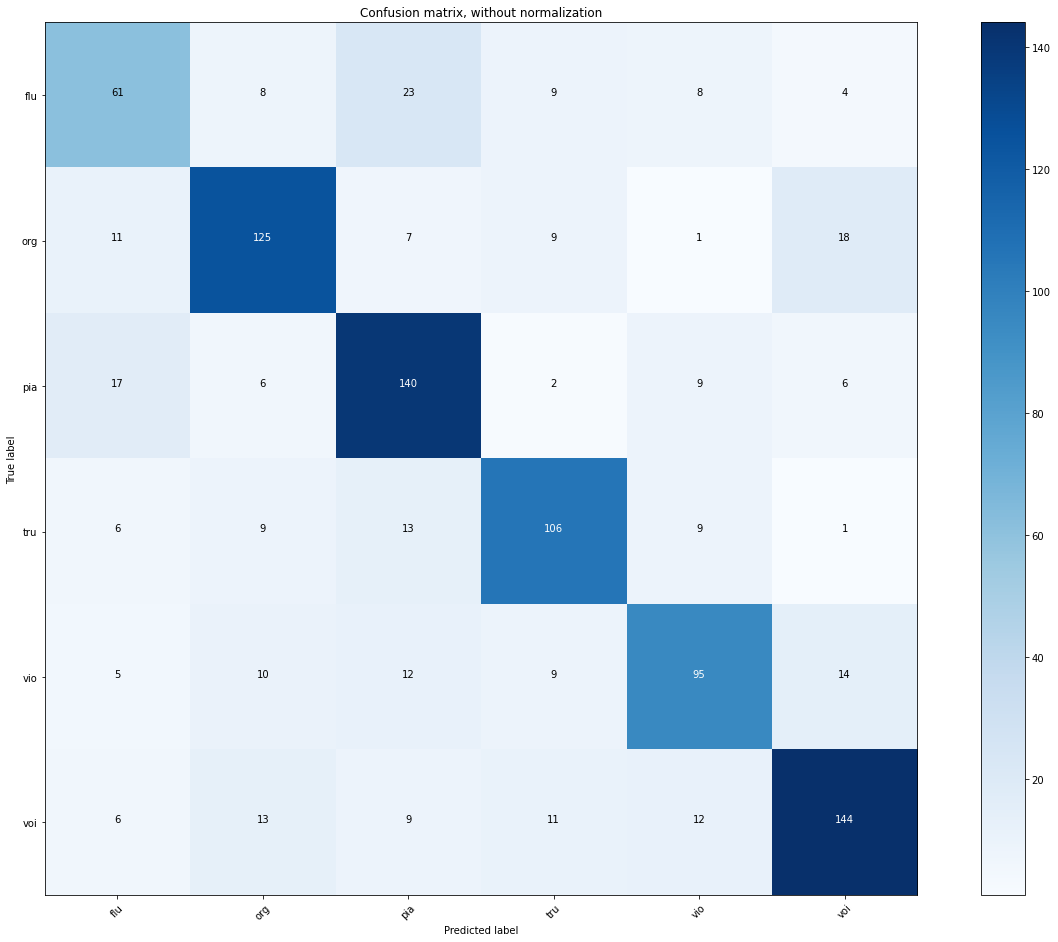

In [20]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [21]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [22]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['vio' 'voi' 'org' 'vio' 'tru' 'flu' 'tru' 'vio' 'tru' 'voi' 'tru' 'vio'
 'pia' 'tru' 'pia' 'vio' 'pia' 'pia' 'org' 'org' 'flu' 'voi' 'flu' 'flu'
 'pia' 'vio' 'flu' 'flu' 'vio' 'pia' 'tru' 'tru' 'flu' 'voi' 'org' 'flu'
 'tru' 'pia' 'tru' 'pia' 'flu' 'voi' 'org' 'voi' 'flu' 'voi' 'voi' 'voi'
 'pia' 'flu' 'org' 'vio' 'tru' 'org' 'org' 'flu' 'tru' 'vio' 'org' 'org'
 'voi' 'tru' 'vio' 'tru' 'pia' 'org' 'vio' 'org' 'voi' 'flu' 'tru' 'org'
 'org' 'pia' 'flu' 'vio' 'flu' 'vio' 'vio' 'tru' 'pia' 'flu' 'pia' 'tru'
 'org' 'vio' 'pia' 'voi' 'pia' 'pia' 'flu' 'tru' 'flu' 'tru' 'vio' 'org'
 'vio' 'tru' 'pia' 'org' 'vio' 'voi' 'vio' 'pia' 'vio' 'vio' 'vio' 'org'
 'pia' 'tru' 'org' 'flu' 'org' 'tru' 'voi' 'flu' 'pia' 'flu' 'pia' 'voi'
 'voi' 'voi' 'voi' 'voi' 'tru' 'vio' 'vio' 'voi' 'voi' 'vio' 'tru' 'voi'
 'flu' 'org' 'tru' 'org' 'flu' 'org' 'tru' 'voi' 'org' 'pia' 'pia' 'vio'
 'pia' 'voi' 'org' 'flu' 'org' 'flu' 'org' 'vio' 'vio' 'vio' 'org' 'org'
 'voi' 'flu' 'flu' 'org' 'flu' 'vio' 'flu' 'voi' 'p

In [23]:
# Varying Number of Neighbors
k_values = range(1, 21)
accuracy_scores = []


In [24]:

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(train_set, train_classes)
    predicted_labels = model_knn.predict(test_set)
    accuracy_scores.append(accuracy_score(test_classes, predicted_labels))

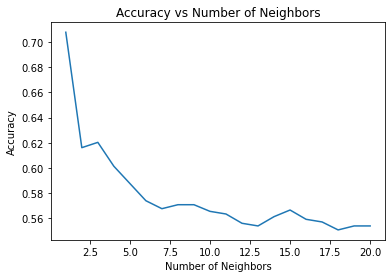

In [25]:
# Plotting Accuracy Graphs
plt.plot(k_values, accuracy_scores)
plt.title('Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
import joblib
joblib.dump( model_knn ,'knn_instruments_model.pkl')

['knn_instruments_model.pkl']